In [1]:
import glob
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from camera_calibration import CameraCalibrator
calibrator = CameraCalibrator()
calibrator.load()

In [3]:
from image import Image
from image_processor import ImageProcessor
import config
processor = ImageProcessor(calibrator, config)

# Test on images

In [4]:
# fname = 'straight_lines1.jpg'
# fname = 'straight_lines2.jpg'
# fname = 'test1.jpg'
# fname = 'test2.jpg'
fname = 'test3.jpg'
# fname = 'test4.jpg' # lane pixel detection not really good
# fname = 'test5.jpg' # simple peak detection not working well here # Fix binary threshold image
# fname = 'test6.jpg'

img = Image(fname='./test_images/{}'.format(fname))
processor.transform(img)
# result = cv2.cvtColor(img.value, cv2.COLOR_BGR2RGB)
# plt.imsave('./output_images2/{}'.format(fname), result)
# plt.imshow(result)

left peak: x: 313, y: 174
right peak: x: 1140, y: 51
starting pos of lane, left: 239.3413729177346, right: 1129.6032271647553
lane center: 684.4723000412449, vehicle pos: 640.0
vehicle is 0.2351m left of center


/Users/prakhar/dev/carnd/CarND-Advanced-Lane-Lines/image_processor.py:185: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  histogram = np.sum(warped[h/2:, :], axis=0)
/Users/prakhar/dev/carnd/CarND-Advanced-Lane-Lines/image_processor.py:186: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  p1 = np.argmax(histogram[:w/2])
/Users/prakhar/dev/carnd/CarND-Advanced-Lane-Lines/image_processor.py:187: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  p2 = np.argmax(histogram[w/2:])
/Users/prakhar/dev/carnd/CarND-Advanced-Lane-Lines/image_processor.py:218: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  left_x_range[0]:left_x_range[1]],
/Users/prakhar/dev/carnd/CarND-Advanced-Lane-Lines/image_processor.py:234: VisibleDeprecationW

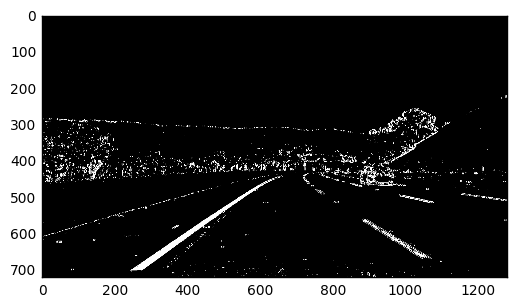

In [7]:
binary_threshold = img.image_for_stage("combinedBinary")
plt.imshow(binary_threshold, cmap='gray')

## Approach for handling video

1. Do full transformation for first few images (say 3)
1. From first few images establish a sense of confidence
    1. For single frame
        1. Lane width doesn't change wildly (low stddev of lane width measured at different points of the frame)
        2. Radius of curvature doesn't change wildly (low stddev)
    1. For series of frames
        1. Radius of curvature doesn't change too much across frames (low stddev of mean curvature across frames)
        1. Lane width doesn't change too much across frames (low stddev of mean lane width across frames)
1. If high confidence is achieved, then for consecutive frames
    1. Find lane points in current frame using points from previous frame as guidance
    1. Fit a ployline
    1. Determine if a good detection
        1. same checks as above
    1. If yes, then
        1. Smooth X and Y vals across last few frames (may be 3?)
        1. Fit a polyline over smoothed data
        1. Determine radius of curvature and vehicle pos wrt lane center
        1. Draw lane on the frame
        1. Adjust values of mean lane width and mean curvature (which will be used to determine goodness of detection)
    1. Else,
        1. Resort to full transformation and start over as if first frame
1. Else,
    1. Resort to full transformation and start over as if first frame

# Test on video

In [25]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

# meters per pixel in y dimension
ym_per_pix = 30/720.

# meters per pixel in x dimension
xm_per_pix = 3.7/700.

## load video

In [11]:
fname = 'project_video.mp4'
vid_clip = VideoFileClip("./{}".format(fname), audio=False)

In [12]:
# crude way of working on video
# def process_image(image):
#     img = Image(img=image)
#     processor.transform(img)
#     return cv2.cvtColor(img.value, cv2.COLOR_BGR2RGB)

# vid_out = './output_videos/{}'.format(fname)
# out_clip = vid_clip.fl_image(process_image) #NOTE: this function expects color images!!
# %time out_clip.write_videofile(vid_out, audio=False)

left peak: x: 262, y: 201
right peak: x: 1127, y: 77
starting pos of lane, left: 274.91765312366635, right: 1189.988862625621
lane center: 732.4532578746437, vehicle pos: 640.0
vehicle is 0.4887m left of center
[MoviePy] >>>> Building video ./output_videos/project_video.mp4
[MoviePy] Writing video ./output_videos/project_video.mp4


  0%|          | 1/1261 [00:00<12:50,  1.64it/s]

left peak: x: 262, y: 201
right peak: x: 1127, y: 77
starting pos of lane, left: 274.91765312366635, right: 1189.988862625621
lane center: 732.4532578746437, vehicle pos: 640.0
vehicle is 0.4887m left of center


  0%|          | 2/1261 [00:01<13:05,  1.60it/s]

left peak: x: 272, y: 223
right peak: x: 1133, y: 85
starting pos of lane, left: 275.23584083354524, right: 1163.824621762894
lane center: 719.5302312982196, vehicle pos: 640.0
vehicle is 0.4204m left of center


  0%|          | 3/1261 [00:01<12:50,  1.63it/s]

left peak: x: 272, y: 226
right peak: x: 1131, y: 76
starting pos of lane, left: 275.4383364247852, right: 1161.2723539612732
lane center: 718.3553451930293, vehicle pos: 640.0
vehicle is 0.4142m left of center


  0%|          | 4/1261 [00:02<12:36,  1.66it/s]

left peak: x: 274, y: 223
right peak: x: 1120, y: 72
starting pos of lane, left: 274.9643349819524, right: 1172.4390307106582
lane center: 723.7016828463054, vehicle pos: 640.0
vehicle is 0.4424m left of center


  0%|          | 5/1261 [00:02<12:21,  1.69it/s]

left peak: x: 275, y: 208
right peak: x: 1141, y: 69
starting pos of lane, left: 276.23125724352184, right: 1183.8374158199367
lane center: 730.0343365317292, vehicle pos: 640.0
vehicle is 0.4759m left of center


  0%|          | 6/1261 [00:03<12:14,  1.71it/s]

left peak: x: 277, y: 206
right peak: x: 1115, y: 68
starting pos of lane, left: 277.264060060676, right: 1180.9200186211579
lane center: 729.0920393409169, vehicle pos: 640.0
vehicle is 0.4709m left of center


  1%|          | 7/1261 [00:04<12:03,  1.73it/s]

left peak: x: 279, y: 189
right peak: x: 1129, y: 66
starting pos of lane, left: 284.37919080107287, right: 1188.8643922429342
lane center: 736.6217915220036, vehicle pos: 640.0
vehicle is 0.5107m left of center


  1%|          | 8/1261 [00:04<12:05,  1.73it/s]

left peak: x: 283, y: 181
right peak: x: 1141, y: 61
starting pos of lane, left: 284.8281100371329, right: 1177.4962876006666
lane center: 731.1621988188997, vehicle pos: 640.0
vehicle is 0.4819m left of center


  1%|          | 9/1261 [00:05<12:02,  1.73it/s]

left peak: x: 279, y: 177
right peak: x: 1151, y: 63
starting pos of lane, left: 280.1133728794832, right: 1194.0468098141341
lane center: 737.0800913468087, vehicle pos: 640.0
vehicle is 0.5131m left of center


  1%|          | 10/1261 [00:05<11:55,  1.75it/s]

left peak: x: 279, y: 174
right peak: x: 1142, y: 69
starting pos of lane, left: 280.64690067528056, right: 1174.39770826474
lane center: 727.5223044700103, vehicle pos: 640.0
vehicle is 0.4626m left of center


  1%|          | 11/1261 [00:06<11:47,  1.77it/s]

left peak: x: 279, y: 172
right peak: x: 1154, y: 65
starting pos of lane, left: 281.56243089897146, right: 1173.5121145478001
lane center: 727.5372727233857, vehicle pos: 640.0
vehicle is 0.4627m left of center


  1%|          | 12/1261 [00:07<12:08,  1.71it/s]

left peak: x: 275, y: 154
right peak: x: 1167, y: 68
starting pos of lane, left: 281.8502071332681, right: 1186.1784481833947
lane center: 734.0143276583315, vehicle pos: 640.0
vehicle is 0.4969m left of center


  1%|          | 13/1261 [00:07<11:58,  1.74it/s]

left peak: x: 277, y: 148
right peak: x: 1172, y: 67
starting pos of lane, left: 281.6931452155865, right: 1176.2034653008725
lane center: 728.9483052582295, vehicle pos: 640.0
vehicle is 0.4702m left of center


  1%|          | 14/1261 [00:08<11:57,  1.74it/s]

left peak: x: 281, y: 148
right peak: x: 1082, y: 77
starting pos of lane, left: 283.0755790900047, right: 1146.1805011647784
lane center: 714.6280401273916, vehicle pos: 640.0
vehicle is 0.3945m left of center


  1%|          | 15/1261 [00:08<11:50,  1.75it/s]

left peak: x: 279, y: 153
right peak: x: 1174, y: 65
starting pos of lane, left: 284.31819911423656, right: 1185.531298273059
lane center: 734.9247486936479, vehicle pos: 640.0
vehicle is 0.5017m left of center


  1%|▏         | 16/1261 [00:09<11:50,  1.75it/s]

left peak: x: 283, y: 150
right peak: x: 1176, y: 63
starting pos of lane, left: 286.9911113358046, right: 1167.607744963222
lane center: 727.2994281495133, vehicle pos: 640.0
vehicle is 0.4614m left of center


  1%|▏         | 17/1261 [00:09<11:50,  1.75it/s]

left peak: x: 282, y: 153
right peak: x: 1102, y: 60
starting pos of lane, left: 285.97186391868274, right: 1159.19609076156
lane center: 722.5839773401215, vehicle pos: 640.0
vehicle is 0.4365m left of center


  1%|▏         | 18/1261 [00:10<12:07,  1.71it/s]

left peak: x: 279, y: 138
right peak: x: 1105, y: 56
starting pos of lane, left: 287.69430845511226, right: 1164.1635777664683
lane center: 725.9289431107902, vehicle pos: 640.0
vehicle is 0.4542m left of center


  2%|▏         | 19/1261 [00:11<11:59,  1.73it/s]

left peak: x: 276, y: 144
right peak: x: 1104, y: 55
starting pos of lane, left: 284.1050993222884, right: 1159.566658891778
lane center: 721.8358791070332, vehicle pos: 640.0
vehicle is 0.4326m left of center


  2%|▏         | 20/1261 [00:11<12:06,  1.71it/s]

left peak: x: 278, y: 141
right peak: x: 1113, y: 65
starting pos of lane, left: 284.63247787256523, right: 1159.9239299922701
lane center: 722.2782039324177, vehicle pos: 640.0
vehicle is 0.4349m left of center


  2%|▏         | 21/1261 [00:12<11:57,  1.73it/s]

left peak: x: 276, y: 123
right peak: x: 1126, y: 66
starting pos of lane, left: 283.07217945387924, right: 1120.3641485751066
lane center: 701.7181640144929, vehicle pos: 640.0
vehicle is 0.3262m left of center


  2%|▏         | 22/1261 [00:12<12:09,  1.70it/s]

left peak: x: 271, y: 127
right peak: x: 1135, y: 70
starting pos of lane, left: 280.6256849833171, right: 1168.0214106071976
lane center: 724.3235477952574, vehicle pos: 640.0
vehicle is 0.4457m left of center


  2%|▏         | 23/1261 [00:13<12:03,  1.71it/s]

left peak: x: 192, y: 137
right peak: x: 1143, y: 72
starting pos of lane, left: 184.8719261190946, right: 1185.2022970829287
lane center: 685.0371116010117, vehicle pos: 640.0
vehicle is 0.2381m left of center


  2%|▏         | 24/1261 [00:13<12:02,  1.71it/s]

left peak: x: 184, y: 133
right peak: x: 1148, y: 73
starting pos of lane, left: 162.596530056689, right: 1163.7037021850208
lane center: 663.1501161208548, vehicle pos: 640.0
vehicle is 0.1224m left of center


  2%|▏         | 25/1261 [00:14<12:38,  1.63it/s]

left peak: x: 228, y: 145
right peak: x: 1042, y: 73
starting pos of lane, left: 262.27193207302423, right: 1041.9999999999995
lane center: 652.135966036512, vehicle pos: 640.0
vehicle is 0.0641m left of center


  2%|▏         | 26/1261 [00:15<12:25,  1.66it/s]

left peak: x: 237, y: 145
right peak: x: 1164, y: 75
starting pos of lane, left: 264.6135332551238, right: 1175.792115442677
lane center: 720.2028243489003, vehicle pos: 640.0
vehicle is 0.4239m left of center


  2%|▏         | 27/1261 [00:15<12:37,  1.63it/s]

left peak: x: 238, y: 149
right peak: x: 1073, y: 74
starting pos of lane, left: 263.18562945582966, right: 1072.9999999998836
lane center: 668.0928147278566, vehicle pos: 640.0
vehicle is 0.1485m left of center


  2%|▏         | 28/1261 [00:16<12:31,  1.64it/s]

left peak: x: 242, y: 152
right peak: x: 1125, y: 76
starting pos of lane, left: 259.22092154523693, right: 1163.2650752689924
lane center: 711.2429984071147, vehicle pos: 640.0
vehicle is 0.3766m left of center


  2%|▏         | 29/1261 [00:17<12:27,  1.65it/s]

left peak: x: 252, y: 160
right peak: x: 1096, y: 75
starting pos of lane, left: 257.43003260670076, right: 1095.9999999999982
lane center: 676.7150163033496, vehicle pos: 640.0
vehicle is 0.1941m left of center


  2%|▏         | 30/1261 [00:17<12:12,  1.68it/s]

left peak: x: 255, y: 170
right peak: x: 1098, y: 70
starting pos of lane, left: 255.8911625092424, right: 1163.484310869546
lane center: 709.6877366893943, vehicle pos: 640.0
vehicle is 0.3683m left of center


  2%|▏         | 31/1261 [00:18<12:17,  1.67it/s]

left peak: x: 254, y: 184
right peak: x: 1099, y: 78
starting pos of lane, left: 254.95575570604498, right: 1157.5914453277985
lane center: 706.2736005169218, vehicle pos: 640.0
vehicle is 0.3503m left of center


  3%|▎         | 32/1261 [00:18<12:10,  1.68it/s]

left peak: x: 253, y: 200
right peak: x: 1104, y: 59
starting pos of lane, left: 258.97682146947614, right: 1161.8416418112256
lane center: 710.4092316403509, vehicle pos: 640.0
vehicle is 0.3722m left of center


  3%|▎         | 33/1261 [00:19<11:57,  1.71it/s]

left peak: x: 251, y: 196
right peak: x: 1131, y: 59
starting pos of lane, left: 252.20301957087023, right: 1164.3825577625514
lane center: 708.2927886667109, vehicle pos: 640.0
vehicle is 0.3610m left of center


  3%|▎         | 34/1261 [00:19<11:58,  1.71it/s]

left peak: x: 254, y: 206
right peak: x: 1118, y: 69
starting pos of lane, left: 253.17227126161328, right: 1140.542410045385
lane center: 696.857340653499, vehicle pos: 640.0
vehicle is 0.3005m left of center


  3%|▎         | 35/1261 [00:20<12:04,  1.69it/s]

left peak: x: 256, y: 202
right peak: x: 1126, y: 60
starting pos of lane, left: 255.32564247764367, right: 1146.446752703247
lane center: 700.8861975904454, vehicle pos: 640.0
vehicle is 0.3218m left of center


  3%|▎         | 36/1261 [00:21<11:55,  1.71it/s]

left peak: x: 257, y: 206
right peak: x: 1024, y: 60
starting pos of lane, left: 259.466419693347, right: 1023.9999999999991
lane center: 641.733209846673, vehicle pos: 640.0
vehicle is 0.0092m left of center


  3%|▎         | 37/1261 [00:21<11:57,  1.71it/s]

left peak: x: 259, y: 202
right peak: x: 1033, y: 71
starting pos of lane, left: 258.7977994990342, right: 1032.999999999999
lane center: 645.8988997495167, vehicle pos: 640.0
vehicle is 0.0312m left of center


  3%|▎         | 38/1261 [00:22<12:08,  1.68it/s]

left peak: x: 261, y: 217
right peak: x: 1045, y: 84
starting pos of lane, left: 263.3185083446224, right: 1044.9999999999993
lane center: 654.1592541723109, vehicle pos: 640.0
vehicle is 0.0748m left of center
left peak: x: 264, y: 205
right peak: x: 1055, y: 71
starting pos of lane, left: 262.0296965994888, right: 1096.538524292644
lane center: 679.2841104460665, vehicle pos: 640.0
vehicle is 0.2076m left of center


  3%|▎         | 40/1261 [00:23<13:06,  1.55it/s]

left peak: x: 264, y: 202
right peak: x: 1058, y: 70
starting pos of lane, left: 262.7516058347647, right: 1082.4740237865763
lane center: 672.6128148106704, vehicle pos: 640.0
vehicle is 0.1724m left of center


  3%|▎         | 41/1261 [00:24<12:51,  1.58it/s]

left peak: x: 264, y: 203
right peak: x: 1067, y: 73
starting pos of lane, left: 264.0144105056956, right: 1125.6216332087758
lane center: 694.8180218572356, vehicle pos: 640.0
vehicle is 0.2898m left of center


  3%|▎         | 42/1261 [00:24<12:35,  1.61it/s]

left peak: x: 265, y: 201
right peak: x: 1077, y: 68
starting pos of lane, left: 265.45782291786526, right: 1076.9999999995925
lane center: 671.2289114587288, vehicle pos: 640.0
vehicle is 0.1651m left of center


  3%|▎         | 43/1261 [00:25<12:11,  1.66it/s]

left peak: x: 267, y: 193
right peak: x: 1081, y: 63
starting pos of lane, left: 266.4340900333125, right: 1070.398332955523
lane center: 668.4162114944178, vehicle pos: 640.0
vehicle is 0.1502m left of center


  3%|▎         | 44/1261 [00:26<12:01,  1.69it/s]

left peak: x: 267, y: 181
right peak: x: 1103, y: 73
starting pos of lane, left: 268.3364976351962, right: 1155.7168961864916
lane center: 712.0266969108438, vehicle pos: 640.0
vehicle is 0.3807m left of center


  4%|▎         | 45/1261 [00:26<12:11,  1.66it/s]

left peak: x: 266, y: 172
right peak: x: 1109, y: 74
starting pos of lane, left: 268.5839554486126, right: 1164.4814162159066
lane center: 716.5326858322596, vehicle pos: 640.0
vehicle is 0.4045m left of center


  4%|▎         | 46/1261 [00:27<11:56,  1.70it/s]

left peak: x: 266, y: 167
right peak: x: 1115, y: 69
starting pos of lane, left: 268.6725393233869, right: 1148.6182748236886
lane center: 708.6454070735377, vehicle pos: 640.0
vehicle is 0.3628m left of center


  4%|▎         | 47/1261 [00:27<11:55,  1.70it/s]

left peak: x: 264, y: 162
right peak: x: 1156, y: 66
starting pos of lane, left: 268.0393337972276, right: 1159.0648624849564
lane center: 713.5520981410921, vehicle pos: 640.0
vehicle is 0.3888m left of center


  4%|▍         | 48/1261 [00:28<11:56,  1.69it/s]

left peak: x: 266, y: 165
right peak: x: 1142, y: 66
starting pos of lane, left: 267.7895179909493, right: 1161.2768873962495
lane center: 714.5332026935994, vehicle pos: 640.0
vehicle is 0.3940m left of center


  4%|▍         | 49/1261 [00:29<11:45,  1.72it/s]

left peak: x: 265, y: 156
right peak: x: 1142, y: 65
starting pos of lane, left: 267.2636434693703, right: 1162.1659469722586
lane center: 714.7147952208145, vehicle pos: 640.0
vehicle is 0.3949m left of center


  4%|▍         | 50/1261 [00:29<11:39,  1.73it/s]

left peak: x: 265, y: 153
right peak: x: 1049, y: 65
starting pos of lane, left: 268.1917617427339, right: 1048.9999999998836
lane center: 658.5958808713087, vehicle pos: 640.0
vehicle is 0.0983m left of center


  4%|▍         | 51/1261 [00:30<11:31,  1.75it/s]

left peak: x: 266, y: 146
right peak: x: 1056, y: 78
starting pos of lane, left: 269.418603697087, right: 1055.999999999999
lane center: 662.709301848543, vehicle pos: 640.0
vehicle is 0.1200m left of center


  4%|▍         | 52/1261 [00:30<11:27,  1.76it/s]

left peak: x: 267, y: 148
right peak: x: 1052, y: 77
starting pos of lane, left: 270.7897005434982, right: 1052.0
lane center: 661.3948502717492, vehicle pos: 640.0
vehicle is 0.1131m left of center


  4%|▍         | 53/1261 [00:31<11:23,  1.77it/s]

left peak: x: 268, y: 148
right peak: x: 1058, y: 78
starting pos of lane, left: 271.95166123628377, right: 1057.9999999995343
lane center: 664.975830617909, vehicle pos: 640.0
vehicle is 0.1320m left of center


  4%|▍         | 54/1261 [00:31<11:19,  1.78it/s]

left peak: x: 268, y: 142
right peak: x: 1067, y: 76
starting pos of lane, left: 272.3848862389176, right: 1158.947114244587
lane center: 715.6660002417523, vehicle pos: 640.0
vehicle is 0.3999m left of center


  4%|▍         | 55/1261 [00:32<11:19,  1.77it/s]

left peak: x: 268, y: 143
right peak: x: 1075, y: 69
starting pos of lane, left: 273.1076113819197, right: 1137.930801855835
lane center: 705.5192066188773, vehicle pos: 640.0
vehicle is 0.3463m left of center


  4%|▍         | 56/1261 [00:32<11:27,  1.75it/s]

left peak: x: 267, y: 136
right peak: x: 1104, y: 72
starting pos of lane, left: 273.27684725238413, right: 1161.092705211401
lane center: 717.1847762318926, vehicle pos: 640.0
vehicle is 0.4080m left of center


  5%|▍         | 57/1261 [00:33<11:34,  1.73it/s]

left peak: x: 267, y: 130
right peak: x: 1112, y: 71
starting pos of lane, left: 273.09278896606077, right: 1156.77239498869
lane center: 714.9325919773753, vehicle pos: 640.0
vehicle is 0.3961m left of center


  5%|▍         | 58/1261 [00:34<11:33,  1.74it/s]

left peak: x: 266, y: 124
right peak: x: 1104, y: 71
starting pos of lane, left: 271.6637810945899, right: 1152.0823457013325
lane center: 711.8730633979612, vehicle pos: 640.0
vehicle is 0.3799m left of center


  5%|▍         | 59/1261 [00:34<11:24,  1.75it/s]

left peak: x: 193, y: 129
right peak: x: 1103, y: 64
starting pos of lane, left: 253.9265480148477, right: 1117.6693138666997
lane center: 685.7979309407738, vehicle pos: 640.0
vehicle is 0.2421m left of center


  5%|▍         | 60/1261 [00:35<11:24,  1.75it/s]

left peak: x: 208, y: 134
right peak: x: 1120, y: 61
starting pos of lane, left: 260.1277550853432, right: 1170.4180790473674
lane center: 715.2729170663554, vehicle pos: 640.0
vehicle is 0.3979m left of center


  5%|▍         | 61/1261 [00:36<12:21,  1.62it/s]

left peak: x: 218, y: 135
right peak: x: 1126, y: 63
starting pos of lane, left: 259.9248338980291, right: 1135.5706540186277
lane center: 697.7477439583283, vehicle pos: 640.0
vehicle is 0.3052m left of center


  5%|▍         | 62/1261 [00:36<12:29,  1.60it/s]

left peak: x: 230, y: 142
right peak: x: 1005, y: 75
starting pos of lane, left: 259.85140364848814, right: 1004.9999999999998
lane center: 632.425701824244, vehicle pos: 640.0
vehicle is 0.0400m right of center


  5%|▍         | 63/1261 [00:37<12:08,  1.64it/s]

left peak: x: 232, y: 150
right peak: x: 1002, y: 77
starting pos of lane, left: 257.665071821324, right: 1001.9999999999995
lane center: 629.8325359106618, vehicle pos: 640.0
vehicle is 0.0537m right of center


  5%|▌         | 64/1261 [00:37<11:47,  1.69it/s]

left peak: x: 244, y: 159
right peak: x: 1020, y: 73
starting pos of lane, left: 258.4638851543908, right: 1006.7738693468418
lane center: 632.6188772506164, vehicle pos: 640.0
vehicle is 0.0390m right of center


  5%|▌         | 65/1261 [00:38<11:40,  1.71it/s]

left peak: x: 239, y: 160
right peak: x: 1025, y: 71
starting pos of lane, left: 253.89702162965125, right: 1024.999999999971
lane center: 639.448510814811, vehicle pos: 640.0
vehicle is 0.0029m right of center


  5%|▌         | 66/1261 [00:38<11:35,  1.72it/s]

left peak: x: 258, y: 175
right peak: x: 1031, y: 68
starting pos of lane, left: 257.19986905053395, right: 1030.99999999992
lane center: 644.0999345252269, vehicle pos: 640.0
vehicle is 0.0217m left of center


  5%|▌         | 67/1261 [00:39<12:10,  1.63it/s]

left peak: x: 249, y: 175
right peak: x: 1047, y: 66
starting pos of lane, left: 252.96701994555852, right: 1046.9999999996799
lane center: 649.9835099726192, vehicle pos: 640.0
vehicle is 0.0528m left of center


  5%|▌         | 68/1261 [00:40<12:01,  1.65it/s]

left peak: x: 250, y: 175
right peak: x: 1065, y: 67
starting pos of lane, left: 250.6674442037251, right: 1027.3336913901944
lane center: 639.0005677969598, vehicle pos: 640.0
vehicle is 0.0053m right of center


  5%|▌         | 69/1261 [00:40<11:56,  1.66it/s]

left peak: x: 250, y: 184
right peak: x: 1066, y: 67
starting pos of lane, left: 251.16014712902785, right: 1042.6483062923908
lane center: 646.9042267107093, vehicle pos: 640.0
vehicle is 0.0365m left of center


  6%|▌         | 70/1261 [00:41<12:01,  1.65it/s]

left peak: x: 246, y: 183
right peak: x: 1068, y: 70
starting pos of lane, left: 247.98774170774743, right: 1065.6602982680654
lane center: 656.8240199879065, vehicle pos: 640.0
vehicle is 0.0889m left of center


  6%|▌         | 71/1261 [00:42<12:21,  1.60it/s]

left peak: x: 247, y: 184
right peak: x: 1076, y: 69
starting pos of lane, left: 249.27901021017016, right: 1060.6267629798654
lane center: 654.9528865950178, vehicle pos: 640.0
vehicle is 0.0790m left of center


  6%|▌         | 72/1261 [00:42<12:11,  1.62it/s]

left peak: x: 244, y: 183
right peak: x: 1084, y: 68
starting pos of lane, left: 247.94567059716897, right: 1119.7031434136513
lane center: 683.8244070054102, vehicle pos: 640.0
vehicle is 0.2316m left of center


  6%|▌         | 73/1261 [00:43<11:50,  1.67it/s]

left peak: x: 243, y: 182
right peak: x: 1094, y: 73
starting pos of lane, left: 248.15273008560467, right: 1103.3117324891946
lane center: 675.7322312873996, vehicle pos: 640.0
vehicle is 0.1889m left of center


  6%|▌         | 74/1261 [00:43<11:35,  1.71it/s]

left peak: x: 243, y: 171
right peak: x: 996, y: 66
starting pos of lane, left: 249.22941301280503, right: 1037.2646845567624
lane center: 643.2470487847837, vehicle pos: 640.0
vehicle is 0.0172m left of center


  6%|▌         | 75/1261 [00:44<11:25,  1.73it/s]

left peak: x: 241, y: 167
right peak: x: 1012, y: 80
starting pos of lane, left: 248.01353572893265, right: 1012.0000000004657
lane center: 630.0067678646992, vehicle pos: 640.0
vehicle is 0.0528m right of center


  6%|▌         | 76/1261 [00:44<11:34,  1.71it/s]

left peak: x: 243, y: 163
right peak: x: 1017, y: 76
starting pos of lane, left: 249.88615361780316, right: 1017.0000000003783
lane center: 633.4430768090907, vehicle pos: 640.0
vehicle is 0.0347m right of center


  6%|▌         | 77/1261 [00:45<11:42,  1.69it/s]

left peak: x: 240, y: 151
right peak: x: 1037, y: 75
starting pos of lane, left: 247.22346449930805, right: 1048.7523530843944
lane center: 647.9879087918512, vehicle pos: 640.0
vehicle is 0.0422m left of center


  6%|▌         | 78/1261 [00:46<11:39,  1.69it/s]

left peak: x: 239, y: 143
right peak: x: 1051, y: 81
starting pos of lane, left: 247.51824389777892, right: 1050.9999999999998
lane center: 649.2591219488893, vehicle pos: 640.0
vehicle is 0.0489m left of center


  6%|▋         | 79/1261 [00:46<11:28,  1.72it/s]

left peak: x: 151, y: 144
right peak: x: 1061, y: 84
starting pos of lane, left: 137.37728181825742, right: 1060.9999999996508
lane center: 599.1886409089541, vehicle pos: 640.0
vehicle is 0.2157m right of center


  6%|▋         | 80/1261 [00:47<11:22,  1.73it/s]

left peak: x: 152, y: 141
right peak: x: 1068, y: 80
starting pos of lane, left: 177.45749006322995, right: 1126.3759869335645
lane center: 651.9167384983973, vehicle pos: 640.0
vehicle is 0.0630m left of center


  6%|▋         | 81/1261 [00:47<11:19,  1.74it/s]

left peak: x: 168, y: 146
right peak: x: 1069, y: 78
starting pos of lane, left: 228.3819085411597, right: 1126.0644217549675
lane center: 677.2231651480636, vehicle pos: 640.0
vehicle is 0.1968m left of center


  7%|▋         | 82/1261 [00:48<11:37,  1.69it/s]

left peak: x: 162, y: 157
right peak: x: 1079, y: 73
starting pos of lane, left: 222.27314066622782, right: 1126.9358625254251
lane center: 674.6045015958265, vehicle pos: 640.0
vehicle is 0.1829m left of center


  7%|▋         | 83/1261 [00:49<11:32,  1.70it/s]

left peak: x: 166, y: 154
right peak: x: 1085, y: 85
starting pos of lane, left: 223.02802695450885, right: 1125.3249967159127
lane center: 674.1765118352107, vehicle pos: 640.0
vehicle is 0.1806m left of center


  7%|▋         | 84/1261 [00:49<11:41,  1.68it/s]

left peak: x: 161, y: 159
right peak: x: 1100, y: 90
starting pos of lane, left: 217.8639675783802, right: 1139.6016355383351
lane center: 678.7328015583577, vehicle pos: 640.0
vehicle is 0.2047m left of center


  7%|▋         | 85/1261 [00:50<11:39,  1.68it/s]

left peak: x: 164, y: 160
right peak: x: 1106, y: 83
starting pos of lane, left: 216.13551931406926, right: 1142.1429272871235
lane center: 679.1392233005963, vehicle pos: 640.0
vehicle is 0.2069m left of center


  7%|▋         | 86/1261 [00:50<11:32,  1.70it/s]

left peak: x: 177, y: 162
right peak: x: 1113, y: 85
starting pos of lane, left: 216.4313313661667, right: 1139.035557457103
lane center: 677.7334444116349, vehicle pos: 640.0
vehicle is 0.1994m left of center


  7%|▋         | 87/1261 [00:51<11:44,  1.67it/s]

left peak: x: 207, y: 190
right peak: x: 1122, y: 65
starting pos of lane, left: 220.21646985616783, right: 1131.3378143841055
lane center: 675.7771421201367, vehicle pos: 640.0
vehicle is 0.1891m left of center


  7%|▋         | 88/1261 [00:52<11:50,  1.65it/s]

left peak: x: 221, y: 206
right peak: x: 1018, y: 82
starting pos of lane, left: 221.89478346663503, right: 1018.0
lane center: 619.9473917333175, vehicle pos: 640.0
vehicle is 0.1060m right of center


  7%|▋         | 89/1261 [00:52<11:43,  1.67it/s]

left peak: x: 219, y: 233
right peak: x: 1022, y: 77
starting pos of lane, left: 220.72210207408685, right: 1020.797287244356
lane center: 620.7596946592214, vehicle pos: 640.0
vehicle is 0.1017m right of center
left peak: x: 225, y: 245
right peak: x: 1024, y: 78
starting pos of lane, left: 223.54625403564407, right: 1050.4426291412801
lane center: 636.9944415884621, vehicle pos: 640.0
vehicle is 0.0159m right of center


  7%|▋         | 91/1261 [00:54<12:42,  1.53it/s]

left peak: x: 224, y: 250
right peak: x: 1046, y: 76
starting pos of lane, left: 223.44702393132238, right: 1049.4084547216657
lane center: 636.427739326494, vehicle pos: 640.0
vehicle is 0.0189m right of center


  7%|▋         | 92/1261 [00:54<12:21,  1.58it/s]

left peak: x: 226, y: 244
right peak: x: 1049, y: 76
starting pos of lane, left: 224.98682277719143, right: 1048.9999999996799
lane center: 636.9934113884356, vehicle pos: 640.0
vehicle is 0.0159m right of center


  7%|▋         | 93/1261 [00:55<11:58,  1.63it/s]

left peak: x: 228, y: 253
right peak: x: 1053, y: 73
starting pos of lane, left: 227.38520836494158, right: 1039.2936219837304
lane center: 633.339415174336, vehicle pos: 640.0
vehicle is 0.0352m right of center


  7%|▋         | 94/1261 [00:55<11:47,  1.65it/s]

left peak: x: 231, y: 250
right peak: x: 1068, y: 74
starting pos of lane, left: 229.32498828228927, right: 1114.7719298876164
lane center: 672.0484590849528, vehicle pos: 640.0
vehicle is 0.1694m left of center


  8%|▊         | 95/1261 [00:56<12:37,  1.54it/s]

left peak: x: 230, y: 241
right peak: x: 1072, y: 83
starting pos of lane, left: 228.85260251283512, right: 1115.9254919075156
lane center: 672.3890472101754, vehicle pos: 640.0
vehicle is 0.1712m left of center


  8%|▊         | 96/1261 [00:57<12:06,  1.60it/s]

left peak: x: 230, y: 238
right peak: x: 1077, y: 82
starting pos of lane, left: 230.0283643993243, right: 1113.8408440317492
lane center: 671.9346042155366, vehicle pos: 640.0
vehicle is 0.1688m left of center


  8%|▊         | 97/1261 [00:57<11:48,  1.64it/s]

left peak: x: 230, y: 241
right peak: x: 1084, y: 81
starting pos of lane, left: 231.0697651699662, right: 1110.9238790006511
lane center: 670.9968220853086, vehicle pos: 640.0
vehicle is 0.1638m left of center


  8%|▊         | 98/1261 [00:58<11:53,  1.63it/s]

left peak: x: 230, y: 227
right peak: x: 1093, y: 79
starting pos of lane, left: 231.3054255355275, right: 1105.7784814501495
lane center: 668.5419534928385, vehicle pos: 640.0
vehicle is 0.1509m left of center


  8%|▊         | 99/1261 [00:58<11:36,  1.67it/s]

left peak: x: 232, y: 232
right peak: x: 1099, y: 73
starting pos of lane, left: 234.03283866815835, right: 1120.211413282098
lane center: 677.1221259751281, vehicle pos: 640.0
vehicle is 0.1962m left of center


  8%|▊         | 100/1261 [00:59<11:23,  1.70it/s]

left peak: x: 232, y: 234
right peak: x: 1105, y: 78
starting pos of lane, left: 234.3767251297713, right: 1104.4831653208153
lane center: 669.4299452252933, vehicle pos: 640.0
vehicle is 0.1556m left of center


  8%|▊         | 101/1261 [01:00<11:16,  1.72it/s]

left peak: x: 235, y: 239
right peak: x: 1057, y: 79
starting pos of lane, left: 237.19359658395223, right: 1056.9999999999986
lane center: 647.0967982919753, vehicle pos: 640.0
vehicle is 0.0375m left of center


  8%|▊         | 102/1261 [01:00<11:08,  1.73it/s]

left peak: x: 237, y: 234
right peak: x: 1116, y: 73
starting pos of lane, left: 239.06323512308055, right: 1121.0110788324796
lane center: 680.0371569777801, vehicle pos: 640.0
vehicle is 0.2116m left of center


  8%|▊         | 103/1261 [01:01<11:07,  1.74it/s]

left peak: x: 238, y: 232
right peak: x: 1121, y: 71
starting pos of lane, left: 239.72611407427135, right: 1122.9436526698564
lane center: 681.3348833720639, vehicle pos: 640.0
vehicle is 0.2185m left of center


  8%|▊         | 104/1261 [01:01<11:07,  1.73it/s]

left peak: x: 242, y: 218
right peak: x: 1053, y: 76
starting pos of lane, left: 242.0592862456899, right: 1108.6509098576637
lane center: 675.3550980516768, vehicle pos: 640.0
vehicle is 0.1869m left of center


  8%|▊         | 105/1261 [01:02<11:16,  1.71it/s]

left peak: x: 239, y: 212
right peak: x: 1103, y: 83
starting pos of lane, left: 242.4912716251879, right: 1131.2054366080572
lane center: 686.8483541166225, vehicle pos: 640.0
vehicle is 0.2476m left of center


  8%|▊         | 106/1261 [01:02<11:07,  1.73it/s]

left peak: x: 241, y: 207
right peak: x: 1113, y: 87
starting pos of lane, left: 243.06667935587467, right: 1132.143192304593
lane center: 687.6049358302339, vehicle pos: 640.0
vehicle is 0.2516m left of center


  8%|▊         | 107/1261 [01:03<11:04,  1.74it/s]

left peak: x: 241, y: 201
right peak: x: 1095, y: 90
starting pos of lane, left: 242.21236759957586, right: 1127.1615765002193
lane center: 684.6869720498976, vehicle pos: 640.0
vehicle is 0.2362m left of center


  9%|▊         | 108/1261 [01:04<10:58,  1.75it/s]

left peak: x: 244, y: 211
right peak: x: 1099, y: 88
starting pos of lane, left: 244.87342690771254, right: 1145.903243809875
lane center: 695.3883353587937, vehicle pos: 640.0
vehicle is 0.2928m left of center


  9%|▊         | 109/1261 [01:04<11:10,  1.72it/s]

left peak: x: 244, y: 216
right peak: x: 1105, y: 87
starting pos of lane, left: 244.88538683268015, right: 1152.9455739414577
lane center: 698.9154803870689, vehicle pos: 640.0
vehicle is 0.3114m left of center


  9%|▊         | 110/1261 [01:05<10:57,  1.75it/s]

left peak: x: 243, y: 214
right peak: x: 1113, y: 73
starting pos of lane, left: 244.90500835912036, right: 1073.3886157215206
lane center: 659.1468120403206, vehicle pos: 640.0
vehicle is 0.1012m left of center


  9%|▉         | 111/1261 [01:05<11:03,  1.73it/s]

left peak: x: 245, y: 224
right peak: x: 1118, y: 66
starting pos of lane, left: 245.73311274717804, right: 1151.0135482190703
lane center: 698.3733304831242, vehicle pos: 640.0
vehicle is 0.3085m left of center


  9%|▉         | 112/1261 [01:06<11:12,  1.71it/s]

left peak: x: 244, y: 212
right peak: x: 1142, y: 73
starting pos of lane, left: 244.65137713233025, right: 1157.0576060985486
lane center: 700.8544916154394, vehicle pos: 640.0
vehicle is 0.3217m left of center


  9%|▉         | 113/1261 [01:06<11:04,  1.73it/s]

left peak: x: 245, y: 219
right peak: x: 1130, y: 75
starting pos of lane, left: 246.1318184186598, right: 1155.0634668674986
lane center: 700.5976426430792, vehicle pos: 640.0
vehicle is 0.3203m left of center


  9%|▉         | 114/1261 [01:07<11:02,  1.73it/s]

left peak: x: 248, y: 234
right peak: x: 1054, y: 79
starting pos of lane, left: 248.06298530029196, right: 1054.0
lane center: 651.031492650146, vehicle pos: 640.0
vehicle is 0.0583m left of center


  9%|▉         | 115/1261 [01:08<10:57,  1.74it/s]

left peak: x: 249, y: 232
right peak: x: 1057, y: 82
starting pos of lane, left: 249.6898955105155, right: 1056.9999999999995
lane center: 653.3449477552575, vehicle pos: 640.0
vehicle is 0.0705m left of center


  9%|▉         | 116/1261 [01:08<11:02,  1.73it/s]

left peak: x: 250, y: 225
right peak: x: 1062, y: 73
starting pos of lane, left: 250.43750135790629, right: 1061.9999999999982
lane center: 656.2187506789522, vehicle pos: 640.0
vehicle is 0.0857m left of center


  9%|▉         | 117/1261 [01:09<10:55,  1.75it/s]

left peak: x: 250, y: 225
right peak: x: 1073, y: 75
starting pos of lane, left: 250.80586003703866, right: 1128.7581698299277
lane center: 689.7820149334832, vehicle pos: 640.0
vehicle is 0.2631m left of center


  9%|▉         | 118/1261 [01:09<11:01,  1.73it/s]

left peak: x: 251, y: 227
right peak: x: 1081, y: 74
starting pos of lane, left: 252.1581197794524, right: 1137.327250489138
lane center: 694.7426851342951, vehicle pos: 640.0
vehicle is 0.2894m left of center


  9%|▉         | 119/1261 [01:10<11:08,  1.71it/s]

left peak: x: 253, y: 221
right peak: x: 1123, y: 77
starting pos of lane, left: 254.2214957723357, right: 1142.1482177937678
lane center: 698.1848567830518, vehicle pos: 640.0
vehicle is 0.3075m left of center


 10%|▉         | 120/1261 [01:11<10:56,  1.74it/s]

left peak: x: 256, y: 225
right peak: x: 1093, y: 69
starting pos of lane, left: 255.84585060470883, right: 1142.515366941757
lane center: 699.180608773233, vehicle pos: 640.0
vehicle is 0.3128m left of center


 10%|▉         | 121/1261 [01:11<10:51,  1.75it/s]

left peak: x: 257, y: 219
right peak: x: 1103, y: 75
starting pos of lane, left: 256.56878187841903, right: 1145.8735663133616
lane center: 701.2211740958903, vehicle pos: 640.0
vehicle is 0.3236m left of center


 10%|▉         | 122/1261 [01:12<10:45,  1.76it/s]

left peak: x: 258, y: 219
right peak: x: 1109, y: 70
starting pos of lane, left: 258.7070355182434, right: 1096.3337459202353
lane center: 677.5203907192393, vehicle pos: 640.0
vehicle is 0.1983m left of center


 10%|▉         | 123/1261 [01:12<10:46,  1.76it/s]

left peak: x: 261, y: 226
right peak: x: 1142, y: 70
starting pos of lane, left: 260.6295888514397, right: 1152.6066314739678
lane center: 706.6181101627037, vehicle pos: 640.0
vehicle is 0.3521m left of center


 10%|▉         | 124/1261 [01:13<10:43,  1.77it/s]

left peak: x: 262, y: 218
right peak: x: 1119, y: 68
starting pos of lane, left: 262.0296771820978, right: 1151.1679388072632
lane center: 706.5988079946806, vehicle pos: 640.0
vehicle is 0.3520m left of center


 10%|▉         | 125/1261 [01:13<10:57,  1.73it/s]

left peak: x: 265, y: 212
right peak: x: 1126, y: 70
starting pos of lane, left: 264.31539817633416, right: 1161.103322533226
lane center: 712.7093603547801, vehicle pos: 640.0
vehicle is 0.3843m left of center


 10%|▉         | 126/1261 [01:14<10:54,  1.73it/s]

left peak: x: 264, y: 204
right peak: x: 1043, y: 79
starting pos of lane, left: 264.5365562127231, right: 1042.999999999999
lane center: 653.7682781063611, vehicle pos: 640.0
vehicle is 0.0728m left of center


 10%|█         | 127/1261 [01:15<10:57,  1.72it/s]

left peak: x: 266, y: 202
right peak: x: 1064, y: 70
starting pos of lane, left: 265.96342138782467, right: 1063.9999999999982
lane center: 664.9817106939115, vehicle pos: 640.0
vehicle is 0.1320m left of center


 10%|█         | 128/1261 [01:15<10:51,  1.74it/s]

left peak: x: 266, y: 192
right peak: x: 1077, y: 69
starting pos of lane, left: 267.3671738623507, right: 1076.9999999999995
lane center: 672.1835869311751, vehicle pos: 640.0
vehicle is 0.1701m left of center


 10%|█         | 129/1261 [01:16<11:06,  1.70it/s]

left peak: x: 269, y: 199
right peak: x: 1074, y: 68
starting pos of lane, left: 270.78933046476317, right: 1062.1439501889236
lane center: 666.4666403268434, vehicle pos: 640.0
vehicle is 0.1399m left of center


 10%|█         | 130/1261 [01:16<10:59,  1.71it/s]

left peak: x: 269, y: 194
right peak: x: 1098, y: 71
starting pos of lane, left: 271.3733454996895, right: 1154.2628685088143
lane center: 712.8181070042519, vehicle pos: 640.0
vehicle is 0.3849m left of center


 10%|█         | 131/1261 [01:17<10:55,  1.72it/s]

left peak: x: 270, y: 186
right peak: x: 1096, y: 69
starting pos of lane, left: 272.7371406566847, right: 1167.2603404574256
lane center: 719.9987405570552, vehicle pos: 640.0
vehicle is 0.4229m left of center


 10%|█         | 132/1261 [01:17<10:49,  1.74it/s]

left peak: x: 272, y: 197
right peak: x: 1096, y: 65
starting pos of lane, left: 275.4989177443498, right: 1144.3483928052742
lane center: 709.9236552748121, vehicle pos: 640.0
vehicle is 0.3696m left of center


 11%|█         | 133/1261 [01:18<10:49,  1.74it/s]

left peak: x: 272, y: 187
right peak: x: 1104, y: 68
starting pos of lane, left: 276.10405728011926, right: 1145.245936665424
lane center: 710.6749969727716, vehicle pos: 640.0
vehicle is 0.3736m left of center


 11%|█         | 134/1261 [01:19<10:51,  1.73it/s]

left peak: x: 274, y: 187
right peak: x: 1109, y: 67
starting pos of lane, left: 278.0468933287364, right: 1138.8105676215782
lane center: 708.4287304751574, vehicle pos: 640.0
vehicle is 0.3617m left of center


 11%|█         | 135/1261 [01:19<11:00,  1.70it/s]

left peak: x: 276, y: 175
right peak: x: 1143, y: 71
starting pos of lane, left: 280.40522831139515, right: 1156.8206173380709
lane center: 718.612922824733, vehicle pos: 640.0
vehicle is 0.4155m left of center


 11%|█         | 136/1261 [01:20<11:00,  1.70it/s]

left peak: x: 277, y: 168
right peak: x: 1136, y: 61
starting pos of lane, left: 281.49372479781255, right: 1154.0318301883444
lane center: 717.7627774930785, vehicle pos: 640.0
vehicle is 0.4110m left of center


 11%|█         | 137/1261 [01:20<10:54,  1.72it/s]

left peak: x: 277, y: 161
right peak: x: 1142, y: 69
starting pos of lane, left: 281.14486092430514, right: 1156.4249843234013
lane center: 718.7849226238532, vehicle pos: 640.0
vehicle is 0.4164m left of center


 11%|█         | 138/1261 [01:21<10:52,  1.72it/s]

left peak: x: 271, y: 163
right peak: x: 1037, y: 73
starting pos of lane, left: 279.2909515707548, right: 1037.0000000000255
lane center: 658.1454757853901, vehicle pos: 640.0
vehicle is 0.0959m left of center


 11%|█         | 139/1261 [01:22<11:18,  1.65it/s]

left peak: x: 272, y: 170
right peak: x: 1061, y: 82
starting pos of lane, left: 277.1251409373258, right: 1060.9999999995925
lane center: 669.0625704684592, vehicle pos: 640.0
vehicle is 0.1536m left of center


 11%|█         | 140/1261 [01:22<11:12,  1.67it/s]

left peak: x: 273, y: 165
right peak: x: 1070, y: 83
starting pos of lane, left: 276.35247936391534, right: 1069.999999999999
lane center: 673.1762396819572, vehicle pos: 640.0
vehicle is 0.1754m left of center


 11%|█         | 141/1261 [01:23<11:07,  1.68it/s]

left peak: x: 272, y: 171
right peak: x: 1076, y: 80
starting pos of lane, left: 274.61889029991676, right: 1075.999999999999
lane center: 675.3094451499579, vehicle pos: 640.0
vehicle is 0.1866m left of center


 11%|█▏        | 142/1261 [01:23<11:24,  1.64it/s]

left peak: x: 272, y: 173
right peak: x: 1084, y: 74
starting pos of lane, left: 274.60048109060955, right: 1152.0290634631247
lane center: 713.3147722768672, vehicle pos: 640.0
vehicle is 0.3875m left of center


 11%|█▏        | 143/1261 [01:24<11:32,  1.61it/s]

left peak: x: 272, y: 172
right peak: x: 1085, y: 71
starting pos of lane, left: 274.7415765989573, right: 1152.2566610019285
lane center: 713.4991188004428, vehicle pos: 640.0
vehicle is 0.3885m left of center


 11%|█▏        | 144/1261 [01:25<11:29,  1.62it/s]

left peak: x: 273, y: 174
right peak: x: 1086, y: 64
starting pos of lane, left: 273.52768994968653, right: 1145.6622377310036
lane center: 709.5949638403451, vehicle pos: 640.0
vehicle is 0.3679m left of center


 11%|█▏        | 145/1261 [01:25<11:10,  1.67it/s]

left peak: x: 270, y: 168
right peak: x: 1100, y: 68
starting pos of lane, left: 272.1268112906438, right: 1152.2382429877428
lane center: 712.1825271391933, vehicle pos: 640.0
vehicle is 0.3815m left of center


 12%|█▏        | 146/1261 [01:26<11:04,  1.68it/s]

left peak: x: 270, y: 179
right peak: x: 1106, y: 72
starting pos of lane, left: 274.5801089010513, right: 1150.3924214005694
lane center: 712.4862651508104, vehicle pos: 640.0
vehicle is 0.3831m left of center


 12%|█▏        | 147/1261 [01:26<10:58,  1.69it/s]

left peak: x: 268, y: 181
right peak: x: 1114, y: 67
starting pos of lane, left: 271.92450194452215, right: 1152.609705117998
lane center: 712.2671035312601, vehicle pos: 640.0
vehicle is 0.3820m left of center


 12%|█▏        | 148/1261 [01:27<11:02,  1.68it/s]

left peak: x: 271, y: 191
right peak: x: 1115, y: 62
starting pos of lane, left: 276.6357254873531, right: 1150.352438682458
lane center: 713.4940820849056, vehicle pos: 640.0
vehicle is 0.3885m left of center


 12%|█▏        | 149/1261 [01:28<10:56,  1.69it/s]

left peak: x: 270, y: 196
right peak: x: 1057, y: 69
starting pos of lane, left: 278.75342707550743, right: 1111.2511884024423
lane center: 695.0023077389749, vehicle pos: 640.0
vehicle is 0.2907m left of center


 12%|█▏        | 150/1261 [01:28<11:02,  1.68it/s]

left peak: x: 271, y: 189
right peak: x: 1071, y: 79
starting pos of lane, left: 274.47406743175964, right: 1130.9304700860744
lane center: 702.702268758917, vehicle pos: 640.0
vehicle is 0.3314m left of center


 12%|█▏        | 151/1261 [01:29<10:52,  1.70it/s]

left peak: x: 271, y: 183
right peak: x: 1052, y: 77
starting pos of lane, left: 273.3671042437444, right: 1051.9999999999993
lane center: 662.6835521218718, vehicle pos: 640.0
vehicle is 0.1199m left of center


 12%|█▏        | 152/1261 [01:29<10:45,  1.72it/s]

left peak: x: 269, y: 183
right peak: x: 1058, y: 76
starting pos of lane, left: 272.8918160724937, right: 1128.6003873096151
lane center: 700.7461016910545, vehicle pos: 640.0
vehicle is 0.3211m left of center


 12%|█▏        | 153/1261 [01:30<10:49,  1.71it/s]

left peak: x: 265, y: 174
right peak: x: 1063, y: 73
starting pos of lane, left: 272.8349512975621, right: 1121.1333189509787
lane center: 696.9841351242703, vehicle pos: 640.0
vehicle is 0.3012m left of center


 12%|█▏        | 154/1261 [01:30<10:39,  1.73it/s]

left peak: x: 264, y: 178
right peak: x: 1112, y: 80
starting pos of lane, left: 272.0161180583589, right: 1146.866030308567
lane center: 709.4410741834629, vehicle pos: 640.0
vehicle is 0.3670m left of center


 12%|█▏        | 155/1261 [01:31<10:41,  1.72it/s]

left peak: x: 264, y: 173
right peak: x: 1122, y: 75
starting pos of lane, left: 267.5302990720238, right: 1166.7066091805782
lane center: 717.118454126301, vehicle pos: 640.0
vehicle is 0.4076m left of center


 12%|█▏        | 156/1261 [01:32<10:43,  1.72it/s]

left peak: x: 264, y: 164
right peak: x: 1127, y: 76
starting pos of lane, left: 266.0268684839761, right: 1160.8850628627151
lane center: 713.4559656733456, vehicle pos: 640.0
vehicle is 0.3883m left of center


 12%|█▏        | 157/1261 [01:32<10:45,  1.71it/s]

left peak: x: 265, y: 164
right peak: x: 1134, y: 74
starting pos of lane, left: 265.26719256838805, right: 1153.4606806305876
lane center: 709.3639365994878, vehicle pos: 640.0
vehicle is 0.3666m left of center


 13%|█▎        | 158/1261 [01:33<10:37,  1.73it/s]

left peak: x: 256, y: 172
right peak: x: 1130, y: 67
starting pos of lane, left: 262.025803528046, right: 1143.208896078666
lane center: 702.617349803356, vehicle pos: 640.0
vehicle is 0.3310m left of center


 13%|█▎        | 159/1261 [01:33<10:38,  1.73it/s]

left peak: x: 260, y: 174
right peak: x: 1134, y: 71
starting pos of lane, left: 261.3517141705633, right: 1125.458040619253
lane center: 693.4048773949082, vehicle pos: 640.0
vehicle is 0.2823m left of center


 13%|█▎        | 160/1261 [01:34<10:37,  1.73it/s]

left peak: x: 258, y: 181
right peak: x: 1127, y: 65
starting pos of lane, left: 258.88098909782065, right: 1148.489410305278
lane center: 703.6851997015492, vehicle pos: 640.0
vehicle is 0.3366m left of center


 13%|█▎        | 161/1261 [01:35<10:30,  1.75it/s]

left peak: x: 256, y: 177
right peak: x: 1147, y: 68
starting pos of lane, left: 255.58116912769137, right: 1128.8083526769549
lane center: 692.1947609023231, vehicle pos: 640.0
vehicle is 0.2759m left of center


 13%|█▎        | 162/1261 [01:35<10:26,  1.76it/s]

left peak: x: 252, y: 175
right peak: x: 1066, y: 67
starting pos of lane, left: 253.4788934288607, right: 1065.9999999999986
lane center: 659.7394467144296, vehicle pos: 640.0
vehicle is 0.1043m left of center


 13%|█▎        | 163/1261 [01:36<10:24,  1.76it/s]

left peak: x: 251, y: 174
right peak: x: 1038, y: 73
starting pos of lane, left: 251.96793506442978, right: 1038.0000000000582
lane center: 644.983967532244, vehicle pos: 640.0
vehicle is 0.0263m left of center


 13%|█▎        | 164/1261 [01:36<10:30,  1.74it/s]

left peak: x: 250, y: 184
right peak: x: 1039, y: 82
starting pos of lane, left: 251.47117851288095, right: 1019.6169045959454
lane center: 635.5440415544131, vehicle pos: 640.0
vehicle is 0.0236m right of center


 13%|█▎        | 165/1261 [01:37<10:26,  1.75it/s]

left peak: x: 250, y: 199
right peak: x: 1040, y: 77
starting pos of lane, left: 251.45463139776962, right: 1023.4602140592193
lane center: 637.4574227284945, vehicle pos: 640.0
vehicle is 0.0134m right of center


 13%|█▎        | 166/1261 [01:37<10:20,  1.76it/s]

left peak: x: 250, y: 189
right peak: x: 1050, y: 77
starting pos of lane, left: 251.90231538965963, right: 1049.9999999999989
lane center: 650.9511576948292, vehicle pos: 640.0
vehicle is 0.0579m left of center


 13%|█▎        | 167/1261 [01:38<10:26,  1.74it/s]

left peak: x: 251, y: 194
right peak: x: 1054, y: 68
starting pos of lane, left: 252.61910921960015, right: 1053.9999999999995
lane center: 653.3095546097998, vehicle pos: 640.0
vehicle is 0.0704m left of center


 13%|█▎        | 168/1261 [01:39<10:22,  1.76it/s]

left peak: x: 251, y: 179
right peak: x: 1070, y: 75
starting pos of lane, left: 251.55462977182773, right: 1065.2424778760178
lane center: 658.3985538239227, vehicle pos: 640.0
vehicle is 0.0972m left of center


 13%|█▎        | 169/1261 [01:39<10:24,  1.75it/s]

left peak: x: 249, y: 169
right peak: x: 1079, y: 84
starting pos of lane, left: 251.18012745143622, right: 1078.9999999995052
lane center: 665.0900637254707, vehicle pos: 640.0
vehicle is 0.1326m left of center


 13%|█▎        | 170/1261 [01:40<10:18,  1.76it/s]

left peak: x: 246, y: 168
right peak: x: 1092, y: 81
starting pos of lane, left: 248.32570392577418, right: 1134.5087891732683
lane center: 691.4172465495212, vehicle pos: 640.0
vehicle is 0.2718m left of center


 14%|█▎        | 171/1261 [01:40<10:20,  1.76it/s]

left peak: x: 244, y: 158
right peak: x: 1100, y: 84
starting pos of lane, left: 248.06913479030914, right: 1119.4925015127758
lane center: 683.7808181515425, vehicle pos: 640.0
vehicle is 0.2314m left of center


 14%|█▎        | 172/1261 [01:41<10:16,  1.77it/s]

left peak: x: 243, y: 158
right peak: x: 1106, y: 78
starting pos of lane, left: 247.24792592877336, right: 1109.7820716096724
lane center: 678.5149987692229, vehicle pos: 640.0
vehicle is 0.2036m left of center


 14%|█▎        | 173/1261 [01:41<10:25,  1.74it/s]

left peak: x: 242, y: 157
right peak: x: 1107, y: 67
starting pos of lane, left: 247.1774582521603, right: 1118.0100296303112
lane center: 682.5937439412357, vehicle pos: 640.0
vehicle is 0.2251m left of center


 14%|█▍        | 174/1261 [01:42<10:19,  1.75it/s]

left peak: x: 242, y: 160
right peak: x: 1109, y: 67
starting pos of lane, left: 247.69261334517307, right: 1119.2976618424836
lane center: 683.4951375938283, vehicle pos: 640.0
vehicle is 0.2299m left of center


 14%|█▍        | 175/1261 [01:42<10:17,  1.76it/s]

left peak: x: 244, y: 163
right peak: x: 1023, y: 71
starting pos of lane, left: 247.2542914037765, right: 1022.9999999999993
lane center: 635.1271457018879, vehicle pos: 640.0
vehicle is 0.0258m right of center


 14%|█▍        | 176/1261 [01:43<10:21,  1.75it/s]

left peak: x: 242, y: 161
right peak: x: 1038, y: 72
starting pos of lane, left: 245.0973299029641, right: 1037.9999999999986
lane center: 641.5486649514813, vehicle pos: 640.0
vehicle is 0.0082m left of center


 14%|█▍        | 177/1261 [01:44<11:20,  1.59it/s]

left peak: x: 240, y: 152
right peak: x: 1046, y: 69
starting pos of lane, left: 243.66790990048005, right: 1045.9999999999986
lane center: 644.8339549502393, vehicle pos: 640.0
vehicle is 0.0256m left of center


 14%|█▍        | 178/1261 [01:44<11:03,  1.63it/s]

left peak: x: 238, y: 145
right peak: x: 1136, y: 68
starting pos of lane, left: 243.32791464612674, right: 1132.4219180779212
lane center: 687.874916362024, vehicle pos: 640.0
vehicle is 0.2531m left of center


 14%|█▍        | 179/1261 [01:45<10:54,  1.65it/s]

left peak: x: 188, y: 144
right peak: x: 1068, y: 69
starting pos of lane, left: 233.3667410371966, right: 1067.9999999999986
lane center: 650.6833705185976, vehicle pos: 640.0
vehicle is 0.0565m left of center


 14%|█▍        | 180/1261 [01:46<10:43,  1.68it/s]

left peak: x: 188, y: 148
right peak: x: 1099, y: 69
starting pos of lane, left: 232.05502281286388, right: 1151.575937318722
lane center: 691.8154800657929, vehicle pos: 640.0
vehicle is 0.2739m left of center


 14%|█▍        | 181/1261 [01:46<10:35,  1.70it/s]

left peak: x: 210, y: 156
right peak: x: 1096, y: 69
starting pos of lane, left: 234.16585364810103, right: 1142.7053825388848
lane center: 688.435618093493, vehicle pos: 640.0
vehicle is 0.2560m left of center


 14%|█▍        | 182/1261 [01:47<10:27,  1.72it/s]

left peak: x: 222, y: 168
right peak: x: 1119, y: 69
starting pos of lane, left: 233.66279008386834, right: 1149.6702284197142
lane center: 691.6665092517912, vehicle pos: 640.0
vehicle is 0.2731m left of center


 15%|█▍        | 183/1261 [01:47<10:25,  1.72it/s]

left peak: x: 233, y: 192
right peak: x: 1135, y: 69
starting pos of lane, left: 233.30752863879297, right: 1156.0035299203091
lane center: 694.655529279551, vehicle pos: 640.0
vehicle is 0.2889m left of center


 15%|█▍        | 184/1261 [01:48<10:31,  1.71it/s]

left peak: x: 236, y: 209
right peak: x: 1127, y: 66
starting pos of lane, left: 233.52361404680136, right: 1136.0085053630703
lane center: 684.7660597049357, vehicle pos: 640.0
vehicle is 0.2366m left of center


 15%|█▍        | 185/1261 [01:48<10:25,  1.72it/s]

left peak: x: 237, y: 217
right peak: x: 1118, y: 65
starting pos of lane, left: 233.27631984822378, right: 1123.8406851478003
lane center: 678.558502498012, vehicle pos: 640.0
vehicle is 0.2038m left of center


 15%|█▍        | 186/1261 [01:49<10:49,  1.66it/s]

left peak: x: 242, y: 265
right peak: x: 993, y: 80
starting pos of lane, left: 234.34600893806225, right: 993.0
lane center: 613.6730044690312, vehicle pos: 640.0
vehicle is 0.1392m right of center


 15%|█▍        | 187/1261 [01:50<10:59,  1.63it/s]

left peak: x: 238, y: 233
right peak: x: 1003, y: 67
starting pos of lane, left: 234.46233731140956, right: 1003.0000000000001
lane center: 618.7311686557048, vehicle pos: 640.0
vehicle is 0.1124m right of center


 15%|█▍        | 188/1261 [01:50<10:45,  1.66it/s]

left peak: x: 241, y: 235
right peak: x: 1007, y: 71
starting pos of lane, left: 239.37546687842462, right: 1046.3120069617412
lane center: 642.8437369200828, vehicle pos: 640.0
vehicle is 0.0150m left of center


 15%|█▍        | 189/1261 [01:51<10:38,  1.68it/s]

left peak: x: 239, y: 229
right peak: x: 1030, y: 67
starting pos of lane, left: 238.33543378708833, right: 1032.9367551841178
lane center: 635.636094485603, vehicle pos: 640.0
vehicle is 0.0231m right of center


 15%|█▌        | 190/1261 [01:51<10:29,  1.70it/s]

left peak: x: 243, y: 241
right peak: x: 1030, y: 65
starting pos of lane, left: 241.70926336641776, right: 1033.2960253998383
lane center: 637.502644383128, vehicle pos: 640.0
vehicle is 0.0132m right of center


 15%|█▌        | 191/1261 [01:52<10:46,  1.66it/s]

left peak: x: 248, y: 231
right peak: x: 1045, y: 65
starting pos of lane, left: 246.67084931808114, right: 1127.0790162779795
lane center: 686.8749327980304, vehicle pos: 640.0
vehicle is 0.2478m left of center


 15%|█▌        | 192/1261 [01:53<10:44,  1.66it/s]

left peak: x: 250, y: 216
right peak: x: 1061, y: 67
starting pos of lane, left: 250.46069092827764, right: 1060.999999999709
lane center: 655.7303454639932, vehicle pos: 640.0
vehicle is 0.0831m left of center


 15%|█▌        | 193/1261 [01:53<10:48,  1.65it/s]

left peak: x: 255, y: 211
right peak: x: 1071, y: 66
starting pos of lane, left: 256.05384511320506, right: 1049.1655334617255
lane center: 652.6096892874652, vehicle pos: 640.0
vehicle is 0.0667m left of center


 15%|█▌        | 194/1261 [01:54<10:54,  1.63it/s]

left peak: x: 258, y: 205
right peak: x: 1073, y: 64
starting pos of lane, left: 259.2587498809898, right: 1070.1457286430814
lane center: 664.7022392620356, vehicle pos: 640.0
vehicle is 0.1306m left of center


 15%|█▌        | 195/1261 [01:55<10:54,  1.63it/s]

left peak: x: 260, y: 202
right peak: x: 1093, y: 64
starting pos of lane, left: 261.10803507105703, right: 1145.3791190811837
lane center: 703.2435770761203, vehicle pos: 640.0
vehicle is 0.3343m left of center


 16%|█▌        | 196/1261 [01:55<10:43,  1.66it/s]

left peak: x: 258, y: 181
right peak: x: 1104, y: 66
starting pos of lane, left: 258.95331295295824, right: 1146.2763158728264
lane center: 702.6148144128924, vehicle pos: 640.0
vehicle is 0.3310m left of center


 16%|█▌        | 197/1261 [01:56<10:28,  1.69it/s]

left peak: x: 254, y: 168
right peak: x: 1143, y: 68
starting pos of lane, left: 255.245234413795, right: 1145.2747589558633
lane center: 700.259996684829, vehicle pos: 640.0
vehicle is 0.3185m left of center


 16%|█▌        | 198/1261 [01:56<10:24,  1.70it/s]

left peak: x: 249, y: 156
right peak: x: 1162, y: 72
starting pos of lane, left: 250.63093711262178, right: 1164.9228074487191
lane center: 707.7768722806704, vehicle pos: 640.0
vehicle is 0.3582m left of center


 16%|█▌        | 199/1261 [01:57<10:24,  1.70it/s]

left peak: x: 243, y: 145
right peak: x: 1152, y: 80
starting pos of lane, left: 246.7123076970894, right: 1172.9962511160818
lane center: 709.8542794065856, vehicle pos: 640.0
vehicle is 0.3692m left of center


 16%|█▌        | 200/1261 [01:57<10:25,  1.70it/s]

left peak: x: 243, y: 149
right peak: x: 1148, y: 74
starting pos of lane, left: 246.49154901701365, right: 1161.6132593579614
lane center: 704.0524041874876, vehicle pos: 640.0
vehicle is 0.3386m left of center


 16%|█▌        | 201/1261 [01:58<10:23,  1.70it/s]

left peak: x: 239, y: 143
right peak: x: 1155, y: 73
starting pos of lane, left: 243.35482153612207, right: 1182.8964630845862
lane center: 713.1256423103541, vehicle pos: 640.0
vehicle is 0.3865m left of center


 16%|█▌        | 202/1261 [01:59<10:13,  1.73it/s]

left peak: x: 240, y: 151
right peak: x: 1058, y: 84
starting pos of lane, left: 242.29331765630712, right: 1057.9999999995343
lane center: 650.1466588279206, vehicle pos: 640.0
vehicle is 0.0536m left of center


 16%|█▌        | 203/1261 [01:59<10:21,  1.70it/s]

left peak: x: 237, y: 160
right peak: x: 1077, y: 78
starting pos of lane, left: 241.4953017984356, right: 1141.0394101042975
lane center: 691.2673559513667, vehicle pos: 640.0
vehicle is 0.2710m left of center


 16%|█▌        | 204/1261 [02:00<10:19,  1.71it/s]

left peak: x: 236, y: 172
right peak: x: 1087, y: 75
starting pos of lane, left: 240.96632226127647, right: 1145.4791280734148
lane center: 693.2227251673456, vehicle pos: 640.0
vehicle is 0.2813m left of center


 16%|█▋        | 205/1261 [02:00<10:15,  1.71it/s]

left peak: x: 238, y: 160
right peak: x: 1092, y: 70
starting pos of lane, left: 241.47259572403715, right: 1151.9010093717307
lane center: 696.6868025478839, vehicle pos: 640.0
vehicle is 0.2996m left of center


 16%|█▋        | 206/1261 [02:01<10:20,  1.70it/s]

left peak: x: 239, y: 169
right peak: x: 1096, y: 69
starting pos of lane, left: 242.645494318039, right: 1152.755616634864
lane center: 697.7005554764515, vehicle pos: 640.0
vehicle is 0.3050m left of center


 16%|█▋        | 207/1261 [02:02<10:11,  1.72it/s]

left peak: x: 242, y: 172
right peak: x: 1095, y: 66
starting pos of lane, left: 244.47930691602267, right: 1135.2902925245717
lane center: 689.8847997202972, vehicle pos: 640.0
vehicle is 0.2637m left of center


 16%|█▋        | 208/1261 [02:02<10:11,  1.72it/s]

left peak: x: 243, y: 181
right peak: x: 1099, y: 66
starting pos of lane, left: 245.32823143549524, right: 1128.3201749154425
lane center: 686.8242031754689, vehicle pos: 640.0
vehicle is 0.2475m left of center


 17%|█▋        | 209/1261 [02:03<10:02,  1.75it/s]

left peak: x: 244, y: 167
right peak: x: 1117, y: 67
starting pos of lane, left: 245.31530586423867, right: 1123.996793795788
lane center: 684.6560498300134, vehicle pos: 640.0
vehicle is 0.2360m left of center


 17%|█▋        | 210/1261 [02:03<10:02,  1.74it/s]

left peak: x: 243, y: 165
right peak: x: 1122, y: 65
starting pos of lane, left: 245.17473962296293, right: 1126.0860167956118
lane center: 685.6303782092873, vehicle pos: 640.0
vehicle is 0.2412m left of center


 17%|█▋        | 211/1261 [02:04<09:59,  1.75it/s]

left peak: x: 242, y: 157
right peak: x: 1155, y: 67
starting pos of lane, left: 244.07600908375895, right: 1133.4051939344827
lane center: 688.7406015091208, vehicle pos: 640.0
vehicle is 0.2576m left of center


 17%|█▋        | 212/1261 [02:04<09:57,  1.76it/s]

left peak: x: 243, y: 160
right peak: x: 1012, y: 67
starting pos of lane, left: 243.38209165616394, right: 1011.9999999999993
lane center: 627.6910458280815, vehicle pos: 640.0
vehicle is 0.0651m right of center


 17%|█▋        | 213/1261 [02:05<09:51,  1.77it/s]

left peak: x: 228, y: 166
right peak: x: 1027, y: 73
starting pos of lane, left: 239.64041465194703, right: 1027.0000000000218
lane center: 633.3202073259845, vehicle pos: 640.0
vehicle is 0.0353m right of center


 17%|█▋        | 214/1261 [02:06<09:55,  1.76it/s]

left peak: x: 241, y: 172
right peak: x: 1044, y: 77
starting pos of lane, left: 241.6670611966926, right: 1043.9999999999995
lane center: 642.833530598346, vehicle pos: 640.0
vehicle is 0.0150m left of center


 17%|█▋        | 215/1261 [02:06<10:02,  1.74it/s]

left peak: x: 239, y: 178
right peak: x: 1049, y: 75
starting pos of lane, left: 239.94416695272793, right: 1048.9999999993597
lane center: 644.4720834760437, vehicle pos: 640.0
vehicle is 0.0236m left of center


 17%|█▋        | 216/1261 [02:07<09:58,  1.75it/s]

left peak: x: 237, y: 181
right peak: x: 1058, y: 73
starting pos of lane, left: 238.8199175141773, right: 1057.9999999999977
lane center: 648.4099587570875, vehicle pos: 640.0
vehicle is 0.0445m left of center


 17%|█▋        | 217/1261 [02:07<09:59,  1.74it/s]

left peak: x: 236, y: 181
right peak: x: 1069, y: 69
starting pos of lane, left: 236.33263295622584, right: 1133.796080057601
lane center: 685.0643565069136, vehicle pos: 640.0
vehicle is 0.2382m left of center


 17%|█▋        | 218/1261 [02:08<10:01,  1.73it/s]

left peak: x: 235, y: 175
right peak: x: 1084, y: 71
starting pos of lane, left: 236.69521057425453, right: 1140.9819861538926
lane center: 688.8385983640735, vehicle pos: 640.0
vehicle is 0.2581m left of center


 17%|█▋        | 219/1261 [02:08<09:55,  1.75it/s]

left peak: x: 234, y: 186
right peak: x: 1083, y: 67
starting pos of lane, left: 235.85554730792302, right: 1136.3353194054687
lane center: 686.0954333566958, vehicle pos: 640.0
vehicle is 0.2436m left of center


 17%|█▋        | 220/1261 [02:09<10:02,  1.73it/s]

left peak: x: 232, y: 169
right peak: x: 1100, y: 72
starting pos of lane, left: 235.71796545667917, right: 1128.291492944817
lane center: 682.0047292007481, vehicle pos: 640.0
vehicle is 0.2220m left of center


 18%|█▊        | 221/1261 [02:10<10:03,  1.72it/s]

left peak: x: 233, y: 160
right peak: x: 1105, y: 73
starting pos of lane, left: 237.06852062047233, right: 1114.006494812987
lane center: 675.5375077167297, vehicle pos: 640.0
vehicle is 0.1878m left of center


 18%|█▊        | 222/1261 [02:10<09:59,  1.73it/s]

left peak: x: 235, y: 160
right peak: x: 1111, y: 71
starting pos of lane, left: 238.69402654204072, right: 1123.3515300558672
lane center: 681.0227782989539, vehicle pos: 640.0
vehicle is 0.2168m left of center


 18%|█▊        | 223/1261 [02:11<09:52,  1.75it/s]

left peak: x: 235, y: 147
right peak: x: 1112, y: 68
starting pos of lane, left: 239.64598656565494, right: 1122.8420059835958
lane center: 681.2439962746253, vehicle pos: 640.0
vehicle is 0.2180m left of center


 18%|█▊        | 224/1261 [02:11<09:57,  1.74it/s]

left peak: x: 238, y: 151
right peak: x: 992, y: 72
starting pos of lane, left: 240.9209287737575, right: 991.9999999998545
lane center: 616.460464386806, vehicle pos: 640.0
vehicle is 0.1244m right of center


 18%|█▊        | 225/1261 [02:12<09:52,  1.75it/s]

left peak: x: 237, y: 144
right peak: x: 994, y: 73
starting pos of lane, left: 240.127104829423, right: 993.9999999999994
lane center: 617.0635524147112, vehicle pos: 640.0
vehicle is 0.1212m right of center


 18%|█▊        | 226/1261 [02:12<09:49,  1.75it/s]

left peak: x: 237, y: 149
right peak: x: 999, y: 76
starting pos of lane, left: 239.37221820860805, right: 998.9999999999989
lane center: 619.1861091043035, vehicle pos: 640.0
vehicle is 0.1100m right of center


 18%|█▊        | 227/1261 [02:13<09:50,  1.75it/s]

left peak: x: 235, y: 149
right peak: x: 1011, y: 74
starting pos of lane, left: 237.51614072902453, right: 1011.0000000000437
lane center: 624.2580703645341, vehicle pos: 640.0
vehicle is 0.0832m right of center


 18%|█▊        | 228/1261 [02:14<09:48,  1.76it/s]

left peak: x: 232, y: 152
right peak: x: 1022, y: 70
starting pos of lane, left: 235.11236648876184, right: 1021.9999999999991
lane center: 628.5561832443805, vehicle pos: 640.0
vehicle is 0.0605m right of center


 18%|█▊        | 229/1261 [02:14<09:47,  1.76it/s]

left peak: x: 231, y: 148
right peak: x: 1032, y: 74
starting pos of lane, left: 234.54798667052768, right: 1031.999999999999
lane center: 633.2739933352634, vehicle pos: 640.0
vehicle is 0.0356m right of center


 18%|█▊        | 230/1261 [02:15<09:47,  1.75it/s]

left peak: x: 228, y: 143
right peak: x: 1046, y: 74
starting pos of lane, left: 231.4554989949121, right: 1024.7792727782344
lane center: 628.1173858865732, vehicle pos: 640.0
vehicle is 0.0628m right of center


 18%|█▊        | 231/1261 [02:15<09:55,  1.73it/s]

left peak: x: 227, y: 140
right peak: x: 1050, y: 70
starting pos of lane, left: 230.37437060696033, right: 1031.9246117101143
lane center: 631.1494911585373, vehicle pos: 640.0
vehicle is 0.0468m right of center


 18%|█▊        | 232/1261 [02:16<09:50,  1.74it/s]

left peak: x: 224, y: 137
right peak: x: 1056, y: 73
starting pos of lane, left: 227.56774522771644, right: 1116.1269942384138
lane center: 671.8473697330651, vehicle pos: 640.0
vehicle is 0.1683m left of center


 18%|█▊        | 233/1261 [02:16<09:50,  1.74it/s]

left peak: x: 223, y: 131
right peak: x: 1066, y: 72
starting pos of lane, left: 225.53573041688026, right: 1095.3700109550916
lane center: 660.452870685986, vehicle pos: 640.0
vehicle is 0.1081m left of center


 19%|█▊        | 234/1261 [02:17<09:53,  1.73it/s]

left peak: x: 219, y: 128
right peak: x: 1073, y: 75
starting pos of lane, left: 223.4878543694494, right: 1042.4220330833027
lane center: 632.9549437263761, vehicle pos: 640.0
vehicle is 0.0372m right of center


 19%|█▊        | 235/1261 [02:18<09:48,  1.74it/s]

left peak: x: 217, y: 126
right peak: x: 1078, y: 68
starting pos of lane, left: 220.88925991831775, right: 1049.7192685777627
lane center: 635.3042642480402, vehicle pos: 640.0
vehicle is 0.0248m right of center


 19%|█▊        | 236/1261 [02:18<09:48,  1.74it/s]

left peak: x: 218, y: 137
right peak: x: 974, y: 73
starting pos of lane, left: 222.02241735690365, right: 973.9999999999994
lane center: 598.0112086784516, vehicle pos: 640.0
vehicle is 0.2219m right of center


 19%|█▉        | 237/1261 [02:19<09:46,  1.75it/s]

left peak: x: 217, y: 135
right peak: x: 999, y: 77
starting pos of lane, left: 220.40428728316994, right: 1038.1075733706455
lane center: 629.2559303269077, vehicle pos: 640.0
vehicle is 0.0568m right of center


 19%|█▉        | 238/1261 [02:19<09:43,  1.75it/s]

left peak: x: 212, y: 140
right peak: x: 998, y: 68
starting pos of lane, left: 218.08390440404824, right: 1011.2203766117987
lane center: 614.6521405079235, vehicle pos: 640.0
vehicle is 0.1340m right of center


 19%|█▉        | 239/1261 [02:20<09:47,  1.74it/s]

left peak: x: 213, y: 150
right peak: x: 1008, y: 68
starting pos of lane, left: 216.23758084530428, right: 1007.9999999999986
lane center: 612.1187904226515, vehicle pos: 640.0
vehicle is 0.1474m right of center


 19%|█▉        | 240/1261 [02:20<09:41,  1.76it/s]

left peak: x: 209, y: 148
right peak: x: 1027, y: 67
starting pos of lane, left: 214.4012375660914, right: 1096.356109993141
lane center: 655.3786737796162, vehicle pos: 640.0
vehicle is 0.0813m left of center


 19%|█▉        | 241/1261 [02:21<09:51,  1.73it/s]

left peak: x: 212, y: 148
right peak: x: 1033, y: 68
starting pos of lane, left: 213.99780623067593, right: 1091.6926659593262
lane center: 652.845236095001, vehicle pos: 640.0
vehicle is 0.0679m left of center


 19%|█▉        | 242/1261 [02:22<09:47,  1.73it/s]

left peak: x: 199, y: 144
right peak: x: 1045, y: 68
starting pos of lane, left: 208.92035668130615, right: 1105.5684403848663
lane center: 657.2443985330863, vehicle pos: 640.0
vehicle is 0.0911m left of center


 19%|█▉        | 243/1261 [02:22<09:54,  1.71it/s]

left peak: x: 209, y: 158
right peak: x: 1049, y: 66
starting pos of lane, left: 210.99412713673465, right: 1101.7938493992842
lane center: 656.3939882680095, vehicle pos: 640.0
vehicle is 0.0867m left of center


 19%|█▉        | 244/1261 [02:23<09:59,  1.70it/s]

left peak: x: 208, y: 158
right peak: x: 1058, y: 66
starting pos of lane, left: 209.07042988725584, right: 1094.3658356175447
lane center: 651.7181327524003, vehicle pos: 640.0
vehicle is 0.0619m left of center


 19%|█▉        | 245/1261 [02:23<09:58,  1.70it/s]

left peak: x: 205, y: 166
right peak: x: 1063, y: 64
starting pos of lane, left: 207.96901666450918, right: 1092.2761165928268
lane center: 650.122566628668, vehicle pos: 640.0
vehicle is 0.0535m left of center


 20%|█▉        | 246/1261 [02:24<10:03,  1.68it/s]

left peak: x: 205, y: 173
right peak: x: 1080, y: 64
starting pos of lane, left: 206.9045074077722, right: 1083.6370442382565
lane center: 645.2707758230144, vehicle pos: 640.0
vehicle is 0.0279m left of center


 20%|█▉        | 247/1261 [02:25<09:52,  1.71it/s]

left peak: x: 202, y: 172
right peak: x: 1079, y: 63
starting pos of lane, left: 203.35255913156345, right: 1072.7075696838594
lane center: 638.0300644077115, vehicle pos: 640.0
vehicle is 0.0104m right of center


 20%|█▉        | 248/1261 [02:25<09:45,  1.73it/s]

left peak: x: 204, y: 180
right peak: x: 962, y: 75
starting pos of lane, left: 204.75538058329715, right: 1047.6986024673822
lane center: 626.2269915253396, vehicle pos: 640.0
vehicle is 0.0728m right of center


 20%|█▉        | 249/1261 [02:26<09:51,  1.71it/s]

left peak: x: 200, y: 174
right peak: x: 981, y: 80
starting pos of lane, left: 202.0301103934272, right: 1058.1266581799177
lane center: 630.0783842866724, vehicle pos: 640.0
vehicle is 0.0524m right of center


 20%|█▉        | 250/1261 [02:26<09:53,  1.70it/s]

left peak: x: 201, y: 186
right peak: x: 990, y: 80
starting pos of lane, left: 202.63980773511548, right: 1065.063628145207
lane center: 633.8517179401613, vehicle pos: 640.0
vehicle is 0.0325m right of center


 20%|█▉        | 251/1261 [02:27<09:58,  1.69it/s]

left peak: x: 199, y: 186
right peak: x: 1004, y: 74
starting pos of lane, left: 203.31776381399283, right: 1065.9074382803785
lane center: 634.6126010471858, vehicle pos: 640.0
vehicle is 0.0285m right of center


 20%|█▉        | 252/1261 [02:27<09:45,  1.72it/s]

left peak: x: 199, y: 181
right peak: x: 1015, y: 77
starting pos of lane, left: 204.0454049042757, right: 1074.1019805218345
lane center: 639.0736927130552, vehicle pos: 640.0
vehicle is 0.0049m right of center


 20%|██        | 253/1261 [02:28<09:40,  1.74it/s]

left peak: x: 200, y: 185
right peak: x: 1027, y: 79
starting pos of lane, left: 204.56078304763935, right: 1079.5945865477756
lane center: 642.0776847977074, vehicle pos: 640.0
vehicle is 0.0110m left of center


 20%|██        | 254/1261 [02:29<09:34,  1.75it/s]

left peak: x: 201, y: 180
right peak: x: 1039, y: 74
starting pos of lane, left: 205.0077459010735, right: 1083.568477075583
lane center: 644.2881114883282, vehicle pos: 640.0
vehicle is 0.0227m left of center


 20%|██        | 255/1261 [02:29<09:32,  1.76it/s]

left peak: x: 203, y: 190
right peak: x: 1058, y: 75
starting pos of lane, left: 205.8408520858717, right: 1098.3080898878165
lane center: 652.0744709868441, vehicle pos: 640.0
vehicle is 0.0638m left of center


 20%|██        | 256/1261 [02:30<09:29,  1.76it/s]

left peak: x: 202, y: 186
right peak: x: 1062, y: 77
starting pos of lane, left: 205.70575906594303, right: 1081.811342898656
lane center: 643.7585509822995, vehicle pos: 640.0
vehicle is 0.0199m left of center


 20%|██        | 257/1261 [02:30<09:38,  1.74it/s]

left peak: x: 203, y: 186
right peak: x: 1066, y: 81
starting pos of lane, left: 206.8702569542332, right: 1061.8827866674587
lane center: 634.3765218108459, vehicle pos: 640.0
vehicle is 0.0297m right of center


 20%|██        | 258/1261 [02:31<09:33,  1.75it/s]

left peak: x: 203, y: 194
right peak: x: 1068, y: 71
starting pos of lane, left: 205.3204890181945, right: 1069.0768942871848
lane center: 637.1986916526896, vehicle pos: 640.0
vehicle is 0.0148m right of center


 21%|██        | 259/1261 [02:31<09:37,  1.73it/s]

left peak: x: 203, y: 198
right peak: x: 1066, y: 70
starting pos of lane, left: 205.02039596915077, right: 1061.0172523416938
lane center: 633.0188241554223, vehicle pos: 640.0
vehicle is 0.0369m right of center


 21%|██        | 260/1261 [02:32<09:39,  1.73it/s]

left peak: x: 205, y: 209
right peak: x: 989, y: 74
starting pos of lane, left: 207.77145422744866, right: 1050.2723725775998
lane center: 629.0219134025242, vehicle pos: 640.0
vehicle is 0.0580m right of center


 21%|██        | 261/1261 [02:33<09:34,  1.74it/s]

left peak: x: 205, y: 201
right peak: x: 1010, y: 74
starting pos of lane, left: 206.8683701343676, right: 1056.8678496290477
lane center: 631.8681098817076, vehicle pos: 640.0
vehicle is 0.0430m right of center


 21%|██        | 262/1261 [02:33<09:38,  1.73it/s]

left peak: x: 206, y: 213
right peak: x: 1040, y: 70
starting pos of lane, left: 209.09647711531179, right: 1073.9245201091703
lane center: 641.510498612241, vehicle pos: 640.0
vehicle is 0.0080m left of center


 21%|██        | 263/1261 [02:34<09:34,  1.74it/s]

left peak: x: 208, y: 212
right peak: x: 1112, y: 69
starting pos of lane, left: 210.3953430610873, right: 1098.2326777802584
lane center: 654.3140104206728, vehicle pos: 640.0
vehicle is 0.0757m left of center


 21%|██        | 264/1261 [02:34<09:33,  1.74it/s]

left peak: x: 208, y: 209
right peak: x: 1070, y: 69
starting pos of lane, left: 208.68876130137116, right: 1078.0180009837725
lane center: 643.3533811425718, vehicle pos: 640.0
vehicle is 0.0177m left of center


 21%|██        | 265/1261 [02:35<09:39,  1.72it/s]

left peak: x: 209, y: 201
right peak: x: 1078, y: 73
starting pos of lane, left: 210.1987290772751, right: 1107.5540667376717
lane center: 658.8763979074735, vehicle pos: 640.0
vehicle is 0.0998m left of center


 21%|██        | 266/1261 [02:36<09:36,  1.73it/s]

left peak: x: 207, y: 198
right peak: x: 1091, y: 73
starting pos of lane, left: 205.97756083860463, right: 1113.3454482040402
lane center: 659.6615045213224, vehicle pos: 640.0
vehicle is 0.1039m left of center


 21%|██        | 267/1261 [02:36<09:40,  1.71it/s]

left peak: x: 206, y: 212
right peak: x: 1096, y: 77
starting pos of lane, left: 206.78226677670526, right: 1114.3236049405732
lane center: 660.5529358586392, vehicle pos: 640.0
vehicle is 0.1086m left of center


 21%|██▏       | 268/1261 [02:37<09:37,  1.72it/s]

left peak: x: 204, y: 219
right peak: x: 1107, y: 79
starting pos of lane, left: 205.51312490016923, right: 1120.9067976993447
lane center: 663.209961299757, vehicle pos: 640.0
vehicle is 0.1227m left of center


 21%|██▏       | 269/1261 [02:37<09:33,  1.73it/s]

left peak: x: 202, y: 224
right peak: x: 1119, y: 85
starting pos of lane, left: 203.28597511360977, right: 1123.8046662089337
lane center: 663.5453206612717, vehicle pos: 640.0
vehicle is 0.1245m left of center


 21%|██▏       | 270/1261 [02:38<09:38,  1.71it/s]

left peak: x: 201, y: 236
right peak: x: 1093, y: 74
starting pos of lane, left: 203.0038802139069, right: 1082.3342699084192
lane center: 642.6690750611631, vehicle pos: 640.0
vehicle is 0.0141m left of center


 21%|██▏       | 271/1261 [02:38<09:36,  1.72it/s]

left peak: x: 203, y: 255
right peak: x: 1123, y: 73
starting pos of lane, left: 204.82515387565007, right: 1104.866205317376
lane center: 654.845679596513, vehicle pos: 640.0
vehicle is 0.0785m left of center


 22%|██▏       | 272/1261 [02:39<09:44,  1.69it/s]

left peak: x: 206, y: 265
right peak: x: 1038, y: 72
starting pos of lane, left: 207.28048432322734, right: 1037.9999999999982
lane center: 622.6402421616127, vehicle pos: 640.0
vehicle is 0.0918m right of center


 22%|██▏       | 273/1261 [02:40<09:39,  1.70it/s]

left peak: x: 208, y: 254
right peak: x: 1016, y: 79
starting pos of lane, left: 210.00900884531538, right: 1015.9999999999995
lane center: 613.0045044226574, vehicle pos: 640.0
vehicle is 0.1427m right of center


 22%|██▏       | 274/1261 [02:40<09:32,  1.72it/s]

left peak: x: 210, y: 268
right peak: x: 1021, y: 74
starting pos of lane, left: 211.65503212048512, right: 1020.9999999999995
lane center: 616.3275160602424, vehicle pos: 640.0
vehicle is 0.1251m right of center


 22%|██▏       | 275/1261 [02:41<09:39,  1.70it/s]

left peak: x: 213, y: 261
right peak: x: 1067, y: 77
starting pos of lane, left: 212.87439511522192, right: 1088.973870699937
lane center: 650.9241329075794, vehicle pos: 640.0
vehicle is 0.0577m left of center


 22%|██▏       | 276/1261 [02:41<09:31,  1.72it/s]

left peak: x: 212, y: 259
right peak: x: 1081, y: 86
starting pos of lane, left: 213.76460059057476, right: 1094.8229230310394
lane center: 654.293761810807, vehicle pos: 640.0
vehicle is 0.0756m left of center


 22%|██▏       | 277/1261 [02:42<09:48,  1.67it/s]

left peak: x: 213, y: 253
right peak: x: 1089, y: 84
starting pos of lane, left: 214.1943761837705, right: 1100.3398393705888
lane center: 657.2671077771797, vehicle pos: 640.0
vehicle is 0.0913m left of center


 22%|██▏       | 278/1261 [02:43<09:38,  1.70it/s]

left peak: x: 213, y: 250
right peak: x: 1104, y: 86
starting pos of lane, left: 214.47361474082982, right: 1115.345999955242
lane center: 664.9098073480359, vehicle pos: 640.0
vehicle is 0.1317m left of center


 22%|██▏       | 279/1261 [02:43<09:34,  1.71it/s]

left peak: x: 216, y: 265
right peak: x: 1072, y: 81
starting pos of lane, left: 216.89787123189777, right: 1122.2030895976154
lane center: 669.5504804147566, vehicle pos: 640.0
vehicle is 0.1562m left of center


 22%|██▏       | 280/1261 [02:44<09:25,  1.73it/s]

left peak: x: 217, y: 262
right peak: x: 1115, y: 77
starting pos of lane, left: 218.85314053396507, right: 1119.874566798374
lane center: 669.3638536661695, vehicle pos: 640.0
vehicle is 0.1552m left of center


 22%|██▏       | 281/1261 [02:44<09:22,  1.74it/s]

left peak: x: 218, y: 259
right peak: x: 1092, y: 81
starting pos of lane, left: 219.4803978876747, right: 1090.1158890009724
lane center: 654.7981434443236, vehicle pos: 640.0
vehicle is 0.0782m left of center


 22%|██▏       | 282/1261 [02:45<09:22,  1.74it/s]

left peak: x: 221, y: 277
right peak: x: 1096, y: 74
starting pos of lane, left: 222.26989355833186, right: 1092.2189372587918
lane center: 657.2444154085618, vehicle pos: 640.0
vehicle is 0.0911m left of center


 22%|██▏       | 283/1261 [02:45<09:15,  1.76it/s]

left peak: x: 222, y: 270
right peak: x: 1106, y: 72
starting pos of lane, left: 223.36569739792867, right: 1108.819582858778
lane center: 666.0926401283533, vehicle pos: 640.0
vehicle is 0.1379m left of center


 23%|██▎       | 284/1261 [02:46<09:18,  1.75it/s]

left peak: x: 225, y: 268
right peak: x: 1069, y: 80
starting pos of lane, left: 226.75471290959214, right: 1068.9999999999986
lane center: 647.8773564547954, vehicle pos: 640.0
vehicle is 0.0416m left of center


 23%|██▎       | 285/1261 [02:47<09:12,  1.77it/s]

left peak: x: 225, y: 262
right peak: x: 1083, y: 92
starting pos of lane, left: 228.15054016502216, right: 1116.2536926919556
lane center: 672.2021164284888, vehicle pos: 640.0
vehicle is 0.1702m left of center


 23%|██▎       | 286/1261 [02:47<09:16,  1.75it/s]

left peak: x: 226, y: 250
right peak: x: 1101, y: 93
starting pos of lane, left: 228.50057214720562, right: 1122.7220130295002
lane center: 675.6112925883529, vehicle pos: 640.0
vehicle is 0.1882m left of center


 23%|██▎       | 287/1261 [02:48<09:18,  1.74it/s]

left peak: x: 227, y: 255
right peak: x: 1105, y: 91
starting pos of lane, left: 229.19733194816618, right: 1120.946974155697
lane center: 675.0721530519317, vehicle pos: 640.0
vehicle is 0.1854m left of center


 23%|██▎       | 288/1261 [02:48<09:19,  1.74it/s]

left peak: x: 226, y: 262
right peak: x: 1134, y: 96
starting pos of lane, left: 229.79936241731875, right: 1133.9141739321738
lane center: 681.8567681747462, vehicle pos: 640.0
vehicle is 0.2212m left of center


 23%|██▎       | 289/1261 [02:49<09:33,  1.70it/s]

left peak: x: 230, y: 292
right peak: x: 1121, y: 93
starting pos of lane, left: 232.4796872445938, right: 1136.7130920423792
lane center: 684.5963896434865, vehicle pos: 640.0
vehicle is 0.2357m left of center


 23%|██▎       | 290/1261 [02:50<09:46,  1.65it/s]

left peak: x: 230, y: 287
right peak: x: 1142, y: 102
starting pos of lane, left: 233.18593782204505, right: 1153.849668345836
lane center: 693.5178030839406, vehicle pos: 640.0
vehicle is 0.2829m left of center


 23%|██▎       | 291/1261 [02:50<09:38,  1.68it/s]

left peak: x: 232, y: 335
right peak: x: 1141, y: 82
starting pos of lane, left: 235.77920157926073, right: 1138.0342165404102
lane center: 686.9067090598354, vehicle pos: 640.0
vehicle is 0.2479m left of center


 23%|██▎       | 292/1261 [02:51<09:34,  1.69it/s]

left peak: x: 235, y: 331
right peak: x: 1141, y: 88
starting pos of lane, left: 238.21782382168732, right: 1143.7758604462301
lane center: 690.9968421339588, vehicle pos: 640.0
vehicle is 0.2696m left of center


 23%|██▎       | 293/1261 [02:51<09:30,  1.70it/s]

left peak: x: 237, y: 333
right peak: x: 1124, y: 80
starting pos of lane, left: 239.3271808713666, right: 1128.5574542174586
lane center: 683.9423175444126, vehicle pos: 640.0
vehicle is 0.2323m left of center


 23%|██▎       | 294/1261 [02:52<09:35,  1.68it/s]

left peak: x: 238, y: 340
right peak: x: 1125, y: 76
starting pos of lane, left: 241.62750609566862, right: 1129.6276045117766
lane center: 685.6275553037226, vehicle pos: 640.0
vehicle is 0.2412m left of center


 23%|██▎       | 295/1261 [02:53<09:50,  1.63it/s]

left peak: x: 238, y: 327
right peak: x: 1130, y: 76
starting pos of lane, left: 241.35260648233572, right: 1144.6959630059187
lane center: 693.0242847441273, vehicle pos: 640.0
vehicle is 0.2803m left of center


 23%|██▎       | 296/1261 [02:53<09:39,  1.66it/s]

left peak: x: 239, y: 341
right peak: x: 1089, y: 77
starting pos of lane, left: 243.60284884593318, right: 1088.9999999999986
lane center: 666.301424422966, vehicle pos: 640.0
vehicle is 0.1390m left of center


 24%|██▎       | 297/1261 [02:54<09:40,  1.66it/s]

left peak: x: 238, y: 326
right peak: x: 1095, y: 82
starting pos of lane, left: 243.04174569669493, right: 1094.9999999999982
lane center: 669.0208728483465, vehicle pos: 640.0
vehicle is 0.1534m left of center


 24%|██▎       | 298/1261 [02:54<09:35,  1.67it/s]

left peak: x: 238, y: 316
right peak: x: 1107, y: 82
starting pos of lane, left: 242.5510892537601, right: 1145.8189823626305
lane center: 694.1850358081954, vehicle pos: 640.0
vehicle is 0.2864m left of center


 24%|██▎       | 299/1261 [02:55<09:27,  1.70it/s]

left peak: x: 240, y: 309
right peak: x: 1113, y: 84
starting pos of lane, left: 242.2776803807505, right: 1141.830440327238
lane center: 692.0540603539941, vehicle pos: 640.0
vehicle is 0.2751m left of center


 24%|██▍       | 300/1261 [02:55<09:22,  1.71it/s]

left peak: x: 238, y: 289
right peak: x: 1137, y: 95
starting pos of lane, left: 241.67628204842583, right: 1146.986861605817
lane center: 694.3315718271215, vehicle pos: 640.0
vehicle is 0.2872m left of center


 24%|██▍       | 301/1261 [02:56<09:25,  1.70it/s]

left peak: x: 238, y: 291
right peak: x: 1136, y: 85
starting pos of lane, left: 242.25360703634223, right: 1154.4372608578435
lane center: 698.3454339470928, vehicle pos: 640.0
vehicle is 0.3084m left of center


 24%|██▍       | 302/1261 [02:57<09:29,  1.68it/s]

left peak: x: 235, y: 268
right peak: x: 1148, y: 105
starting pos of lane, left: 240.10176862569605, right: 1161.7261246462729
lane center: 700.9139466359844, vehicle pos: 640.0
vehicle is 0.3220m left of center


 24%|██▍       | 303/1261 [02:57<09:29,  1.68it/s]

left peak: x: 235, y: 273
right peak: x: 1149, y: 95
starting pos of lane, left: 238.56369698137607, right: 1150.3431894835176
lane center: 694.4534432324468, vehicle pos: 640.0
vehicle is 0.2878m left of center


 24%|██▍       | 304/1261 [02:58<09:31,  1.67it/s]

left peak: x: 235, y: 282
right peak: x: 1147, y: 85
starting pos of lane, left: 239.3098581989771, right: 1155.805205301571
lane center: 697.5575317502742, vehicle pos: 640.0
vehicle is 0.3042m left of center


 24%|██▍       | 305/1261 [02:58<09:29,  1.68it/s]

left peak: x: 233, y: 271
right peak: x: 1124, y: 85
starting pos of lane, left: 238.14637602180494, right: 1139.8111514665381
lane center: 688.9787637441716, vehicle pos: 640.0
vehicle is 0.2589m left of center


 24%|██▍       | 306/1261 [02:59<09:22,  1.70it/s]

left peak: x: 235, y: 315
right peak: x: 1120, y: 79
starting pos of lane, left: 241.07249852476497, right: 1136.1937669676704
lane center: 688.6331327462176, vehicle pos: 640.0
vehicle is 0.2571m left of center


 24%|██▍       | 307/1261 [03:00<09:13,  1.72it/s]

left peak: x: 235, y: 282
right peak: x: 1128, y: 78
starting pos of lane, left: 242.4408520208025, right: 1141.1264950311518
lane center: 691.7836735259772, vehicle pos: 640.0
vehicle is 0.2737m left of center


 24%|██▍       | 308/1261 [03:00<09:20,  1.70it/s]

left peak: x: 238, y: 349
right peak: x: 1086, y: 72
starting pos of lane, left: 246.81000905034816, right: 1085.9999999999995
lane center: 666.4050045251738, vehicle pos: 640.0
vehicle is 0.1396m left of center


 25%|██▍       | 309/1261 [03:01<09:29,  1.67it/s]

left peak: x: 239, y: 352
right peak: x: 1118, y: 77
starting pos of lane, left: 247.08445903480987, right: 1139.0364063692605
lane center: 693.0604327020351, vehicle pos: 640.0
vehicle is 0.2805m left of center


 25%|██▍       | 310/1261 [03:01<09:19,  1.70it/s]

left peak: x: 242, y: 353
right peak: x: 1107, y: 81
starting pos of lane, left: 248.61111407098414, right: 1130.1365785789778
lane center: 689.373846324981, vehicle pos: 640.0
vehicle is 0.2610m left of center


 25%|██▍       | 311/1261 [03:02<09:18,  1.70it/s]

left peak: x: 245, y: 355
right peak: x: 1107, y: 81
starting pos of lane, left: 250.6927652813417, right: 1129.1810034917771
lane center: 689.9368843865594, vehicle pos: 640.0
vehicle is 0.2640m left of center


 25%|██▍       | 312/1261 [03:03<09:18,  1.70it/s]

left peak: x: 245, y: 354
right peak: x: 1092, y: 78
starting pos of lane, left: 250.62778123495406, right: 1141.1824092898887
lane center: 695.9050952624214, vehicle pos: 640.0
vehicle is 0.2955m left of center


 25%|██▍       | 313/1261 [03:03<09:12,  1.72it/s]

left peak: x: 252, y: 355
right peak: x: 1085, y: 83
starting pos of lane, left: 254.65569063884618, right: 1090.722195063761
lane center: 672.6889428513036, vehicle pos: 640.0
vehicle is 0.1728m left of center


 25%|██▍       | 314/1261 [03:04<09:05,  1.73it/s]

left peak: x: 249, y: 354
right peak: x: 1092, y: 79
starting pos of lane, left: 253.61508672697877, right: 1134.37670136319
lane center: 693.9958940450844, vehicle pos: 640.0
vehicle is 0.2854m left of center


 25%|██▍       | 315/1261 [03:04<09:16,  1.70it/s]

left peak: x: 254, y: 355
right peak: x: 1122, y: 82
starting pos of lane, left: 255.56231372856848, right: 1150.0981415499775
lane center: 702.8302276392731, vehicle pos: 640.0
vehicle is 0.3321m left of center


 25%|██▌       | 316/1261 [03:05<09:12,  1.71it/s]

left peak: x: 250, y: 354
right peak: x: 1108, y: 83
starting pos of lane, left: 254.1808765610092, right: 1130.6866970155434
lane center: 692.4337867882763, vehicle pos: 640.0
vehicle is 0.2772m left of center


 25%|██▌       | 317/1261 [03:05<09:12,  1.71it/s]

left peak: x: 250, y: 354
right peak: x: 1118, y: 103
starting pos of lane, left: 253.26694206731486, right: 1113.4763978581936
lane center: 683.3716699627543, vehicle pos: 640.0
vehicle is 0.2293m left of center


 25%|██▌       | 318/1261 [03:06<09:04,  1.73it/s]

left peak: x: 256, y: 355
right peak: x: 1112, y: 116
starting pos of lane, left: 255.64765346035358, right: 1125.3017765130649
lane center: 690.4747149867092, vehicle pos: 640.0
vehicle is 0.2668m left of center


 25%|██▌       | 319/1261 [03:07<08:59,  1.75it/s]

left peak: x: 252, y: 354
right peak: x: 1119, y: 115
starting pos of lane, left: 255.28930520798815, right: 1128.23185969654
lane center: 691.7605824522641, vehicle pos: 640.0
vehicle is 0.2736m left of center


 25%|██▌       | 320/1261 [03:07<09:10,  1.71it/s]

left peak: x: 257, y: 355
right peak: x: 1125, y: 128
starting pos of lane, left: 257.3049228153862, right: 1139.2220946510856
lane center: 698.263508733236, vehicle pos: 640.0
vehicle is 0.3080m left of center


 25%|██▌       | 321/1261 [03:08<09:05,  1.72it/s]

left peak: x: 252, y: 354
right peak: x: 1135, y: 136
starting pos of lane, left: 255.29370837905262, right: 1127.3001041750629
lane center: 691.2969062770577, vehicle pos: 640.0
vehicle is 0.2711m left of center


 26%|██▌       | 322/1261 [03:08<09:04,  1.72it/s]

left peak: x: 254, y: 354
right peak: x: 1142, y: 123
starting pos of lane, left: 255.20655111162122, right: 1134.6527867716122
lane center: 694.9296689416167, vehicle pos: 640.0
vehicle is 0.2903m left of center


 26%|██▌       | 323/1261 [03:09<09:10,  1.70it/s]

left peak: x: 259, y: 355
right peak: x: 1139, y: 125
starting pos of lane, left: 257.36600077575946, right: 1135.484507527041
lane center: 696.4252541514002, vehicle pos: 640.0
vehicle is 0.2982m left of center


 26%|██▌       | 324/1261 [03:10<09:04,  1.72it/s]

left peak: x: 253, y: 354
right peak: x: 1159, y: 132
starting pos of lane, left: 253.70594653574352, right: 1142.9987106170324
lane center: 698.3523285763879, vehicle pos: 640.0
vehicle is 0.3084m left of center


 26%|██▌       | 325/1261 [03:10<09:03,  1.72it/s]

left peak: x: 259, y: 355
right peak: x: 1146, y: 135
starting pos of lane, left: 255.49070284996677, right: 1143.8751329960178
lane center: 699.6829179229923, vehicle pos: 640.0
vehicle is 0.3155m left of center


 26%|██▌       | 326/1261 [03:11<09:01,  1.73it/s]

left peak: x: 254, y: 354
right peak: x: 1147, y: 132
starting pos of lane, left: 252.27563334483253, right: 1142.6544356238765
lane center: 697.4650344843545, vehicle pos: 640.0
vehicle is 0.3037m left of center


 26%|██▌       | 327/1261 [03:11<09:06,  1.71it/s]

left peak: x: 252, y: 354
right peak: x: 1155, y: 117
starting pos of lane, left: 251.14190476028762, right: 1147.386262005846
lane center: 699.2640833830668, vehicle pos: 640.0
vehicle is 0.3133m left of center


 26%|██▌       | 328/1261 [03:12<09:03,  1.72it/s]

left peak: x: 254, y: 355
right peak: x: 1143, y: 92
starting pos of lane, left: 250.67713894232395, right: 1144.4079695046714
lane center: 697.5425542234977, vehicle pos: 640.0
vehicle is 0.3042m left of center


 26%|██▌       | 329/1261 [03:12<09:04,  1.71it/s]

left peak: x: 246, y: 354
right peak: x: 1152, y: 87
starting pos of lane, left: 246.86717920045416, right: 1133.1563454323575
lane center: 690.0117623164058, vehicle pos: 640.0
vehicle is 0.2643m left of center


 26%|██▌       | 330/1261 [03:13<09:01,  1.72it/s]

left peak: x: 249, y: 355
right peak: x: 1148, y: 106
starting pos of lane, left: 248.8565730945602, right: 1141.7577988185049
lane center: 695.3071859565325, vehicle pos: 640.0
vehicle is 0.2923m left of center


 26%|██▌       | 331/1261 [03:14<09:01,  1.72it/s]

left peak: x: 247, y: 354
right peak: x: 1135, y: 118
starting pos of lane, left: 248.07670853760638, right: 1143.228321275716
lane center: 695.6525149066613, vehicle pos: 640.0
vehicle is 0.2942m left of center


 26%|██▋       | 332/1261 [03:14<09:26,  1.64it/s]

left peak: x: 254, y: 355
right peak: x: 1141, y: 122
starting pos of lane, left: 249.64227369967767, right: 1139.6491606596167
lane center: 694.6457171796471, vehicle pos: 640.0
vehicle is 0.2888m left of center


 26%|██▋       | 333/1261 [03:15<09:15,  1.67it/s]

left peak: x: 249, y: 354
right peak: x: 1133, y: 123
starting pos of lane, left: 247.30529204358857, right: 1122.8953664731089
lane center: 685.1003292583487, vehicle pos: 640.0
vehicle is 0.2384m left of center


 26%|██▋       | 334/1261 [03:15<09:08,  1.69it/s]

left peak: x: 249, y: 354
right peak: x: 1134, y: 122
starting pos of lane, left: 247.4963456731065, right: 1114.9847630060863
lane center: 681.2405543395964, vehicle pos: 640.0
vehicle is 0.2180m left of center


 27%|██▋       | 335/1261 [03:16<09:14,  1.67it/s]

left peak: x: 254, y: 355
right peak: x: 1145, y: 122
starting pos of lane, left: 249.16047901935673, right: 1120.3133324136606
lane center: 684.7369057165088, vehicle pos: 640.0
vehicle is 0.2365m left of center


 27%|██▋       | 336/1261 [03:17<09:09,  1.68it/s]

left peak: x: 248, y: 354
right peak: x: 1147, y: 137
starting pos of lane, left: 249.1165576850791, right: 1155.7723971053895
lane center: 702.4444773952343, vehicle pos: 640.0
vehicle is 0.3301m left of center


 27%|██▋       | 337/1261 [03:17<09:14,  1.67it/s]

left peak: x: 252, y: 355
right peak: x: 1155, y: 134
starting pos of lane, left: 249.61367464782586, right: 1168.3096037465652
lane center: 708.9616391971956, vehicle pos: 640.0
vehicle is 0.3645m left of center


 27%|██▋       | 338/1261 [03:18<09:15,  1.66it/s]

left peak: x: 249, y: 354
right peak: x: 1156, y: 132
starting pos of lane, left: 248.02659453298034, right: 1152.3846936530524
lane center: 700.2056440930164, vehicle pos: 640.0
vehicle is 0.3182m left of center


 27%|██▋       | 339/1261 [03:18<09:10,  1.68it/s]

left peak: x: 249, y: 354
right peak: x: 1157, y: 118
starting pos of lane, left: 247.9222381435009, right: 1155.3568580598867
lane center: 701.6395481016938, vehicle pos: 640.0
vehicle is 0.3258m left of center


 27%|██▋       | 340/1261 [03:19<09:05,  1.69it/s]

left peak: x: 255, y: 355
right peak: x: 1165, y: 94
starting pos of lane, left: 250.59485241695953, right: 1159.8635618258586
lane center: 705.2292071214091, vehicle pos: 640.0
vehicle is 0.3448m left of center


 27%|██▋       | 341/1261 [03:20<09:05,  1.69it/s]

left peak: x: 251, y: 354
right peak: x: 1127, y: 95
starting pos of lane, left: 249.98355458538, right: 1141.9061086366962
lane center: 695.9448316110381, vehicle pos: 640.0
vehicle is 0.2957m left of center


 27%|██▋       | 342/1261 [03:20<09:07,  1.68it/s]

left peak: x: 256, y: 355
right peak: x: 1124, y: 110
starting pos of lane, left: 253.71252343357585, right: 1138.8872355911587
lane center: 696.2998795123673, vehicle pos: 640.0
vehicle is 0.2976m left of center


 27%|██▋       | 343/1261 [03:21<09:03,  1.69it/s]

left peak: x: 252, y: 354
right peak: x: 1129, y: 124
starting pos of lane, left: 253.07081349410868, right: 1148.4875364829281
lane center: 700.7791749885184, vehicle pos: 640.0
vehicle is 0.3213m left of center


 27%|██▋       | 344/1261 [03:21<09:04,  1.68it/s]

left peak: x: 251, y: 354
right peak: x: 1133, y: 132
starting pos of lane, left: 251.5865823745793, right: 1147.7488171299972
lane center: 699.6676997522883, vehicle pos: 640.0
vehicle is 0.3154m left of center


 27%|██▋       | 345/1261 [03:22<09:27,  1.62it/s]

left peak: x: 253, y: 354
right peak: x: 1164, y: 137
starting pos of lane, left: 253.52095371256107, right: 1153.145489569399
lane center: 703.33322164098, vehicle pos: 640.0
vehicle is 0.3348m left of center


 27%|██▋       | 346/1261 [03:23<09:38,  1.58it/s]

left peak: x: 252, y: 354
right peak: x: 1150, y: 139
starting pos of lane, left: 251.55198314287034, right: 1131.0343493259868
lane center: 691.2931662344286, vehicle pos: 640.0
vehicle is 0.2711m left of center


 28%|██▊       | 347/1261 [03:23<09:41,  1.57it/s]

left peak: x: 258, y: 355
right peak: x: 1167, y: 134
starting pos of lane, left: 256.3355597900737, right: 1142.3535739504803
lane center: 699.344566870277, vehicle pos: 640.0
vehicle is 0.3137m left of center


 28%|██▊       | 348/1261 [03:24<10:31,  1.45it/s]

left peak: x: 253, y: 354
right peak: x: 1155, y: 144
starting pos of lane, left: 255.57093456343227, right: 1143.8238794164095
lane center: 699.6974069899209, vehicle pos: 640.0
vehicle is 0.3155m left of center


 28%|██▊       | 349/1261 [03:25<10:12,  1.49it/s]

left peak: x: 259, y: 355
right peak: x: 1153, y: 148
starting pos of lane, left: 258.14101828706254, right: 1159.5651158248218
lane center: 708.8530670559421, vehicle pos: 640.0
vehicle is 0.3639m left of center


 28%|██▊       | 350/1261 [03:25<09:52,  1.54it/s]

left peak: x: 253, y: 354
right peak: x: 1156, y: 150
starting pos of lane, left: 254.33831904230385, right: 1156.042366739332
lane center: 705.1903428908179, vehicle pos: 640.0
vehicle is 0.3446m left of center


 28%|██▊       | 351/1261 [03:26<10:02,  1.51it/s]

left peak: x: 253, y: 354
right peak: x: 1155, y: 129
starting pos of lane, left: 255.41507012758998, right: 1149.2831631797458
lane center: 702.3491166536679, vehicle pos: 640.0
vehicle is 0.3296m left of center


 28%|██▊       | 352/1261 [03:27<09:59,  1.52it/s]

left peak: x: 258, y: 355
right peak: x: 1156, y: 99
starting pos of lane, left: 256.7356745184548, right: 1150.8480276906616
lane center: 703.7918511045582, vehicle pos: 640.0
vehicle is 0.3372m left of center


 28%|██▊       | 353/1261 [03:27<09:39,  1.57it/s]

left peak: x: 249, y: 354
right peak: x: 1154, y: 96
starting pos of lane, left: 253.98633609255023, right: 1144.7895780488052
lane center: 699.3879570706777, vehicle pos: 640.0
vehicle is 0.3139m left of center


 28%|██▊       | 354/1261 [03:28<09:22,  1.61it/s]

left peak: x: 255, y: 355
right peak: x: 1152, y: 111
starting pos of lane, left: 254.95884926181665, right: 1148.7020110815135
lane center: 701.8304301716651, vehicle pos: 640.0
vehicle is 0.3268m left of center


 28%|██▊       | 355/1261 [03:29<09:13,  1.64it/s]

left peak: x: 248, y: 354
right peak: x: 1156, y: 116
starting pos of lane, left: 253.37427001118874, right: 1149.4847816563922
lane center: 701.4295258337904, vehicle pos: 640.0
vehicle is 0.3247m left of center


 28%|██▊       | 356/1261 [03:29<09:11,  1.64it/s]

left peak: x: 247, y: 354
right peak: x: 1157, y: 136
starting pos of lane, left: 253.61674277938465, right: 1158.938260050765
lane center: 706.2775014150748, vehicle pos: 640.0
vehicle is 0.3503m left of center


 28%|██▊       | 357/1261 [03:30<09:19,  1.62it/s]

left peak: x: 254, y: 355
right peak: x: 1152, y: 155
starting pos of lane, left: 256.81277341154174, right: 1161.48393339929
lane center: 709.148353405416, vehicle pos: 640.0
vehicle is 0.3655m left of center


 28%|██▊       | 358/1261 [03:30<09:04,  1.66it/s]

left peak: x: 248, y: 354
right peak: x: 1154, y: 146
starting pos of lane, left: 257.90789708375576, right: 1148.6889159926532
lane center: 703.2984065382045, vehicle pos: 640.0
vehicle is 0.3346m left of center


 28%|██▊       | 359/1261 [03:31<09:01,  1.67it/s]

left peak: x: 255, y: 355
right peak: x: 1151, y: 139
starting pos of lane, left: 260.0274808993018, right: 1149.7598554947724
lane center: 704.8936681970372, vehicle pos: 640.0
vehicle is 0.3430m left of center


 29%|██▊       | 360/1261 [03:32<09:03,  1.66it/s]

left peak: x: 259, y: 354
right peak: x: 1153, y: 147
starting pos of lane, left: 260.60980867829403, right: 1156.237900017447
lane center: 708.4238543478705, vehicle pos: 640.0
vehicle is 0.3617m left of center


 29%|██▊       | 361/1261 [03:32<09:03,  1.66it/s]

left peak: x: 252, y: 354
right peak: x: 1156, y: 156
starting pos of lane, left: 260.11977671985846, right: 1151.4864141500577
lane center: 705.8030954349581, vehicle pos: 640.0
vehicle is 0.3478m left of center


 29%|██▊       | 362/1261 [03:33<08:58,  1.67it/s]

left peak: x: 255, y: 354
right peak: x: 1150, y: 138
starting pos of lane, left: 261.70199695715854, right: 1150.047485507599
lane center: 705.8747412323787, vehicle pos: 640.0
vehicle is 0.3482m left of center


 29%|██▉       | 363/1261 [03:33<08:50,  1.69it/s]

left peak: x: 256, y: 354
right peak: x: 1146, y: 127
starting pos of lane, left: 262.23049961547883, right: 1155.9901279826436
lane center: 709.1103137990613, vehicle pos: 640.0
vehicle is 0.3653m left of center


 29%|██▉       | 364/1261 [03:34<08:50,  1.69it/s]

left peak: x: 261, y: 354
right peak: x: 1143, y: 103
starting pos of lane, left: 263.9679668920565, right: 1150.2025785973199
lane center: 707.0852727446882, vehicle pos: 640.0
vehicle is 0.3546m left of center


 29%|██▉       | 365/1261 [03:34<08:46,  1.70it/s]

left peak: x: 261, y: 354
right peak: x: 1140, y: 100
starting pos of lane, left: 262.86721423901025, right: 1154.6601217209427
lane center: 708.7636679799764, vehicle pos: 640.0
vehicle is 0.3635m left of center


 29%|██▉       | 366/1261 [03:35<08:55,  1.67it/s]

left peak: x: 261, y: 354
right peak: x: 1146, y: 110
starting pos of lane, left: 261.6895823007035, right: 1173.9579481400078
lane center: 717.8237652203557, vehicle pos: 640.0
vehicle is 0.4114m left of center


 29%|██▉       | 367/1261 [03:36<08:51,  1.68it/s]

left peak: x: 260, y: 354
right peak: x: 1148, y: 126
starting pos of lane, left: 260.2084566514434, right: 1168.6371891438482
lane center: 714.4228228976458, vehicle pos: 640.0
vehicle is 0.3934m left of center


 29%|██▉       | 368/1261 [03:36<08:46,  1.70it/s]

left peak: x: 261, y: 354
right peak: x: 1153, y: 139
starting pos of lane, left: 258.225489057142, right: 1153.6006578065433
lane center: 705.9130734318426, vehicle pos: 640.0
vehicle is 0.3484m left of center


 29%|██▉       | 369/1261 [03:37<08:49,  1.68it/s]

left peak: x: 262, y: 354
right peak: x: 1164, y: 117
starting pos of lane, left: 256.9992866538995, right: 1168.8465594828147
lane center: 712.922923068357, vehicle pos: 640.0
vehicle is 0.3854m left of center


 29%|██▉       | 370/1261 [03:37<08:49,  1.68it/s]

left peak: x: 261, y: 354
right peak: x: 1152, y: 121
starting pos of lane, left: 254.35987278388546, right: 1165.0586157457046
lane center: 709.709244264795, vehicle pos: 640.0
vehicle is 0.3685m left of center


 29%|██▉       | 371/1261 [03:38<08:55,  1.66it/s]

left peak: x: 259, y: 354
right peak: x: 1173, y: 131
starting pos of lane, left: 250.71526873831934, right: 1156.1085259606716
lane center: 703.4118973494955, vehicle pos: 640.0
vehicle is 0.3352m left of center


 30%|██▉       | 372/1261 [03:39<08:52,  1.67it/s]

left peak: x: 256, y: 354
right peak: x: 1146, y: 132
starting pos of lane, left: 247.1013510000584, right: 1151.9639059531667
lane center: 699.5326284766124, vehicle pos: 640.0
vehicle is 0.3147m left of center


 30%|██▉       | 373/1261 [03:39<08:50,  1.67it/s]

left peak: x: 254, y: 354
right peak: x: 1147, y: 140
starting pos of lane, left: 244.41477623202417, right: 1160.2407478107796
lane center: 702.3277620214019, vehicle pos: 640.0
vehicle is 0.3294m left of center


 30%|██▉       | 374/1261 [03:40<08:51,  1.67it/s]

left peak: x: 253, y: 354
right peak: x: 1155, y: 130
starting pos of lane, left: 242.19797150193463, right: 1153.6860202444195
lane center: 697.9419958731771, vehicle pos: 640.0
vehicle is 0.3063m left of center


 30%|██▉       | 375/1261 [03:40<08:48,  1.68it/s]

left peak: x: 253, y: 354
right peak: x: 1154, y: 108
starting pos of lane, left: 240.2274597237441, right: 1158.525597772325
lane center: 699.3765287480345, vehicle pos: 640.0
vehicle is 0.3138m left of center


 30%|██▉       | 376/1261 [03:41<08:47,  1.68it/s]

left peak: x: 263, y: 354
right peak: x: 1145, y: 98
starting pos of lane, left: 240.52874180194016, right: 1145.4283526634301
lane center: 692.9785472326851, vehicle pos: 640.0
vehicle is 0.2800m left of center


 30%|██▉       | 377/1261 [03:42<08:48,  1.67it/s]

left peak: x: 260, y: 354
right peak: x: 1123, y: 100
starting pos of lane, left: 239.90676129381598, right: 1138.1838230878584
lane center: 689.0452921908372, vehicle pos: 640.0
vehicle is 0.2592m left of center


 30%|██▉       | 378/1261 [03:42<08:42,  1.69it/s]

left peak: x: 261, y: 354
right peak: x: 1123, y: 112
starting pos of lane, left: 240.65926139720665, right: 1138.56913621388
lane center: 689.6141988055433, vehicle pos: 640.0
vehicle is 0.2622m left of center


 30%|███       | 379/1261 [03:43<08:33,  1.72it/s]

left peak: x: 257, y: 354
right peak: x: 1139, y: 115
starting pos of lane, left: 238.4650626154482, right: 1144.8182568248712
lane center: 691.6416597201597, vehicle pos: 640.0
vehicle is 0.2730m left of center


 30%|███       | 380/1261 [03:43<08:38,  1.70it/s]

left peak: x: 253, y: 354
right peak: x: 1145, y: 136
starting pos of lane, left: 238.49092009384137, right: 1147.8033342878377
lane center: 693.1471271908396, vehicle pos: 640.0
vehicle is 0.2809m left of center


 30%|███       | 381/1261 [03:44<08:37,  1.70it/s]

left peak: x: 250, y: 354
right peak: x: 1148, y: 147
starting pos of lane, left: 239.2037824225512, right: 1152.8996792343312
lane center: 696.0517308284412, vehicle pos: 640.0
vehicle is 0.2963m left of center


 30%|███       | 382/1261 [03:45<08:29,  1.72it/s]

left peak: x: 248, y: 354
right peak: x: 1151, y: 149
starting pos of lane, left: 239.61252784335434, right: 1145.7280663301124
lane center: 692.6702970867334, vehicle pos: 640.0
vehicle is 0.2784m left of center


 30%|███       | 383/1261 [03:45<08:35,  1.70it/s]

left peak: x: 251, y: 354
right peak: x: 1148, y: 132
starting pos of lane, left: 240.4004692573229, right: 1143.3646644315088
lane center: 691.8825668444158, vehicle pos: 640.0
vehicle is 0.2742m left of center


 30%|███       | 384/1261 [03:46<08:31,  1.72it/s]

left peak: x: 252, y: 354
right peak: x: 1148, y: 144
starting pos of lane, left: 242.47185134127534, right: 1149.8087711582298
lane center: 696.1403112497526, vehicle pos: 640.0
vehicle is 0.2967m left of center


 31%|███       | 385/1261 [03:46<08:28,  1.72it/s]

left peak: x: 251, y: 354
right peak: x: 1151, y: 143
starting pos of lane, left: 244.0653027522377, right: 1152.4806113262844
lane center: 698.272957039261, vehicle pos: 640.0
vehicle is 0.3080m left of center


 31%|███       | 386/1261 [03:47<08:27,  1.72it/s]

left peak: x: 248, y: 354
right peak: x: 1151, y: 152
starting pos of lane, left: 243.1825270837345, right: 1157.0307037370897
lane center: 700.1066154104121, vehicle pos: 640.0
vehicle is 0.3177m left of center


 31%|███       | 387/1261 [03:47<08:21,  1.74it/s]

left peak: x: 245, y: 355
right peak: x: 1156, y: 132
starting pos of lane, left: 243.01145392307942, right: 1155.451954661905
lane center: 699.2317042924922, vehicle pos: 640.0
vehicle is 0.3131m left of center


 31%|███       | 388/1261 [03:48<08:32,  1.70it/s]

left peak: x: 247, y: 355
right peak: x: 1147, y: 109
starting pos of lane, left: 245.23971769555664, right: 1150.5109569260767
lane center: 697.8753373108166, vehicle pos: 640.0
vehicle is 0.3059m left of center


 31%|███       | 389/1261 [03:49<08:34,  1.70it/s]

left peak: x: 245, y: 355
right peak: x: 1147, y: 104
starting pos of lane, left: 245.64577636381748, right: 1154.349849818554
lane center: 699.9978130911858, vehicle pos: 640.0
vehicle is 0.3171m left of center


 31%|███       | 390/1261 [03:49<08:49,  1.64it/s]

left peak: x: 247, y: 355
right peak: x: 1149, y: 103
starting pos of lane, left: 246.91325657065858, right: 1147.238633783253
lane center: 697.0759451769557, vehicle pos: 640.0
vehicle is 0.3017m left of center


 31%|███       | 391/1261 [03:50<08:43,  1.66it/s]

left peak: x: 246, y: 355
right peak: x: 1150, y: 118
starting pos of lane, left: 246.54511504275644, right: 1159.6480508908269
lane center: 703.0965829667916, vehicle pos: 640.0
vehicle is 0.3335m left of center


 31%|███       | 392/1261 [03:50<08:40,  1.67it/s]

left peak: x: 242, y: 354
right peak: x: 1151, y: 131
starting pos of lane, left: 245.16495015359817, right: 1167.95743488728
lane center: 706.5611925204391, vehicle pos: 640.0
vehicle is 0.3518m left of center


 31%|███       | 393/1261 [03:51<08:33,  1.69it/s]

left peak: x: 248, y: 355
right peak: x: 1146, y: 146
starting pos of lane, left: 247.66861187236705, right: 1149.4673676834277
lane center: 698.5679897778974, vehicle pos: 640.0
vehicle is 0.3096m left of center


 31%|███       | 394/1261 [03:52<08:31,  1.70it/s]

left peak: x: 248, y: 355
right peak: x: 1147, y: 152
starting pos of lane, left: 246.6785664414764, right: 1147.723497309829
lane center: 697.2010318756527, vehicle pos: 640.0
vehicle is 0.3023m left of center


 31%|███▏      | 395/1261 [03:52<08:36,  1.68it/s]

left peak: x: 249, y: 355
right peak: x: 1145, y: 155
starting pos of lane, left: 246.3350854737909, right: 1138.175434554672
lane center: 692.2552600142315, vehicle pos: 640.0
vehicle is 0.2762m left of center


 31%|███▏      | 396/1261 [03:53<08:44,  1.65it/s]

left peak: x: 249, y: 355
right peak: x: 1145, y: 152
starting pos of lane, left: 246.3768855037809, right: 1140.2716242713013
lane center: 693.3242548875412, vehicle pos: 640.0
vehicle is 0.2819m left of center


 31%|███▏      | 397/1261 [03:53<08:39,  1.66it/s]

left peak: x: 248, y: 355
right peak: x: 1146, y: 146
starting pos of lane, left: 244.86479884086734, right: 1144.615869761538
lane center: 694.7403343012027, vehicle pos: 640.0
vehicle is 0.2893m left of center


 32%|███▏      | 398/1261 [03:54<08:46,  1.64it/s]

left peak: x: 245, y: 355
right peak: x: 1149, y: 152
starting pos of lane, left: 243.83877230631276, right: 1144.4734549657219
lane center: 694.1561136360174, vehicle pos: 640.0
vehicle is 0.2863m left of center


 32%|███▏      | 399/1261 [03:55<08:41,  1.65it/s]

left peak: x: 245, y: 355
right peak: x: 1153, y: 132
starting pos of lane, left: 242.0375993707787, right: 1144.2965563733844
lane center: 693.1670778720816, vehicle pos: 640.0
vehicle is 0.2810m left of center


 32%|███▏      | 400/1261 [03:55<08:34,  1.67it/s]

left peak: x: 241, y: 355
right peak: x: 1150, y: 120
starting pos of lane, left: 241.50546478447973, right: 1153.8576622928638
lane center: 697.6815635386718, vehicle pos: 640.0
vehicle is 0.3049m left of center


 32%|███▏      | 401/1261 [03:56<08:34,  1.67it/s]

left peak: x: 239, y: 355
right peak: x: 1148, y: 96
starting pos of lane, left: 240.30188352369146, right: 1147.0859733751913
lane center: 693.6939284494414, vehicle pos: 640.0
vehicle is 0.2838m left of center


 32%|███▏      | 402/1261 [03:56<08:30,  1.68it/s]

left peak: x: 238, y: 355
right peak: x: 1152, y: 96
starting pos of lane, left: 238.76584131679266, right: 1149.2672820031469
lane center: 694.0165616599697, vehicle pos: 640.0
vehicle is 0.2855m left of center


 32%|███▏      | 403/1261 [03:57<08:26,  1.69it/s]

left peak: x: 237, y: 355
right peak: x: 1136, y: 114
starting pos of lane, left: 239.2952206166446, right: 1144.0554740072823
lane center: 691.6753473119634, vehicle pos: 640.0
vehicle is 0.2731m left of center


 32%|███▏      | 404/1261 [03:58<08:23,  1.70it/s]

left peak: x: 237, y: 355
right peak: x: 1139, y: 112
starting pos of lane, left: 238.46800761288998, right: 1147.3478016954043
lane center: 692.9079046541472, vehicle pos: 640.0
vehicle is 0.2797m left of center


 32%|███▏      | 405/1261 [03:58<08:27,  1.69it/s]

left peak: x: 235, y: 355
right peak: x: 1134, y: 145
starting pos of lane, left: 236.81829204187272, right: 1142.7230725567354
lane center: 689.7706822993041, vehicle pos: 640.0
vehicle is 0.2631m left of center


 32%|███▏      | 406/1261 [03:59<08:20,  1.71it/s]

left peak: x: 234, y: 355
right peak: x: 1148, y: 142
starting pos of lane, left: 235.34287658233796, right: 1148.3940981449146
lane center: 691.8684873636262, vehicle pos: 640.0
vehicle is 0.2742m left of center


 32%|███▏      | 407/1261 [03:59<08:17,  1.72it/s]

left peak: x: 234, y: 355
right peak: x: 1141, y: 151
starting pos of lane, left: 234.06608398909697, right: 1144.9515609208208
lane center: 689.5088224549588, vehicle pos: 640.0
vehicle is 0.2617m left of center


 32%|███▏      | 408/1261 [04:00<08:17,  1.72it/s]

left peak: x: 233, y: 355
right peak: x: 1149, y: 145
starting pos of lane, left: 232.31503511920832, right: 1142.8557639668863
lane center: 687.5853995430473, vehicle pos: 640.0
vehicle is 0.2515m left of center


 32%|███▏      | 409/1261 [04:00<08:09,  1.74it/s]

left peak: x: 233, y: 355
right peak: x: 1143, y: 150
starting pos of lane, left: 231.95400403180514, right: 1130.9968181450424
lane center: 681.4754110884237, vehicle pos: 640.0
vehicle is 0.2192m left of center


 33%|███▎      | 410/1261 [04:01<08:20,  1.70it/s]

left peak: x: 231, y: 355
right peak: x: 1137, y: 149
starting pos of lane, left: 230.2904229311997, right: 1126.775117976775
lane center: 678.5327704539873, vehicle pos: 640.0
vehicle is 0.2037m left of center


 33%|███▎      | 411/1261 [04:02<08:15,  1.72it/s]

left peak: x: 230, y: 355
right peak: x: 1136, y: 138
starting pos of lane, left: 228.42471660190563, right: 1129.695003627236
lane center: 679.0598601145708, vehicle pos: 640.0
vehicle is 0.2065m left of center


 33%|███▎      | 412/1261 [04:02<08:12,  1.72it/s]

left peak: x: 232, y: 355
right peak: x: 1143, y: 112
starting pos of lane, left: 228.53996225591817, right: 1142.4177457094656
lane center: 685.4788539826918, vehicle pos: 640.0
vehicle is 0.2404m left of center


 33%|███▎      | 413/1261 [04:03<08:13,  1.72it/s]

left peak: x: 230, y: 355
right peak: x: 1136, y: 94
starting pos of lane, left: 226.2328753713087, right: 1133.3784820998767
lane center: 679.8056787355927, vehicle pos: 640.0
vehicle is 0.2104m left of center


 33%|███▎      | 414/1261 [04:03<08:07,  1.74it/s]

left peak: x: 232, y: 355
right peak: x: 1127, y: 93
starting pos of lane, left: 226.51541189619252, right: 1144.7334983010655
lane center: 685.624455098629, vehicle pos: 640.0
vehicle is 0.2412m left of center


 33%|███▎      | 415/1261 [04:04<08:13,  1.71it/s]

left peak: x: 229, y: 355
right peak: x: 1121, y: 124
starting pos of lane, left: 224.37405989710226, right: 1123.6560582435966
lane center: 674.0150590703495, vehicle pos: 640.0
vehicle is 0.1798m left of center


 33%|███▎      | 416/1261 [04:05<08:14,  1.71it/s]

left peak: x: 224, y: 355
right peak: x: 1129, y: 132
starting pos of lane, left: 221.51696354332344, right: 1129.6115442162325
lane center: 675.564253879778, vehicle pos: 640.0
vehicle is 0.1880m left of center


 33%|███▎      | 417/1261 [04:05<08:15,  1.70it/s]

left peak: x: 222, y: 355
right peak: x: 1124, y: 144
starting pos of lane, left: 221.29029055680786, right: 1133.093565104761
lane center: 677.1919278307844, vehicle pos: 640.0
vehicle is 0.1966m left of center


 33%|███▎      | 418/1261 [04:06<08:08,  1.73it/s]

left peak: x: 221, y: 355
right peak: x: 1127, y: 153
starting pos of lane, left: 220.34072708305658, right: 1137.8479351784094
lane center: 679.094331130733, vehicle pos: 640.0
vehicle is 0.2066m left of center


 33%|███▎      | 419/1261 [04:06<08:08,  1.72it/s]

left peak: x: 219, y: 355
right peak: x: 1129, y: 158
starting pos of lane, left: 221.25041255740078, right: 1124.129464335516
lane center: 672.6899384464584, vehicle pos: 640.0
vehicle is 0.1728m left of center


 33%|███▎      | 420/1261 [04:07<08:12,  1.71it/s]

left peak: x: 226, y: 356
right peak: x: 1126, y: 154
starting pos of lane, left: 222.88624867203413, right: 1129.7387342853233
lane center: 676.3124914786788, vehicle pos: 640.0
vehicle is 0.1919m left of center


 33%|███▎      | 421/1261 [04:08<08:10,  1.71it/s]

left peak: x: 221, y: 355
right peak: x: 1125, y: 154
starting pos of lane, left: 222.49078040861434, right: 1127.903194704091
lane center: 675.1969875563527, vehicle pos: 640.0
vehicle is 0.1860m left of center


 33%|███▎      | 422/1261 [04:08<08:11,  1.71it/s]

left peak: x: 227, y: 356
right peak: x: 1122, y: 146
starting pos of lane, left: 225.70701989391148, right: 1120.0484870173216
lane center: 672.8777534556166, vehicle pos: 640.0
vehicle is 0.1738m left of center


 34%|███▎      | 423/1261 [04:09<08:07,  1.72it/s]

left peak: x: 219, y: 355
right peak: x: 1117, y: 135
starting pos of lane, left: 222.6762227481409, right: 1127.4589760775161
lane center: 675.0675994128285, vehicle pos: 640.0
vehicle is 0.1854m left of center


 34%|███▎      | 424/1261 [04:09<08:09,  1.71it/s]

left peak: x: 217, y: 355
right peak: x: 1117, y: 119
starting pos of lane, left: 220.31941250233683, right: 1124.7850417673653
lane center: 672.5522271348511, vehicle pos: 640.0
vehicle is 0.1721m left of center


 34%|███▎      | 425/1261 [04:10<08:26,  1.65it/s]

left peak: x: 216, y: 355
right peak: x: 1117, y: 101
starting pos of lane, left: 220.9427787654353, right: 1128.77873811659
lane center: 674.8607584410126, vehicle pos: 640.0
vehicle is 0.1843m left of center


 34%|███▍      | 426/1261 [04:10<08:16,  1.68it/s]

left peak: x: 214, y: 355
right peak: x: 1120, y: 99
starting pos of lane, left: 218.8109866055418, right: 1119.522292321311
lane center: 669.1666394634265, vehicle pos: 640.0
vehicle is 0.1542m left of center


 34%|███▍      | 427/1261 [04:11<08:15,  1.68it/s]

left peak: x: 214, y: 355
right peak: x: 1123, y: 109
starting pos of lane, left: 220.22754333452173, right: 1113.0372595981826
lane center: 666.6324014663521, vehicle pos: 640.0
vehicle is 0.1408m left of center


 34%|███▍      | 428/1261 [04:12<08:11,  1.70it/s]

left peak: x: 212, y: 355
right peak: x: 1120, y: 126
starting pos of lane, left: 219.5202367317334, right: 1118.566052730121
lane center: 669.0431447309272, vehicle pos: 640.0
vehicle is 0.1535m left of center


 34%|███▍      | 429/1261 [04:12<08:04,  1.72it/s]

left peak: x: 212, y: 355
right peak: x: 1118, y: 141
starting pos of lane, left: 219.94352170317492, right: 1112.456063725867
lane center: 666.1997927145209, vehicle pos: 640.0
vehicle is 0.1385m left of center


 34%|███▍      | 430/1261 [04:13<07:56,  1.74it/s]

left peak: x: 212, y: 355
right peak: x: 1117, y: 154
starting pos of lane, left: 219.0371488750588, right: 1104.4557153942874
lane center: 661.7464321346731, vehicle pos: 640.0
vehicle is 0.1149m left of center


 34%|███▍      | 431/1261 [04:13<08:04,  1.71it/s]

left peak: x: 210, y: 355
right peak: x: 1114, y: 146
starting pos of lane, left: 216.51665883496372, right: 1104.7042420097619
lane center: 660.6104504223629, vehicle pos: 640.0
vehicle is 0.1089m left of center


 34%|███▍      | 432/1261 [04:14<08:11,  1.69it/s]

left peak: x: 213, y: 356
right peak: x: 1121, y: 148
starting pos of lane, left: 216.71581257477962, right: 1109.2171879947334
lane center: 662.9665002847565, vehicle pos: 640.0
vehicle is 0.1214m left of center


 34%|███▍      | 433/1261 [04:15<08:05,  1.71it/s]

left peak: x: 206, y: 355
right peak: x: 1126, y: 150
starting pos of lane, left: 211.65784605748973, right: 1113.5058791570264
lane center: 662.581862607258, vehicle pos: 640.0
vehicle is 0.1194m left of center


 34%|███▍      | 434/1261 [04:15<08:11,  1.68it/s]

left peak: x: 211, y: 356
right peak: x: 1127, y: 144
starting pos of lane, left: 212.22207084866363, right: 1110.7949974867247
lane center: 661.5085341676942, vehicle pos: 640.0
vehicle is 0.1137m left of center


 34%|███▍      | 435/1261 [04:16<08:04,  1.71it/s]

left peak: x: 212, y: 356
right peak: x: 1127, y: 134
starting pos of lane, left: 212.66199353382513, right: 1107.4210107009462
lane center: 660.0415021173857, vehicle pos: 640.0
vehicle is 0.1059m left of center


 35%|███▍      | 436/1261 [04:16<07:56,  1.73it/s]

left peak: x: 205, y: 355
right peak: x: 1119, y: 109
starting pos of lane, left: 210.02114661256226, right: 1122.8002604855742
lane center: 666.4107035490682, vehicle pos: 640.0
vehicle is 0.1396m left of center


 35%|███▍      | 437/1261 [04:17<07:58,  1.72it/s]

left peak: x: 210, y: 356
right peak: x: 1106, y: 92
starting pos of lane, left: 211.46972905933552, right: 1106.5550327555966
lane center: 659.012380907466, vehicle pos: 640.0
vehicle is 0.1005m left of center


 35%|███▍      | 438/1261 [04:17<07:55,  1.73it/s]

left peak: x: 204, y: 355
right peak: x: 1114, y: 99
starting pos of lane, left: 208.61292909266876, right: 1106.9859502883116
lane center: 657.7994396904902, vehicle pos: 640.0
vehicle is 0.0941m left of center


 35%|███▍      | 439/1261 [04:18<08:06,  1.69it/s]

left peak: x: 220, y: 356
right peak: x: 1109, y: 119
starting pos of lane, left: 212.436995283727, right: 1096.0260724180007
lane center: 654.2315338508638, vehicle pos: 640.0
vehicle is 0.0752m left of center


 35%|███▍      | 440/1261 [04:19<08:01,  1.71it/s]

left peak: x: 222, y: 355
right peak: x: 1100, y: 127
starting pos of lane, left: 211.1968502060695, right: 1102.7623357612995
lane center: 656.9795929836845, vehicle pos: 640.0
vehicle is 0.0897m left of center


 35%|███▍      | 441/1261 [04:19<07:56,  1.72it/s]

left peak: x: 218, y: 355
right peak: x: 1104, y: 151
starting pos of lane, left: 209.99463077106492, right: 1107.464492192041
lane center: 658.729561481553, vehicle pos: 640.0
vehicle is 0.0990m left of center


 35%|███▌      | 442/1261 [04:20<07:52,  1.73it/s]

left peak: x: 209, y: 356
right peak: x: 1108, y: 140
starting pos of lane, left: 207.7948993097583, right: 1102.621073055849
lane center: 655.2079861828036, vehicle pos: 640.0
vehicle is 0.0804m left of center


 35%|███▌      | 443/1261 [04:20<07:59,  1.71it/s]

left peak: x: 206, y: 356
right peak: x: 1123, y: 152
starting pos of lane, left: 203.31289057198273, right: 1113.0124734898122
lane center: 658.1626820308975, vehicle pos: 640.0
vehicle is 0.0960m left of center


 35%|███▌      | 444/1261 [04:21<08:01,  1.70it/s]

left peak: x: 203, y: 356
right peak: x: 1123, y: 136
starting pos of lane, left: 201.5761464783722, right: 1104.5862128765302
lane center: 653.0811796774512, vehicle pos: 640.0
vehicle is 0.0691m left of center


 35%|███▌      | 445/1261 [04:22<07:57,  1.71it/s]

left peak: x: 201, y: 356
right peak: x: 1112, y: 142
starting pos of lane, left: 197.865918171083, right: 1114.9946738579106
lane center: 656.4302960144968, vehicle pos: 640.0
vehicle is 0.0868m left of center


 35%|███▌      | 446/1261 [04:22<07:58,  1.70it/s]

left peak: x: 204, y: 356
right peak: x: 1122, y: 147
starting pos of lane, left: 195.47266952199044, right: 1115.1466611187227
lane center: 655.3096653203565, vehicle pos: 640.0
vehicle is 0.0809m left of center


 35%|███▌      | 447/1261 [04:23<08:05,  1.68it/s]

left peak: x: 198, y: 356
right peak: x: 1114, y: 123
starting pos of lane, left: 193.0799370057767, right: 1105.9505664844687
lane center: 649.5152517451227, vehicle pos: 640.0
vehicle is 0.0503m left of center


 36%|███▌      | 448/1261 [04:23<08:02,  1.68it/s]

left peak: x: 197, y: 356
right peak: x: 1111, y: 106
starting pos of lane, left: 191.0093092758471, right: 1101.6784029866765
lane center: 646.3438561312619, vehicle pos: 640.0
vehicle is 0.0335m left of center


 36%|███▌      | 449/1261 [04:24<08:19,  1.63it/s]

left peak: x: 197, y: 356
right peak: x: 1106, y: 93
starting pos of lane, left: 189.1459573854361, right: 1094.4818535641048
lane center: 641.8139054747704, vehicle pos: 640.0
vehicle is 0.0096m left of center


 36%|███▌      | 450/1261 [04:25<08:17,  1.63it/s]

left peak: x: 196, y: 356
right peak: x: 1103, y: 109
starting pos of lane, left: 187.11921756340533, right: 1092.579546754622
lane center: 639.8493821590137, vehicle pos: 640.0
vehicle is 0.0008m right of center


 36%|███▌      | 451/1261 [04:25<08:13,  1.64it/s]

left peak: x: 195, y: 356
right peak: x: 1104, y: 116
starting pos of lane, left: 186.0881032498192, right: 1090.4518488016954
lane center: 638.2699760257574, vehicle pos: 640.0
vehicle is 0.0091m right of center


 36%|███▌      | 452/1261 [04:26<08:11,  1.65it/s]

left peak: x: 193, y: 356
right peak: x: 1106, y: 136
starting pos of lane, left: 185.83132447940093, right: 1089.2064048561504
lane center: 637.5188646677757, vehicle pos: 640.0
vehicle is 0.0131m right of center


 36%|███▌      | 453/1261 [04:26<08:06,  1.66it/s]

left peak: x: 193, y: 356
right peak: x: 1113, y: 141
starting pos of lane, left: 184.0160937600104, right: 1100.922519803196
lane center: 642.4693067816033, vehicle pos: 640.0
vehicle is 0.0131m left of center


 36%|███▌      | 454/1261 [04:27<08:06,  1.66it/s]

left peak: x: 193, y: 356
right peak: x: 1109, y: 146
starting pos of lane, left: 185.92551172504074, right: 1102.391987778535
lane center: 644.1587497517878, vehicle pos: 640.0
vehicle is 0.0220m left of center


 36%|███▌      | 455/1261 [04:28<08:03,  1.67it/s]

left peak: x: 194, y: 356
right peak: x: 1112, y: 144
starting pos of lane, left: 186.39240038360177, right: 1112.1864306663501
lane center: 649.289415524976, vehicle pos: 640.0
vehicle is 0.0491m left of center


 36%|███▌      | 456/1261 [04:28<07:57,  1.69it/s]

left peak: x: 197, y: 356
right peak: x: 1113, y: 148
starting pos of lane, left: 186.08071983412242, right: 1121.5895456894696
lane center: 653.835132761796, vehicle pos: 640.0
vehicle is 0.0731m left of center


 36%|███▌      | 457/1261 [04:29<07:48,  1.72it/s]

left peak: x: 200, y: 356
right peak: x: 1118, y: 149
starting pos of lane, left: 189.62565475445734, right: 1115.6369535696338
lane center: 652.6313041620456, vehicle pos: 640.0
vehicle is 0.0668m left of center


 36%|███▋      | 458/1261 [04:29<07:56,  1.69it/s]

left peak: x: 210, y: 356
right peak: x: 1120, y: 139
starting pos of lane, left: 191.96716422962288, right: 1115.913015646946
lane center: 653.9400899382845, vehicle pos: 640.0
vehicle is 0.0737m left of center


 36%|███▋      | 459/1261 [04:30<07:52,  1.70it/s]

left peak: x: 211, y: 356
right peak: x: 1115, y: 111
starting pos of lane, left: 195.58882706300088, right: 1108.1626450398421
lane center: 651.8757360514215, vehicle pos: 640.0
vehicle is 0.0628m left of center


 36%|███▋      | 460/1261 [04:31<07:47,  1.71it/s]

left peak: x: 216, y: 356
right peak: x: 1110, y: 97
starting pos of lane, left: 196.0735911475724, right: 1110.3594709251
lane center: 653.2165310363362, vehicle pos: 640.0
vehicle is 0.0699m left of center


 37%|███▋      | 461/1261 [04:31<07:52,  1.69it/s]

left peak: x: 214, y: 356
right peak: x: 1106, y: 104
starting pos of lane, left: 196.79745881928685, right: 1106.6855843494811
lane center: 651.741521584384, vehicle pos: 640.0
vehicle is 0.0621m left of center


 37%|███▋      | 462/1261 [04:32<07:44,  1.72it/s]

left peak: x: 201, y: 356
right peak: x: 1113, y: 105
starting pos of lane, left: 195.54548854021053, right: 1098.5357129335935
lane center: 647.040600736902, vehicle pos: 640.0
vehicle is 0.0372m left of center


 37%|███▋      | 463/1261 [04:32<07:45,  1.72it/s]

left peak: x: 200, y: 356
right peak: x: 1120, y: 114
starting pos of lane, left: 195.55975068431988, right: 1113.078400880168
lane center: 654.3190757822439, vehicle pos: 640.0
vehicle is 0.0757m left of center


 37%|███▋      | 464/1261 [04:33<07:44,  1.71it/s]

left peak: x: 204, y: 356
right peak: x: 1117, y: 132
starting pos of lane, left: 198.6159273729932, right: 1108.8644587052847
lane center: 653.7401930391391, vehicle pos: 640.0
vehicle is 0.0726m left of center


 37%|███▋      | 465/1261 [04:33<07:39,  1.73it/s]

left peak: x: 212, y: 356
right peak: x: 1113, y: 153
starting pos of lane, left: 200.40671687445834, right: 1111.092631474286
lane center: 655.7496741743722, vehicle pos: 640.0
vehicle is 0.0832m left of center


 37%|███▋      | 466/1261 [04:34<07:41,  1.72it/s]

left peak: x: 209, y: 356
right peak: x: 1110, y: 145
starting pos of lane, left: 200.77757441893363, right: 1109.6092462378379
lane center: 655.1934103283857, vehicle pos: 640.0
vehicle is 0.0803m left of center


 37%|███▋      | 467/1261 [04:35<07:42,  1.72it/s]

left peak: x: 215, y: 356
right peak: x: 1113, y: 149
starting pos of lane, left: 202.26738494528212, right: 1104.2195664899973
lane center: 653.2434757176397, vehicle pos: 640.0
vehicle is 0.0700m left of center


 37%|███▋      | 468/1261 [04:35<07:39,  1.73it/s]

left peak: x: 215, y: 356
right peak: x: 1116, y: 138
starting pos of lane, left: 204.456779122166, right: 1113.6702884664692
lane center: 659.0635337943176, vehicle pos: 640.0
vehicle is 0.1008m left of center


 37%|███▋      | 469/1261 [04:36<07:37,  1.73it/s]

left peak: x: 210, y: 356
right peak: x: 1112, y: 145
starting pos of lane, left: 205.7030891562448, right: 1109.2003471578075
lane center: 657.4517181570261, vehicle pos: 640.0
vehicle is 0.0922m left of center


 37%|███▋      | 470/1261 [04:36<07:39,  1.72it/s]

left peak: x: 204, y: 356
right peak: x: 1119, y: 141
starting pos of lane, left: 204.7605672390642, right: 1112.567536498732
lane center: 658.664051868898, vehicle pos: 640.0
vehicle is 0.0987m left of center


 37%|███▋      | 471/1261 [04:37<07:45,  1.70it/s]

left peak: x: 216, y: 356
right peak: x: 1112, y: 117
starting pos of lane, left: 208.54132326440572, right: 1109.910326646716
lane center: 659.2258249555608, vehicle pos: 640.0
vehicle is 0.1016m left of center


 37%|███▋      | 472/1261 [04:38<07:44,  1.70it/s]

left peak: x: 205, y: 355
right peak: x: 1111, y: 103
starting pos of lane, left: 208.82264124725012, right: 1120.6631106950715
lane center: 664.7428759711609, vehicle pos: 640.0
vehicle is 0.1308m left of center


 38%|███▊      | 473/1261 [04:38<07:42,  1.70it/s]

left peak: x: 206, y: 355
right peak: x: 1110, y: 91
starting pos of lane, left: 209.2085896931215, right: 1113.3132447003563
lane center: 661.260917196739, vehicle pos: 640.0
vehicle is 0.1124m left of center


 38%|███▊      | 474/1261 [04:39<07:41,  1.70it/s]

left peak: x: 210, y: 356
right peak: x: 1093, y: 105
starting pos of lane, left: 212.1129650252502, right: 1097.646267362612
lane center: 654.879616193931, vehicle pos: 640.0
vehicle is 0.0786m left of center


 38%|███▊      | 475/1261 [04:39<07:42,  1.70it/s]

left peak: x: 205, y: 355
right peak: x: 1100, y: 103
starting pos of lane, left: 209.75667015020508, right: 1096.7916880737023
lane center: 653.2741791119537, vehicle pos: 640.0
vehicle is 0.0702m left of center


 38%|███▊      | 476/1261 [04:40<07:44,  1.69it/s]

left peak: x: 209, y: 356
right peak: x: 1117, y: 126
starting pos of lane, left: 211.6934835863956, right: 1109.3238613408175
lane center: 660.5086724636066, vehicle pos: 640.0
vehicle is 0.1084m left of center


 38%|███▊      | 477/1261 [04:40<07:41,  1.70it/s]

left peak: x: 205, y: 355
right peak: x: 1114, y: 143
starting pos of lane, left: 210.2445052354935, right: 1112.2367383520007
lane center: 661.2406217937471, vehicle pos: 640.0
vehicle is 0.1123m left of center


 38%|███▊      | 478/1261 [04:41<07:39,  1.70it/s]

left peak: x: 211, y: 356
right peak: x: 1118, y: 136
starting pos of lane, left: 212.4345824271341, right: 1117.965653473406
lane center: 665.2001179502702, vehicle pos: 640.0
vehicle is 0.1332m left of center


 38%|███▊      | 479/1261 [04:42<07:47,  1.67it/s]

left peak: x: 211, y: 356
right peak: x: 1119, y: 138
starting pos of lane, left: 211.3890830439555, right: 1109.333880005533
lane center: 660.3614815247442, vehicle pos: 640.0
vehicle is 0.1076m left of center


 38%|███▊      | 480/1261 [04:42<07:50,  1.66it/s]

left peak: x: 205, y: 355
right peak: x: 1125, y: 139
starting pos of lane, left: 209.29218655461094, right: 1116.4445412550626
lane center: 662.8683639048368, vehicle pos: 640.0
vehicle is 0.1209m left of center


 38%|███▊      | 481/1261 [04:43<07:50,  1.66it/s]

left peak: x: 207, y: 355
right peak: x: 1122, y: 140
starting pos of lane, left: 209.6988629608386, right: 1106.5435136054793
lane center: 658.121188283159, vehicle pos: 640.0
vehicle is 0.0958m left of center


 38%|███▊      | 482/1261 [04:44<07:49,  1.66it/s]

left peak: x: 205, y: 355
right peak: x: 1128, y: 130
starting pos of lane, left: 206.42646497257005, right: 1114.342851602063
lane center: 660.3846582873166, vehicle pos: 640.0
vehicle is 0.1077m left of center


 38%|███▊      | 483/1261 [04:44<07:43,  1.68it/s]

left peak: x: 204, y: 355
right peak: x: 1129, y: 112
starting pos of lane, left: 204.06408682071748, right: 1115.9555314361621
lane center: 660.0098091284399, vehicle pos: 640.0
vehicle is 0.1058m left of center


 38%|███▊      | 484/1261 [04:45<07:50,  1.65it/s]

left peak: x: 205, y: 355
right peak: x: 1139, y: 97
starting pos of lane, left: 204.40759085546654, right: 1118.776363518688
lane center: 661.5919771870772, vehicle pos: 640.0
vehicle is 0.1141m left of center


 38%|███▊      | 485/1261 [04:45<07:48,  1.66it/s]

left peak: x: 203, y: 355
right peak: x: 1150, y: 88
starting pos of lane, left: 202.28659384689982, right: 1117.4827171751338
lane center: 659.8846555110168, vehicle pos: 640.0
vehicle is 0.1051m left of center


 39%|███▊      | 486/1261 [04:46<07:42,  1.68it/s]

left peak: x: 208, y: 356
right peak: x: 1116, y: 99
starting pos of lane, left: 203.56582027745117, right: 1107.7903754030044
lane center: 655.6780978402278, vehicle pos: 640.0
vehicle is 0.0829m left of center


 39%|███▊      | 487/1261 [04:46<07:34,  1.70it/s]

left peak: x: 205, y: 355
right peak: x: 1147, y: 115
starting pos of lane, left: 203.5382931819492, right: 1116.2596655063594
lane center: 659.8989793441542, vehicle pos: 640.0
vehicle is 0.1052m left of center


 39%|███▊      | 488/1261 [04:47<07:44,  1.66it/s]

left peak: x: 210, y: 355
right peak: x: 1143, y: 134
starting pos of lane, left: 204.6632517112808, right: 1114.5393651680654
lane center: 659.6013084396732, vehicle pos: 640.0
vehicle is 0.1036m left of center


 39%|███▉      | 489/1261 [04:48<07:42,  1.67it/s]

left peak: x: 220, y: 356
right peak: x: 1145, y: 148
starting pos of lane, left: 207.85552494842722, right: 1113.2203210899474
lane center: 660.5379230191872, vehicle pos: 640.0
vehicle is 0.1086m left of center


 39%|███▉      | 490/1261 [04:48<07:35,  1.69it/s]

left peak: x: 206, y: 355
right peak: x: 1141, y: 147
starting pos of lane, left: 204.90315590554764, right: 1118.850412370924
lane center: 661.8767841382357, vehicle pos: 640.0
vehicle is 0.1156m left of center


 39%|███▉      | 491/1261 [04:49<07:51,  1.63it/s]

left peak: x: 211, y: 356
right peak: x: 1139, y: 145
starting pos of lane, left: 206.08208003221068, right: 1116.679512471874
lane center: 661.3807962520423, vehicle pos: 640.0
vehicle is 0.1130m left of center


 39%|███▉      | 492/1261 [04:50<07:56,  1.61it/s]

left peak: x: 217, y: 356
right peak: x: 1144, y: 141
starting pos of lane, left: 207.02106150513242, right: 1117.8304627024997
lane center: 662.4257621038162, vehicle pos: 640.0
vehicle is 0.1185m left of center


 39%|███▉      | 493/1261 [04:50<07:46,  1.65it/s]

left peak: x: 218, y: 356
right peak: x: 1125, y: 146
starting pos of lane, left: 206.4565650026384, right: 1118.607781628576
lane center: 662.5321733156072, vehicle pos: 640.0
vehicle is 0.1191m left of center


 39%|███▉      | 494/1261 [04:51<07:37,  1.68it/s]

left peak: x: 207, y: 355
right peak: x: 1145, y: 136
starting pos of lane, left: 204.67810077404962, right: 1124.555406810721
lane center: 664.6167537923853, vehicle pos: 640.0
vehicle is 0.1301m left of center


 39%|███▉      | 495/1261 [04:51<07:57,  1.60it/s]

left peak: x: 203, y: 355
right peak: x: 1145, y: 115
starting pos of lane, left: 202.9622855404715, right: 1127.2162783584083
lane center: 665.08928194944, vehicle pos: 640.0
vehicle is 0.1326m left of center


 39%|███▉      | 496/1261 [04:52<07:56,  1.61it/s]

left peak: x: 209, y: 356
right peak: x: 1149, y: 92
starting pos of lane, left: 204.27374532342589, right: 1129.2197335154901
lane center: 666.746739419458, vehicle pos: 640.0
vehicle is 0.1414m left of center


 39%|███▉      | 497/1261 [04:53<08:04,  1.58it/s]

left peak: x: 206, y: 355
right peak: x: 1132, y: 86
starting pos of lane, left: 203.5635888761268, right: 1115.2400160998461
lane center: 659.4018024879865, vehicle pos: 640.0
vehicle is 0.1026m left of center


 39%|███▉      | 498/1261 [04:53<07:54,  1.61it/s]

left peak: x: 209, y: 356
right peak: x: 1126, y: 104
starting pos of lane, left: 206.0138073825866, right: 1110.273699946508
lane center: 658.1437536645474, vehicle pos: 640.0
vehicle is 0.0959m left of center


 40%|███▉      | 499/1261 [04:54<08:19,  1.52it/s]

left peak: x: 205, y: 355
right peak: x: 1146, y: 109
starting pos of lane, left: 203.69096841777068, right: 1117.4591516162563
lane center: 660.5750600170135, vehicle pos: 640.0
vehicle is 0.1088m left of center


 40%|███▉      | 500/1261 [04:55<08:17,  1.53it/s]

left peak: x: 203, y: 355
right peak: x: 1154, y: 116
starting pos of lane, left: 203.12280719199606, right: 1120.094367102149
lane center: 661.6085871470725, vehicle pos: 640.0
vehicle is 0.1142m left of center


 40%|███▉      | 501/1261 [04:55<08:02,  1.58it/s]

left peak: x: 202, y: 355
right peak: x: 1127, y: 120
starting pos of lane, left: 201.27556109343664, right: 1119.8475175756444
lane center: 660.5615393345405, vehicle pos: 640.0
vehicle is 0.1087m left of center


 40%|███▉      | 502/1261 [04:56<07:52,  1.61it/s]

left peak: x: 200, y: 355
right peak: x: 1143, y: 136
starting pos of lane, left: 201.29045816459615, right: 1126.9125343968371
lane center: 664.1014962807167, vehicle pos: 640.0
vehicle is 0.1274m left of center


 40%|███▉      | 503/1261 [04:56<07:49,  1.61it/s]

left peak: x: 208, y: 356
right peak: x: 1159, y: 153
starting pos of lane, left: 204.6957883443618, right: 1132.6166130414579
lane center: 668.6562006929098, vehicle pos: 640.0
vehicle is 0.1515m left of center


 40%|███▉      | 504/1261 [04:57<08:01,  1.57it/s]

left peak: x: 202, y: 355
right peak: x: 1157, y: 150
starting pos of lane, left: 203.3836462329033, right: 1130.2624560802344
lane center: 666.8230511565689, vehicle pos: 640.0
vehicle is 0.1418m left of center


 40%|████      | 505/1261 [04:58<07:53,  1.60it/s]

left peak: x: 203, y: 355
right peak: x: 1157, y: 144
starting pos of lane, left: 205.41328424234126, right: 1140.913883536254
lane center: 673.1635838892976, vehicle pos: 640.0
vehicle is 0.1753m left of center


 40%|████      | 506/1261 [04:58<07:50,  1.60it/s]

left peak: x: 209, y: 356
right peak: x: 1156, y: 128
starting pos of lane, left: 207.43785445512162, right: 1133.6936281057929
lane center: 670.5657412804572, vehicle pos: 640.0
vehicle is 0.1616m left of center


 40%|████      | 507/1261 [04:59<07:49,  1.61it/s]

left peak: x: 202, y: 355
right peak: x: 1153, y: 119
starting pos of lane, left: 204.6045010896984, right: 1134.4826160872713
lane center: 669.5435585884849, vehicle pos: 640.0
vehicle is 0.1562m left of center


 40%|████      | 508/1261 [05:00<07:44,  1.62it/s]

left peak: x: 206, y: 356
right peak: x: 1148, y: 104
starting pos of lane, left: 205.10207999375984, right: 1127.660188672911
lane center: 666.3811343333355, vehicle pos: 640.0
vehicle is 0.1394m left of center


 40%|████      | 509/1261 [05:00<07:52,  1.59it/s]

left peak: x: 200, y: 355
right peak: x: 1150, y: 88
starting pos of lane, left: 202.813484217817, right: 1125.998581511757
lane center: 664.406032864787, vehicle pos: 640.0
vehicle is 0.1290m left of center


 40%|████      | 510/1261 [05:01<07:42,  1.62it/s]

left peak: x: 217, y: 356
right peak: x: 1141, y: 87
starting pos of lane, left: 206.71099947623216, right: 1121.4992060675377
lane center: 664.105102771885, vehicle pos: 640.0
vehicle is 0.1274m left of center


 41%|████      | 511/1261 [05:01<07:39,  1.63it/s]

left peak: x: 201, y: 355
right peak: x: 1122, y: 96
starting pos of lane, left: 203.13485651361316, right: 1115.189053516714
lane center: 659.1619550151636, vehicle pos: 640.0
vehicle is 0.1013m left of center


 41%|████      | 512/1261 [05:02<07:38,  1.64it/s]

left peak: x: 201, y: 355
right peak: x: 1138, y: 116
starting pos of lane, left: 202.54972459489832, right: 1119.2451931124801
lane center: 660.8974588536893, vehicle pos: 640.0
vehicle is 0.1105m left of center


 41%|████      | 513/1261 [05:03<07:36,  1.64it/s]

left peak: x: 208, y: 356
right peak: x: 1129, y: 137
starting pos of lane, left: 206.6932247414556, right: 1113.0760114450552
lane center: 659.8846180932553, vehicle pos: 640.0
vehicle is 0.1051m left of center


 41%|████      | 514/1261 [05:03<07:41,  1.62it/s]

left peak: x: 216, y: 356
right peak: x: 1128, y: 146
starting pos of lane, left: 210.4735340885743, right: 1121.8603072592487
lane center: 666.1669206739115, vehicle pos: 640.0
vehicle is 0.1383m left of center


 41%|████      | 515/1261 [05:04<07:41,  1.62it/s]

left peak: x: 209, y: 356
right peak: x: 1134, y: 152
starting pos of lane, left: 207.37982967530525, right: 1122.2239316209277
lane center: 664.8018806481165, vehicle pos: 640.0
vehicle is 0.1311m left of center


 41%|████      | 516/1261 [05:04<07:32,  1.65it/s]

left peak: x: 204, y: 355
right peak: x: 1146, y: 150
starting pos of lane, left: 205.43019945742424, right: 1123.5560738766849
lane center: 664.4931366670546, vehicle pos: 640.0
vehicle is 0.1295m left of center


 41%|████      | 517/1261 [05:05<07:28,  1.66it/s]

left peak: x: 204, y: 355
right peak: x: 1153, y: 143
starting pos of lane, left: 204.76221927395943, right: 1131.666255971662
lane center: 668.2142376228107, vehicle pos: 640.0
vehicle is 0.1491m left of center


 41%|████      | 518/1261 [05:06<07:27,  1.66it/s]

left peak: x: 203, y: 355
right peak: x: 1136, y: 125
starting pos of lane, left: 203.09560714083386, right: 1128.9353058365143
lane center: 666.0154564886741, vehicle pos: 640.0
vehicle is 0.1375m left of center


 41%|████      | 519/1261 [05:06<07:31,  1.64it/s]

left peak: x: 202, y: 355
right peak: x: 1139, y: 116
starting pos of lane, left: 201.47439403071024, right: 1129.3170512108609
lane center: 665.3957226207856, vehicle pos: 640.0
vehicle is 0.1342m left of center


 41%|████      | 520/1261 [05:07<07:27,  1.65it/s]

left peak: x: 217, y: 356
right peak: x: 1139, y: 107
starting pos of lane, left: 204.46226676278988, right: 1142.176790386372
lane center: 673.3195285745809, vehicle pos: 640.0
vehicle is 0.1761m left of center


 41%|████▏     | 521/1261 [05:07<07:25,  1.66it/s]

left peak: x: 218, y: 345
right peak: x: 1139, y: 88
starting pos of lane, left: 206.54052227593974, right: 1136.0345245255469
lane center: 671.2875234007433, vehicle pos: 640.0
vehicle is 0.1654m left of center


 41%|████▏     | 522/1261 [05:08<07:26,  1.66it/s]

left peak: x: 218, y: 350
right peak: x: 1156, y: 88
starting pos of lane, left: 206.5237483332401, right: 1142.40317148381
lane center: 674.463459908525, vehicle pos: 640.0
vehicle is 0.1822m left of center


 41%|████▏     | 523/1261 [05:09<07:21,  1.67it/s]

left peak: x: 227, y: 338
right peak: x: 1122, y: 101
starting pos of lane, left: 207.7763366898148, right: 1138.9895705335266
lane center: 673.3829536116707, vehicle pos: 640.0
vehicle is 0.1765m left of center


 42%|████▏     | 524/1261 [05:09<07:26,  1.65it/s]

left peak: x: 207, y: 345
right peak: x: 1151, y: 116
starting pos of lane, left: 203.7791099154635, right: 1119.5114010660275
lane center: 661.6452554907455, vehicle pos: 640.0
vehicle is 0.1144m left of center


 42%|████▏     | 525/1261 [05:10<07:25,  1.65it/s]

left peak: x: 208, y: 355
right peak: x: 1131, y: 132
starting pos of lane, left: 205.48131126586802, right: 1110.8020069777017
lane center: 658.1416591217849, vehicle pos: 640.0
vehicle is 0.0959m left of center


 42%|████▏     | 526/1261 [05:11<07:22,  1.66it/s]

left peak: x: 223, y: 355
right peak: x: 1146, y: 139
starting pos of lane, left: 204.30698451334882, right: 1116.1456029757442
lane center: 660.2262937445464, vehicle pos: 640.0
vehicle is 0.1069m left of center


 42%|████▏     | 527/1261 [05:11<07:25,  1.65it/s]

left peak: x: 221, y: 355
right peak: x: 1150, y: 149
starting pos of lane, left: 203.2541967497189, right: 1127.483690615567
lane center: 665.3689436826429, vehicle pos: 640.0
vehicle is 0.1341m left of center


 42%|████▏     | 528/1261 [05:12<07:21,  1.66it/s]

left peak: x: 216, y: 349
right peak: x: 1155, y: 150
starting pos of lane, left: 200.25456171500724, right: 1131.8256019925318
lane center: 666.0400818537696, vehicle pos: 640.0
vehicle is 0.1376m left of center


 42%|████▏     | 529/1261 [05:12<07:22,  1.65it/s]

left peak: x: 220, y: 355
right peak: x: 1132, y: 149
starting pos of lane, left: 203.240637814853, right: 1127.9883951500103
lane center: 665.6145164824317, vehicle pos: 640.0
vehicle is 0.1354m left of center


 42%|████▏     | 530/1261 [05:13<07:19,  1.66it/s]

left peak: x: 204, y: 355
right peak: x: 1147, y: 136
starting pos of lane, left: 204.08539196909794, right: 1132.0915514020116
lane center: 668.0884716855549, vehicle pos: 640.0
vehicle is 0.1485m left of center


 42%|████▏     | 531/1261 [05:14<07:15,  1.68it/s]

left peak: x: 207, y: 355
right peak: x: 1145, y: 148
starting pos of lane, left: 204.9067963234065, right: 1133.0904568798128
lane center: 668.9986266016097, vehicle pos: 640.0
vehicle is 0.1533m left of center


 42%|████▏     | 532/1261 [05:14<07:21,  1.65it/s]

left peak: x: 218, y: 353
right peak: x: 1134, y: 156
starting pos of lane, left: 211.3698901872602, right: 1122.9496224648497
lane center: 667.1597563260549, vehicle pos: 640.0
vehicle is 0.1436m left of center


 42%|████▏     | 533/1261 [05:15<07:20,  1.65it/s]

left peak: x: 215, y: 351
right peak: x: 1130, y: 150
starting pos of lane, left: 209.94734409333415, right: 1110.7865139579258
lane center: 660.36692902563, vehicle pos: 640.0
vehicle is 0.1077m left of center


 42%|████▏     | 534/1261 [05:15<07:20,  1.65it/s]

left peak: x: 217, y: 353
right peak: x: 1137, y: 156
starting pos of lane, left: 212.7177175664291, right: 1112.3106271632696
lane center: 662.5141723648494, vehicle pos: 640.0
vehicle is 0.1190m left of center


 42%|████▏     | 535/1261 [05:16<07:18,  1.66it/s]

left peak: x: 213, y: 353
right peak: x: 1143, y: 159
starting pos of lane, left: 211.9699227006115, right: 1121.4979919080513
lane center: 666.7339573043314, vehicle pos: 640.0
vehicle is 0.1413m left of center


 43%|████▎     | 536/1261 [05:17<07:17,  1.66it/s]

left peak: x: 212, y: 340
right peak: x: 1152, y: 149
starting pos of lane, left: 212.86937929242612, right: 1119.953890289515
lane center: 666.4116347909705, vehicle pos: 640.0
vehicle is 0.1396m left of center


 43%|████▎     | 537/1261 [05:17<07:13,  1.67it/s]

left peak: x: 241, y: 324
right peak: x: 1153, y: 158
starting pos of lane, left: 219.6153313792688, right: 1126.9229530916648
lane center: 673.2691422354668, vehicle pos: 640.0
vehicle is 0.1759m left of center


 43%|████▎     | 538/1261 [05:18<07:08,  1.69it/s]

left peak: x: 213, y: 308
right peak: x: 1155, y: 166
starting pos of lane, left: 208.85841366114605, right: 1125.7553172546716
lane center: 667.3068654579088, vehicle pos: 640.0
vehicle is 0.1443m left of center


 43%|████▎     | 539/1261 [05:18<07:11,  1.67it/s]

left peak: x: 214, y: 302
right peak: x: 1165, y: 152
starting pos of lane, left: 217.03749086622008, right: 1130.4454953168452
lane center: 673.7414930915327, vehicle pos: 640.0
vehicle is 0.1783m left of center


 43%|████▎     | 540/1261 [05:19<07:08,  1.68it/s]

left peak: x: 216, y: 314
right peak: x: 1150, y: 157
starting pos of lane, left: 217.97244184064778, right: 1130.5401049779114
lane center: 674.2562734092796, vehicle pos: 640.0
vehicle is 0.1811m left of center


 43%|████▎     | 541/1261 [05:19<07:04,  1.69it/s]

left peak: x: 217, y: 322
right peak: x: 1150, y: 154
starting pos of lane, left: 217.69402892535587, right: 1132.96720265641
lane center: 675.330615790883, vehicle pos: 640.0
vehicle is 0.1867m left of center


 43%|████▎     | 542/1261 [05:20<07:07,  1.68it/s]

left peak: x: 219, y: 289
right peak: x: 1134, y: 153
starting pos of lane, left: 212.56558943186792, right: 1136.422915354119
lane center: 674.4942523929934, vehicle pos: 640.0
vehicle is 0.1823m left of center


 43%|████▎     | 543/1261 [05:21<07:06,  1.68it/s]

left peak: x: 219, y: 283
right peak: x: 1137, y: 154
starting pos of lane, left: 209.17699346475916, right: 1142.5683020107558
lane center: 675.8726477377575, vehicle pos: 640.0
vehicle is 0.1896m left of center


 43%|████▎     | 544/1261 [05:21<07:05,  1.68it/s]

left peak: x: 221, y: 254
right peak: x: 1127, y: 148
starting pos of lane, left: 210.8465867957775, right: 1137.705318112067
lane center: 674.2759524539223, vehicle pos: 640.0
vehicle is 0.1812m left of center


 43%|████▎     | 545/1261 [05:22<07:02,  1.70it/s]

left peak: x: 220, y: 275
right peak: x: 1138, y: 143
starting pos of lane, left: 207.68382548223974, right: 1148.6166043495143
lane center: 678.1502149158771, vehicle pos: 640.0
vehicle is 0.2017m left of center


 43%|████▎     | 546/1261 [05:22<07:01,  1.70it/s]

left peak: x: 220, y: 262
right peak: x: 1146, y: 146
starting pos of lane, left: 208.32699560144687, right: 1152.1012686945548
lane center: 680.2141321480008, vehicle pos: 640.0
vehicle is 0.2126m left of center


 43%|████▎     | 547/1261 [05:23<07:15,  1.64it/s]

left peak: x: 217, y: 293
right peak: x: 1149, y: 145
starting pos of lane, left: 212.8121330911441, right: 1150.4123078994144
lane center: 681.6122204952792, vehicle pos: 640.0
vehicle is 0.2200m left of center


 43%|████▎     | 548/1261 [05:24<07:15,  1.64it/s]

left peak: x: 215, y: 288
right peak: x: 1149, y: 145
starting pos of lane, left: 211.88866627954405, right: 1148.229843077017
lane center: 680.0592546782805, vehicle pos: 640.0
vehicle is 0.2117m left of center


 44%|████▎     | 549/1261 [05:24<07:24,  1.60it/s]

left peak: x: 216, y: 291
right peak: x: 1148, y: 140
starting pos of lane, left: 213.57921618786116, right: 1141.6359370367595
lane center: 677.6075766123104, vehicle pos: 640.0
vehicle is 0.1988m left of center


 44%|████▎     | 550/1261 [05:25<07:18,  1.62it/s]

left peak: x: 214, y: 233
right peak: x: 1152, y: 129
starting pos of lane, left: 214.9050034446976, right: 1138.2295988919304
lane center: 676.567301168314, vehicle pos: 640.0
vehicle is 0.1933m left of center


 44%|████▎     | 551/1261 [05:26<07:08,  1.66it/s]

left peak: x: 211, y: 270
right peak: x: 1160, y: 129
starting pos of lane, left: 212.4142477014273, right: 1141.6738015343308
lane center: 677.0440246178791, vehicle pos: 640.0
vehicle is 0.1958m left of center


 44%|████▍     | 552/1261 [05:26<07:06,  1.66it/s]

left peak: x: 207, y: 253
right peak: x: 1154, y: 123
starting pos of lane, left: 210.67323357449266, right: 1123.1905087587966
lane center: 666.9318711666447, vehicle pos: 640.0
vehicle is 0.1424m left of center


 44%|████▍     | 553/1261 [05:27<07:01,  1.68it/s]

left peak: x: 210, y: 274
right peak: x: 1158, y: 107
starting pos of lane, left: 212.46885022177716, right: 1127.0038095701882
lane center: 669.7363298959826, vehicle pos: 640.0
vehicle is 0.1572m left of center


 44%|████▍     | 554/1261 [05:27<07:00,  1.68it/s]

left peak: x: 208, y: 228
right peak: x: 1158, y: 92
starting pos of lane, left: 215.20125764845693, right: 1120.8558822272828
lane center: 668.0285699378699, vehicle pos: 640.0
vehicle is 0.1482m left of center


 44%|████▍     | 555/1261 [05:28<06:57,  1.69it/s]

left peak: x: 207, y: 230
right peak: x: 1169, y: 91
starting pos of lane, left: 218.95962633767675, right: 1108.4754886562657
lane center: 663.7175574969713, vehicle pos: 640.0
vehicle is 0.1254m left of center


 44%|████▍     | 556/1261 [05:28<06:54,  1.70it/s]

left peak: x: 218, y: 222
right peak: x: 1162, y: 110
starting pos of lane, left: 224.59107085036084, right: 1178.7093061246305
lane center: 701.6501884874956, vehicle pos: 640.0
vehicle is 0.3259m left of center


 44%|████▍     | 557/1261 [05:29<06:58,  1.68it/s]

left peak: x: 222, y: 209
right peak: x: 1156, y: 134
starting pos of lane, left: 223.99997710883144, right: 1119.7368593419405
lane center: 671.868418225386, vehicle pos: 640.0
vehicle is 0.1684m left of center


 44%|████▍     | 558/1261 [05:30<06:53,  1.70it/s]

left peak: x: 212, y: 222
right peak: x: 1168, y: 136
starting pos of lane, left: 219.25000831234797, right: 1123.8640935361586
lane center: 671.5570509242533, vehicle pos: 640.0
vehicle is 0.1668m left of center


 44%|████▍     | 559/1261 [05:30<06:50,  1.71it/s]

left peak: x: 207, y: 209
right peak: x: 1212, y: 93
starting pos of lane, left: 209.48819016653698, right: 1148.4288842036653
lane center: 678.9585371851012, vehicle pos: 640.0
vehicle is 0.2059m left of center


 44%|████▍     | 560/1261 [05:31<06:48,  1.72it/s]

left peak: x: 176, y: 146
right peak: x: 1196, y: 75
starting pos of lane, left: 195.79223568467552, right: 1144.528231808895
lane center: 670.1602337467853, vehicle pos: 640.0
vehicle is 0.1594m left of center


 44%|████▍     | 561/1261 [05:31<06:50,  1.70it/s]

left peak: x: 173, y: 143
right peak: x: 1275, y: 88
starting pos of lane, left: 189.24162804831394, right: 1281.3694770195673
lane center: 735.3055525339406, vehicle pos: 640.0
vehicle is 0.5038m left of center


 45%|████▍     | 562/1261 [05:32<06:58,  1.67it/s]

left peak: x: 163, y: 126
right peak: x: 1279, y: 73
starting pos of lane, left: 183.4201827115245, right: 1273.000694726438
lane center: 728.2104387189812, vehicle pos: 640.0
vehicle is 0.4663m left of center


 45%|████▍     | 563/1261 [05:33<06:56,  1.67it/s]

left peak: x: 175, y: 166
right peak: x: 1239, y: 103
starting pos of lane, left: 185.5242703596309, right: 1127.0622566445222
lane center: 656.2932635020766, vehicle pos: 640.0
vehicle is 0.0861m left of center


 45%|████▍     | 564/1261 [05:33<06:52,  1.69it/s]

left peak: x: 193, y: 205
right peak: x: 1193, y: 105
starting pos of lane, left: 193.83004041623795, right: 1193.0219283481492
lane center: 693.4259843821936, vehicle pos: 640.0
vehicle is 0.2824m left of center


 45%|████▍     | 565/1261 [05:34<06:50,  1.70it/s]

left peak: x: 205, y: 191
right peak: x: 1175, y: 97
starting pos of lane, left: 200.22435195943558, right: 1182.9399827788081
lane center: 691.5821673691219, vehicle pos: 640.0
vehicle is 0.2726m left of center


 45%|████▍     | 566/1261 [05:34<06:48,  1.70it/s]

left peak: x: 216, y: 166
right peak: x: 1164, y: 110
starting pos of lane, left: 208.80129780740327, right: 1126.5901955452425
lane center: 667.6957466763229, vehicle pos: 640.0
vehicle is 0.1464m left of center


 45%|████▍     | 567/1261 [05:35<06:53,  1.68it/s]

left peak: x: 224, y: 183
right peak: x: 1157, y: 125
starting pos of lane, left: 215.01038069399613, right: 1136.4786429777791
lane center: 675.7445118358876, vehicle pos: 640.0
vehicle is 0.1889m left of center


 45%|████▌     | 568/1261 [05:36<06:46,  1.70it/s]

left peak: x: 222, y: 164
right peak: x: 1143, y: 131
starting pos of lane, left: 215.48432477064267, right: 1135.8667710383004
lane center: 675.6755479044716, vehicle pos: 640.0
vehicle is 0.1886m left of center


 45%|████▌     | 569/1261 [05:36<06:42,  1.72it/s]

left peak: x: 217, y: 174
right peak: x: 1162, y: 143
starting pos of lane, left: 214.75096859671436, right: 1155.8016496837736
lane center: 685.2763091402439, vehicle pos: 640.0
vehicle is 0.2393m left of center


 45%|████▌     | 570/1261 [05:37<06:39,  1.73it/s]

left peak: x: 214, y: 175
right peak: x: 1172, y: 151
starting pos of lane, left: 213.8033558417297, right: 1173.0647245969094
lane center: 693.4340402193195, vehicle pos: 640.0
vehicle is 0.2824m left of center


 45%|████▌     | 571/1261 [05:37<06:39,  1.73it/s]

left peak: x: 209, y: 218
right peak: x: 1176, y: 131
starting pos of lane, left: 209.54742781958325, right: 1158.5098684934349
lane center: 684.028648156509, vehicle pos: 640.0
vehicle is 0.2327m left of center


 45%|████▌     | 572/1261 [05:38<06:43,  1.71it/s]

left peak: x: 211, y: 198
right peak: x: 1175, y: 132
starting pos of lane, left: 210.07563274581642, right: 1160.7113744497337
lane center: 685.3935035977751, vehicle pos: 640.0
vehicle is 0.2399m left of center


 45%|████▌     | 573/1261 [05:38<06:41,  1.71it/s]

left peak: x: 209, y: 176
right peak: x: 1174, y: 127
starting pos of lane, left: 209.5167931631668, right: 1170.6977974169047
lane center: 690.1072952900357, vehicle pos: 640.0
vehicle is 0.2649m left of center


 46%|████▌     | 574/1261 [05:39<06:37,  1.73it/s]

left peak: x: 212, y: 172
right peak: x: 1175, y: 116
starting pos of lane, left: 211.11171694945352, right: 1167.8889999499909
lane center: 689.5003584497222, vehicle pos: 640.0
vehicle is 0.2616m left of center


 46%|████▌     | 575/1261 [05:40<06:37,  1.73it/s]

left peak: x: 212, y: 158
right peak: x: 1174, y: 107
starting pos of lane, left: 211.49049776784247, right: 1173.783160629291
lane center: 692.6368291985667, vehicle pos: 640.0
vehicle is 0.2782m left of center


 46%|████▌     | 576/1261 [05:40<06:38,  1.72it/s]

left peak: x: 214, y: 144
right peak: x: 1175, y: 90
starting pos of lane, left: 213.69850405647742, right: 1179.6051966698656
lane center: 696.6518503631714, vehicle pos: 640.0
vehicle is 0.2994m left of center


 46%|████▌     | 577/1261 [05:41<06:37,  1.72it/s]

left peak: x: 218, y: 144
right peak: x: 1167, y: 72
starting pos of lane, left: 215.34522051973002, right: 1195.553925478373
lane center: 705.4495729990515, vehicle pos: 640.0
vehicle is 0.3459m left of center


 46%|████▌     | 578/1261 [05:41<06:40,  1.71it/s]

left peak: x: 222, y: 141
right peak: x: 1162, y: 94
starting pos of lane, left: 217.52109142681513, right: 1178.6395715877134
lane center: 698.0803315072642, vehicle pos: 640.0
vehicle is 0.3070m left of center


 46%|████▌     | 579/1261 [05:42<06:36,  1.72it/s]

left peak: x: 225, y: 155
right peak: x: 1156, y: 120
starting pos of lane, left: 220.4760392776358, right: 1151.5029077875015
lane center: 685.9894735325687, vehicle pos: 640.0
vehicle is 0.2431m left of center


 46%|████▌     | 580/1261 [05:43<06:32,  1.73it/s]

left peak: x: 224, y: 141
right peak: x: 1160, y: 125
starting pos of lane, left: 222.47464439146324, right: 1163.006694051663
lane center: 692.7406692215632, vehicle pos: 640.0
vehicle is 0.2788m left of center


 46%|████▌     | 581/1261 [05:43<06:31,  1.74it/s]

left peak: x: 228, y: 141
right peak: x: 1177, y: 125
starting pos of lane, left: 222.36282448545455, right: 1167.5395831546157
lane center: 694.9512038200351, vehicle pos: 640.0
vehicle is 0.2905m left of center


 46%|████▌     | 582/1261 [05:44<06:28,  1.75it/s]

left peak: x: 226, y: 145
right peak: x: 1178, y: 128
starting pos of lane, left: 216.6781126243605, right: 1180.3516282335713
lane center: 698.5148704289659, vehicle pos: 640.0
vehicle is 0.3093m left of center


 46%|████▌     | 583/1261 [05:44<06:35,  1.72it/s]

left peak: x: 223, y: 134
right peak: x: 1173, y: 110
starting pos of lane, left: 219.80892755085125, right: 1176.5603135525828
lane center: 698.184620551717, vehicle pos: 640.0
vehicle is 0.3075m left of center


 46%|████▋     | 584/1261 [05:45<06:35,  1.71it/s]

left peak: x: 226, y: 136
right peak: x: 1146, y: 124
starting pos of lane, left: 215.32137714975147, right: 1160.2961202806673
lane center: 687.8087487152094, vehicle pos: 640.0
vehicle is 0.2527m left of center


 46%|████▋     | 585/1261 [05:45<06:34,  1.72it/s]

left peak: x: 218, y: 117
right peak: x: 1169, y: 114
starting pos of lane, left: 213.31577311813945, right: 1168.0567233209708
lane center: 690.6862482195552, vehicle pos: 640.0
vehicle is 0.2679m left of center


 46%|████▋     | 586/1261 [05:46<06:31,  1.72it/s]

left peak: x: 223, y: 110
right peak: x: 1146, y: 104
starting pos of lane, left: 219.14132674599935, right: 1122.4438189414122
lane center: 670.7925728437058, vehicle pos: 640.0
vehicle is 0.1628m left of center


 47%|████▋     | 587/1261 [05:47<06:31,  1.72it/s]

left peak: x: 221, y: 111
right peak: x: 1167, y: 70
starting pos of lane, left: 217.26352681538356, right: 1183.5418751583982
lane center: 700.4027009868909, vehicle pos: 640.0
vehicle is 0.3193m left of center


 47%|████▋     | 588/1261 [05:47<06:31,  1.72it/s]

left peak: x: 222, y: 112
right peak: x: 1149, y: 72
starting pos of lane, left: 222.5153573438522, right: 1177.2462286531047
lane center: 699.8807929984785, vehicle pos: 640.0
vehicle is 0.3165m left of center


 47%|████▋     | 589/1261 [05:48<06:28,  1.73it/s]

left peak: x: 223, y: 127
right peak: x: 1152, y: 85
starting pos of lane, left: 220.27462771026296, right: 1175.4064711590504
lane center: 697.8405494346566, vehicle pos: 640.0
vehicle is 0.3057m left of center


 47%|████▋     | 590/1261 [05:48<06:27,  1.73it/s]

left peak: x: 216, y: 131
right peak: x: 1140, y: 85
starting pos of lane, left: 215.26954151985103, right: 1136.3985301077842
lane center: 675.8340358138175, vehicle pos: 640.0
vehicle is 0.1894m left of center


 47%|████▋     | 591/1261 [05:49<06:33,  1.70it/s]

left peak: x: 210, y: 127
right peak: x: 1167, y: 88
starting pos of lane, left: 208.23903291401072, right: 1175.1555872071824
lane center: 691.6973100605966, vehicle pos: 640.0
vehicle is 0.2733m left of center


 47%|████▋     | 592/1261 [05:50<06:45,  1.65it/s]

left peak: x: 210, y: 134
right peak: x: 1162, y: 101
starting pos of lane, left: 204.16985356849227, right: 1144.0099470166465
lane center: 674.0899002925694, vehicle pos: 640.0
vehicle is 0.1802m left of center


 47%|████▋     | 593/1261 [05:50<06:48,  1.63it/s]

left peak: x: 207, y: 132
right peak: x: 1160, y: 113
starting pos of lane, left: 199.8469322053196, right: 1177.626186140167
lane center: 688.7365591727432, vehicle pos: 640.0
vehicle is 0.2576m left of center


 47%|████▋     | 594/1261 [05:51<06:39,  1.67it/s]

left peak: x: 202, y: 129
right peak: x: 1163, y: 120
starting pos of lane, left: 200.03137382505597, right: 1052.4390560666525
lane center: 626.2352149458542, vehicle pos: 640.0
vehicle is 0.0728m right of center


 47%|████▋     | 595/1261 [05:51<06:31,  1.70it/s]

left peak: x: 203, y: 125
right peak: x: 1158, y: 112
starting pos of lane, left: 203.47570920429416, right: 1141.6534524913877
lane center: 672.564580847841, vehicle pos: 640.0
vehicle is 0.1721m left of center


 47%|████▋     | 596/1261 [05:52<06:28,  1.71it/s]

left peak: x: 201, y: 116
right peak: x: 1162, y: 126
starting pos of lane, left: 202.54016978895055, right: 1148.6564851192088
lane center: 675.5983274540797, vehicle pos: 640.0
vehicle is 0.1882m left of center


 47%|████▋     | 597/1261 [05:52<06:26,  1.72it/s]

left peak: x: 201, y: 111
right peak: x: 1162, y: 116
starting pos of lane, left: 202.10916333329143, right: 1140.5318683008875
lane center: 671.3205158170895, vehicle pos: 640.0
vehicle is 0.1656m left of center


 47%|████▋     | 598/1261 [05:53<06:42,  1.65it/s]

left peak: x: 197, y: 114
right peak: x: 1162, y: 104
starting pos of lane, left: 199.7031779234442, right: 1141.5074286661586
lane center: 670.6053032948014, vehicle pos: 640.0
vehicle is 0.1618m left of center


 48%|████▊     | 599/1261 [05:54<06:39,  1.66it/s]

left peak: x: 196, y: 113
right peak: x: 1160, y: 86
starting pos of lane, left: 197.95626030865486, right: 1145.627532431688
lane center: 671.7918963701713, vehicle pos: 640.0
vehicle is 0.1680m left of center


 48%|████▊     | 600/1261 [05:54<06:38,  1.66it/s]

left peak: x: 193, y: 105
right peak: x: 1178, y: 91
starting pos of lane, left: 196.24778994093964, right: 1151.9252119734224
lane center: 674.086500957181, vehicle pos: 640.0
vehicle is 0.1802m left of center


 48%|████▊     | 601/1261 [05:55<06:36,  1.66it/s]

left peak: x: 182, y: 103
right peak: x: 1188, y: 76
starting pos of lane, left: 188.65868566048198, right: 1137.5815578448257
lane center: 663.1201217526539, vehicle pos: 640.0
vehicle is 0.1222m left of center


 48%|████▊     | 602/1261 [05:56<06:36,  1.66it/s]

left peak: x: 186, y: 100
right peak: x: 1192, y: 71
starting pos of lane, left: 187.5957068295119, right: 1189.7686478428254
lane center: 688.6821773361687, vehicle pos: 640.0
vehicle is 0.2573m left of center


 48%|████▊     | 603/1261 [05:56<06:35,  1.67it/s]

left peak: x: 183, y: 102
right peak: x: 1164, y: 65
starting pos of lane, left: 186.81388272371206, right: 1116.4672631339647
lane center: 651.6405729288384, vehicle pos: 640.0
vehicle is 0.0615m left of center


 48%|████▊     | 604/1261 [05:57<06:32,  1.67it/s]

left peak: x: 181, y: 110
right peak: x: 1186, y: 63
starting pos of lane, left: 184.89497028520293, right: 1165.2057423652977
lane center: 675.0503563252503, vehicle pos: 640.0
vehicle is 0.1853m left of center


 48%|████▊     | 605/1261 [05:57<06:26,  1.70it/s]

left peak: x: 184, y: 146
right peak: x: 1170, y: 78
starting pos of lane, left: 195.62904293941298, right: 1142.7665813062345
lane center: 669.1978121228237, vehicle pos: 640.0
vehicle is 0.1543m left of center


 48%|████▊     | 606/1261 [05:58<06:26,  1.70it/s]

left peak: x: 191, y: 166
right peak: x: 1159, y: 90
starting pos of lane, left: 201.83749527206703, right: 1156.0777087125375
lane center: 678.9576019923022, vehicle pos: 640.0
vehicle is 0.2059m left of center


 48%|████▊     | 607/1261 [05:58<06:21,  1.71it/s]

left peak: x: 185, y: 156
right peak: x: 1128, y: 91
starting pos of lane, left: 204.6173151329769, right: 1132.5218382256726
lane center: 668.5695766793247, vehicle pos: 640.0
vehicle is 0.1510m left of center


 48%|████▊     | 608/1261 [05:59<06:23,  1.70it/s]

left peak: x: 183, y: 174
right peak: x: 1127, y: 88
starting pos of lane, left: 196.7391969487208, right: 1142.8055474363891
lane center: 669.7723721925549, vehicle pos: 640.0
vehicle is 0.1574m left of center


 48%|████▊     | 609/1261 [06:00<06:19,  1.72it/s]

left peak: x: 181, y: 203
right peak: x: 1149, y: 95
starting pos of lane, left: 196.8812909084673, right: 1138.7843745112634
lane center: 667.8328327098654, vehicle pos: 640.0
vehicle is 0.1471m left of center


 48%|████▊     | 610/1261 [06:00<06:21,  1.71it/s]

left peak: x: 180, y: 220
right peak: x: 1146, y: 74
starting pos of lane, left: 198.1203540418823, right: 1139.4081674853278
lane center: 668.7642607636051, vehicle pos: 640.0
vehicle is 0.1520m left of center


 48%|████▊     | 611/1261 [06:01<06:17,  1.72it/s]

left peak: x: 178, y: 225
right peak: x: 1191, y: 71
starting pos of lane, left: 190.92174267896098, right: 1134.5194814867382
lane center: 662.7206120828496, vehicle pos: 640.0
vehicle is 0.1201m left of center


 49%|████▊     | 612/1261 [06:01<06:15,  1.73it/s]

left peak: x: 180, y: 231
right peak: x: 1159, y: 64
starting pos of lane, left: 190.2071142107851, right: 1155.0810199456632
lane center: 672.6440670782242, vehicle pos: 640.0
vehicle is 0.1725m left of center


 49%|████▊     | 613/1261 [06:02<06:23,  1.69it/s]

left peak: x: 176, y: 258
right peak: x: 1154, y: 64
starting pos of lane, left: 196.30676513200376, right: 1168.9448433230114
lane center: 682.6258042275076, vehicle pos: 640.0
vehicle is 0.2253m left of center


 49%|████▊     | 614/1261 [06:03<06:20,  1.70it/s]

left peak: x: 176, y: 274
right peak: x: 1147, y: 59
starting pos of lane, left: 190.45158653438358, right: 1147.4799698825586
lane center: 668.9657782084712, vehicle pos: 640.0
vehicle is 0.1531m left of center


 49%|████▉     | 615/1261 [06:03<06:17,  1.71it/s]

left peak: x: 176, y: 292
right peak: x: 1140, y: 55
starting pos of lane, left: 176.30429592703, right: 1136.200085870807
lane center: 656.2521908989186, vehicle pos: 640.0
vehicle is 0.0859m left of center


 49%|████▉     | 616/1261 [06:04<06:18,  1.71it/s]

left peak: x: 178, y: 259
right peak: x: 1134, y: 59
starting pos of lane, left: 178.59136939896393, right: 1100.6887518337348
lane center: 639.6400606163494, vehicle pos: 640.0
vehicle is 0.0019m right of center


 49%|████▉     | 617/1261 [06:04<06:16,  1.71it/s]

left peak: x: 184, y: 238
right peak: x: 1146, y: 55
starting pos of lane, left: 181.50079770360253, right: 1075.5503265129441
lane center: 628.5255621082733, vehicle pos: 640.0
vehicle is 0.0607m right of center


 49%|████▉     | 618/1261 [06:05<06:20,  1.69it/s]

left peak: x: 184, y: 238
right peak: x: 1140, y: 55
starting pos of lane, left: 173.90570494938856, right: 1096.49684957453
lane center: 635.2012772619593, vehicle pos: 640.0
vehicle is 0.0254m right of center


 49%|████▉     | 619/1261 [06:06<06:23,  1.67it/s]

left peak: x: 186, y: 186
right peak: x: 1133, y: 54
starting pos of lane, left: 173.5691733824458, right: 1089.2969135795652
lane center: 631.4330434810055, vehicle pos: 640.0
vehicle is 0.0453m right of center


 49%|████▉     | 620/1261 [06:06<06:21,  1.68it/s]

left peak: x: 186, y: 185
right peak: x: 1170, y: 52
starting pos of lane, left: 174.23404091168754, right: 1138.9104910914057
lane center: 656.5722660015466, vehicle pos: 640.0
vehicle is 0.0876m left of center


 49%|████▉     | 621/1261 [06:07<06:18,  1.69it/s]

left peak: x: 188, y: 168
right peak: x: 1167, y: 52
starting pos of lane, left: 166.39654625120852, right: 1099.1942461160977
lane center: 632.7953961836531, vehicle pos: 640.0
vehicle is 0.0381m right of center


 49%|████▉     | 622/1261 [06:07<06:22,  1.67it/s]

left peak: x: 186, y: 181
right peak: x: 1182, y: 50
starting pos of lane, left: 163.98805806489293, right: 1130.5913147964143
lane center: 647.2896864306535, vehicle pos: 640.0
vehicle is 0.0385m left of center


 49%|████▉     | 623/1261 [06:08<06:23,  1.66it/s]

left peak: x: 185, y: 185
right peak: x: 1209, y: 49
starting pos of lane, left: 161.8098861524535, right: 1141.9435032570645
lane center: 651.8766947047591, vehicle pos: 640.0
vehicle is 0.0628m left of center


 49%|████▉     | 624/1261 [06:09<06:19,  1.68it/s]

left peak: x: 187, y: 174
right peak: x: 1184, y: 45
starting pos of lane, left: 163.44848100548927, right: 1118.6759880847135
lane center: 641.0622345451013, vehicle pos: 640.0
vehicle is 0.0056m left of center


 50%|████▉     | 625/1261 [06:09<06:17,  1.68it/s]

left peak: x: 213, y: 133
right peak: x: 1169, y: 52
starting pos of lane, left: 174.91583353793123, right: 1108.7238062264282
lane center: 641.8198198821797, vehicle pos: 640.0
vehicle is 0.0096m left of center


 50%|████▉     | 626/1261 [06:10<06:17,  1.68it/s]

left peak: x: 211, y: 132
right peak: x: 1176, y: 55
starting pos of lane, left: 178.25439448411953, right: 1118.424603001252
lane center: 648.3394987426858, vehicle pos: 640.0
vehicle is 0.0441m left of center


 50%|████▉     | 627/1261 [06:10<06:11,  1.71it/s]

left peak: x: 213, y: 138
right peak: x: 1191, y: 56
starting pos of lane, left: 183.33400198310733, right: 1164.9322210923815
lane center: 674.1331115377444, vehicle pos: 640.0
vehicle is 0.1804m left of center


 50%|████▉     | 628/1261 [06:11<06:10,  1.71it/s]

left peak: x: 222, y: 123
right peak: x: 1167, y: 52
starting pos of lane, left: 185.61490706539962, right: 1114.5702290247684
lane center: 650.092568045084, vehicle pos: 640.0
vehicle is 0.0533m left of center


 50%|████▉     | 629/1261 [06:11<06:18,  1.67it/s]

left peak: x: 224, y: 127
right peak: x: 1173, y: 47
starting pos of lane, left: 184.89563986035284, right: 1126.175848050548
lane center: 655.5357439554505, vehicle pos: 640.0
vehicle is 0.0821m left of center


 50%|████▉     | 630/1261 [06:12<06:14,  1.68it/s]

left peak: x: 210, y: 136
right peak: x: 1189, y: 47
starting pos of lane, left: 176.79230389437453, right: 1157.0695108045047
lane center: 666.9309073494396, vehicle pos: 640.0
vehicle is 0.1423m left of center


 50%|█████     | 631/1261 [06:13<06:15,  1.68it/s]

left peak: x: 207, y: 158
right peak: x: 1197, y: 40
starting pos of lane, left: 169.96874037839598, right: 1167.18384591349
lane center: 668.5762931459429, vehicle pos: 640.0
vehicle is 0.1510m left of center


 50%|█████     | 632/1261 [06:13<06:13,  1.69it/s]

left peak: x: 202, y: 185
right peak: x: 1196, y: 40
starting pos of lane, left: 165.85360150223187, right: 1166.2168159981259
lane center: 666.0352087501789, vehicle pos: 640.0
vehicle is 0.1376m left of center


 50%|█████     | 633/1261 [06:14<06:21,  1.65it/s]

left peak: x: 200, y: 180
right peak: x: 1253, y: 45
starting pos of lane, left: 163.5624833847699, right: 1219.4977546616751
lane center: 691.5301190232226, vehicle pos: 640.0
vehicle is 0.2724m left of center


 50%|█████     | 634/1261 [06:14<06:13,  1.68it/s]

left peak: x: 199, y: 153
right peak: x: 1175, y: 42
starting pos of lane, left: 164.99348518736485, right: 1145.6889118880545
lane center: 655.3411985377097, vehicle pos: 640.0
vehicle is 0.0811m left of center


 50%|█████     | 635/1261 [06:15<06:10,  1.69it/s]

left peak: x: 205, y: 119
right peak: x: 1198, y: 50
starting pos of lane, left: 175.35344474085997, right: 1149.0187297069076
lane center: 662.1860872238838, vehicle pos: 640.0
vehicle is 0.1173m left of center


 50%|█████     | 636/1261 [06:16<06:07,  1.70it/s]

left peak: x: 215, y: 104
right peak: x: 1150, y: 49
starting pos of lane, left: 189.3150942565643, right: 1115.7683847138487
lane center: 652.5417394852066, vehicle pos: 640.0
vehicle is 0.0663m left of center


 51%|█████     | 637/1261 [06:16<06:09,  1.69it/s]

left peak: x: 228, y: 91
right peak: x: 1129, y: 68
starting pos of lane, left: 198.7750634043565, right: 1120.1667921620578
lane center: 659.4709277832071, vehicle pos: 640.0
vehicle is 0.1029m left of center


 51%|█████     | 638/1261 [06:17<06:08,  1.69it/s]

left peak: x: 395, y: 96
right peak: x: 1130, y: 66
starting pos of lane, left: 316.1515483869964, right: 1107.6973512276036
lane center: 711.9244498073, vehicle pos: 640.0
vehicle is 0.3802m left of center


 51%|█████     | 639/1261 [06:17<06:04,  1.71it/s]

left peak: x: 233, y: 99
right peak: x: 1135, y: 56
starting pos of lane, left: 204.7593250339503, right: 1113.329170349362
lane center: 659.0442476916561, vehicle pos: 640.0
vehicle is 0.1007m left of center


 51%|█████     | 640/1261 [06:18<06:06,  1.69it/s]

left peak: x: 254, y: 115
right peak: x: 1178, y: 48
starting pos of lane, left: 205.6407473835556, right: 1123.9516295871354
lane center: 664.7961884853455, vehicle pos: 640.0
vehicle is 0.1311m left of center


 51%|█████     | 641/1261 [06:19<06:02,  1.71it/s]

left peak: x: 231, y: 145
right peak: x: 1198, y: 40
starting pos of lane, left: 197.3926578939695, right: 1136.0162309318987
lane center: 666.7044444129341, vehicle pos: 640.0
vehicle is 0.1412m left of center


 51%|█████     | 642/1261 [06:19<06:06,  1.69it/s]

left peak: x: 237, y: 153
right peak: x: 1210, y: 43
starting pos of lane, left: 199.01152399674277, right: 1175.8781891592287
lane center: 687.4448565779858, vehicle pos: 640.0
vehicle is 0.2508m left of center


 51%|█████     | 643/1261 [06:20<06:03,  1.70it/s]

left peak: x: 244, y: 143
right peak: x: 1199, y: 51
starting pos of lane, left: 205.55007754269934, right: 1173.2368965187918
lane center: 689.3934870307455, vehicle pos: 640.0
vehicle is 0.2611m left of center


 51%|█████     | 644/1261 [06:20<05:58,  1.72it/s]

left peak: x: 323, y: 137
right peak: x: 1187, y: 45
starting pos of lane, left: 308.3381314747802, right: 1173.6894369289844
lane center: 741.0137842018823, vehicle pos: 640.0
vehicle is 0.5339m left of center


 51%|█████     | 645/1261 [06:21<06:05,  1.69it/s]

left peak: x: 323, y: 146
right peak: x: 1178, y: 41
starting pos of lane, left: 265.85259351653923, right: 1168.0465993118673
lane center: 716.9495964142034, vehicle pos: 640.0
vehicle is 0.4067m left of center


 51%|█████     | 646/1261 [06:21<05:57,  1.72it/s]

left peak: x: 325, y: 151
right peak: x: 1183, y: 42
starting pos of lane, left: 257.64069600758376, right: 1148.142532248948
lane center: 702.8916141282659, vehicle pos: 640.0
vehicle is 0.3324m left of center


 51%|█████▏    | 647/1261 [06:22<05:51,  1.75it/s]

left peak: x: 319, y: 153
right peak: x: 1236, y: 43
starting pos of lane, left: 310.3302088435149, right: 1176.1204333137612
lane center: 743.225321078638, vehicle pos: 640.0
vehicle is 0.5456m left of center


 51%|█████▏    | 648/1261 [06:23<05:55,  1.72it/s]

left peak: x: 319, y: 163
right peak: x: 1176, y: 44
starting pos of lane, left: 271.6812187656501, right: 1155.9711970028366
lane center: 713.8262078842433, vehicle pos: 640.0
vehicle is 0.3902m left of center


 51%|█████▏    | 649/1261 [06:23<06:07,  1.66it/s]

left peak: x: 322, y: 156
right peak: x: 1159, y: 48
starting pos of lane, left: 278.9953107753627, right: 1147.1341110578012
lane center: 713.064710916582, vehicle pos: 640.0
vehicle is 0.3862m left of center


 52%|█████▏    | 650/1261 [06:24<06:04,  1.68it/s]

left peak: x: 305, y: 160
right peak: x: 1206, y: 44
starting pos of lane, left: 260.1301826825653, right: 1146.7910912771495
lane center: 703.4606369798573, vehicle pos: 640.0
vehicle is 0.3354m left of center


 52%|█████▏    | 651/1261 [06:24<06:04,  1.67it/s]

left peak: x: 308, y: 160
right peak: x: 1201, y: 45
starting pos of lane, left: 259.5361579693651, right: 1145.3932261065422
lane center: 702.4646920379537, vehicle pos: 640.0
vehicle is 0.3302m left of center


 52%|█████▏    | 652/1261 [06:25<06:03,  1.67it/s]

left peak: x: 316, y: 161
right peak: x: 1197, y: 54
starting pos of lane, left: 272.1568836544837, right: 1146.9601224092048
lane center: 709.5585030318443, vehicle pos: 640.0
vehicle is 0.3677m left of center


 52%|█████▏    | 653/1261 [06:26<05:58,  1.70it/s]

left peak: x: 278, y: 161
right peak: x: 1183, y: 48
starting pos of lane, left: 239.77150356020036, right: 1150.3756548122826
lane center: 695.0735791862414, vehicle pos: 640.0
vehicle is 0.2911m left of center


 52%|█████▏    | 654/1261 [06:26<06:00,  1.68it/s]

left peak: x: 276, y: 168
right peak: x: 1176, y: 46
starting pos of lane, left: 241.12015980933518, right: 1161.5217603248104
lane center: 701.3209600670727, vehicle pos: 640.0
vehicle is 0.3241m left of center


 52%|█████▏    | 655/1261 [06:27<05:53,  1.72it/s]

left peak: x: 283, y: 164
right peak: x: 1173, y: 43
starting pos of lane, left: 244.50748904605473, right: 1163.7941645952878
lane center: 704.1508268206712, vehicle pos: 640.0
vehicle is 0.3391m left of center


 52%|█████▏    | 656/1261 [06:27<05:47,  1.74it/s]

left peak: x: 281, y: 179
right peak: x: 1169, y: 47
starting pos of lane, left: 244.31169962662096, right: 1152.6399797178365
lane center: 698.4758396722286, vehicle pos: 640.0
vehicle is 0.3091m left of center


 52%|█████▏    | 657/1261 [06:28<05:56,  1.69it/s]

left peak: x: 278, y: 183
right peak: x: 1169, y: 48
starting pos of lane, left: 243.84033028490234, right: 1157.4888383871712
lane center: 700.6645843360368, vehicle pos: 640.0
vehicle is 0.3207m left of center


 52%|█████▏    | 658/1261 [06:29<05:51,  1.72it/s]

left peak: x: 277, y: 179
right peak: x: 1171, y: 46
starting pos of lane, left: 245.8338597666159, right: 1155.4335951387302
lane center: 700.633727452673, vehicle pos: 640.0
vehicle is 0.3205m left of center


 52%|█████▏    | 659/1261 [06:29<05:47,  1.73it/s]

left peak: x: 274, y: 191
right peak: x: 1171, y: 46
starting pos of lane, left: 244.94602175182075, right: 1163.4013776867182
lane center: 704.1736997192695, vehicle pos: 640.0
vehicle is 0.3392m left of center


 52%|█████▏    | 660/1261 [06:30<05:43,  1.75it/s]

left peak: x: 274, y: 188
right peak: x: 1164, y: 47
starting pos of lane, left: 243.31124109587938, right: 1150.2003299161113
lane center: 696.7557855059954, vehicle pos: 640.0
vehicle is 0.3000m left of center


 52%|█████▏    | 661/1261 [06:30<05:46,  1.73it/s]

left peak: x: 275, y: 206
right peak: x: 1155, y: 58
starting pos of lane, left: 242.59000593341528, right: 1140.8832859976137
lane center: 691.7366459655145, vehicle pos: 640.0
vehicle is 0.2735m left of center


 52%|█████▏    | 662/1261 [06:31<05:42,  1.75it/s]

left peak: x: 273, y: 214
right peak: x: 1146, y: 55
starting pos of lane, left: 240.2174950625789, right: 1144.8716454916932
lane center: 692.544570277136, vehicle pos: 640.0
vehicle is 0.2777m left of center


 53%|█████▎    | 663/1261 [06:31<05:38,  1.77it/s]

left peak: x: 271, y: 208
right peak: x: 1225, y: 60
starting pos of lane, left: 237.90991381379115, right: 1153.8901024538013
lane center: 695.9000081337963, vehicle pos: 640.0
vehicle is 0.2955m left of center


 53%|█████▎    | 664/1261 [06:32<05:38,  1.76it/s]

left peak: x: 271, y: 208
right peak: x: 1199, y: 59
starting pos of lane, left: 236.07743744164702, right: 1149.005137229594
lane center: 692.5412873356206, vehicle pos: 640.0
vehicle is 0.2777m left of center


 53%|█████▎    | 665/1261 [06:32<05:35,  1.78it/s]

left peak: x: 270, y: 199
right peak: x: 1195, y: 61
starting pos of lane, left: 233.5671683264494, right: 1147.7526810486088
lane center: 690.6599246875292, vehicle pos: 640.0
vehicle is 0.2678m left of center


 53%|█████▎    | 666/1261 [06:33<05:36,  1.77it/s]

left peak: x: 273, y: 188
right peak: x: 1190, y: 62
starting pos of lane, left: 239.35032390404382, right: 1148.464000868714
lane center: 693.907162386379, vehicle pos: 640.0
vehicle is 0.2849m left of center


 53%|█████▎    | 667/1261 [06:34<05:32,  1.79it/s]

left peak: x: 273, y: 185
right peak: x: 1208, y: 58
starting pos of lane, left: 238.85917918997075, right: 1156.1858065377012
lane center: 697.522492863836, vehicle pos: 640.0
vehicle is 0.3040m left of center


 53%|█████▎    | 668/1261 [06:34<05:31,  1.79it/s]

left peak: x: 271, y: 194
right peak: x: 1190, y: 52
starting pos of lane, left: 237.78632735575798, right: 1160.2465207924279
lane center: 699.0164240740929, vehicle pos: 640.0
vehicle is 0.3119m left of center


 53%|█████▎    | 669/1261 [06:35<05:28,  1.80it/s]

left peak: x: 269, y: 189
right peak: x: 1207, y: 55
starting pos of lane, left: 235.7319467099104, right: 1167.6716158025833
lane center: 701.7017812562469, vehicle pos: 640.0
vehicle is 0.3261m left of center


 53%|█████▎    | 670/1261 [06:35<05:31,  1.78it/s]

left peak: x: 269, y: 188
right peak: x: 1201, y: 54
starting pos of lane, left: 233.4510200929593, right: 1183.8432538207087
lane center: 708.647136956834, vehicle pos: 640.0
vehicle is 0.3628m left of center


 53%|█████▎    | 671/1261 [06:36<05:34,  1.77it/s]

left peak: x: 270, y: 187
right peak: x: 1241, y: 52
starting pos of lane, left: 233.8494852814403, right: 1201.1716332200735
lane center: 717.5105592507568, vehicle pos: 640.0
vehicle is 0.4097m left of center


 53%|█████▎    | 672/1261 [06:36<05:31,  1.78it/s]

left peak: x: 270, y: 172
right peak: x: 1228, y: 66
starting pos of lane, left: 236.61563643624697, right: 1186.1886780256827
lane center: 711.4021572309648, vehicle pos: 640.0
vehicle is 0.3774m left of center


 53%|█████▎    | 673/1261 [06:37<05:32,  1.77it/s]

left peak: x: 269, y: 169
right peak: x: 1222, y: 63
starting pos of lane, left: 237.1895413764081, right: 1180.2223518791727
lane center: 708.7059466277904, vehicle pos: 640.0
vehicle is 0.3632m left of center


 53%|█████▎    | 674/1261 [06:38<05:31,  1.77it/s]

left peak: x: 269, y: 166
right peak: x: 1223, y: 64
starting pos of lane, left: 239.1570427113898, right: 1169.3532923795246
lane center: 704.2551675454572, vehicle pos: 640.0
vehicle is 0.3396m left of center


 54%|█████▎    | 675/1261 [06:38<05:28,  1.79it/s]

left peak: x: 273, y: 168
right peak: x: 1170, y: 66
starting pos of lane, left: 241.7813934560079, right: 1153.010352067523
lane center: 697.3958727617654, vehicle pos: 640.0
vehicle is 0.3034m left of center


 54%|█████▎    | 676/1261 [06:39<05:26,  1.79it/s]

left peak: x: 271, y: 159
right peak: x: 1168, y: 73
starting pos of lane, left: 244.30877680652827, right: 1146.5134486693726
lane center: 695.4111127379504, vehicle pos: 640.0
vehicle is 0.2929m left of center


 54%|█████▎    | 677/1261 [06:39<05:30,  1.77it/s]

left peak: x: 272, y: 155
right peak: x: 1193, y: 72
starting pos of lane, left: 248.20473823663224, right: 1164.53824103447
lane center: 706.3714896355511, vehicle pos: 640.0
vehicle is 0.3508m left of center


 54%|█████▍    | 678/1261 [06:40<05:32,  1.75it/s]

left peak: x: 274, y: 154
right peak: x: 1193, y: 75
starting pos of lane, left: 247.08020286153186, right: 1173.8745318474794
lane center: 710.4773673545055, vehicle pos: 640.0
vehicle is 0.3725m left of center


 54%|█████▍    | 679/1261 [06:40<05:26,  1.78it/s]

left peak: x: 329, y: 151
right peak: x: 1188, y: 72
starting pos of lane, left: 281.2767551632165, right: 1178.3323908433124
lane center: 729.8045730032645, vehicle pos: 640.0
vehicle is 0.4747m left of center


 54%|█████▍    | 680/1261 [06:41<05:26,  1.78it/s]

left peak: x: 279, y: 158
right peak: x: 1185, y: 65
starting pos of lane, left: 251.5637074823544, right: 1172.4637779874788
lane center: 712.0137427349166, vehicle pos: 640.0
vehicle is 0.3806m left of center


 54%|█████▍    | 681/1261 [06:41<05:23,  1.79it/s]

left peak: x: 275, y: 155
right peak: x: 1195, y: 69
starting pos of lane, left: 253.22792936729968, right: 1176.595074302707
lane center: 714.9115018350033, vehicle pos: 640.0
vehicle is 0.3960m left of center


 54%|█████▍    | 682/1261 [06:42<05:23,  1.79it/s]

left peak: x: 329, y: 161
right peak: x: 1193, y: 80
starting pos of lane, left: 285.7209711179689, right: 1159.882375246147
lane center: 722.8016731820578, vehicle pos: 640.0
vehicle is 0.4377m left of center


 54%|█████▍    | 683/1261 [06:43<05:22,  1.79it/s]

left peak: x: 278, y: 163
right peak: x: 1188, y: 80
starting pos of lane, left: 255.48906565916957, right: 1164.7314920560018
lane center: 710.1102788575856, vehicle pos: 640.0
vehicle is 0.3706m left of center


 54%|█████▍    | 684/1261 [06:43<05:23,  1.78it/s]

left peak: x: 276, y: 173
right peak: x: 1184, y: 76
starting pos of lane, left: 252.1835397671448, right: 1177.9648762617098
lane center: 715.0742080144273, vehicle pos: 640.0
vehicle is 0.3968m left of center


 54%|█████▍    | 685/1261 [06:44<05:22,  1.79it/s]

left peak: x: 281, y: 180
right peak: x: 1182, y: 72
starting pos of lane, left: 256.84391648050445, right: 1165.3733503330748
lane center: 711.1086334067895, vehicle pos: 640.0
vehicle is 0.3759m left of center


 54%|█████▍    | 686/1261 [06:44<05:25,  1.77it/s]

left peak: x: 279, y: 174
right peak: x: 1177, y: 81
starting pos of lane, left: 260.63883920390134, right: 1160.3927898310765
lane center: 710.5158145174889, vehicle pos: 640.0
vehicle is 0.3727m left of center


 54%|█████▍    | 687/1261 [06:45<05:24,  1.77it/s]

left peak: x: 279, y: 178
right peak: x: 1166, y: 92
starting pos of lane, left: 260.41478183067557, right: 1162.2624723654758
lane center: 711.3386270980757, vehicle pos: 640.0
vehicle is 0.3771m left of center


 55%|█████▍    | 688/1261 [06:45<05:20,  1.79it/s]

left peak: x: 279, y: 190
right peak: x: 1165, y: 88
starting pos of lane, left: 260.92178304919656, right: 1151.8375758607785
lane center: 706.3796794549876, vehicle pos: 640.0
vehicle is 0.3509m left of center


 55%|█████▍    | 689/1261 [06:46<05:25,  1.76it/s]

left peak: x: 279, y: 208
right peak: x: 1168, y: 77
starting pos of lane, left: 256.87853119773433, right: 1149.2016343199862
lane center: 703.0400827588603, vehicle pos: 640.0
vehicle is 0.3332m left of center


 55%|█████▍    | 690/1261 [06:47<05:21,  1.77it/s]

left peak: x: 279, y: 210
right peak: x: 1166, y: 59
starting pos of lane, left: 258.5794788483367, right: 1157.1348917116532
lane center: 707.8571852799948, vehicle pos: 640.0
vehicle is 0.3587m left of center


 55%|█████▍    | 691/1261 [06:47<05:23,  1.76it/s]

left peak: x: 286, y: 208
right peak: x: 1192, y: 69
starting pos of lane, left: 258.96498384033936, right: 1170.4597118374138
lane center: 714.7123478388767, vehicle pos: 640.0
vehicle is 0.3949m left of center


 55%|█████▍    | 692/1261 [06:48<05:27,  1.74it/s]

left peak: x: 281, y: 207
right peak: x: 1205, y: 66
starting pos of lane, left: 260.23652631090687, right: 1174.9285741031733
lane center: 717.5825502070402, vehicle pos: 640.0
vehicle is 0.4101m left of center


 55%|█████▍    | 693/1261 [06:48<05:24,  1.75it/s]

left peak: x: 281, y: 222
right peak: x: 1200, y: 75
starting pos of lane, left: 257.4758220316209, right: 1180.7512078575971
lane center: 719.113514944609, vehicle pos: 640.0
vehicle is 0.4182m left of center


 55%|█████▌    | 694/1261 [06:49<05:25,  1.74it/s]

left peak: x: 279, y: 227
right peak: x: 1191, y: 67
starting pos of lane, left: 256.21674591235336, right: 1165.0308042986446
lane center: 710.6237751054989, vehicle pos: 640.0
vehicle is 0.3733m left of center


 55%|█████▌    | 695/1261 [06:49<05:28,  1.72it/s]

left peak: x: 281, y: 232
right peak: x: 1188, y: 77
starting pos of lane, left: 256.08887470843666, right: 1163.354135844429
lane center: 709.7215052764329, vehicle pos: 640.0
vehicle is 0.3685m left of center


 55%|█████▌    | 696/1261 [06:50<05:29,  1.71it/s]

left peak: x: 278, y: 228
right peak: x: 1181, y: 85
starting pos of lane, left: 254.6859343733762, right: 1165.4197970068146
lane center: 710.0528656900954, vehicle pos: 640.0
vehicle is 0.3703m left of center


 55%|█████▌    | 697/1261 [06:51<05:25,  1.73it/s]

left peak: x: 280, y: 225
right peak: x: 1176, y: 94
starting pos of lane, left: 255.82948338872745, right: 1146.6729638675956
lane center: 701.2512236281616, vehicle pos: 640.0
vehicle is 0.3238m left of center


 55%|█████▌    | 698/1261 [06:51<05:30,  1.71it/s]

left peak: x: 281, y: 218
right peak: x: 1163, y: 82
starting pos of lane, left: 256.94883408692004, right: 1144.6485786421617
lane center: 700.798706364541, vehicle pos: 640.0
vehicle is 0.3214m left of center


 55%|█████▌    | 699/1261 [06:52<05:26,  1.72it/s]

left peak: x: 281, y: 213
right peak: x: 1163, y: 104
starting pos of lane, left: 256.1249281255698, right: 1141.5163752253445
lane center: 698.8206516754572, vehicle pos: 640.0
vehicle is 0.3109m left of center


 56%|█████▌    | 700/1261 [06:52<05:26,  1.72it/s]

left peak: x: 283, y: 208
right peak: x: 1158, y: 87
starting pos of lane, left: 253.38187135011657, right: 1143.7399345136212
lane center: 698.5609029318689, vehicle pos: 640.0
vehicle is 0.3095m left of center


 56%|█████▌    | 701/1261 [06:53<05:29,  1.70it/s]

left peak: x: 283, y: 200
right peak: x: 1149, y: 77
starting pos of lane, left: 257.0458651059743, right: 1144.6148844124853
lane center: 700.8303747592297, vehicle pos: 640.0
vehicle is 0.3215m left of center


 56%|█████▌    | 702/1261 [06:54<05:26,  1.71it/s]

left peak: x: 282, y: 209
right peak: x: 1178, y: 81
starting pos of lane, left: 251.18404596832346, right: 1158.8730233423157
lane center: 705.0285346553196, vehicle pos: 640.0
vehicle is 0.3437m left of center


 56%|█████▌    | 703/1261 [06:54<05:29,  1.69it/s]

left peak: x: 280, y: 197
right peak: x: 1175, y: 79
starting pos of lane, left: 251.59006259928344, right: 1132.5581933544972
lane center: 692.0741279768904, vehicle pos: 640.0
vehicle is 0.2752m left of center


 56%|█████▌    | 704/1261 [06:55<05:37,  1.65it/s]

left peak: x: 280, y: 196
right peak: x: 1191, y: 90
starting pos of lane, left: 250.01690715074932, right: 1161.8612024820775
lane center: 705.9390548164133, vehicle pos: 640.0
vehicle is 0.3485m left of center


 56%|█████▌    | 705/1261 [06:55<05:30,  1.68it/s]

left peak: x: 279, y: 186
right peak: x: 1185, y: 87
starting pos of lane, left: 248.88776643758234, right: 1159.219916337699
lane center: 704.0538413876407, vehicle pos: 640.0
vehicle is 0.3386m left of center


 56%|█████▌    | 706/1261 [06:56<05:31,  1.68it/s]

left peak: x: 275, y: 173
right peak: x: 1183, y: 87
starting pos of lane, left: 248.70450306827928, right: 1155.439910125799
lane center: 702.0722065970392, vehicle pos: 640.0
vehicle is 0.3281m left of center


 56%|█████▌    | 707/1261 [06:57<05:29,  1.68it/s]

left peak: x: 273, y: 174
right peak: x: 1180, y: 79
starting pos of lane, left: 246.91538130276234, right: 1146.4152955255784
lane center: 696.6653384141703, vehicle pos: 640.0
vehicle is 0.2995m left of center


 56%|█████▌    | 708/1261 [06:57<05:23,  1.71it/s]

left peak: x: 273, y: 168
right peak: x: 1174, y: 91
starting pos of lane, left: 244.37953409169518, right: 1151.3184411790298
lane center: 697.8489876353625, vehicle pos: 640.0
vehicle is 0.3058m left of center


 56%|█████▌    | 709/1261 [06:58<05:19,  1.73it/s]

left peak: x: 271, y: 159
right peak: x: 1170, y: 98
starting pos of lane, left: 249.35594323250461, right: 1145.155035968896
lane center: 697.2554896007003, vehicle pos: 640.0
vehicle is 0.3026m left of center


 56%|█████▋    | 710/1261 [06:58<05:17,  1.74it/s]

left peak: x: 271, y: 160
right peak: x: 1158, y: 103
starting pos of lane, left: 247.9224028200582, right: 1142.3049417927161
lane center: 695.1136723063871, vehicle pos: 640.0
vehicle is 0.2913m left of center


 56%|█████▋    | 711/1261 [06:59<05:18,  1.73it/s]

left peak: x: 279, y: 156
right peak: x: 1158, y: 101
starting pos of lane, left: 249.18322741172074, right: 1145.3566057595417
lane center: 697.2699165856312, vehicle pos: 640.0
vehicle is 0.3027m left of center


 56%|█████▋    | 712/1261 [06:59<05:17,  1.73it/s]

left peak: x: 275, y: 169
right peak: x: 1159, y: 102
starting pos of lane, left: 247.72243470323082, right: 1142.434834670689
lane center: 695.07863468696, vehicle pos: 640.0
vehicle is 0.2911m left of center


 57%|█████▋    | 713/1261 [07:00<05:15,  1.73it/s]

left peak: x: 270, y: 172
right peak: x: 1156, y: 82
starting pos of lane, left: 245.43400946113456, right: 1137.415835540608
lane center: 691.4249225008713, vehicle pos: 640.0
vehicle is 0.2718m left of center


 57%|█████▋    | 714/1261 [07:01<05:12,  1.75it/s]

left peak: x: 273, y: 165
right peak: x: 1146, y: 68
starting pos of lane, left: 249.17739434134336, right: 1136.1794358181394
lane center: 692.6784150797414, vehicle pos: 640.0
vehicle is 0.2784m left of center


 57%|█████▋    | 715/1261 [07:01<05:17,  1.72it/s]

left peak: x: 274, y: 157
right peak: x: 1170, y: 70
starting pos of lane, left: 252.72679990417424, right: 1143.2334550291982
lane center: 697.9801274666863, vehicle pos: 640.0
vehicle is 0.3065m left of center


 57%|█████▋    | 716/1261 [07:02<05:12,  1.74it/s]

left peak: x: 276, y: 165
right peak: x: 1167, y: 75
starting pos of lane, left: 251.95946369611403, right: 1151.2124393111972
lane center: 701.5859515036557, vehicle pos: 640.0
vehicle is 0.3255m left of center


 57%|█████▋    | 717/1261 [07:02<05:15,  1.73it/s]

left peak: x: 274, y: 167
right peak: x: 1169, y: 68
starting pos of lane, left: 251.7732471736494, right: 1162.5908718428918
lane center: 707.1820595082706, vehicle pos: 640.0
vehicle is 0.3551m left of center


 57%|█████▋    | 718/1261 [07:03<05:18,  1.70it/s]

left peak: x: 274, y: 166
right peak: x: 1170, y: 71
starting pos of lane, left: 248.2022107740794, right: 1150.4165116646639
lane center: 699.3093612193716, vehicle pos: 640.0
vehicle is 0.3135m left of center


 57%|█████▋    | 719/1261 [07:03<05:16,  1.71it/s]

left peak: x: 278, y: 166
right peak: x: 1170, y: 70
starting pos of lane, left: 248.74312053490036, right: 1164.5563030181165
lane center: 706.6497117765084, vehicle pos: 640.0
vehicle is 0.3523m left of center


 57%|█████▋    | 720/1261 [07:04<05:12,  1.73it/s]

left peak: x: 278, y: 171
right peak: x: 1168, y: 62
starting pos of lane, left: 251.77110613355552, right: 1154.1371244285115
lane center: 702.9541152810334, vehicle pos: 640.0
vehicle is 0.3328m left of center


 57%|█████▋    | 721/1261 [07:05<05:14,  1.71it/s]

left peak: x: 274, y: 166
right peak: x: 1166, y: 64
starting pos of lane, left: 252.1497499603924, right: 1164.058776919294
lane center: 708.1042634398432, vehicle pos: 640.0
vehicle is 0.3600m left of center


 57%|█████▋    | 722/1261 [07:05<05:13,  1.72it/s]

left peak: x: 276, y: 165
right peak: x: 1168, y: 67
starting pos of lane, left: 251.3687320778397, right: 1151.4536386897425
lane center: 701.4111853837911, vehicle pos: 640.0
vehicle is 0.3246m left of center


 57%|█████▋    | 723/1261 [07:06<05:10,  1.73it/s]

left peak: x: 275, y: 162
right peak: x: 1164, y: 63
starting pos of lane, left: 251.85008146796218, right: 1143.8667887762379
lane center: 697.8584351221, vehicle pos: 640.0
vehicle is 0.3058m left of center


 57%|█████▋    | 724/1261 [07:06<05:15,  1.70it/s]

left peak: x: 277, y: 163
right peak: x: 1157, y: 65
starting pos of lane, left: 251.1738554454643, right: 1146.7117157663872
lane center: 698.9427856059258, vehicle pos: 640.0
vehicle is 0.3116m left of center


 57%|█████▋    | 725/1261 [07:07<05:13,  1.71it/s]

left peak: x: 293, y: 170
right peak: x: 1217, y: 63
starting pos of lane, left: 254.18330693946666, right: 1162.2216698001898
lane center: 708.2024883698282, vehicle pos: 640.0
vehicle is 0.3605m left of center


 58%|█████▊    | 726/1261 [07:08<05:09,  1.73it/s]

left peak: x: 280, y: 163
right peak: x: 1207, y: 65
starting pos of lane, left: 252.30492813988081, right: 1157.4804397343935
lane center: 704.8926839371372, vehicle pos: 640.0
vehicle is 0.3430m left of center


 58%|█████▊    | 727/1261 [07:08<05:09,  1.73it/s]

left peak: x: 281, y: 167
right peak: x: 1223, y: 68
starting pos of lane, left: 254.57878325342568, right: 1172.4172618436328
lane center: 713.4980225485292, vehicle pos: 640.0
vehicle is 0.3885m left of center


 58%|█████▊    | 728/1261 [07:09<05:06,  1.74it/s]

left peak: x: 284, y: 164
right peak: x: 1214, y: 67
starting pos of lane, left: 258.0480474384914, right: 1174.560501376443
lane center: 716.3042744074671, vehicle pos: 640.0
vehicle is 0.4033m left of center


 58%|█████▊    | 729/1261 [07:09<05:11,  1.71it/s]

left peak: x: 284, y: 163
right peak: x: 1193, y: 63
starting pos of lane, left: 257.32746504565273, right: 1153.86032535312
lane center: 705.5938951993865, vehicle pos: 640.0
vehicle is 0.3467m left of center


 58%|█████▊    | 730/1261 [07:10<05:11,  1.71it/s]

left peak: x: 285, y: 162
right peak: x: 1202, y: 67
starting pos of lane, left: 258.9031130043953, right: 1176.9038594525614
lane center: 717.9034862284784, vehicle pos: 640.0
vehicle is 0.4118m left of center


 58%|█████▊    | 731/1261 [07:10<05:05,  1.74it/s]

left peak: x: 287, y: 159
right peak: x: 1197, y: 64
starting pos of lane, left: 259.94745200288145, right: 1160.5227920010911
lane center: 710.2351220019864, vehicle pos: 640.0
vehicle is 0.3712m left of center


 58%|█████▊    | 732/1261 [07:11<05:03,  1.75it/s]

left peak: x: 290, y: 154
right peak: x: 1193, y: 63
starting pos of lane, left: 262.04104502764875, right: 1161.0147316495002
lane center: 711.5278883385745, vehicle pos: 640.0
vehicle is 0.3781m left of center


 58%|█████▊    | 733/1261 [07:12<05:01,  1.75it/s]

left peak: x: 292, y: 147
right peak: x: 1186, y: 65
starting pos of lane, left: 263.5959588635525, right: 1151.1559346389558
lane center: 707.3759467512541, vehicle pos: 640.0
vehicle is 0.3561m left of center


 58%|█████▊    | 734/1261 [07:12<05:06,  1.72it/s]

left peak: x: 293, y: 146
right peak: x: 1176, y: 68
starting pos of lane, left: 262.8090273862588, right: 1156.4383636851003
lane center: 709.6236955356795, vehicle pos: 640.0
vehicle is 0.3680m left of center


 58%|█████▊    | 735/1261 [07:13<05:05,  1.72it/s]

left peak: x: 293, y: 148
right peak: x: 1244, y: 69
starting pos of lane, left: 264.10743569075333, right: 1183.6742617826803
lane center: 723.8908487367169, vehicle pos: 640.0
vehicle is 0.4434m left of center


 58%|█████▊    | 736/1261 [07:13<05:04,  1.72it/s]

left peak: x: 294, y: 144
right peak: x: 1247, y: 67
starting pos of lane, left: 264.2900619052711, right: 1172.920260700797
lane center: 718.605161303034, vehicle pos: 640.0
vehicle is 0.4155m left of center


 58%|█████▊    | 737/1261 [07:14<05:06,  1.71it/s]

left peak: x: 297, y: 143
right peak: x: 1221, y: 66
starting pos of lane, left: 263.16865761422656, right: 1164.3445564201274
lane center: 713.756607017177, vehicle pos: 640.0
vehicle is 0.3899m left of center


 59%|█████▊    | 738/1261 [07:14<05:03,  1.72it/s]

left peak: x: 297, y: 141
right peak: x: 1233, y: 69
starting pos of lane, left: 266.5727048252198, right: 1173.2121758645944
lane center: 719.8924403449071, vehicle pos: 640.0
vehicle is 0.4223m left of center


 59%|█████▊    | 739/1261 [07:15<05:07,  1.70it/s]

left peak: x: 297, y: 145
right peak: x: 1223, y: 70
starting pos of lane, left: 265.40582537330994, right: 1193.178167125514
lane center: 729.291996249412, vehicle pos: 640.0
vehicle is 0.4720m left of center


 59%|█████▊    | 740/1261 [07:16<05:06,  1.70it/s]

left peak: x: 298, y: 133
right peak: x: 1205, y: 67
starting pos of lane, left: 267.7902417750888, right: 1174.0513157280575
lane center: 720.9207787515732, vehicle pos: 640.0
vehicle is 0.4277m left of center


 59%|█████▉    | 741/1261 [07:16<05:03,  1.71it/s]

left peak: x: 299, y: 133
right peak: x: 1204, y: 67
starting pos of lane, left: 268.32727820554015, right: 1187.9766277385775
lane center: 728.1519529720588, vehicle pos: 640.0
vehicle is 0.4659m left of center


 59%|█████▉    | 742/1261 [07:17<05:03,  1.71it/s]

left peak: x: 301, y: 129
right peak: x: 1196, y: 68
starting pos of lane, left: 271.0947934076499, right: 1180.269937973454
lane center: 725.6823656905519, vehicle pos: 640.0
vehicle is 0.4529m left of center


 59%|█████▉    | 743/1261 [07:17<05:01,  1.72it/s]

left peak: x: 303, y: 129
right peak: x: 1192, y: 71
starting pos of lane, left: 275.59530577321624, right: 1178.7143085269076
lane center: 727.154807150062, vehicle pos: 640.0
vehicle is 0.4607m left of center


 59%|█████▉    | 744/1261 [07:18<05:04,  1.70it/s]

left peak: x: 305, y: 128
right peak: x: 1192, y: 68
starting pos of lane, left: 273.88378583097654, right: 1169.507547377966
lane center: 721.6956666044712, vehicle pos: 640.0
vehicle is 0.4318m left of center


 59%|█████▉    | 745/1261 [07:19<05:02,  1.70it/s]

left peak: x: 306, y: 125
right peak: x: 1191, y: 68
starting pos of lane, left: 277.8871576140066, right: 1180.4976562897693
lane center: 729.192406951888, vehicle pos: 640.0
vehicle is 0.4714m left of center


 59%|█████▉    | 746/1261 [07:19<05:01,  1.71it/s]

left peak: x: 341, y: 125
right peak: x: 1187, y: 70
starting pos of lane, left: 281.94341746342843, right: 1174.9479158081267
lane center: 728.4456666357776, vehicle pos: 640.0
vehicle is 0.4675m left of center


 59%|█████▉    | 747/1261 [07:20<04:58,  1.72it/s]

left peak: x: 307, y: 128
right peak: x: 1188, y: 70
starting pos of lane, left: 281.05398760915193, right: 1174.534094953392
lane center: 727.794041281272, vehicle pos: 640.0
vehicle is 0.4641m left of center


 59%|█████▉    | 748/1261 [07:20<04:58,  1.72it/s]

left peak: x: 308, y: 132
right peak: x: 1187, y: 69
starting pos of lane, left: 281.43458847581564, right: 1175.833030436956
lane center: 728.6338094563858, vehicle pos: 640.0
vehicle is 0.4685m left of center


 59%|█████▉    | 749/1261 [07:21<04:59,  1.71it/s]

left peak: x: 308, y: 136
right peak: x: 1250, y: 59
starting pos of lane, left: 282.72102550185684, right: 1186.7965196026448
lane center: 734.7587725522508, vehicle pos: 640.0
vehicle is 0.5009m left of center


 59%|█████▉    | 750/1261 [07:22<04:59,  1.71it/s]

left peak: x: 311, y: 134
right peak: x: 1228, y: 58
starting pos of lane, left: 286.5880527472953, right: 1181.2803058921895
lane center: 733.9341793197425, vehicle pos: 640.0
vehicle is 0.4965m left of center


 60%|█████▉    | 751/1261 [07:22<05:00,  1.70it/s]

left peak: x: 327, y: 134
right peak: x: 1226, y: 63
starting pos of lane, left: 290.4240190672095, right: 1190.5652921323026
lane center: 740.494655599756, vehicle pos: 640.0
vehicle is 0.5312m left of center


 60%|█████▉    | 752/1261 [07:23<04:59,  1.70it/s]

left peak: x: 317, y: 136
right peak: x: 1222, y: 63
starting pos of lane, left: 290.39757949806705, right: 1208.191972732988
lane center: 749.2947761155276, vehicle pos: 640.0
vehicle is 0.5777m left of center


 60%|█████▉    | 753/1261 [07:23<05:04,  1.67it/s]

left peak: x: 320, y: 136
right peak: x: 1227, y: 61
starting pos of lane, left: 293.76127046724525, right: 1203.7819642766135
lane center: 748.7716173719293, vehicle pos: 640.0
vehicle is 0.5749m left of center


 60%|█████▉    | 754/1261 [07:24<05:08,  1.64it/s]

left peak: x: 320, y: 119
right peak: x: 1216, y: 63
starting pos of lane, left: 297.84972391468034, right: 1202.3272677231516
lane center: 750.088495818916, vehicle pos: 640.0
vehicle is 0.5819m left of center


 60%|█████▉    | 755/1261 [07:25<05:07,  1.65it/s]

left peak: x: 363, y: 119
right peak: x: 1214, y: 64
starting pos of lane, left: 309.64754073803624, right: 1195.0656430777017
lane center: 752.356591907869, vehicle pos: 640.0
vehicle is 0.5939m left of center


 60%|█████▉    | 756/1261 [07:25<05:07,  1.64it/s]

left peak: x: 345, y: 121
right peak: x: 1214, y: 67
starting pos of lane, left: 303.81932729921044, right: 1195.1612630861202
lane center: 749.4902951926654, vehicle pos: 640.0
vehicle is 0.5787m left of center


 60%|██████    | 757/1261 [07:26<05:03,  1.66it/s]

left peak: x: 345, y: 130
right peak: x: 1215, y: 64
starting pos of lane, left: 305.47667824074784, right: 1218.148737763332
lane center: 761.8127080020399, vehicle pos: 640.0
vehicle is 0.6439m left of center


 60%|██████    | 758/1261 [07:26<05:02,  1.67it/s]

left peak: x: 342, y: 133
right peak: x: 1207, y: 64
starting pos of lane, left: 306.8346274939489, right: 1201.0915129884324
lane center: 753.9630702411907, vehicle pos: 640.0
vehicle is 0.6024m left of center


 60%|██████    | 759/1261 [07:27<04:58,  1.68it/s]

left peak: x: 345, y: 137
right peak: x: 1198, y: 61
starting pos of lane, left: 309.15834202953437, right: 1193.993156901578
lane center: 751.5757494655561, vehicle pos: 640.0
vehicle is 0.5898m left of center


 60%|██████    | 760/1261 [07:28<04:54,  1.70it/s]

left peak: x: 332, y: 143
right peak: x: 1200, y: 61
starting pos of lane, left: 307.43609065583723, right: 1182.23388785398
lane center: 744.8349892549086, vehicle pos: 640.0
vehicle is 0.5541m left of center


 60%|██████    | 761/1261 [07:28<04:51,  1.71it/s]

left peak: x: 335, y: 145
right peak: x: 1193, y: 48
starting pos of lane, left: 308.45320357210517, right: 1182.5070866345077
lane center: 745.4801451033064, vehicle pos: 640.0
vehicle is 0.5575m left of center


 60%|██████    | 762/1261 [07:29<04:48,  1.73it/s]

left peak: x: 335, y: 159
right peak: x: 1264, y: 56
starting pos of lane, left: 308.0626825489843, right: 1213.8951525988587
lane center: 760.9789175739215, vehicle pos: 640.0
vehicle is 0.6395m left of center


 61%|██████    | 763/1261 [07:29<04:50,  1.71it/s]

left peak: x: 335, y: 158
right peak: x: 1274, y: 56
starting pos of lane, left: 308.11435688925474, right: 1256.2621495598069
lane center: 782.1882532245309, vehicle pos: 640.0
vehicle is 0.7516m left of center


 61%|██████    | 764/1261 [07:30<04:47,  1.73it/s]

left peak: x: 335, y: 163
right peak: x: 1271, y: 56
starting pos of lane, left: 309.4770702635818, right: 1232.8196954358405
lane center: 771.1483828497112, vehicle pos: 640.0
vehicle is 0.6932m left of center


 61%|██████    | 765/1261 [07:30<04:48,  1.72it/s]

left peak: x: 338, y: 172
right peak: x: 1254, y: 57
starting pos of lane, left: 308.30963334153927, right: 1234.651400080302
lane center: 771.4805167109207, vehicle pos: 640.0
vehicle is 0.6950m left of center


 61%|██████    | 766/1261 [07:31<04:50,  1.70it/s]

left peak: x: 360, y: 167
right peak: x: 1245, y: 57
starting pos of lane, left: 310.6679725519188, right: 1226.4560708193192
lane center: 768.5620216856189, vehicle pos: 640.0
vehicle is 0.6795m left of center


 61%|██████    | 767/1261 [07:32<04:47,  1.72it/s]

left peak: x: 337, y: 176
right peak: x: 1244, y: 57
starting pos of lane, left: 308.0890146695443, right: 1210.4571165454959
lane center: 759.27306560752, vehicle pos: 640.0
vehicle is 0.6304m left of center


 61%|██████    | 768/1261 [07:32<04:49,  1.70it/s]

left peak: x: 338, y: 181
right peak: x: 1231, y: 60
starting pos of lane, left: 309.22128952386794, right: 1203.058739440769
lane center: 756.1400144823185, vehicle pos: 640.0
vehicle is 0.6139m left of center


 61%|██████    | 769/1261 [07:33<04:48,  1.70it/s]

left peak: x: 341, y: 180
right peak: x: 1224, y: 61
starting pos of lane, left: 310.63080539632426, right: 1213.7337120316645
lane center: 762.1822587139943, vehicle pos: 640.0
vehicle is 0.6458m left of center


 61%|██████    | 770/1261 [07:33<04:48,  1.70it/s]

left peak: x: 342, y: 184
right peak: x: 1221, y: 61
starting pos of lane, left: 311.71628472022707, right: 1211.9188065452731
lane center: 761.8175456327501, vehicle pos: 640.0
vehicle is 0.6439m left of center


 61%|██████    | 771/1261 [07:34<04:47,  1.71it/s]

left peak: x: 342, y: 183
right peak: x: 1279, y: 62
starting pos of lane, left: 309.68908050671666, right: 1235.4475599495345
lane center: 772.5683202281256, vehicle pos: 640.0
vehicle is 0.7007m left of center


 61%|██████    | 772/1261 [07:35<04:43,  1.73it/s]

left peak: x: 341, y: 195
right peak: x: 1225, y: 62
starting pos of lane, left: 308.0156781252482, right: 1208.372271588021
lane center: 758.1939748566347, vehicle pos: 640.0
vehicle is 0.6247m left of center


 61%|██████▏   | 773/1261 [07:35<04:46,  1.70it/s]

left peak: x: 341, y: 193
right peak: x: 1279, y: 60
starting pos of lane, left: 306.52894615357144, right: 1222.6332677757428
lane center: 764.581106964657, vehicle pos: 640.0
vehicle is 0.6585m left of center


 61%|██████▏   | 774/1261 [07:36<04:42,  1.72it/s]

left peak: x: 341, y: 193
right peak: x: 1272, y: 62
starting pos of lane, left: 305.3879494438177, right: 1241.1039902956115
lane center: 773.2459698697146, vehicle pos: 640.0
vehicle is 0.7043m left of center


 61%|██████▏   | 775/1261 [07:36<04:41,  1.73it/s]

left peak: x: 338, y: 191
right peak: x: 1265, y: 65
starting pos of lane, left: 303.8875586098569, right: 1226.5879441446368
lane center: 765.2377513772469, vehicle pos: 640.0
vehicle is 0.6620m left of center


 62%|██████▏   | 776/1261 [07:37<04:41,  1.72it/s]

left peak: x: 338, y: 179
right peak: x: 1265, y: 64
starting pos of lane, left: 303.50048314877154, right: 1238.4183559026937
lane center: 770.9594195257326, vehicle pos: 640.0
vehicle is 0.6922m left of center


 62%|██████▏   | 777/1261 [07:37<04:37,  1.74it/s]

left peak: x: 338, y: 176
right peak: x: 1255, y: 68
starting pos of lane, left: 304.37091451898556, right: 1235.8474940425867
lane center: 770.1092042807861, vehicle pos: 640.0
vehicle is 0.6877m left of center


 62%|██████▏   | 778/1261 [07:38<04:39,  1.73it/s]

left peak: x: 338, y: 164
right peak: x: 1245, y: 69
starting pos of lane, left: 303.2370456457242, right: 1231.2482313168732
lane center: 767.2426384812986, vehicle pos: 640.0
vehicle is 0.6726m left of center


 62%|██████▏   | 779/1261 [07:39<04:37,  1.74it/s]

left peak: x: 338, y: 159
right peak: x: 1256, y: 74
starting pos of lane, left: 303.5919082092262, right: 1239.4713256009397
lane center: 771.531616905083, vehicle pos: 640.0
vehicle is 0.6952m left of center


 62%|██████▏   | 780/1261 [07:39<04:37,  1.73it/s]

left peak: x: 338, y: 164
right peak: x: 1248, y: 76
starting pos of lane, left: 304.00638385213153, right: 1224.893926841143
lane center: 764.4501553466373, vehicle pos: 640.0
vehicle is 0.6578m left of center


 62%|██████▏   | 781/1261 [07:40<04:37,  1.73it/s]

left peak: x: 338, y: 158
right peak: x: 1246, y: 79
starting pos of lane, left: 304.3228546693177, right: 1240.6718325302754
lane center: 772.4973435997965, vehicle pos: 640.0
vehicle is 0.7003m left of center


 62%|██████▏   | 782/1261 [07:40<04:36,  1.73it/s]

left peak: x: 335, y: 172
right peak: x: 1237, y: 68
starting pos of lane, left: 302.2656082261657, right: 1236.6028651499491
lane center: 769.4342366880574, vehicle pos: 640.0
vehicle is 0.6842m left of center


 62%|██████▏   | 783/1261 [07:41<04:39,  1.71it/s]

left peak: x: 335, y: 169
right peak: x: 1240, y: 83
starting pos of lane, left: 302.0407052376268, right: 1227.770078079439
lane center: 764.9053916585328, vehicle pos: 640.0
vehicle is 0.6602m left of center


 62%|██████▏   | 784/1261 [07:41<04:37,  1.72it/s]

left peak: x: 335, y: 174
right peak: x: 1236, y: 92
starting pos of lane, left: 301.84718794638536, right: 1212.05553437867
lane center: 756.9513611625277, vehicle pos: 640.0
vehicle is 0.6182m left of center


 62%|██████▏   | 785/1261 [07:42<04:35,  1.73it/s]

left peak: x: 334, y: 190
right peak: x: 1234, y: 79
starting pos of lane, left: 300.93798657863545, right: 1212.6912279449207
lane center: 756.8146072617781, vehicle pos: 640.0
vehicle is 0.6174m left of center


 62%|██████▏   | 786/1261 [07:43<04:32,  1.74it/s]

left peak: x: 334, y: 185
right peak: x: 1234, y: 83
starting pos of lane, left: 301.9469952188092, right: 1216.1505161356195
lane center: 759.0487556772143, vehicle pos: 640.0
vehicle is 0.6293m left of center


 62%|██████▏   | 787/1261 [07:43<04:37,  1.71it/s]

left peak: x: 334, y: 189
right peak: x: 1231, y: 69
starting pos of lane, left: 300.7759112850182, right: 1221.128296217873
lane center: 760.9521037514455, vehicle pos: 640.0
vehicle is 0.6393m left of center


 62%|██████▏   | 788/1261 [07:44<04:35,  1.72it/s]

left peak: x: 334, y: 182
right peak: x: 1248, y: 71
starting pos of lane, left: 302.43686706823473, right: 1229.6969494722402
lane center: 766.0669082702375, vehicle pos: 640.0
vehicle is 0.6664m left of center


 63%|██████▎   | 789/1261 [07:44<04:35,  1.71it/s]

left peak: x: 341, y: 181
right peak: x: 1260, y: 77
starting pos of lane, left: 303.93137027298883, right: 1232.4135253224472
lane center: 768.172447797718, vehicle pos: 640.0
vehicle is 0.6775m left of center


 63%|██████▎   | 790/1261 [07:45<04:35,  1.71it/s]

left peak: x: 338, y: 178
right peak: x: 1246, y: 82
starting pos of lane, left: 305.721850883055, right: 1227.4802298212244
lane center: 766.6010403521398, vehicle pos: 640.0
vehicle is 0.6692m left of center


 63%|██████▎   | 791/1261 [07:46<04:31,  1.73it/s]

left peak: x: 338, y: 176
right peak: x: 1245, y: 93
starting pos of lane, left: 306.7632929045601, right: 1231.2631136047576
lane center: 769.0132032546588, vehicle pos: 640.0
vehicle is 0.6819m left of center


 63%|██████▎   | 792/1261 [07:46<04:32,  1.72it/s]

left peak: x: 341, y: 194
right peak: x: 1245, y: 86
starting pos of lane, left: 307.53726229214567, right: 1220.3898967320524
lane center: 763.963579512099, vehicle pos: 640.0
vehicle is 0.6552m left of center


 63%|██████▎   | 793/1261 [07:47<04:28,  1.74it/s]

left peak: x: 341, y: 193
right peak: x: 1236, y: 91
starting pos of lane, left: 308.9098592808247, right: 1218.4935954792165
lane center: 763.7017273800207, vehicle pos: 640.0
vehicle is 0.6539m left of center


 63%|██████▎   | 794/1261 [07:47<04:36,  1.69it/s]

left peak: x: 341, y: 196
right peak: x: 1230, y: 104
starting pos of lane, left: 308.7628904965472, right: 1210.414227278413
lane center: 759.5885588874801, vehicle pos: 640.0
vehicle is 0.6321m left of center


 63%|██████▎   | 795/1261 [07:48<04:34,  1.69it/s]

left peak: x: 341, y: 189
right peak: x: 1222, y: 110
starting pos of lane, left: 312.01141554981723, right: 1202.754006504542
lane center: 757.3827110271797, vehicle pos: 640.0
vehicle is 0.6205m left of center


 63%|██████▎   | 796/1261 [07:48<04:32,  1.71it/s]

left peak: x: 342, y: 183
right peak: x: 1218, y: 114
starting pos of lane, left: 315.1086912887263, right: 1198.5126576980433
lane center: 756.8106744933848, vehicle pos: 640.0
vehicle is 0.6174m left of center


 63%|██████▎   | 797/1261 [07:49<04:34,  1.69it/s]

left peak: x: 341, y: 189
right peak: x: 1217, y: 105
starting pos of lane, left: 314.53551566297756, right: 1196.062631964396
lane center: 755.2990738136867, vehicle pos: 640.0
vehicle is 0.6094m left of center


 63%|██████▎   | 798/1261 [07:50<04:33,  1.69it/s]

left peak: x: 341, y: 190
right peak: x: 1212, y: 90
starting pos of lane, left: 316.0982202660264, right: 1201.42744810656
lane center: 758.7628341862932, vehicle pos: 640.0
vehicle is 0.6277m left of center


 63%|██████▎   | 799/1261 [07:50<04:36,  1.67it/s]

left peak: x: 341, y: 196
right peak: x: 1240, y: 75
starting pos of lane, left: 316.6772708184071, right: 1214.940045703701
lane center: 765.808658261054, vehicle pos: 640.0
vehicle is 0.6650m left of center


 63%|██████▎   | 800/1261 [07:51<04:30,  1.70it/s]

left peak: x: 341, y: 205
right peak: x: 1234, y: 77
starting pos of lane, left: 315.73592510766866, right: 1226.7407720971814
lane center: 771.238348602425, vehicle pos: 640.0
vehicle is 0.6937m left of center


 64%|██████▎   | 801/1261 [07:51<04:27,  1.72it/s]

left peak: x: 342, y: 232
right peak: x: 1248, y: 84
starting pos of lane, left: 314.8908600984399, right: 1221.3396033779509
lane center: 768.1152317381955, vehicle pos: 640.0
vehicle is 0.6772m left of center


 64%|██████▎   | 802/1261 [07:52<04:26,  1.72it/s]

left peak: x: 337, y: 257
right peak: x: 1248, y: 85
starting pos of lane, left: 313.5470880715859, right: 1215.7399047276688
lane center: 764.6434963996273, vehicle pos: 640.0
vehicle is 0.6588m left of center


 64%|██████▎   | 803/1261 [07:53<04:25,  1.73it/s]

left peak: x: 336, y: 273
right peak: x: 1240, y: 98
starting pos of lane, left: 312.3564358275988, right: 1209.2233559606725
lane center: 760.7898958941357, vehicle pos: 640.0
vehicle is 0.6385m left of center


 64%|██████▍   | 804/1261 [07:53<04:33,  1.67it/s]

left peak: x: 337, y: 243
right peak: x: 1222, y: 117
starting pos of lane, left: 316.4661822663751, right: 1188.7232818611637
lane center: 752.5947320637695, vehicle pos: 640.0
vehicle is 0.5951m left of center


 64%|██████▍   | 805/1261 [07:54<04:30,  1.69it/s]

left peak: x: 337, y: 234
right peak: x: 1213, y: 120
starting pos of lane, left: 318.1459672360967, right: 1189.1519590701614
lane center: 753.648963153129, vehicle pos: 640.0
vehicle is 0.6007m left of center


 64%|██████▍   | 806/1261 [07:54<04:25,  1.72it/s]

left peak: x: 352, y: 241
right peak: x: 1211, y: 135
starting pos of lane, left: 319.7798912432262, right: 1195.4659326628478
lane center: 757.6229119530369, vehicle pos: 640.0
vehicle is 0.6217m left of center


 64%|██████▍   | 807/1261 [07:55<04:31,  1.67it/s]

left peak: x: 336, y: 254
right peak: x: 1211, y: 131
starting pos of lane, left: 317.3546188523352, right: 1191.8731444639577
lane center: 754.6138816581465, vehicle pos: 640.0
vehicle is 0.6058m left of center


 64%|██████▍   | 808/1261 [07:56<04:29,  1.68it/s]

left peak: x: 352, y: 257
right peak: x: 1202, y: 130
starting pos of lane, left: 320.67393408608115, right: 1187.3049906121084
lane center: 753.9894623490948, vehicle pos: 640.0
vehicle is 0.6025m left of center


 64%|██████▍   | 809/1261 [07:56<04:30,  1.67it/s]

left peak: x: 340, y: 310
right peak: x: 1206, y: 117
starting pos of lane, left: 316.6188342264981, right: 1193.0523960141638
lane center: 754.8356151203309, vehicle pos: 640.0
vehicle is 0.6070m left of center


 64%|██████▍   | 810/1261 [07:57<04:24,  1.71it/s]

left peak: x: 335, y: 329
right peak: x: 1211, y: 102
starting pos of lane, left: 313.3351761712508, right: 1199.8431916748925
lane center: 756.5891839230717, vehicle pos: 640.0
vehicle is 0.6163m left of center


 64%|██████▍   | 811/1261 [07:57<04:21,  1.72it/s]

left peak: x: 334, y: 347
right peak: x: 1221, y: 92
starting pos of lane, left: 310.7096031050295, right: 1205.1855530499292
lane center: 757.9475780774794, vehicle pos: 640.0
vehicle is 0.6234m left of center


 64%|██████▍   | 812/1261 [07:58<04:21,  1.72it/s]

left peak: x: 328, y: 353
right peak: x: 1225, y: 101
starting pos of lane, left: 306.1713233239784, right: 1213.364220719197
lane center: 759.7677720215877, vehicle pos: 640.0
vehicle is 0.6331m left of center


 64%|██████▍   | 813/1261 [07:58<04:20,  1.72it/s]

left peak: x: 321, y: 353
right peak: x: 1224, y: 114
starting pos of lane, left: 302.060620914215, right: 1207.6414318445857
lane center: 754.8510263794003, vehicle pos: 640.0
vehicle is 0.6071m left of center


 65%|██████▍   | 814/1261 [07:59<04:20,  1.72it/s]

left peak: x: 315, y: 353
right peak: x: 1221, y: 125
starting pos of lane, left: 296.46767148000976, right: 1205.2112211551264
lane center: 750.839446317568, vehicle pos: 640.0
vehicle is 0.5859m left of center


 65%|██████▍   | 815/1261 [08:00<04:16,  1.74it/s]

left peak: x: 316, y: 353
right peak: x: 1222, y: 129
starting pos of lane, left: 295.00673658784893, right: 1202.5965251544299
lane center: 748.8016308711394, vehicle pos: 640.0
vehicle is 0.5751m left of center


 65%|██████▍   | 816/1261 [08:00<04:17,  1.73it/s]

left peak: x: 321, y: 337
right peak: x: 1218, y: 131
starting pos of lane, left: 294.1103722496988, right: 1195.3713543909232
lane center: 744.7408633203111, vehicle pos: 640.0
vehicle is 0.5536m left of center


 65%|██████▍   | 817/1261 [08:01<04:14,  1.74it/s]

left peak: x: 319, y: 294
right peak: x: 1204, y: 137
starting pos of lane, left: 294.4014455676051, right: 1194.3641758468484
lane center: 744.3828107072268, vehicle pos: 640.0
vehicle is 0.5517m left of center


 65%|██████▍   | 818/1261 [08:01<04:12,  1.76it/s]

left peak: x: 318, y: 284
right peak: x: 1204, y: 138
starting pos of lane, left: 294.801116474852, right: 1189.4087515320862
lane center: 742.104934003469, vehicle pos: 640.0
vehicle is 0.5397m left of center


 65%|██████▍   | 819/1261 [08:02<04:14,  1.74it/s]

left peak: x: 318, y: 298
right peak: x: 1206, y: 149
starting pos of lane, left: 293.2153430838206, right: 1190.9743765784538
lane center: 742.0948598311372, vehicle pos: 640.0
vehicle is 0.5396m left of center


 65%|██████▌   | 820/1261 [08:02<04:14,  1.73it/s]

left peak: x: 314, y: 300
right peak: x: 1200, y: 142
starting pos of lane, left: 286.4399814908284, right: 1186.8894416190765
lane center: 736.6647115549524, vehicle pos: 640.0
vehicle is 0.5109m left of center


 65%|██████▌   | 821/1261 [08:03<04:12,  1.74it/s]

left peak: x: 312, y: 318
right peak: x: 1203, y: 120
starting pos of lane, left: 284.4506063893615, right: 1189.7987907823197
lane center: 737.1246985858406, vehicle pos: 640.0
vehicle is 0.5134m left of center


 65%|██████▌   | 822/1261 [08:04<04:11,  1.75it/s]

left peak: x: 302, y: 315
right peak: x: 1202, y: 107
starting pos of lane, left: 279.55147786416717, right: 1191.9589407393717
lane center: 735.7552093017694, vehicle pos: 640.0
vehicle is 0.5061m left of center


 65%|██████▌   | 823/1261 [08:04<04:10,  1.75it/s]

left peak: x: 304, y: 327
right peak: x: 1203, y: 86
starting pos of lane, left: 276.47698501993574, right: 1185.1816035060574
lane center: 730.8292942629967, vehicle pos: 640.0
vehicle is 0.4801m left of center


 65%|██████▌   | 824/1261 [08:05<04:08,  1.76it/s]

left peak: x: 301, y: 319
right peak: x: 1188, y: 84
starting pos of lane, left: 274.92414805602954, right: 1180.668900939207
lane center: 727.7965244976183, vehicle pos: 640.0
vehicle is 0.4641m left of center


 65%|██████▌   | 825/1261 [08:05<04:10,  1.74it/s]

left peak: x: 299, y: 307
right peak: x: 1206, y: 94
starting pos of lane, left: 273.4127516687046, right: 1182.7565809104303
lane center: 728.0846662895674, vehicle pos: 640.0
vehicle is 0.4656m left of center


 66%|██████▌   | 826/1261 [08:06<04:07,  1.76it/s]

left peak: x: 297, y: 296
right peak: x: 1188, y: 95
starting pos of lane, left: 273.6197087127131, right: 1169.7428591757605
lane center: 721.6812839442368, vehicle pos: 640.0
vehicle is 0.4317m left of center


 66%|██████▌   | 827/1261 [08:06<04:08,  1.75it/s]

left peak: x: 294, y: 287
right peak: x: 1185, y: 108
starting pos of lane, left: 271.9632644992076, right: 1165.1046723819431
lane center: 718.5339684405753, vehicle pos: 640.0
vehicle is 0.4151m left of center


 66%|██████▌   | 828/1261 [08:07<04:09,  1.74it/s]

left peak: x: 294, y: 273
right peak: x: 1179, y: 116
starting pos of lane, left: 272.8865755387758, right: 1163.4821328301637
lane center: 718.1843541844697, vehicle pos: 640.0
vehicle is 0.4133m left of center


 66%|██████▌   | 829/1261 [08:08<04:06,  1.75it/s]

left peak: x: 292, y: 263
right peak: x: 1177, y: 116
starting pos of lane, left: 273.3198595357553, right: 1152.4396213230962
lane center: 712.8797404294257, vehicle pos: 640.0
vehicle is 0.3852m left of center


 66%|██████▌   | 830/1261 [08:08<04:04,  1.76it/s]

left peak: x: 291, y: 272
right peak: x: 1174, y: 116
starting pos of lane, left: 271.500216874023, right: 1154.3227613221716
lane center: 712.9114890980973, vehicle pos: 640.0
vehicle is 0.3854m left of center


 66%|██████▌   | 831/1261 [08:09<04:03,  1.76it/s]

left peak: x: 289, y: 295
right peak: x: 1172, y: 118
starting pos of lane, left: 270.88750997211315, right: 1152.2631314623204
lane center: 711.5753207172168, vehicle pos: 640.0
vehicle is 0.3783m left of center


 66%|██████▌   | 832/1261 [08:09<04:01,  1.78it/s]

left peak: x: 289, y: 302
right peak: x: 1167, y: 106
starting pos of lane, left: 269.5304057600487, right: 1148.4438970060837
lane center: 708.9871513830662, vehicle pos: 640.0
vehicle is 0.3646m left of center


 66%|██████▌   | 833/1261 [08:10<04:03,  1.76it/s]

left peak: x: 287, y: 307
right peak: x: 1165, y: 93
starting pos of lane, left: 268.72065076466396, right: 1147.7899016789036
lane center: 708.2552762217838, vehicle pos: 640.0
vehicle is 0.3608m left of center


 66%|██████▌   | 834/1261 [08:10<04:03,  1.76it/s]

left peak: x: 286, y: 339
right peak: x: 1166, y: 79
starting pos of lane, left: 265.8546514208979, right: 1151.5569201659332
lane center: 708.7057857934155, vehicle pos: 640.0
vehicle is 0.3632m left of center


 66%|██████▌   | 835/1261 [08:11<04:04,  1.74it/s]

left peak: x: 284, y: 336
right peak: x: 1186, y: 75
starting pos of lane, left: 262.44052889649356, right: 1161.6274253901172
lane center: 712.0339771433054, vehicle pos: 640.0
vehicle is 0.3808m left of center


 66%|██████▋   | 836/1261 [08:12<04:00,  1.77it/s]

left peak: x: 279, y: 353
right peak: x: 1200, y: 75
starting pos of lane, left: 258.4723812543884, right: 1168.2079862891871
lane center: 713.3401837717877, vehicle pos: 640.0
vehicle is 0.3877m left of center


 66%|██████▋   | 837/1261 [08:12<04:00,  1.76it/s]

left peak: x: 265, y: 354
right peak: x: 1185, y: 79
starting pos of lane, left: 251.38872939610815, right: 1156.5735738273543
lane center: 703.9811516117312, vehicle pos: 640.0
vehicle is 0.3382m left of center


 66%|██████▋   | 838/1261 [08:13<03:59,  1.76it/s]

left peak: x: 272, y: 353
right peak: x: 1178, y: 75
starting pos of lane, left: 250.65316704206975, right: 1150.137237450858
lane center: 700.3952022464639, vehicle pos: 640.0
vehicle is 0.3192m left of center


 67%|██████▋   | 839/1261 [08:13<03:57,  1.78it/s]

left peak: x: 267, y: 354
right peak: x: 1166, y: 72
starting pos of lane, left: 247.1552396905094, right: 1142.8819361810806
lane center: 695.018587935795, vehicle pos: 640.0
vehicle is 0.2908m left of center


 67%|██████▋   | 840/1261 [08:14<04:01,  1.74it/s]

left peak: x: 269, y: 348
right peak: x: 1163, y: 72
starting pos of lane, left: 242.65850518443852, right: 1142.9931333893608
lane center: 692.8258192868996, vehicle pos: 640.0
vehicle is 0.2792m left of center


 67%|██████▋   | 841/1261 [08:14<03:58,  1.76it/s]

left peak: x: 266, y: 350
right peak: x: 1152, y: 72
starting pos of lane, left: 239.9987965296608, right: 1139.3820930935678
lane center: 689.6904448116143, vehicle pos: 640.0
vehicle is 0.2626m left of center


 67%|██████▋   | 842/1261 [08:15<03:56,  1.77it/s]

left peak: x: 259, y: 354
right peak: x: 1162, y: 71
starting pos of lane, left: 233.58824622061104, right: 1134.6575082511577
lane center: 684.1228772358843, vehicle pos: 640.0
vehicle is 0.2332m left of center


 67%|██████▋   | 843/1261 [08:16<03:57,  1.76it/s]

left peak: x: 253, y: 354
right peak: x: 1155, y: 73
starting pos of lane, left: 227.6430445565307, right: 1130.6763808562316
lane center: 679.1597127063812, vehicle pos: 640.0
vehicle is 0.2070m left of center


 67%|██████▋   | 844/1261 [08:16<03:59,  1.74it/s]

left peak: x: 243, y: 355
right peak: x: 1202, y: 72
starting pos of lane, left: 223.45248419801408, right: 1144.882406886954
lane center: 684.1674455424841, vehicle pos: 640.0
vehicle is 0.2335m left of center


 67%|██████▋   | 845/1261 [08:17<03:56,  1.76it/s]

left peak: x: 247, y: 355
right peak: x: 1193, y: 70
starting pos of lane, left: 220.8861672476097, right: 1139.170269916166
lane center: 680.0282185818878, vehicle pos: 640.0
vehicle is 0.2116m left of center


 67%|██████▋   | 846/1261 [08:17<03:57,  1.74it/s]

left peak: x: 251, y: 349
right peak: x: 1186, y: 71
starting pos of lane, left: 221.0973335565783, right: 1133.920696310749
lane center: 677.5090149336636, vehicle pos: 640.0
vehicle is 0.1983m left of center


 67%|██████▋   | 847/1261 [08:18<03:57,  1.74it/s]

left peak: x: 249, y: 340
right peak: x: 1181, y: 72
starting pos of lane, left: 216.8069749348628, right: 1135.9045635527195
lane center: 676.3557692437912, vehicle pos: 640.0
vehicle is 0.1922m left of center


 67%|██████▋   | 848/1261 [08:18<03:57,  1.74it/s]

left peak: x: 244, y: 345
right peak: x: 1180, y: 72
starting pos of lane, left: 212.0202260249813, right: 1135.8592756360354
lane center: 673.9397508305083, vehicle pos: 640.0
vehicle is 0.1794m left of center


 67%|██████▋   | 849/1261 [08:19<03:56,  1.74it/s]

left peak: x: 241, y: 331
right peak: x: 1175, y: 70
starting pos of lane, left: 208.98353089586047, right: 1132.5723652497381
lane center: 670.7779480727993, vehicle pos: 640.0
vehicle is 0.1627m left of center


 67%|██████▋   | 850/1261 [08:20<03:54,  1.75it/s]

left peak: x: 241, y: 308
right peak: x: 1170, y: 72
starting pos of lane, left: 206.18382598805798, right: 1133.5146344680024
lane center: 669.8492302280303, vehicle pos: 640.0
vehicle is 0.1578m left of center


 67%|██████▋   | 851/1261 [08:20<03:54,  1.75it/s]

left peak: x: 240, y: 294
right peak: x: 1165, y: 68
starting pos of lane, left: 207.11486138859544, right: 1137.456968516596
lane center: 672.2859149525957, vehicle pos: 640.0
vehicle is 0.1707m left of center


 68%|██████▊   | 852/1261 [08:21<03:55,  1.73it/s]

left peak: x: 238, y: 283
right peak: x: 1162, y: 69
starting pos of lane, left: 204.6112613705146, right: 1130.7067944512678
lane center: 667.6590279108912, vehicle pos: 640.0
vehicle is 0.1462m left of center


 68%|██████▊   | 853/1261 [08:21<03:58,  1.71it/s]

left peak: x: 237, y: 257
right peak: x: 1253, y: 73
starting pos of lane, left: 203.84915725082703, right: 1250.762165020359
lane center: 727.3056611355929, vehicle pos: 640.0
vehicle is 0.4615m left of center


 68%|██████▊   | 854/1261 [08:22<03:54,  1.74it/s]

left peak: x: 236, y: 260
right peak: x: 1248, y: 76
starting pos of lane, left: 203.25261469986683, right: 1229.3432251802305
lane center: 716.2979199400487, vehicle pos: 640.0
vehicle is 0.4033m left of center


 68%|██████▊   | 855/1261 [08:22<03:54,  1.73it/s]

left peak: x: 234, y: 254
right peak: x: 1248, y: 73
starting pos of lane, left: 201.1196269011934, right: 1242.9076330401936
lane center: 722.0136299706935, vehicle pos: 640.0
vehicle is 0.4335m left of center


 68%|██████▊   | 856/1261 [08:23<03:54,  1.73it/s]

left peak: x: 235, y: 251
right peak: x: 1231, y: 75
starting pos of lane, left: 202.83247055451332, right: 1158.7053516808983
lane center: 680.7689111177058, vehicle pos: 640.0
vehicle is 0.2155m left of center


 68%|██████▊   | 857/1261 [08:24<04:02,  1.66it/s]

left peak: x: 236, y: 254
right peak: x: 1221, y: 72
starting pos of lane, left: 202.91867221477446, right: 1155.4061918914558
lane center: 679.1624320531151, vehicle pos: 640.0
vehicle is 0.2070m left of center


 68%|██████▊   | 858/1261 [08:24<04:00,  1.68it/s]

left peak: x: 236, y: 229
right peak: x: 1202, y: 72
starting pos of lane, left: 203.27802738981907, right: 1147.4986861577752
lane center: 675.3883567737971, vehicle pos: 640.0
vehicle is 0.1871m left of center


 68%|██████▊   | 859/1261 [08:25<04:08,  1.62it/s]

left peak: x: 237, y: 220
right peak: x: 1191, y: 69
starting pos of lane, left: 206.70042338097142, right: 1142.3232405919123
lane center: 674.5118319864418, vehicle pos: 640.0
vehicle is 0.1824m left of center


 68%|██████▊   | 860/1261 [08:26<04:05,  1.64it/s]

left peak: x: 256, y: 232
right peak: x: 1180, y: 70
starting pos of lane, left: 207.80257617099065, right: 1141.6067192472838
lane center: 674.7046477091372, vehicle pos: 640.0
vehicle is 0.1834m left of center


 68%|██████▊   | 861/1261 [08:26<04:01,  1.66it/s]

left peak: x: 256, y: 234
right peak: x: 1175, y: 70
starting pos of lane, left: 210.6857836080962, right: 1141.3233471547633
lane center: 676.0045653814298, vehicle pos: 640.0
vehicle is 0.1903m left of center


 68%|██████▊   | 862/1261 [08:27<03:58,  1.67it/s]

left peak: x: 237, y: 250
right peak: x: 1177, y: 70
starting pos of lane, left: 209.88718300364008, right: 1142.53089146444
lane center: 676.20903723404, vehicle pos: 640.0
vehicle is 0.1914m left of center


 68%|██████▊   | 863/1261 [08:28<04:20,  1.53it/s]

left peak: x: 236, y: 261
right peak: x: 1166, y: 66
starting pos of lane, left: 209.37670257427538, right: 1135.242207036877
lane center: 672.3094548055763, vehicle pos: 640.0
vehicle is 0.1708m left of center


 69%|██████▊   | 864/1261 [08:28<04:13,  1.56it/s]

left peak: x: 236, y: 280
right peak: x: 1169, y: 67
starting pos of lane, left: 210.42185315475894, right: 1137.6265232235737
lane center: 674.0241881891664, vehicle pos: 640.0
vehicle is 0.1798m left of center


 69%|██████▊   | 865/1261 [08:29<04:03,  1.63it/s]

left peak: x: 237, y: 310
right peak: x: 1171, y: 68
starting pos of lane, left: 210.30332920682122, right: 1140.24535625609
lane center: 675.2743427314556, vehicle pos: 640.0
vehicle is 0.1865m left of center


 69%|██████▊   | 866/1261 [08:29<04:00,  1.64it/s]

left peak: x: 237, y: 289
right peak: x: 1248, y: 72
starting pos of lane, left: 210.84232102526397, right: 1247.4462428961851
lane center: 729.1442819607246, vehicle pos: 640.0
vehicle is 0.4712m left of center


 69%|██████▉   | 867/1261 [08:30<03:56,  1.66it/s]

left peak: x: 238, y: 330
right peak: x: 1244, y: 73
starting pos of lane, left: 211.35334551869082, right: 1220.57019095379
lane center: 715.9617682362403, vehicle pos: 640.0
vehicle is 0.4015m left of center


 69%|██████▉   | 868/1261 [08:30<03:52,  1.69it/s]

left peak: x: 239, y: 331
right peak: x: 1234, y: 72
starting pos of lane, left: 210.33180363652502, right: 1191.566146947694
lane center: 700.9489752921095, vehicle pos: 640.0
vehicle is 0.3222m left of center


 69%|██████▉   | 869/1261 [08:31<03:49,  1.71it/s]

left peak: x: 240, y: 314
right peak: x: 1215, y: 69
starting pos of lane, left: 212.88461409348133, right: 1158.3118882232297
lane center: 685.5982511583555, vehicle pos: 640.0
vehicle is 0.2410m left of center


 69%|██████▉   | 870/1261 [08:32<03:47,  1.72it/s]

left peak: x: 239, y: 320
right peak: x: 1211, y: 73
starting pos of lane, left: 213.54463008265662, right: 1159.495275867374
lane center: 686.5199529750153, vehicle pos: 640.0
vehicle is 0.2459m left of center


 69%|██████▉   | 871/1261 [08:32<03:49,  1.70it/s]

left peak: x: 241, y: 323
right peak: x: 1196, y: 69
starting pos of lane, left: 216.1567349752405, right: 1163.8186158894591
lane center: 689.9876754323498, vehicle pos: 640.0
vehicle is 0.2642m left of center


 69%|██████▉   | 872/1261 [08:33<03:46,  1.72it/s]

left peak: x: 238, y: 337
right peak: x: 1190, y: 71
starting pos of lane, left: 213.69565801665897, right: 1141.0689864252754
lane center: 677.3823222209671, vehicle pos: 640.0
vehicle is 0.1976m left of center


 69%|██████▉   | 873/1261 [08:33<03:43,  1.74it/s]

left peak: x: 237, y: 336
right peak: x: 1190, y: 67
starting pos of lane, left: 212.3806147779411, right: 1144.2514123220833
lane center: 678.3160135500123, vehicle pos: 640.0
vehicle is 0.2025m left of center


 69%|██████▉   | 874/1261 [08:34<03:44,  1.73it/s]

left peak: x: 236, y: 351
right peak: x: 1180, y: 69
starting pos of lane, left: 210.30950460877042, right: 1149.722326007332
lane center: 680.0159153080511, vehicle pos: 640.0
vehicle is 0.2115m left of center


 69%|██████▉   | 875/1261 [08:34<03:44,  1.72it/s]

left peak: x: 235, y: 345
right peak: x: 1175, y: 68
starting pos of lane, left: 209.15925692880336, right: 1154.1132667765382
lane center: 681.6362618526707, vehicle pos: 640.0
vehicle is 0.2201m left of center


 69%|██████▉   | 876/1261 [08:35<03:44,  1.71it/s]

left peak: x: 236, y: 317
right peak: x: 1167, y: 66
starting pos of lane, left: 209.84409297164723, right: 1137.953588430271
lane center: 673.8988407009592, vehicle pos: 640.0
vehicle is 0.1792m left of center


 70%|██████▉   | 877/1261 [08:36<03:43,  1.72it/s]

left peak: x: 237, y: 337
right peak: x: 1164, y: 67
starting pos of lane, left: 209.22475715807286, right: 1142.7108965213206
lane center: 675.9678268396967, vehicle pos: 640.0
vehicle is 0.1901m left of center


 70%|██████▉   | 878/1261 [08:36<03:41,  1.73it/s]

left peak: x: 238, y: 337
right peak: x: 1160, y: 68
starting pos of lane, left: 209.0837535099231, right: 1144.9601897339196
lane center: 677.0219716219214, vehicle pos: 640.0
vehicle is 0.1957m left of center


 70%|██████▉   | 879/1261 [08:37<03:39,  1.74it/s]

left peak: x: 241, y: 332
right peak: x: 1262, y: 66
starting pos of lane, left: 208.4101006513171, right: 1263.0028939268661
lane center: 735.7064972890915, vehicle pos: 640.0
vehicle is 0.5059m left of center


 70%|██████▉   | 880/1261 [08:37<03:42,  1.72it/s]

left peak: x: 241, y: 335
right peak: x: 1251, y: 71
starting pos of lane, left: 207.4927149469325, right: 1251.0
lane center: 729.2463574734663, vehicle pos: 640.0
vehicle is 0.4717m left of center


 70%|██████▉   | 881/1261 [08:38<03:44,  1.69it/s]

left peak: x: 241, y: 329
right peak: x: 1239, y: 68
starting pos of lane, left: 206.7661899556839, right: 1234.8049856097064
lane center: 720.7855877826952, vehicle pos: 640.0
vehicle is 0.4270m left of center


 70%|██████▉   | 882/1261 [08:39<03:43,  1.70it/s]

left peak: x: 237, y: 348
right peak: x: 1238, y: 63
starting pos of lane, left: 202.83661654626653, right: 1170.073755120969
lane center: 686.4551858336177, vehicle pos: 640.0
vehicle is 0.2455m left of center


 70%|███████   | 883/1261 [08:39<03:40,  1.72it/s]

left peak: x: 237, y: 314
right peak: x: 1223, y: 66
starting pos of lane, left: 200.40461495250446, right: 1156.8327615001829
lane center: 678.6186882263437, vehicle pos: 640.0
vehicle is 0.2041m left of center


 70%|███████   | 884/1261 [08:40<03:41,  1.70it/s]

left peak: x: 237, y: 296
right peak: x: 1202, y: 68
starting pos of lane, left: 199.38734246864158, right: 1153.351659538364
lane center: 676.3695010035028, vehicle pos: 640.0
vehicle is 0.1922m left of center


 70%|███████   | 885/1261 [08:40<03:38,  1.72it/s]

left peak: x: 235, y: 277
right peak: x: 1187, y: 66
starting pos of lane, left: 199.10370740803918, right: 1141.8284892843756
lane center: 670.4660983462073, vehicle pos: 640.0
vehicle is 0.1610m left of center


 70%|███████   | 886/1261 [08:41<03:38,  1.72it/s]

left peak: x: 238, y: 241
right peak: x: 1174, y: 66
starting pos of lane, left: 202.58756368174807, right: 1137.5446040819422
lane center: 670.0660838818451, vehicle pos: 640.0
vehicle is 0.1589m left of center


 70%|███████   | 887/1261 [08:41<03:38,  1.71it/s]

left peak: x: 239, y: 241
right peak: x: 1173, y: 66
starting pos of lane, left: 202.4192164831606, right: 1142.0106480652169
lane center: 672.2149322741886, vehicle pos: 640.0
vehicle is 0.1703m left of center


 70%|███████   | 888/1261 [08:42<03:36,  1.72it/s]

left peak: x: 239, y: 221
right peak: x: 1166, y: 66
starting pos of lane, left: 203.63131833243727, right: 1138.642089283381
lane center: 671.136703807909, vehicle pos: 640.0
vehicle is 0.1646m left of center


 70%|███████   | 889/1261 [08:43<03:34,  1.74it/s]

left peak: x: 243, y: 212
right peak: x: 1165, y: 70
starting pos of lane, left: 206.76458848624708, right: 1140.6856640611707
lane center: 673.7251262737088, vehicle pos: 640.0
vehicle is 0.1783m left of center


 71%|███████   | 890/1261 [08:43<03:35,  1.72it/s]

left peak: x: 242, y: 234
right peak: x: 1165, y: 67
starting pos of lane, left: 205.10335110656513, right: 1145.6002930557675
lane center: 675.3518220811663, vehicle pos: 640.0
vehicle is 0.1869m left of center


 71%|███████   | 891/1261 [08:44<03:35,  1.72it/s]

left peak: x: 241, y: 238
right peak: x: 1233, y: 66
starting pos of lane, left: 205.35706440767217, right: 1163.739431637422
lane center: 684.5482480225471, vehicle pos: 640.0
vehicle is 0.2355m left of center


 71%|███████   | 892/1261 [08:44<03:31,  1.74it/s]

left peak: x: 240, y: 251
right peak: x: 1233, y: 70
starting pos of lane, left: 206.10214029263022, right: 1194.4885541865133
lane center: 700.2953472395718, vehicle pos: 640.0
vehicle is 0.3187m left of center


 71%|███████   | 893/1261 [08:45<03:30,  1.75it/s]

left peak: x: 242, y: 242
right peak: x: 1219, y: 64
starting pos of lane, left: 207.45505298575083, right: 1190.9389497438092
lane center: 699.19700136478, vehicle pos: 640.0
vehicle is 0.3129m left of center


 71%|███████   | 894/1261 [08:45<03:28,  1.76it/s]

left peak: x: 269, y: 243
right peak: x: 1204, y: 60
starting pos of lane, left: 214.35561172579668, right: 1173.5170280925804
lane center: 693.9363199091886, vehicle pos: 640.0
vehicle is 0.2851m left of center


 71%|███████   | 895/1261 [08:46<03:30,  1.74it/s]

left peak: x: 273, y: 238
right peak: x: 1192, y: 65
starting pos of lane, left: 216.72308298634843, right: 1136.8080916796316
lane center: 676.76558733299, vehicle pos: 640.0
vehicle is 0.1943m left of center


 71%|███████   | 896/1261 [08:47<03:29,  1.74it/s]

left peak: x: 271, y: 230
right peak: x: 1186, y: 66
starting pos of lane, left: 223.5758695391161, right: 1146.1715509869634
lane center: 684.8737102630398, vehicle pos: 640.0
vehicle is 0.2372m left of center


 71%|███████   | 897/1261 [08:47<03:32,  1.71it/s]

left peak: x: 267, y: 251
right peak: x: 1186, y: 65
starting pos of lane, left: 223.65269086876634, right: 1154.998732792232
lane center: 689.3257118304991, vehicle pos: 640.0
vehicle is 0.2607m left of center


 71%|███████   | 898/1261 [08:48<03:29,  1.73it/s]

left peak: x: 264, y: 250
right peak: x: 1183, y: 64
starting pos of lane, left: 226.40284266644355, right: 1149.9565549589033
lane center: 688.1796988126735, vehicle pos: 640.0
vehicle is 0.2547m left of center


 71%|███████▏  | 899/1261 [08:48<03:26,  1.75it/s]

left peak: x: 263, y: 270
right peak: x: 1177, y: 64
starting pos of lane, left: 227.36289314327587, right: 1139.8008299775033
lane center: 683.5818615603896, vehicle pos: 640.0
vehicle is 0.2304m left of center


 71%|███████▏  | 900/1261 [08:49<03:30,  1.71it/s]

left peak: x: 261, y: 254
right peak: x: 1238, y: 75
starting pos of lane, left: 229.8129984162823, right: 1230.1620940637285
lane center: 729.9875462400055, vehicle pos: 640.0
vehicle is 0.4756m left of center


 71%|███████▏  | 901/1261 [08:50<03:32,  1.69it/s]

left peak: x: 262, y: 243
right peak: x: 1230, y: 72
starting pos of lane, left: 232.74902607565372, right: 1167.065967149719
lane center: 699.9074966126864, vehicle pos: 640.0
vehicle is 0.3167m left of center


 72%|███████▏  | 902/1261 [08:50<03:36,  1.66it/s]

left peak: x: 259, y: 264
right peak: x: 1160, y: 63
starting pos of lane, left: 231.33057323162132, right: 1144.441056974252
lane center: 687.8858151029367, vehicle pos: 640.0
vehicle is 0.2531m left of center


 72%|███████▏  | 903/1261 [08:51<03:33,  1.68it/s]

left peak: x: 259, y: 264
right peak: x: 1229, y: 72
starting pos of lane, left: 232.72491745071574, right: 1206.6262713955632
lane center: 719.6755944231395, vehicle pos: 640.0
vehicle is 0.4211m left of center


 72%|███████▏  | 904/1261 [08:51<03:29,  1.70it/s]

left peak: x: 267, y: 293
right peak: x: 1235, y: 73
starting pos of lane, left: 234.7485185261087, right: 1203.6510729686745
lane center: 719.1997957473916, vehicle pos: 640.0
vehicle is 0.4186m left of center


 72%|███████▏  | 905/1261 [08:52<03:27,  1.71it/s]

left peak: x: 259, y: 327
right peak: x: 1213, y: 74
starting pos of lane, left: 233.41201611594283, right: 1181.3470361353475
lane center: 707.3795261256452, vehicle pos: 640.0
vehicle is 0.3561m left of center


 72%|███████▏  | 906/1261 [08:52<03:24,  1.74it/s]

left peak: x: 260, y: 334
right peak: x: 1212, y: 74
starting pos of lane, left: 234.94150119357576, right: 1200.0134291110076
lane center: 717.4774651522916, vehicle pos: 640.0
vehicle is 0.4095m left of center


 72%|███████▏  | 907/1261 [08:53<03:31,  1.68it/s]

left peak: x: 259, y: 354
right peak: x: 1204, y: 75
starting pos of lane, left: 235.49708120172883, right: 1191.6004988892614
lane center: 713.5487900454951, vehicle pos: 640.0
vehicle is 0.3888m left of center


 72%|███████▏  | 908/1261 [08:54<03:32,  1.66it/s]

left peak: x: 261, y: 328
right peak: x: 1190, y: 73
starting pos of lane, left: 236.60630681248335, right: 1156.3335332852896
lane center: 696.4699200488865, vehicle pos: 640.0
vehicle is 0.2985m left of center


 72%|███████▏  | 909/1261 [08:54<03:28,  1.69it/s]

left peak: x: 261, y: 352
right peak: x: 1185, y: 72
starting pos of lane, left: 237.75514421341882, right: 1168.7867552960747
lane center: 703.2709497547468, vehicle pos: 640.0
vehicle is 0.3344m left of center


 72%|███████▏  | 910/1261 [08:55<03:32,  1.65it/s]

left peak: x: 261, y: 335
right peak: x: 1170, y: 68
starting pos of lane, left: 235.95339199766897, right: 1144.473559825771
lane center: 690.21347591172, vehicle pos: 640.0
vehicle is 0.2654m left of center


 72%|███████▏  | 911/1261 [08:56<03:30,  1.66it/s]

left peak: x: 261, y: 335
right peak: x: 1170, y: 70
starting pos of lane, left: 235.90861954081197, right: 1177.9110926346443
lane center: 706.9098560877281, vehicle pos: 640.0
vehicle is 0.3537m left of center


 72%|███████▏  | 912/1261 [08:56<03:31,  1.65it/s]

left peak: x: 257, y: 340
right peak: x: 1167, y: 72
starting pos of lane, left: 234.67058364938833, right: 1176.5300021097285
lane center: 705.6002928795583, vehicle pos: 640.0
vehicle is 0.3467m left of center


 72%|███████▏  | 913/1261 [08:57<03:29,  1.66it/s]

left peak: x: 256, y: 323
right peak: x: 1158, y: 71
starting pos of lane, left: 232.97504982553892, right: 1160.1274497574143
lane center: 696.5512497914766, vehicle pos: 640.0
vehicle is 0.2989m left of center


 72%|███████▏  | 914/1261 [08:57<03:24,  1.70it/s]

left peak: x: 256, y: 323
right peak: x: 1159, y: 72
starting pos of lane, left: 232.34518086613457, right: 1140.3313387395312
lane center: 686.3382598028329, vehicle pos: 640.0
vehicle is 0.2449m left of center


 73%|███████▎  | 915/1261 [08:58<03:20,  1.72it/s]

left peak: x: 256, y: 339
right peak: x: 1214, y: 67
starting pos of lane, left: 230.246436559803, right: 1157.356762813216
lane center: 693.8015996865095, vehicle pos: 640.0
vehicle is 0.2844m left of center


 73%|███████▎  | 916/1261 [08:58<03:21,  1.71it/s]

left peak: x: 259, y: 342
right peak: x: 1206, y: 63
starting pos of lane, left: 229.15717174762665, right: 1157.9346706668744
lane center: 693.5459212072506, vehicle pos: 640.0
vehicle is 0.2830m left of center


 73%|███████▎  | 917/1261 [08:59<03:24,  1.68it/s]

left peak: x: 255, y: 348
right peak: x: 1208, y: 70
starting pos of lane, left: 227.03146495778458, right: 1167.9035238732363
lane center: 697.4674944155104, vehicle pos: 640.0
vehicle is 0.3038m left of center


 73%|███████▎  | 918/1261 [09:00<03:21,  1.70it/s]

left peak: x: 256, y: 347
right peak: x: 1195, y: 67
starting pos of lane, left: 225.36040508164086, right: 1196.8791104058937
lane center: 711.1197577437672, vehicle pos: 640.0
vehicle is 0.3759m left of center


 73%|███████▎  | 919/1261 [09:00<03:20,  1.71it/s]

left peak: x: 254, y: 345
right peak: x: 1191, y: 69
starting pos of lane, left: 220.79821453891788, right: 1195.2177325921107
lane center: 708.0079735655142, vehicle pos: 640.0
vehicle is 0.3595m left of center


 73%|███████▎  | 920/1261 [09:01<03:18,  1.72it/s]

left peak: x: 252, y: 318
right peak: x: 1180, y: 68
starting pos of lane, left: 217.60746421766623, right: 1189.4069672967203
lane center: 703.5072157571933, vehicle pos: 640.0
vehicle is 0.3357m left of center


 73%|███████▎  | 921/1261 [09:01<03:19,  1.70it/s]

left peak: x: 252, y: 297
right peak: x: 1170, y: 66
starting pos of lane, left: 217.05163415309352, right: 1161.2902852169304
lane center: 689.1709596850119, vehicle pos: 640.0
vehicle is 0.2599m left of center


 73%|███████▎  | 922/1261 [09:02<03:18,  1.71it/s]

left peak: x: 249, y: 293
right peak: x: 1168, y: 67
starting pos of lane, left: 212.94219662813111, right: 1181.4205299647979
lane center: 697.1813632964645, vehicle pos: 640.0
vehicle is 0.3022m left of center


 73%|███████▎  | 923/1261 [09:03<03:14,  1.73it/s]

left peak: x: 247, y: 274
right peak: x: 1164, y: 66
starting pos of lane, left: 210.891286649451, right: 1134.2881558676659
lane center: 672.5897212585585, vehicle pos: 640.0
vehicle is 0.1723m left of center


 73%|███████▎  | 924/1261 [09:03<03:15,  1.73it/s]

left peak: x: 245, y: 268
right peak: x: 1158, y: 67
starting pos of lane, left: 209.7805078656009, right: 1162.0952801275562
lane center: 685.9378939965786, vehicle pos: 640.0
vehicle is 0.2428m left of center


 73%|███████▎  | 925/1261 [09:04<03:14,  1.73it/s]

left peak: x: 245, y: 242
right peak: x: 1159, y: 70
starting pos of lane, left: 210.78786461571684, right: 1146.680642701408
lane center: 678.7342536585625, vehicle pos: 640.0
vehicle is 0.2047m left of center


 73%|███████▎  | 926/1261 [09:04<03:11,  1.75it/s]

left peak: x: 244, y: 231
right peak: x: 1213, y: 68
starting pos of lane, left: 209.20284072493394, right: 1144.8129188401738
lane center: 677.0078797825538, vehicle pos: 640.0
vehicle is 0.1956m left of center


 74%|███████▎  | 927/1261 [09:05<03:10,  1.75it/s]

left peak: x: 242, y: 231
right peak: x: 1209, y: 69
starting pos of lane, left: 207.7341774163604, right: 1145.2180223164326
lane center: 676.4760998663965, vehicle pos: 640.0
vehicle is 0.1928m left of center


 74%|███████▎  | 928/1261 [09:05<03:10,  1.74it/s]

left peak: x: 240, y: 222
right peak: x: 1214, y: 70
starting pos of lane, left: 207.84701712976084, right: 1154.185642628206
lane center: 681.0163298789835, vehicle pos: 640.0
vehicle is 0.2168m left of center


 74%|███████▎  | 929/1261 [09:06<03:12,  1.72it/s]

left peak: x: 241, y: 232
right peak: x: 1199, y: 72
starting pos of lane, left: 207.36144895334948, right: 1154.62050254708
lane center: 680.9909757502147, vehicle pos: 640.0
vehicle is 0.2167m left of center


 74%|███████▍  | 930/1261 [09:07<03:10,  1.74it/s]

left peak: x: 240, y: 215
right peak: x: 1188, y: 69
starting pos of lane, left: 207.5344895838408, right: 1135.82706140873
lane center: 671.6807754962854, vehicle pos: 640.0
vehicle is 0.1675m left of center


 74%|███████▍  | 931/1261 [09:07<03:10,  1.73it/s]

left peak: x: 244, y: 206
right peak: x: 1178, y: 70
starting pos of lane, left: 211.13929804759448, right: 1143.6048465136555
lane center: 677.3720722806249, vehicle pos: 640.0
vehicle is 0.1975m left of center


 74%|███████▍  | 932/1261 [09:08<03:10,  1.72it/s]

left peak: x: 243, y: 206
right peak: x: 1177, y: 69
starting pos of lane, left: 212.64123551628126, right: 1140.319703630877
lane center: 676.4804695735791, vehicle pos: 640.0
vehicle is 0.1928m left of center


 74%|███████▍  | 933/1261 [09:08<03:13,  1.70it/s]

left peak: x: 243, y: 185
right peak: x: 1166, y: 66
starting pos of lane, left: 214.08314295864494, right: 1143.0821082127109
lane center: 678.582625585678, vehicle pos: 640.0
vehicle is 0.2039m left of center


 74%|███████▍  | 934/1261 [09:09<03:13,  1.69it/s]

left peak: x: 280, y: 209
right peak: x: 1174, y: 71
starting pos of lane, left: 223.42083599088096, right: 1182.0813188919858
lane center: 702.7510774414334, vehicle pos: 640.0
vehicle is 0.3317m left of center


 74%|███████▍  | 935/1261 [09:10<03:10,  1.71it/s]

left peak: x: 275, y: 193
right peak: x: 1170, y: 69
starting pos of lane, left: 221.53371358526414, right: 1153.6965344708308
lane center: 687.6151240280474, vehicle pos: 640.0
vehicle is 0.2517m left of center


 74%|███████▍  | 936/1261 [09:10<03:10,  1.71it/s]

left peak: x: 248, y: 182
right peak: x: 1233, y: 70
starting pos of lane, left: 221.8423872572908, right: 1175.742811512572
lane center: 698.7925993849315, vehicle pos: 640.0
vehicle is 0.3108m left of center


 74%|███████▍  | 937/1261 [09:11<03:07,  1.72it/s]

left peak: x: 257, y: 194
right peak: x: 1165, y: 73
starting pos of lane, left: 221.54845571500113, right: 1163.1008117471733
lane center: 692.3246337310873, vehicle pos: 640.0
vehicle is 0.2766m left of center


 74%|███████▍  | 938/1261 [09:11<03:07,  1.72it/s]

left peak: x: 257, y: 198
right peak: x: 1161, y: 64
starting pos of lane, left: 225.08708144510734, right: 1143.6486446302674
lane center: 684.3678630376874, vehicle pos: 640.0
vehicle is 0.2345m left of center


 74%|███████▍  | 939/1261 [09:12<03:10,  1.69it/s]

left peak: x: 254, y: 209
right peak: x: 1207, y: 68
starting pos of lane, left: 225.9595168445046, right: 1157.3404795194874
lane center: 691.649998181996, vehicle pos: 640.0
vehicle is 0.2730m left of center


 75%|███████▍  | 940/1261 [09:12<03:08,  1.70it/s]

left peak: x: 254, y: 211
right peak: x: 1195, y: 63
starting pos of lane, left: 227.2941276657832, right: 1151.6303665268154
lane center: 689.4622470962993, vehicle pos: 640.0
vehicle is 0.2614m left of center


 75%|███████▍  | 941/1261 [09:13<03:06,  1.71it/s]

left peak: x: 256, y: 222
right peak: x: 1191, y: 65
starting pos of lane, left: 227.50089760759266, right: 1151.100078181128
lane center: 689.3004878943605, vehicle pos: 640.0
vehicle is 0.2606m left of center


 75%|███████▍  | 942/1261 [09:14<03:06,  1.71it/s]

left peak: x: 256, y: 237
right peak: x: 1187, y: 69
starting pos of lane, left: 225.81460449119987, right: 1176.6032814458565
lane center: 701.2089429685282, vehicle pos: 640.0
vehicle is 0.3235m left of center


 75%|███████▍  | 943/1261 [09:14<03:05,  1.72it/s]

left peak: x: 256, y: 228
right peak: x: 1180, y: 66
starting pos of lane, left: 226.6523041152509, right: 1151.9174538169777
lane center: 689.2848789661143, vehicle pos: 640.0
vehicle is 0.2605m left of center


 75%|███████▍  | 944/1261 [09:15<03:03,  1.72it/s]

left peak: x: 253, y: 249
right peak: x: 1180, y: 70
starting pos of lane, left: 223.5819058920875, right: 1181.6062313279695
lane center: 702.5940686100284, vehicle pos: 640.0
vehicle is 0.3309m left of center


 75%|███████▍  | 945/1261 [09:15<03:08,  1.68it/s]

left peak: x: 254, y: 236
right peak: x: 1166, y: 67
starting pos of lane, left: 222.96600344662784, right: 1137.837755040806
lane center: 680.401879243717, vehicle pos: 640.0
vehicle is 0.2136m left of center


 75%|███████▌  | 946/1261 [09:16<03:07,  1.68it/s]

left peak: x: 255, y: 237
right peak: x: 1166, y: 65
starting pos of lane, left: 226.54459484063887, right: 1179.7216510031867
lane center: 703.1331229219128, vehicle pos: 640.0
vehicle is 0.3337m left of center


 75%|███████▌  | 947/1261 [09:17<03:05,  1.69it/s]

left peak: x: 256, y: 245
right peak: x: 1276, y: 66
starting pos of lane, left: 223.9947815397939, right: 1209.074600900905
lane center: 716.5346912203495, vehicle pos: 640.0
vehicle is 0.4045m left of center


 75%|███████▌  | 948/1261 [09:17<03:05,  1.69it/s]

left peak: x: 259, y: 235
right peak: x: 1162, y: 66
starting pos of lane, left: 223.14252709338956, right: 1145.919799509949
lane center: 684.5311633016693, vehicle pos: 640.0
vehicle is 0.2354m left of center


 75%|███████▌  | 949/1261 [09:18<03:01,  1.72it/s]

left peak: x: 258, y: 235
right peak: x: 1153, y: 65
starting pos of lane, left: 221.4900530943358, right: 1125.3124678411161
lane center: 673.4012604677259, vehicle pos: 640.0
vehicle is 0.1765m left of center


 75%|███████▌  | 950/1261 [09:18<03:01,  1.71it/s]

left peak: x: 256, y: 229
right peak: x: 1241, y: 68
starting pos of lane, left: 222.4069158498673, right: 1211.7729858344055
lane center: 717.0899508421364, vehicle pos: 640.0
vehicle is 0.4075m left of center


 75%|███████▌  | 951/1261 [09:19<02:59,  1.73it/s]

left peak: x: 254, y: 228
right peak: x: 1233, y: 67
starting pos of lane, left: 219.27368492282505, right: 1185.8852712258085
lane center: 702.5794780743167, vehicle pos: 640.0
vehicle is 0.3308m left of center


 75%|███████▌  | 952/1261 [09:19<02:56,  1.75it/s]

left peak: x: 251, y: 245
right peak: x: 1237, y: 68
starting pos of lane, left: 215.42273876240876, right: 1201.2851626384743
lane center: 708.3539507004416, vehicle pos: 640.0
vehicle is 0.3613m left of center


 76%|███████▌  | 953/1261 [09:20<02:58,  1.73it/s]

left peak: x: 252, y: 216
right peak: x: 1221, y: 67
starting pos of lane, left: 219.04542382983783, right: 1170.0440251329676
lane center: 694.5447244814027, vehicle pos: 640.0
vehicle is 0.2883m left of center


 76%|███████▌  | 954/1261 [09:21<02:59,  1.71it/s]

left peak: x: 249, y: 229
right peak: x: 1206, y: 65
starting pos of lane, left: 215.21396441035535, right: 1170.666915926778
lane center: 692.9404401685667, vehicle pos: 640.0
vehicle is 0.2798m left of center


 76%|███████▌  | 955/1261 [09:21<02:57,  1.72it/s]

left peak: x: 250, y: 212
right peak: x: 1207, y: 68
starting pos of lane, left: 218.6136114556581, right: 1173.308630331228
lane center: 695.961120893443, vehicle pos: 640.0
vehicle is 0.2958m left of center


 76%|███████▌  | 956/1261 [09:22<02:57,  1.71it/s]

left peak: x: 258, y: 185
right peak: x: 1190, y: 65
starting pos of lane, left: 223.48546621095505, right: 1189.1311253899594
lane center: 706.3082958004572, vehicle pos: 640.0
vehicle is 0.3505m left of center


 76%|███████▌  | 957/1261 [09:22<02:55,  1.73it/s]

left peak: x: 250, y: 193
right peak: x: 1188, y: 67
starting pos of lane, left: 220.077998598234, right: 1157.7786239153706
lane center: 688.9283112568023, vehicle pos: 640.0
vehicle is 0.2586m left of center


 76%|███████▌  | 958/1261 [09:23<02:58,  1.70it/s]

left peak: x: 260, y: 176
right peak: x: 1181, y: 66
starting pos of lane, left: 222.7265110351408, right: 1179.4788327998326
lane center: 701.1026719174868, vehicle pos: 640.0
vehicle is 0.3230m left of center


 76%|███████▌  | 959/1261 [09:24<03:01,  1.67it/s]

left peak: x: 254, y: 200
right peak: x: 1180, y: 65
starting pos of lane, left: 223.65349727627864, right: 1171.7833221648862
lane center: 697.7184097205825, vehicle pos: 640.0
vehicle is 0.3051m left of center


 76%|███████▌  | 960/1261 [09:24<03:03,  1.64it/s]

left peak: x: 259, y: 180
right peak: x: 1168, y: 62
starting pos of lane, left: 225.30707332852887, right: 1173.225205577448
lane center: 699.2661394529885, vehicle pos: 640.0
vehicle is 0.3133m left of center


 76%|███████▌  | 961/1261 [09:25<03:05,  1.62it/s]

left peak: x: 263, y: 176
right peak: x: 1265, y: 67
starting pos of lane, left: 223.43028137843407, right: 1189.9187365171565
lane center: 706.6745089477953, vehicle pos: 640.0
vehicle is 0.3524m left of center


 76%|███████▋  | 962/1261 [09:26<03:09,  1.58it/s]

left peak: x: 265, y: 176
right peak: x: 1257, y: 67
starting pos of lane, left: 223.69092925279182, right: 1190.504779596521
lane center: 707.0978544246564, vehicle pos: 640.0
vehicle is 0.3547m left of center


 76%|███████▋  | 963/1261 [09:26<03:10,  1.57it/s]

left peak: x: 270, y: 164
right peak: x: 1257, y: 70
starting pos of lane, left: 229.1633437956765, right: 1199.8028862832452
lane center: 714.4831150394609, vehicle pos: 640.0
vehicle is 0.3937m left of center


 76%|███████▋  | 964/1261 [09:27<03:10,  1.56it/s]

left peak: x: 269, y: 173
right peak: x: 1240, y: 65
starting pos of lane, left: 234.2348768430861, right: 1205.955406718529
lane center: 720.0951417808076, vehicle pos: 640.0
vehicle is 0.4234m left of center


 77%|███████▋  | 965/1261 [09:27<03:11,  1.54it/s]

left peak: x: 272, y: 164
right peak: x: 1230, y: 67
starting pos of lane, left: 236.01575864890378, right: 1199.4983851040352
lane center: 717.7570718764695, vehicle pos: 640.0
vehicle is 0.4110m left of center


 77%|███████▋  | 966/1261 [09:28<03:09,  1.56it/s]

left peak: x: 274, y: 153
right peak: x: 1226, y: 68
starting pos of lane, left: 239.86109672538657, right: 1201.2349757612415
lane center: 720.5480362433141, vehicle pos: 640.0
vehicle is 0.4258m left of center


 77%|███████▋  | 967/1261 [09:29<03:06,  1.57it/s]

left peak: x: 297, y: 155
right peak: x: 1213, y: 69
starting pos of lane, left: 244.66927790268488, right: 1191.1843728921256
lane center: 717.9268253974053, vehicle pos: 640.0
vehicle is 0.4119m left of center


 77%|███████▋  | 968/1261 [09:29<03:06,  1.57it/s]

left peak: x: 292, y: 153
right peak: x: 1206, y: 68
starting pos of lane, left: 248.05248044317534, right: 1187.420768763047
lane center: 717.7366246031111, vehicle pos: 640.0
vehicle is 0.4109m left of center


 77%|███████▋  | 969/1261 [09:30<03:22,  1.44it/s]

left peak: x: 289, y: 163
right peak: x: 1203, y: 64
starting pos of lane, left: 248.18604368601768, right: 1183.498022629265
lane center: 715.8420331576414, vehicle pos: 640.0
vehicle is 0.4009m left of center


 77%|███████▋  | 970/1261 [09:31<03:15,  1.49it/s]

left peak: x: 280, y: 185
right peak: x: 1273, y: 71
starting pos of lane, left: 249.12357447346494, right: 1206.3368291113977
lane center: 727.7302017924313, vehicle pos: 640.0
vehicle is 0.4637m left of center


 77%|███████▋  | 971/1261 [09:31<03:11,  1.51it/s]

left peak: x: 288, y: 175
right peak: x: 1262, y: 80
starting pos of lane, left: 249.9301460216455, right: 1205.6026279445384
lane center: 727.7663869830919, vehicle pos: 640.0
vehicle is 0.4639m left of center


 77%|███████▋  | 972/1261 [09:32<03:06,  1.55it/s]

left peak: x: 285, y: 183
right peak: x: 1269, y: 82
starting pos of lane, left: 250.80435988674324, right: 1216.1978485664383
lane center: 733.5011042265908, vehicle pos: 640.0
vehicle is 0.4942m left of center


 77%|███████▋  | 973/1261 [09:33<03:03,  1.57it/s]

left peak: x: 283, y: 179
right peak: x: 1238, y: 76
starting pos of lane, left: 253.77555458649528, right: 1173.7367904499465
lane center: 713.7561725182209, vehicle pos: 640.0
vehicle is 0.3899m left of center


 77%|███████▋  | 974/1261 [09:33<03:03,  1.57it/s]

left peak: x: 282, y: 179
right peak: x: 1243, y: 82
starting pos of lane, left: 253.31810459612467, right: 1178.7483567271695
lane center: 716.0332306616472, vehicle pos: 640.0
vehicle is 0.4019m left of center


 77%|███████▋  | 975/1261 [09:34<03:03,  1.56it/s]

left peak: x: 329, y: 183
right peak: x: 1238, y: 79
starting pos of lane, left: 287.5386442441578, right: 1185.2069183939482
lane center: 736.372781319053, vehicle pos: 640.0
vehicle is 0.5094m left of center


 77%|███████▋  | 976/1261 [09:35<02:59,  1.58it/s]

left peak: x: 325, y: 206
right peak: x: 1238, y: 72
starting pos of lane, left: 266.9858737752998, right: 1180.5395210874458
lane center: 723.7626974313728, vehicle pos: 640.0
vehicle is 0.4427m left of center


 77%|███████▋  | 977/1261 [09:35<03:00,  1.57it/s]

left peak: x: 318, y: 212
right peak: x: 1217, y: 75
starting pos of lane, left: 266.9107297243245, right: 1199.157638980084
lane center: 733.0341843522042, vehicle pos: 640.0
vehicle is 0.4918m left of center


 78%|███████▊  | 978/1261 [09:36<02:58,  1.59it/s]

left peak: x: 325, y: 208
right peak: x: 1220, y: 78
starting pos of lane, left: 269.83791437702257, right: 1206.3047603737016
lane center: 738.0713373753621, vehicle pos: 640.0
vehicle is 0.5184m left of center


 78%|███████▊  | 979/1261 [09:36<02:54,  1.61it/s]

left peak: x: 313, y: 201
right peak: x: 1233, y: 83
starting pos of lane, left: 270.32852732959265, right: 1187.8690350771556
lane center: 729.0987812033741, vehicle pos: 640.0
vehicle is 0.4710m left of center


 78%|███████▊  | 980/1261 [09:37<02:51,  1.64it/s]

left peak: x: 308, y: 215
right peak: x: 1228, y: 86
starting pos of lane, left: 274.5365894930228, right: 1183.9627699262837
lane center: 729.2496797096533, vehicle pos: 640.0
vehicle is 0.4717m left of center


 78%|███████▊  | 981/1261 [09:38<02:50,  1.64it/s]

left peak: x: 298, y: 216
right peak: x: 1226, y: 93
starting pos of lane, left: 276.9494086364244, right: 1211.395658863736
lane center: 744.1725337500802, vehicle pos: 640.0
vehicle is 0.5506m left of center


 78%|███████▊  | 982/1261 [09:38<02:51,  1.63it/s]

left peak: x: 292, y: 205
right peak: x: 1217, y: 91
starting pos of lane, left: 278.4558094820543, right: 1197.8741282194085
lane center: 738.1649688507314, vehicle pos: 640.0
vehicle is 0.5189m left of center


 78%|███████▊  | 983/1261 [09:39<02:52,  1.61it/s]

left peak: x: 282, y: 200
right peak: x: 1209, y: 97
starting pos of lane, left: 275.26201809073507, right: 1196.027322109939
lane center: 735.644670100337, vehicle pos: 640.0
vehicle is 0.5056m left of center


 78%|███████▊  | 984/1261 [09:40<02:50,  1.63it/s]

left peak: x: 303, y: 254
right peak: x: 1213, y: 84
starting pos of lane, left: 279.7953605496467, right: 1190.4690057728458
lane center: 735.1321831612463, vehicle pos: 640.0
vehicle is 0.5028m left of center


 78%|███████▊  | 985/1261 [09:40<02:49,  1.63it/s]

left peak: x: 303, y: 285
right peak: x: 1204, y: 96
starting pos of lane, left: 279.6554339187386, right: 1181.692365202877
lane center: 730.6738995608077, vehicle pos: 640.0
vehicle is 0.4793m left of center


 78%|███████▊  | 986/1261 [09:41<02:47,  1.64it/s]

left peak: x: 299, y: 303
right peak: x: 1201, y: 98
starting pos of lane, left: 278.2641598773948, right: 1182.6531806449334
lane center: 730.4586702611641, vehicle pos: 640.0
vehicle is 0.4781m left of center


 78%|███████▊  | 987/1261 [09:41<02:46,  1.64it/s]

left peak: x: 296, y: 327
right peak: x: 1199, y: 81
starting pos of lane, left: 273.00762868101083, right: 1177.9283293226817
lane center: 725.4679790018463, vehicle pos: 640.0
vehicle is 0.4518m left of center


 78%|███████▊  | 988/1261 [09:42<02:43,  1.67it/s]

left peak: x: 293, y: 305
right peak: x: 1197, y: 65
starting pos of lane, left: 269.7648020133083, right: 1201.127417902685
lane center: 735.4461099579967, vehicle pos: 640.0
vehicle is 0.5045m left of center


 78%|███████▊  | 989/1261 [09:42<02:40,  1.69it/s]

left peak: x: 291, y: 318
right peak: x: 1219, y: 66
starting pos of lane, left: 266.6225164232935, right: 1205.9273456915641
lane center: 736.2749310574288, vehicle pos: 640.0
vehicle is 0.5089m left of center


 79%|███████▊  | 990/1261 [09:43<02:41,  1.68it/s]

left peak: x: 283, y: 303
right peak: x: 1213, y: 66
starting pos of lane, left: 263.17837757659805, right: 1202.664736736243
lane center: 732.9215571564205, vehicle pos: 640.0
vehicle is 0.4912m left of center


 79%|███████▊  | 991/1261 [09:44<02:40,  1.68it/s]

left peak: x: 282, y: 326
right peak: x: 1180, y: 63
starting pos of lane, left: 262.445770748912, right: 1191.635550700983
lane center: 727.0406607249474, vehicle pos: 640.0
vehicle is 0.4601m left of center


 79%|███████▊  | 992/1261 [09:44<02:39,  1.69it/s]

left peak: x: 278, y: 322
right peak: x: 1187, y: 65
starting pos of lane, left: 259.2922617367855, right: 1187.104525117145
lane center: 723.1983934269651, vehicle pos: 640.0
vehicle is 0.4398m left of center


 79%|███████▊  | 993/1261 [09:45<02:43,  1.64it/s]

left peak: x: 273, y: 314
right peak: x: 1168, y: 62
starting pos of lane, left: 259.49705752559504, right: 1156.6087759974982
lane center: 708.0529167615466, vehicle pos: 640.0
vehicle is 0.3597m left of center


 79%|███████▉  | 994/1261 [09:46<02:42,  1.64it/s]

left peak: x: 257, y: 295
right peak: x: 1190, y: 60
starting pos of lane, left: 252.1263052566419, right: 1182.0780801540614
lane center: 717.1021927053516, vehicle pos: 640.0
vehicle is 0.4075m left of center


 79%|███████▉  | 995/1261 [09:46<02:39,  1.67it/s]

left peak: x: 263, y: 282
right peak: x: 1227, y: 61
starting pos of lane, left: 258.0540061374984, right: 1182.5868694051321
lane center: 720.3204377713153, vehicle pos: 640.0
vehicle is 0.4246m left of center


 79%|███████▉  | 996/1261 [09:47<02:38,  1.68it/s]

left peak: x: 259, y: 258
right peak: x: 1218, y: 72
starting pos of lane, left: 259.10588221691944, right: 1186.2158485536743
lane center: 722.6608653852968, vehicle pos: 640.0
vehicle is 0.4369m left of center


 79%|███████▉  | 997/1261 [09:47<02:37,  1.68it/s]

left peak: x: 255, y: 248
right peak: x: 1223, y: 74
starting pos of lane, left: 258.94401641346315, right: 1179.4470142694422
lane center: 719.1955153414526, vehicle pos: 640.0
vehicle is 0.4186m left of center


 79%|███████▉  | 998/1261 [09:48<02:42,  1.62it/s]

left peak: x: 258, y: 253
right peak: x: 1217, y: 75
starting pos of lane, left: 254.29312282875264, right: 1168.9686843964344
lane center: 711.6309036125936, vehicle pos: 640.0
vehicle is 0.3786m left of center


 79%|███████▉  | 999/1261 [09:49<02:40,  1.63it/s]

left peak: x: 248, y: 269
right peak: x: 1221, y: 75
starting pos of lane, left: 247.37913884428042, right: 1171.9959751598637
lane center: 709.687557002072, vehicle pos: 640.0
vehicle is 0.3683m left of center


 79%|███████▉  | 1000/1261 [09:49<02:40,  1.62it/s]

left peak: x: 243, y: 281
right peak: x: 1214, y: 76
starting pos of lane, left: 239.68482582977617, right: 1170.790096241724
lane center: 705.2374610357501, vehicle pos: 640.0
vehicle is 0.3448m left of center


 79%|███████▉  | 1001/1261 [09:50<02:40,  1.62it/s]

left peak: x: 233, y: 263
right peak: x: 1216, y: 73
starting pos of lane, left: 231.19083450629705, right: 1175.4223040030727
lane center: 703.3065692546849, vehicle pos: 640.0
vehicle is 0.3346m left of center


 79%|███████▉  | 1002/1261 [09:50<02:38,  1.63it/s]

left peak: x: 214, y: 252
right peak: x: 1225, y: 75
starting pos of lane, left: 216.75554982650067, right: 1177.0031724021644
lane center: 696.8793611143326, vehicle pos: 640.0
vehicle is 0.3006m left of center


 80%|███████▉  | 1003/1261 [09:51<02:39,  1.62it/s]

left peak: x: 198, y: 252
right peak: x: 1233, y: 79
starting pos of lane, left: 201.52120241473472, right: 1213.562546765164
lane center: 707.5418745899493, vehicle pos: 640.0
vehicle is 0.3570m left of center


 80%|███████▉  | 1004/1261 [09:52<02:37,  1.63it/s]

left peak: x: 183, y: 238
right peak: x: 1241, y: 79
starting pos of lane, left: 192.14550750235804, right: 1208.8629379901936
lane center: 700.5042227462759, vehicle pos: 640.0
vehicle is 0.3198m left of center


 80%|███████▉  | 1005/1261 [09:52<02:39,  1.61it/s]

left peak: x: 186, y: 237
right peak: x: 1231, y: 79
starting pos of lane, left: 192.70274638380886, right: 1213.2334488843735
lane center: 702.9680976340912, vehicle pos: 640.0
vehicle is 0.3328m left of center


 80%|███████▉  | 1006/1261 [09:53<02:38,  1.61it/s]

left peak: x: 226, y: 228
right peak: x: 1196, y: 79
starting pos of lane, left: 206.0257461717996, right: 1208.6442940631332
lane center: 707.3350201174665, vehicle pos: 640.0
vehicle is 0.3559m left of center


 80%|███████▉  | 1007/1261 [09:54<02:39,  1.59it/s]

left peak: x: 225, y: 230
right peak: x: 1198, y: 76
starting pos of lane, left: 207.9410121228505, right: 1204.670543032365
lane center: 706.3057775776078, vehicle pos: 640.0
vehicle is 0.3505m left of center


 80%|███████▉  | 1008/1261 [09:54<02:41,  1.57it/s]

left peak: x: 229, y: 158
right peak: x: 1174, y: 70
starting pos of lane, left: 210.82229514814333, right: 1195.6272200415915
lane center: 703.2247575948675, vehicle pos: 640.0
vehicle is 0.3342m left of center


 80%|████████  | 1009/1261 [09:55<02:42,  1.55it/s]

left peak: x: 228, y: 165
right peak: x: 1172, y: 71
starting pos of lane, left: 209.98113173534335, right: 1188.9328391095848
lane center: 699.4569854224642, vehicle pos: 640.0
vehicle is 0.3143m left of center


 80%|████████  | 1010/1261 [09:56<02:50,  1.48it/s]

left peak: x: 217, y: 205
right peak: x: 1166, y: 68
starting pos of lane, left: 201.0615646459642, right: 1179.1966692789379
lane center: 690.129116962451, vehicle pos: 640.0
vehicle is 0.2650m left of center


 80%|████████  | 1011/1261 [09:56<02:47,  1.49it/s]

left peak: x: 217, y: 194
right peak: x: 1158, y: 67
starting pos of lane, left: 200.4095659779574, right: 1152.4032897778832
lane center: 676.4064278779204, vehicle pos: 640.0
vehicle is 0.1924m left of center


 80%|████████  | 1012/1261 [09:57<02:41,  1.54it/s]

left peak: x: 201, y: 222
right peak: x: 1230, y: 75
starting pos of lane, left: 189.9408346044671, right: 1187.163304729852
lane center: 688.5520696671595, vehicle pos: 640.0
vehicle is 0.2566m left of center


 80%|████████  | 1013/1261 [09:58<02:40,  1.55it/s]

left peak: x: 193, y: 220
right peak: x: 1208, y: 72
starting pos of lane, left: 183.61114971728892, right: 1164.2002133435255
lane center: 673.9056815304073, vehicle pos: 640.0
vehicle is 0.1792m left of center


 80%|████████  | 1014/1261 [09:58<02:36,  1.58it/s]

left peak: x: 190, y: 231
right peak: x: 1202, y: 75
starting pos of lane, left: 183.4494320236652, right: 1163.0244264082492
lane center: 673.2369292159572, vehicle pos: 640.0
vehicle is 0.1757m left of center


 80%|████████  | 1015/1261 [09:59<02:34,  1.59it/s]

left peak: x: 181, y: 224
right peak: x: 1193, y: 72
starting pos of lane, left: 179.3625309956976, right: 1148.5544600314838
lane center: 663.9584955135907, vehicle pos: 640.0
vehicle is 0.1266m left of center


 81%|████████  | 1016/1261 [09:59<02:36,  1.56it/s]

left peak: x: 183, y: 209
right peak: x: 1184, y: 72
starting pos of lane, left: 184.41473920954618, right: 1182.6112772491829
lane center: 683.5130082293646, vehicle pos: 640.0
vehicle is 0.2300m left of center


 81%|████████  | 1017/1261 [10:00<02:36,  1.56it/s]

left peak: x: 185, y: 215
right peak: x: 1185, y: 72
starting pos of lane, left: 184.68178383325156, right: 1161.8404225131355
lane center: 673.2611031731935, vehicle pos: 640.0
vehicle is 0.1758m left of center


 81%|████████  | 1018/1261 [10:01<02:40,  1.51it/s]

left peak: x: 189, y: 224
right peak: x: 1173, y: 68
starting pos of lane, left: 184.94640703062777, right: 1167.88111325906
lane center: 676.4137601448438, vehicle pos: 640.0
vehicle is 0.1925m left of center


 81%|████████  | 1019/1261 [10:01<02:40,  1.51it/s]

left peak: x: 185, y: 207
right peak: x: 1167, y: 67
starting pos of lane, left: 182.74167277403706, right: 1161.8447732265172
lane center: 672.2932230002771, vehicle pos: 640.0
vehicle is 0.1707m left of center


 81%|████████  | 1020/1261 [10:02<02:38,  1.52it/s]

left peak: x: 180, y: 193
right peak: x: 1166, y: 67
starting pos of lane, left: 175.90011269949605, right: 1180.3774768724006
lane center: 678.1387947859483, vehicle pos: 640.0
vehicle is 0.2016m left of center


 81%|████████  | 1021/1261 [10:03<02:37,  1.53it/s]

left peak: x: 196, y: 220
right peak: x: 1235, y: 74
starting pos of lane, left: 181.8807545556272, right: 1193.8463778848522
lane center: 687.8635662202397, vehicle pos: 640.0
vehicle is 0.2530m left of center


 81%|████████  | 1022/1261 [10:03<02:37,  1.52it/s]

left peak: x: 185, y: 207
right peak: x: 1241, y: 74
starting pos of lane, left: 171.9761394459842, right: 1182.28064863512
lane center: 677.1283940405522, vehicle pos: 640.0
vehicle is 0.1963m left of center


 81%|████████  | 1023/1261 [10:04<02:36,  1.52it/s]

left peak: x: 176, y: 205
right peak: x: 1237, y: 74
starting pos of lane, left: 171.987537902837, right: 1169.5484950932414
lane center: 670.7680164980393, vehicle pos: 640.0
vehicle is 0.1626m left of center


 81%|████████  | 1024/1261 [10:05<02:37,  1.50it/s]

left peak: x: 168, y: 202
right peak: x: 1231, y: 75
starting pos of lane, left: 162.51116379867568, right: 1181.7157681768174
lane center: 672.1134659877466, vehicle pos: 640.0
vehicle is 0.1697m left of center


 81%|████████▏ | 1025/1261 [10:05<02:34,  1.53it/s]

left peak: x: 163, y: 195
right peak: x: 1234, y: 77
starting pos of lane, left: 177.00321378500655, right: 1174.456809494165
lane center: 675.7300116395859, vehicle pos: 640.0
vehicle is 0.1889m left of center


 81%|████████▏ | 1026/1261 [10:06<02:37,  1.49it/s]

left peak: x: 175, y: 211
right peak: x: 1200, y: 72
starting pos of lane, left: 168.61474077991144, right: 1173.4110259858933
lane center: 671.0128833829024, vehicle pos: 640.0
vehicle is 0.1639m left of center


 81%|████████▏ | 1027/1261 [10:07<02:40,  1.45it/s]

left peak: x: 181, y: 207
right peak: x: 1183, y: 70
starting pos of lane, left: 159.65768048464122, right: 1185.031249528371
lane center: 672.3444650065061, vehicle pos: 640.0
vehicle is 0.1710m left of center


 82%|████████▏ | 1028/1261 [10:07<02:40,  1.45it/s]

left peak: x: 186, y: 205
right peak: x: 1171, y: 70
starting pos of lane, left: 173.2925532843795, right: 1167.9835776054765
lane center: 670.6380654449281, vehicle pos: 640.0
vehicle is 0.1619m left of center


 82%|████████▏ | 1029/1261 [10:08<02:45,  1.40it/s]

left peak: x: 189, y: 229
right peak: x: 1161, y: 78
starting pos of lane, left: 176.18478312464111, right: 1170.969309586693
lane center: 673.5770463556671, vehicle pos: 640.0
vehicle is 0.1775m left of center


 82%|████████▏ | 1030/1261 [10:09<02:43,  1.41it/s]

left peak: x: 181, y: 235
right peak: x: 1160, y: 70
starting pos of lane, left: 159.74966789430422, right: 1164.7494733499034
lane center: 662.2495706221038, vehicle pos: 640.0
vehicle is 0.1176m left of center


 82%|████████▏ | 1031/1261 [10:10<02:44,  1.40it/s]

left peak: x: 183, y: 206
right peak: x: 1162, y: 84
starting pos of lane, left: 155.6366059155452, right: 1144.185178521247
lane center: 649.9108922183962, vehicle pos: 640.0
vehicle is 0.0524m left of center


 82%|████████▏ | 1032/1261 [10:10<02:38,  1.45it/s]

left peak: x: 177, y: 211
right peak: x: 1157, y: 82
starting pos of lane, left: 158.38960623465334, right: 1139.5974349874919
lane center: 648.9935206110727, vehicle pos: 640.0
vehicle is 0.0475m left of center


 82%|████████▏ | 1033/1261 [10:11<02:33,  1.49it/s]

left peak: x: 179, y: 220
right peak: x: 1207, y: 78
starting pos of lane, left: 164.79563176092125, right: 1276.371361133458
lane center: 720.5834964471896, vehicle pos: 640.0
vehicle is 0.4259m left of center


 82%|████████▏ | 1034/1261 [10:12<02:31,  1.50it/s]

left peak: x: 172, y: 218
right peak: x: 1149, y: 103
starting pos of lane, left: 165.9635050940471, right: 1135.477484166163
lane center: 650.7204946301051, vehicle pos: 640.0
vehicle is 0.0567m left of center


 82%|████████▏ | 1035/1261 [10:12<02:30,  1.51it/s]

left peak: x: 177, y: 189
right peak: x: 1147, y: 109
starting pos of lane, left: 173.27707565844764, right: 1123.6855798199233
lane center: 648.4813277391854, vehicle pos: 640.0
vehicle is 0.0448m left of center


 82%|████████▏ | 1036/1261 [10:13<02:27,  1.52it/s]

left peak: x: 184, y: 169
right peak: x: 1142, y: 98
starting pos of lane, left: 156.67516411906104, right: 1126.6950313907676
lane center: 641.6850977549143, vehicle pos: 640.0
vehicle is 0.0089m left of center


 82%|████████▏ | 1037/1261 [10:14<02:28,  1.50it/s]

left peak: x: 189, y: 158
right peak: x: 1127, y: 106
starting pos of lane, left: 171.17985152193148, right: 1119.8949550468437
lane center: 645.5374032843877, vehicle pos: 640.0
vehicle is 0.0293m left of center


 82%|████████▏ | 1038/1261 [10:14<02:35,  1.43it/s]

left peak: x: 184, y: 172
right peak: x: 1139, y: 86
starting pos of lane, left: 179.80856252262413, right: 1107.1349157223299
lane center: 643.471739122477, vehicle pos: 640.0
vehicle is 0.0184m left of center


 82%|████████▏ | 1039/1261 [10:15<02:32,  1.46it/s]

left peak: x: 294, y: 176
right peak: x: 1116, y: 93
starting pos of lane, left: 205.7759381690522, right: 1088.8935073302268
lane center: 647.3347227496395, vehicle pos: 640.0
vehicle is 0.0388m left of center


 82%|████████▏ | 1040/1261 [10:16<02:28,  1.49it/s]

left peak: x: 282, y: 204
right peak: x: 1121, y: 119
starting pos of lane, left: 202.51152355297836, right: 1186.963829956944
lane center: 694.7376767549612, vehicle pos: 640.0
vehicle is 0.2893m left of center


 83%|████████▎ | 1041/1261 [10:16<02:27,  1.49it/s]

left peak: x: 266, y: 208
right peak: x: 1118, y: 115
starting pos of lane, left: 186.12786919360758, right: 1096.4230947200726
lane center: 641.2754819568402, vehicle pos: 640.0
vehicle is 0.0067m left of center


 83%|████████▎ | 1042/1261 [10:17<02:24,  1.52it/s]

left peak: x: 269, y: 225
right peak: x: 1145, y: 108
starting pos of lane, left: 196.75787814237316, right: 1148.034975300126
lane center: 672.3964267212496, vehicle pos: 640.0
vehicle is 0.1712m left of center


 83%|████████▎ | 1043/1261 [10:18<02:22,  1.53it/s]

left peak: x: 248, y: 241
right peak: x: 1110, y: 109
starting pos of lane, left: 178.26443198752042, right: 1124.4512718025346
lane center: 651.3578518950276, vehicle pos: 640.0
vehicle is 0.0600m left of center


 83%|████████▎ | 1044/1261 [10:18<02:20,  1.54it/s]

left peak: x: 245, y: 237
right peak: x: 1107, y: 109
starting pos of lane, left: 177.29784306751463, right: 1100.0336616442817
lane center: 638.6657523558981, vehicle pos: 640.0
vehicle is 0.0071m right of center


 83%|████████▎ | 1045/1261 [10:19<02:18,  1.56it/s]

left peak: x: 225, y: 238
right peak: x: 1229, y: 124
starting pos of lane, left: 164.9561639629252, right: 1151.3572768682845
lane center: 658.1567204156049, vehicle pos: 640.0
vehicle is 0.0960m left of center


 83%|████████▎ | 1046/1261 [10:19<02:16,  1.58it/s]

left peak: x: 237, y: 214
right peak: x: 1202, y: 135
starting pos of lane, left: 221.16241892173093, right: 1171.7181129403139
lane center: 696.4402659310224, vehicle pos: 640.0
vehicle is 0.2983m left of center


 83%|████████▎ | 1047/1261 [10:20<02:14,  1.59it/s]

left peak: x: 222, y: 232
right peak: x: 1186, y: 120
starting pos of lane, left: 209.42479962281504, right: 1152.154435843675
lane center: 680.789617733245, vehicle pos: 640.0
vehicle is 0.2156m left of center


 83%|████████▎ | 1048/1261 [10:21<02:11,  1.61it/s]

left peak: x: 191, y: 261
right peak: x: 1215, y: 114
starting pos of lane, left: 152.30054387513013, right: 1191.3309274431176
lane center: 671.8157356591239, vehicle pos: 640.0
vehicle is 0.1682m left of center


 83%|████████▎ | 1049/1261 [10:21<02:12,  1.60it/s]

left peak: x: 188, y: 279
right peak: x: 1206, y: 96
starting pos of lane, left: 167.9755732434325, right: 1177.5934442990365
lane center: 672.7845087712344, vehicle pos: 640.0
vehicle is 0.1733m left of center


 83%|████████▎ | 1050/1261 [10:22<02:10,  1.62it/s]

left peak: x: 181, y: 270
right peak: x: 1202, y: 80
starting pos of lane, left: 156.13560811745128, right: 1184.6244410256368
lane center: 670.380024571544, vehicle pos: 640.0
vehicle is 0.1606m left of center


 83%|████████▎ | 1051/1261 [10:22<02:07,  1.65it/s]

left peak: x: 183, y: 253
right peak: x: 1170, y: 70
starting pos of lane, left: 148.40071217954852, right: 1148.1655128952773
lane center: 648.283112537413, vehicle pos: 640.0
vehicle is 0.0438m left of center


 83%|████████▎ | 1052/1261 [10:23<02:06,  1.66it/s]

left peak: x: 182, y: 224
right peak: x: 1172, y: 73
starting pos of lane, left: 138.26138476542553, right: 1150.817680988172
lane center: 644.5395328767988, vehicle pos: 640.0
vehicle is 0.0240m left of center
left peak: x: 178, y: 235
right peak: x: 1165, y: 51
starting pos of lane, left: 143.47492969076075, right: 1210.6253227886568
lane center: 677.0501262397088, vehicle pos: 640.0
vehicle is 0.1958m left of center


 84%|████████▎ | 1054/1261 [10:25<02:17,  1.50it/s]

left peak: x: 187, y: 169
right peak: x: 1150, y: 53
starting pos of lane, left: 143.63971101924682, right: 1154.1695302095368
lane center: 648.9046206143919, vehicle pos: 640.0
vehicle is 0.0471m left of center


 84%|████████▎ | 1055/1261 [10:25<02:13,  1.54it/s]

left peak: x: 189, y: 133
right peak: x: 1239, y: 64
starting pos of lane, left: 149.5035167090473, right: 1159.325657082517
lane center: 654.4145868957821, vehicle pos: 640.0
vehicle is 0.0762m left of center


 84%|████████▎ | 1056/1261 [10:26<02:24,  1.42it/s]

left peak: x: 282, y: 119
right peak: x: 1133, y: 59
starting pos of lane, left: 226.24017582502728, right: 1112.410761404593
lane center: 669.32546861481, vehicle pos: 640.0
vehicle is 0.1550m left of center


 84%|████████▍ | 1057/1261 [10:27<02:20,  1.46it/s]

left peak: x: 298, y: 109
right peak: x: 1210, y: 66
starting pos of lane, left: 183.81056686109497, right: 1140.6319013556601
lane center: 662.2212341083775, vehicle pos: 640.0
vehicle is 0.1175m left of center


 84%|████████▍ | 1058/1261 [10:27<02:14,  1.51it/s]

left peak: x: 270, y: 113
right peak: x: 1186, y: 59
starting pos of lane, left: 198.83911235277702, right: 1133.2268922340204
lane center: 666.0330022933988, vehicle pos: 640.0
vehicle is 0.1376m left of center


 84%|████████▍ | 1059/1261 [10:28<02:08,  1.57it/s]

left peak: x: 319, y: 107
right peak: x: 1177, y: 66
starting pos of lane, left: 299.3757875225457, right: 1134.1081808427912
lane center: 716.7419841826684, vehicle pos: 640.0
vehicle is 0.4056m left of center


 84%|████████▍ | 1060/1261 [10:28<02:04,  1.62it/s]

left peak: x: 315, y: 112
right peak: x: 1179, y: 69
starting pos of lane, left: 258.6944545563025, right: 1133.2495162438113
lane center: 695.9719854000568, vehicle pos: 640.0
vehicle is 0.2959m left of center


 84%|████████▍ | 1061/1261 [10:29<02:02,  1.63it/s]

left peak: x: 332, y: 99
right peak: x: 1160, y: 75
starting pos of lane, left: 251.62349792052214, right: 1125.20640519689
lane center: 688.4149515587061, vehicle pos: 640.0
vehicle is 0.2559m left of center


 84%|████████▍ | 1062/1261 [10:30<01:59,  1.66it/s]

left peak: x: 290, y: 100
right peak: x: 1156, y: 80
starting pos of lane, left: 220.97184700521217, right: 1121.723815429877
lane center: 671.3478312175446, vehicle pos: 640.0
vehicle is 0.1657m left of center


 84%|████████▍ | 1063/1261 [10:30<02:00,  1.64it/s]

left peak: x: 287, y: 129
right peak: x: 1158, y: 64
starting pos of lane, left: 219.55574914697144, right: 1132.4771629913357
lane center: 676.0164560691535, vehicle pos: 640.0
vehicle is 0.1904m left of center


 84%|████████▍ | 1064/1261 [10:31<02:01,  1.63it/s]

left peak: x: 250, y: 147
right peak: x: 1167, y: 60
starting pos of lane, left: 209.9786428302183, right: 1136.402223869188
lane center: 673.1904333497032, vehicle pos: 640.0
vehicle is 0.1754m left of center
left peak: x: 247, y: 188
right peak: x: 1163, y: 58
starting pos of lane, left: 207.65959433159617, right: 1144.3506244650077
lane center: 676.005109398302, vehicle pos: 640.0
vehicle is 0.1903m left of center


 85%|████████▍ | 1066/1261 [10:32<02:13,  1.46it/s]

left peak: x: 238, y: 223
right peak: x: 1164, y: 59
starting pos of lane, left: 204.56016085492274, right: 1148.6418600496957
lane center: 676.6010104523092, vehicle pos: 640.0
vehicle is 0.1935m left of center


 85%|████████▍ | 1067/1261 [10:33<02:10,  1.48it/s]

left peak: x: 241, y: 214
right peak: x: 1160, y: 58
starting pos of lane, left: 208.36182625623115, right: 1147.8003362038664
lane center: 678.0810812300488, vehicle pos: 640.0
vehicle is 0.2013m left of center


 85%|████████▍ | 1068/1261 [10:34<02:08,  1.50it/s]

left peak: x: 242, y: 218
right peak: x: 1165, y: 64
starting pos of lane, left: 209.09676675478534, right: 1147.5555161221487
lane center: 678.326141438467, vehicle pos: 640.0
vehicle is 0.2026m left of center


 85%|████████▍ | 1069/1261 [10:34<02:07,  1.51it/s]

left peak: x: 247, y: 188
right peak: x: 1236, y: 55
starting pos of lane, left: 212.90994460723493, right: 1218.3009538065653
lane center: 715.6054492069002, vehicle pos: 640.0
vehicle is 0.3996m left of center


 85%|████████▍ | 1070/1261 [10:35<02:03,  1.54it/s]

left peak: x: 250, y: 181
right peak: x: 1220, y: 53
starting pos of lane, left: 213.89995228559434, right: 1167.901780902066
lane center: 690.9008665938302, vehicle pos: 640.0
vehicle is 0.2690m left of center


 85%|████████▍ | 1071/1261 [10:35<02:00,  1.58it/s]

left peak: x: 246, y: 198
right peak: x: 1224, y: 60
starting pos of lane, left: 213.55408732532064, right: 1182.6401525122037
lane center: 698.0971199187621, vehicle pos: 640.0
vehicle is 0.3071m left of center


 85%|████████▌ | 1072/1261 [10:36<01:58,  1.60it/s]

left peak: x: 287, y: 195
right peak: x: 1197, y: 57
starting pos of lane, left: 226.0017488463872, right: 1166.1185052919036
lane center: 696.0601270691454, vehicle pos: 640.0
vehicle is 0.2963m left of center


 85%|████████▌ | 1073/1261 [10:37<01:55,  1.63it/s]

left peak: x: 291, y: 202
right peak: x: 1179, y: 58
starting pos of lane, left: 230.3878689861787, right: 1157.502233912779
lane center: 693.9450514494789, vehicle pos: 640.0
vehicle is 0.2851m left of center


 85%|████████▌ | 1074/1261 [10:37<01:52,  1.65it/s]

left peak: x: 291, y: 211
right peak: x: 1188, y: 60
starting pos of lane, left: 231.03639930534302, right: 1157.232993921494
lane center: 694.1346966134186, vehicle pos: 640.0
vehicle is 0.2861m left of center


 85%|████████▌ | 1075/1261 [10:38<01:50,  1.68it/s]

left peak: x: 290, y: 205
right peak: x: 1187, y: 57
starting pos of lane, left: 229.68043142011896, right: 1153.8109827069118
lane center: 691.7457070635153, vehicle pos: 640.0
vehicle is 0.2735m left of center


 85%|████████▌ | 1076/1261 [10:38<01:49,  1.68it/s]

left peak: x: 275, y: 212
right peak: x: 1188, y: 59
starting pos of lane, left: 226.8835884919632, right: 1139.7226016884824
lane center: 683.3030950902228, vehicle pos: 640.0
vehicle is 0.2289m left of center


 85%|████████▌ | 1077/1261 [10:39<01:49,  1.68it/s]

left peak: x: 289, y: 182
right peak: x: 1169, y: 61
starting pos of lane, left: 234.19610601824627, right: 1149.2662793458135
lane center: 691.7311926820298, vehicle pos: 640.0
vehicle is 0.2734m left of center


 85%|████████▌ | 1078/1261 [10:40<01:47,  1.70it/s]

left peak: x: 303, y: 178
right peak: x: 1258, y: 70
starting pos of lane, left: 242.90455825101742, right: 1232.0006049957065
lane center: 737.452581623362, vehicle pos: 640.0
vehicle is 0.5151m left of center


 86%|████████▌ | 1079/1261 [10:40<01:49,  1.67it/s]

left peak: x: 280, y: 191
right peak: x: 1167, y: 64
starting pos of lane, left: 237.89162057873506, right: 1141.5041731294277
lane center: 689.6978968540814, vehicle pos: 640.0
vehicle is 0.2627m left of center


 86%|████████▌ | 1080/1261 [10:41<01:49,  1.66it/s]

left peak: x: 270, y: 191
right peak: x: 1264, y: 70
starting pos of lane, left: 239.2296555571661, right: 1259.8906732242833
lane center: 749.5601643907247, vehicle pos: 640.0
vehicle is 0.5791m left of center


 86%|████████▌ | 1081/1261 [10:42<01:57,  1.54it/s]

left peak: x: 270, y: 233
right peak: x: 1271, y: 66
starting pos of lane, left: 240.14194054027257, right: 1274.5714259436663
lane center: 757.3566832419694, vehicle pos: 640.0
vehicle is 0.6203m left of center


 86%|████████▌ | 1082/1261 [10:42<02:03,  1.45it/s]

left peak: x: 273, y: 222
right peak: x: 1248, y: 65
starting pos of lane, left: 240.58143315867008, right: 1263.8268189297617
lane center: 752.2041260442159, vehicle pos: 640.0
vehicle is 0.5931m left of center


 86%|████████▌ | 1083/1261 [10:43<01:57,  1.51it/s]

left peak: x: 273, y: 228
right peak: x: 1250, y: 65
starting pos of lane, left: 240.1931081517428, right: 1253.7704405607692
lane center: 746.981774356256, vehicle pos: 640.0
vehicle is 0.5655m left of center


 86%|████████▌ | 1084/1261 [10:44<01:51,  1.59it/s]

left peak: x: 272, y: 236
right peak: x: 1234, y: 61
starting pos of lane, left: 238.90749657586983, right: 1254.8367845697512
lane center: 746.8721405728105, vehicle pos: 640.0
vehicle is 0.5649m left of center


 86%|████████▌ | 1085/1261 [10:44<01:49,  1.61it/s]

left peak: x: 274, y: 226
right peak: x: 1211, y: 62
starting pos of lane, left: 239.62463525852095, right: 1241.8247349542282
lane center: 740.7246851063746, vehicle pos: 640.0
vehicle is 0.5324m left of center


 86%|████████▌ | 1086/1261 [10:45<01:45,  1.65it/s]

left peak: x: 272, y: 253
right peak: x: 1217, y: 66
starting pos of lane, left: 237.90175807217713, right: 1240.2239508098583
lane center: 739.0628544410176, vehicle pos: 640.0
vehicle is 0.5236m left of center


 86%|████████▌ | 1087/1261 [10:45<01:47,  1.62it/s]

left peak: x: 274, y: 234
right peak: x: 1209, y: 64
starting pos of lane, left: 237.10889224357783, right: 1171.7726128252734
lane center: 704.4407525344257, vehicle pos: 640.0
vehicle is 0.3406m left of center


 86%|████████▋ | 1088/1261 [10:46<01:44,  1.65it/s]

left peak: x: 275, y: 226
right peak: x: 1202, y: 67
starting pos of lane, left: 238.2964681985624, right: 1188.3598533997647
lane center: 713.3281607991636, vehicle pos: 640.0
vehicle is 0.3876m left of center


 86%|████████▋ | 1089/1261 [10:46<01:41,  1.69it/s]

left peak: x: 272, y: 222
right peak: x: 1191, y: 66
starting pos of lane, left: 237.98345813581017, right: 1178.512803117916
lane center: 708.248130626863, vehicle pos: 640.0
vehicle is 0.3607m left of center


 86%|████████▋ | 1090/1261 [10:47<01:41,  1.68it/s]

left peak: x: 276, y: 202
right peak: x: 1184, y: 64
starting pos of lane, left: 240.22622926366404, right: 1169.3659114240263
lane center: 704.7960703438453, vehicle pos: 640.0
vehicle is 0.3425m left of center


 87%|████████▋ | 1091/1261 [10:48<01:41,  1.67it/s]

left peak: x: 274, y: 231
right peak: x: 1182, y: 66
starting pos of lane, left: 238.00825320159663, right: 1172.3020630384467
lane center: 705.1551581200217, vehicle pos: 640.0
vehicle is 0.3444m left of center


 87%|████████▋ | 1092/1261 [10:48<01:39,  1.69it/s]

left peak: x: 274, y: 242
right peak: x: 1262, y: 62
starting pos of lane, left: 237.3428305413205, right: 1270.4487020120857
lane center: 753.8957662767031, vehicle pos: 640.0
vehicle is 0.6020m left of center


 87%|████████▋ | 1093/1261 [10:49<01:42,  1.63it/s]

left peak: x: 274, y: 247
right peak: x: 1249, y: 59
starting pos of lane, left: 240.65049014536123, right: 1201.8411785043652
lane center: 721.2458343248632, vehicle pos: 640.0
vehicle is 0.4294m left of center


 87%|████████▋ | 1094/1261 [10:50<01:43,  1.62it/s]

left peak: x: 274, y: 271
right peak: x: 1246, y: 72
starting pos of lane, left: 240.0408022010236, right: 1210.298373203651
lane center: 725.1695877023374, vehicle pos: 640.0
vehicle is 0.4502m left of center


 87%|████████▋ | 1095/1261 [10:50<01:42,  1.62it/s]

left peak: x: 279, y: 235
right peak: x: 1220, y: 66
starting pos of lane, left: 244.53614857437492, right: 1187.9121135060054
lane center: 716.2241310401902, vehicle pos: 640.0
vehicle is 0.4029m left of center


 87%|████████▋ | 1096/1261 [10:51<01:39,  1.66it/s]

left peak: x: 280, y: 232
right peak: x: 1206, y: 66
starting pos of lane, left: 244.34857954226857, right: 1179.7479848131907
lane center: 712.0482821777296, vehicle pos: 640.0
vehicle is 0.3808m left of center


 87%|████████▋ | 1097/1261 [10:51<01:38,  1.67it/s]

left peak: x: 282, y: 226
right peak: x: 1200, y: 69
starting pos of lane, left: 246.41392787514775, right: 1178.2245760133537
lane center: 712.3192519442507, vehicle pos: 640.0
vehicle is 0.3823m left of center


 87%|████████▋ | 1098/1261 [10:52<01:37,  1.67it/s]

left peak: x: 281, y: 207
right peak: x: 1204, y: 66
starting pos of lane, left: 250.2439689719549, right: 1167.9635444821924
lane center: 709.1037567270737, vehicle pos: 640.0
vehicle is 0.3653m left of center


 87%|████████▋ | 1099/1261 [10:53<01:36,  1.68it/s]

left peak: x: 310, y: 215
right peak: x: 1186, y: 62
starting pos of lane, left: 254.1727556510409, right: 1165.6250982893018
lane center: 709.8989269701714, vehicle pos: 640.0
vehicle is 0.3695m left of center


 87%|████████▋ | 1100/1261 [10:53<01:35,  1.69it/s]

left peak: x: 315, y: 218
right peak: x: 1258, y: 75
starting pos of lane, left: 259.2003111536198, right: 1221.9113644472309
lane center: 740.5558378004253, vehicle pos: 640.0
vehicle is 0.5315m left of center


 87%|████████▋ | 1101/1261 [10:54<01:34,  1.69it/s]

left peak: x: 311, y: 224
right peak: x: 1262, y: 71
starting pos of lane, left: 258.97670947301407, right: 1213.014862127941
lane center: 735.9957858004775, vehicle pos: 640.0
vehicle is 0.5074m left of center


 87%|████████▋ | 1102/1261 [10:54<01:36,  1.65it/s]

left peak: x: 287, y: 283
right peak: x: 1278, y: 67
starting pos of lane, left: 255.7303817532666, right: 1255.787353745304
lane center: 755.7588677492854, vehicle pos: 640.0
vehicle is 0.6119m left of center


 87%|████████▋ | 1103/1261 [10:55<01:35,  1.66it/s]

left peak: x: 288, y: 270
right peak: x: 1275, y: 77
starting pos of lane, left: 259.80727276862376, right: 1248.7507775413733
lane center: 754.2790251549985, vehicle pos: 640.0
vehicle is 0.6040m left of center


 88%|████████▊ | 1104/1261 [10:56<01:34,  1.66it/s]

left peak: x: 286, y: 297
right peak: x: 1278, y: 79
starting pos of lane, left: 261.10765421574877, right: 1278.5110961574032
lane center: 769.8093751865761, vehicle pos: 640.0
vehicle is 0.6861m left of center


 88%|████████▊ | 1105/1261 [10:56<01:35,  1.63it/s]

left peak: x: 293, y: 303
right peak: x: 1276, y: 78
starting pos of lane, left: 261.99259939521994, right: 1273.812689136938
lane center: 767.9026442660789, vehicle pos: 640.0
vehicle is 0.6761m left of center


 88%|████████▊ | 1106/1261 [10:57<01:33,  1.66it/s]

left peak: x: 310, y: 278
right peak: x: 1242, y: 79
starting pos of lane, left: 266.3451411393338, right: 1191.7386229998626
lane center: 729.0418820695982, vehicle pos: 640.0
vehicle is 0.4706m left of center


 88%|████████▊ | 1107/1261 [10:57<01:31,  1.68it/s]

left peak: x: 292, y: 331
right peak: x: 1253, y: 80
starting pos of lane, left: 263.6720421644136, right: 1240.554982065653
lane center: 752.1135121150332, vehicle pos: 640.0
vehicle is 0.5926m left of center


 88%|████████▊ | 1108/1261 [10:58<01:30,  1.69it/s]

left peak: x: 297, y: 302
right peak: x: 1241, y: 71
starting pos of lane, left: 265.0656306690497, right: 1199.2493839242532
lane center: 732.1575072966514, vehicle pos: 640.0
vehicle is 0.4871m left of center


 88%|████████▊ | 1109/1261 [10:58<01:29,  1.71it/s]

left peak: x: 297, y: 337
right peak: x: 1231, y: 76
starting pos of lane, left: 264.930765703146, right: 1195.9920572944056
lane center: 730.4614114987758, vehicle pos: 640.0
vehicle is 0.4782m left of center


 88%|████████▊ | 1110/1261 [10:59<01:29,  1.69it/s]

left peak: x: 297, y: 337
right peak: x: 1221, y: 79
starting pos of lane, left: 263.9047514125154, right: 1182.9915818356524
lane center: 723.4481666240838, vehicle pos: 640.0
vehicle is 0.4411m left of center


 88%|████████▊ | 1111/1261 [11:00<01:27,  1.71it/s]

left peak: x: 298, y: 291
right peak: x: 1219, y: 79
starting pos of lane, left: 264.86497313876, right: 1253.2692340091778
lane center: 759.0671035739689, vehicle pos: 640.0
vehicle is 0.6294m left of center


 88%|████████▊ | 1112/1261 [11:00<01:27,  1.69it/s]

left peak: x: 295, y: 322
right peak: x: 1214, y: 76
starting pos of lane, left: 260.7869053583016, right: 1204.5233439151912
lane center: 732.6551246367465, vehicle pos: 640.0
vehicle is 0.4897m left of center


 88%|████████▊ | 1113/1261 [11:01<01:27,  1.69it/s]

left peak: x: 297, y: 300
right peak: x: 1205, y: 97
starting pos of lane, left: 260.42266928706135, right: 1193.9449715083028
lane center: 727.1838203976821, vehicle pos: 640.0
vehicle is 0.4608m left of center


 88%|████████▊ | 1114/1261 [11:01<01:27,  1.69it/s]

left peak: x: 296, y: 310
right peak: x: 1200, y: 100
starting pos of lane, left: 260.9430951728551, right: 1182.8331050018307
lane center: 721.888100087343, vehicle pos: 640.0
vehicle is 0.4328m left of center


 88%|████████▊ | 1115/1261 [11:02<01:27,  1.67it/s]

left peak: x: 291, y: 353
right peak: x: 1197, y: 85
starting pos of lane, left: 257.9959614516574, right: 1178.136738967592
lane center: 718.0663502096247, vehicle pos: 640.0
vehicle is 0.4126m left of center


 89%|████████▊ | 1116/1261 [11:03<01:26,  1.68it/s]

left peak: x: 295, y: 287
right peak: x: 1188, y: 82
starting pos of lane, left: 262.77198040251415, right: 1168.3788672203302
lane center: 715.5754238114222, vehicle pos: 640.0
vehicle is 0.3995m left of center


 89%|████████▊ | 1117/1261 [11:03<01:24,  1.71it/s]

left peak: x: 296, y: 280
right peak: x: 1197, y: 72
starting pos of lane, left: 264.7665390670205, right: 1170.6237023359568
lane center: 717.6951207014886, vehicle pos: 640.0
vehicle is 0.4107m left of center


 89%|████████▊ | 1118/1261 [11:04<01:23,  1.72it/s]

left peak: x: 296, y: 280
right peak: x: 1192, y: 71
starting pos of lane, left: 264.54672327471496, right: 1169.1685270877524
lane center: 716.8576251812337, vehicle pos: 640.0
vehicle is 0.4062m left of center


 89%|████████▊ | 1119/1261 [11:04<01:23,  1.70it/s]

left peak: x: 293, y: 302
right peak: x: 1186, y: 67
starting pos of lane, left: 263.08935980130354, right: 1167.3201082276682
lane center: 715.2047340144859, vehicle pos: 640.0
vehicle is 0.3975m left of center


 89%|████████▉ | 1120/1261 [11:05<01:23,  1.70it/s]

left peak: x: 289, y: 342
right peak: x: 1188, y: 69
starting pos of lane, left: 260.26406792979606, right: 1161.107815896148
lane center: 710.685941912972, vehicle pos: 640.0
vehicle is 0.3736m left of center


 89%|████████▉ | 1121/1261 [11:06<01:21,  1.71it/s]

left peak: x: 284, y: 354
right peak: x: 1187, y: 62
starting pos of lane, left: 260.29569459669756, right: 1171.1130853092586
lane center: 715.7043899529781, vehicle pos: 640.0
vehicle is 0.4002m left of center


 89%|████████▉ | 1122/1261 [11:06<01:22,  1.68it/s]

left peak: x: 275, y: 354
right peak: x: 1189, y: 67
starting pos of lane, left: 257.3340833393635, right: 1168.8287336521576
lane center: 713.0814084957606, vehicle pos: 640.0
vehicle is 0.3863m left of center


 89%|████████▉ | 1123/1261 [11:07<01:21,  1.69it/s]

left peak: x: 259, y: 354
right peak: x: 1185, y: 68
starting pos of lane, left: 252.78199487046678, right: 1159.4905508342056
lane center: 706.1362728523362, vehicle pos: 640.0
vehicle is 0.3496m left of center


 89%|████████▉ | 1124/1261 [11:07<01:19,  1.72it/s]

left peak: x: 272, y: 354
right peak: x: 1193, y: 67
starting pos of lane, left: 258.5608538324161, right: 1163.517289047506
lane center: 711.039071439961, vehicle pos: 640.0
vehicle is 0.3755m left of center


 89%|████████▉ | 1125/1261 [11:08<01:19,  1.71it/s]

left peak: x: 259, y: 354
right peak: x: 1186, y: 66
starting pos of lane, left: 253.39490109263667, right: 1172.8613751288087
lane center: 713.1281381107227, vehicle pos: 640.0
vehicle is 0.3865m left of center


 89%|████████▉ | 1126/1261 [11:08<01:17,  1.73it/s]

left peak: x: 261, y: 354
right peak: x: 1279, y: 77
starting pos of lane, left: 254.3727704278935, right: 1281.8652698467527
lane center: 768.1190201373231, vehicle pos: 640.0
vehicle is 0.6772m left of center


 89%|████████▉ | 1127/1261 [11:09<01:18,  1.72it/s]

left peak: x: 272, y: 354
right peak: x: 1261, y: 70
starting pos of lane, left: 255.14040521837413, right: 1262.0832553135085
lane center: 758.6118302659413, vehicle pos: 640.0
vehicle is 0.6269m left of center


 89%|████████▉ | 1128/1261 [11:10<01:16,  1.73it/s]

left peak: x: 265, y: 353
right peak: x: 1254, y: 74
starting pos of lane, left: 252.6495539532856, right: 1223.6988863307697
lane center: 738.1742201420277, vehicle pos: 640.0
vehicle is 0.5189m left of center


 90%|████████▉ | 1129/1261 [11:10<01:16,  1.73it/s]

left peak: x: 284, y: 353
right peak: x: 1224, y: 60
starting pos of lane, left: 255.7044839532046, right: 1175.0680994427116
lane center: 715.3862916979581, vehicle pos: 640.0
vehicle is 0.3985m left of center


 90%|████████▉ | 1130/1261 [11:11<01:15,  1.73it/s]

left peak: x: 286, y: 347
right peak: x: 1211, y: 69
starting pos of lane, left: 254.28199789222109, right: 1168.6420369993775
lane center: 711.4620174457993, vehicle pos: 640.0
vehicle is 0.3777m left of center


 90%|████████▉ | 1131/1261 [11:11<01:15,  1.73it/s]

left peak: x: 285, y: 346
right peak: x: 1206, y: 70
starting pos of lane, left: 250.96461666572264, right: 1163.4643720195409
lane center: 707.2144943426317, vehicle pos: 640.0
vehicle is 0.3553m left of center


 90%|████████▉ | 1132/1261 [11:12<01:15,  1.71it/s]

left peak: x: 287, y: 299
right peak: x: 1191, y: 69
starting pos of lane, left: 251.69832836982556, right: 1171.8157269574056
lane center: 711.7570276636156, vehicle pos: 640.0
vehicle is 0.3793m left of center


 90%|████████▉ | 1133/1261 [11:13<01:14,  1.73it/s]

left peak: x: 282, y: 338
right peak: x: 1190, y: 70
starting pos of lane, left: 246.57122402076945, right: 1158.2201139308759
lane center: 702.3956689758227, vehicle pos: 640.0
vehicle is 0.3298m left of center


 90%|████████▉ | 1134/1261 [11:13<01:13,  1.74it/s]

left peak: x: 280, y: 326
right peak: x: 1181, y: 68
starting pos of lane, left: 244.06064989374366, right: 1162.064151260594
lane center: 703.0624005771688, vehicle pos: 640.0
vehicle is 0.3333m left of center


 90%|█████████ | 1135/1261 [11:14<01:12,  1.74it/s]

left peak: x: 280, y: 323
right peak: x: 1181, y: 67
starting pos of lane, left: 243.1509468630498, right: 1160.0955518418887
lane center: 701.6232493524692, vehicle pos: 640.0
vehicle is 0.3257m left of center


 90%|█████████ | 1136/1261 [11:14<01:12,  1.73it/s]

left peak: x: 278, y: 303
right peak: x: 1177, y: 68
starting pos of lane, left: 241.67680692523732, right: 1149.9108777603524
lane center: 695.7938423427948, vehicle pos: 640.0
vehicle is 0.2949m left of center


 90%|█████████ | 1137/1261 [11:15<01:12,  1.72it/s]

left peak: x: 280, y: 269
right peak: x: 1168, y: 68
starting pos of lane, left: 243.662812635292, right: 1144.0428858443242
lane center: 693.8528492398082, vehicle pos: 640.0
vehicle is 0.2847m left of center


 90%|█████████ | 1138/1261 [11:15<01:11,  1.73it/s]

left peak: x: 277, y: 276
right peak: x: 1218, y: 67
starting pos of lane, left: 242.25227724620854, right: 1165.8053802281415
lane center: 704.028828737175, vehicle pos: 640.0
vehicle is 0.3384m left of center


 90%|█████████ | 1139/1261 [11:16<01:10,  1.73it/s]

left peak: x: 276, y: 249
right peak: x: 1208, y: 70
starting pos of lane, left: 242.25106141469527, right: 1159.0367190687014
lane center: 700.6438902416983, vehicle pos: 640.0
vehicle is 0.3205m left of center


 90%|█████████ | 1140/1261 [11:17<01:09,  1.73it/s]

left peak: x: 274, y: 239
right peak: x: 1199, y: 70
starting pos of lane, left: 239.8657470923721, right: 1161.9124812697937
lane center: 700.889114181083, vehicle pos: 640.0
vehicle is 0.3218m left of center


 90%|█████████ | 1141/1261 [11:17<01:09,  1.73it/s]

left peak: x: 272, y: 276
right peak: x: 1204, y: 72
starting pos of lane, left: 241.31821560485162, right: 1166.9331417392873
lane center: 704.1256786720694, vehicle pos: 640.0
vehicle is 0.3390m left of center


 91%|█████████ | 1142/1261 [11:18<01:09,  1.72it/s]

left peak: x: 275, y: 280
right peak: x: 1202, y: 73
starting pos of lane, left: 242.96819406763203, right: 1166.122527374914
lane center: 704.545360721273, vehicle pos: 640.0
vehicle is 0.3412m left of center


 91%|█████████ | 1143/1261 [11:18<01:10,  1.68it/s]

left peak: x: 278, y: 285
right peak: x: 1188, y: 70
starting pos of lane, left: 244.13509881261672, right: 1163.356921522946
lane center: 703.7460101677814, vehicle pos: 640.0
vehicle is 0.3369m left of center


 91%|█████████ | 1144/1261 [11:19<01:08,  1.71it/s]

left peak: x: 275, y: 293
right peak: x: 1188, y: 70
starting pos of lane, left: 244.01497080541358, right: 1164.1997853686062
lane center: 704.1073780870099, vehicle pos: 640.0
vehicle is 0.3389m left of center


 91%|█████████ | 1145/1261 [11:19<01:07,  1.72it/s]

left peak: x: 279, y: 267
right peak: x: 1192, y: 80
starting pos of lane, left: 248.64518941584578, right: 1161.2952031116897
lane center: 704.9701962637678, vehicle pos: 640.0
vehicle is 0.3434m left of center


 91%|█████████ | 1146/1261 [11:20<01:07,  1.71it/s]

left peak: x: 278, y: 311
right peak: x: 1176, y: 71
starting pos of lane, left: 248.0001225013164, right: 1163.0475732031027
lane center: 705.5238478522097, vehicle pos: 640.0
vehicle is 0.3463m left of center


 91%|█████████ | 1147/1261 [11:21<01:06,  1.72it/s]

left peak: x: 285, y: 301
right peak: x: 1187, y: 76
starting pos of lane, left: 250.07219379354444, right: 1156.6344017833494
lane center: 703.353297788447, vehicle pos: 640.0
vehicle is 0.3349m left of center


 91%|█████████ | 1148/1261 [11:21<01:07,  1.68it/s]

left peak: x: 279, y: 294
right peak: x: 1184, y: 83
starting pos of lane, left: 251.83435374456135, right: 1151.9494465204798
lane center: 701.8919001325206, vehicle pos: 640.0
vehicle is 0.3271m left of center


 91%|█████████ | 1149/1261 [11:22<01:06,  1.68it/s]

left peak: x: 278, y: 346
right peak: x: 1220, y: 68
starting pos of lane, left: 250.8821968555603, right: 1164.1272836190565
lane center: 707.5047402373084, vehicle pos: 640.0
vehicle is 0.3568m left of center


 91%|█████████ | 1150/1261 [11:22<01:05,  1.70it/s]

left peak: x: 279, y: 326
right peak: x: 1207, y: 68
starting pos of lane, left: 252.71041041605028, right: 1158.0417174383538
lane center: 705.376063927202, vehicle pos: 640.0
vehicle is 0.3456m left of center


 91%|█████████▏| 1151/1261 [11:23<01:04,  1.69it/s]

left peak: x: 280, y: 344
right peak: x: 1204, y: 70
starting pos of lane, left: 252.77357445593594, right: 1156.6835717999938
lane center: 704.7285731279649, vehicle pos: 640.0
vehicle is 0.3421m left of center


 91%|█████████▏| 1152/1261 [11:24<01:04,  1.68it/s]

left peak: x: 280, y: 344
right peak: x: 1200, y: 72
starting pos of lane, left: 251.56236174902872, right: 1169.2805014621226
lane center: 710.4214316055757, vehicle pos: 640.0
vehicle is 0.3722m left of center


 91%|█████████▏| 1153/1261 [11:24<01:05,  1.64it/s]

left peak: x: 281, y: 334
right peak: x: 1191, y: 69
starting pos of lane, left: 253.85624602608078, right: 1158.8264110696487
lane center: 706.3413285478648, vehicle pos: 640.0
vehicle is 0.3507m left of center


 92%|█████████▏| 1154/1261 [11:25<01:05,  1.64it/s]

left peak: x: 267, y: 353
right peak: x: 1197, y: 73
starting pos of lane, left: 248.69979775282022, right: 1161.1454512596795
lane center: 704.9226245062498, vehicle pos: 640.0
vehicle is 0.3432m left of center


 92%|█████████▏| 1155/1261 [11:26<01:04,  1.64it/s]

left peak: x: 273, y: 354
right peak: x: 1189, y: 71
starting pos of lane, left: 247.40109843226335, right: 1158.9544315198636
lane center: 703.1777649760635, vehicle pos: 640.0
vehicle is 0.3339m left of center


 92%|█████████▏| 1156/1261 [11:26<01:04,  1.64it/s]

left peak: x: 269, y: 354
right peak: x: 1186, y: 70
starting pos of lane, left: 246.04444707124918, right: 1163.5824153853523
lane center: 704.8134312283007, vehicle pos: 640.0
vehicle is 0.3426m left of center


 92%|█████████▏| 1157/1261 [11:27<01:04,  1.62it/s]

left peak: x: 259, y: 354
right peak: x: 1186, y: 70
starting pos of lane, left: 240.56137466561026, right: 1160.6504738203284
lane center: 700.6059242429693, vehicle pos: 640.0
vehicle is 0.3203m left of center


 92%|█████████▏| 1158/1261 [11:27<01:02,  1.64it/s]

left peak: x: 267, y: 354
right peak: x: 1180, y: 73
starting pos of lane, left: 241.18126283863072, right: 1166.2551399901677
lane center: 703.7182014143992, vehicle pos: 640.0
vehicle is 0.3368m left of center


 92%|█████████▏| 1159/1261 [11:28<01:01,  1.66it/s]

left peak: x: 261, y: 354
right peak: x: 1179, y: 72
starting pos of lane, left: 238.52008740792934, right: 1159.5097179591621
lane center: 699.0149026835456, vehicle pos: 640.0
vehicle is 0.3119m left of center


 92%|█████████▏| 1160/1261 [11:29<01:00,  1.67it/s]

left peak: x: 266, y: 331
right peak: x: 1173, y: 68
starting pos of lane, left: 237.24416916813493, right: 1154.0317446021938
lane center: 695.6379568851644, vehicle pos: 640.0
vehicle is 0.2941m left of center


 92%|█████████▏| 1161/1261 [11:29<00:59,  1.67it/s]

left peak: x: 270, y: 290
right peak: x: 1229, y: 66
starting pos of lane, left: 237.3313365707287, right: 1167.7561065751315
lane center: 702.54372157293, vehicle pos: 640.0
vehicle is 0.3306m left of center


 92%|█████████▏| 1162/1261 [11:30<01:00,  1.63it/s]

left peak: x: 267, y: 311
right peak: x: 1222, y: 69
starting pos of lane, left: 233.4772502480621, right: 1190.6622275607679
lane center: 712.069738904415, vehicle pos: 640.0
vehicle is 0.3809m left of center


 92%|█████████▏| 1163/1261 [11:30<00:59,  1.65it/s]

left peak: x: 271, y: 275
right peak: x: 1201, y: 69
starting pos of lane, left: 235.53767651646797, right: 1173.1658519751709
lane center: 704.3517642458194, vehicle pos: 640.0
vehicle is 0.3401m left of center


 92%|█████████▏| 1164/1261 [11:31<00:58,  1.67it/s]

left peak: x: 267, y: 270
right peak: x: 1194, y: 72
starting pos of lane, left: 232.90082629936347, right: 1161.1878059466237
lane center: 697.0443161229937, vehicle pos: 640.0
vehicle is 0.3015m left of center


 92%|█████████▏| 1165/1261 [11:32<00:56,  1.71it/s]

left peak: x: 263, y: 278
right peak: x: 1193, y: 73
starting pos of lane, left: 229.60613528891537, right: 1153.1496548706336
lane center: 691.3778950797746, vehicle pos: 640.0
vehicle is 0.2716m left of center


 92%|█████████▏| 1166/1261 [11:32<00:55,  1.71it/s]

left peak: x: 267, y: 271
right peak: x: 1184, y: 71
starting pos of lane, left: 228.798157436814, right: 1153.4173808454177
lane center: 691.1077691411158, vehicle pos: 640.0
vehicle is 0.2701m left of center


 93%|█████████▎| 1167/1261 [11:33<00:54,  1.74it/s]

left peak: x: 265, y: 273
right peak: x: 1183, y: 72
starting pos of lane, left: 228.14776275992256, right: 1153.1557973451452
lane center: 690.6517800525339, vehicle pos: 640.0
vehicle is 0.2677m left of center


 93%|█████████▎| 1168/1261 [11:33<00:53,  1.73it/s]

left peak: x: 265, y: 256
right peak: x: 1178, y: 67
starting pos of lane, left: 226.18904499312882, right: 1160.323744461446
lane center: 693.2563947272874, vehicle pos: 640.0
vehicle is 0.2815m left of center


 93%|█████████▎| 1169/1261 [11:34<00:53,  1.73it/s]

left peak: x: 265, y: 230
right peak: x: 1177, y: 70
starting pos of lane, left: 226.83930885090493, right: 1163.1938463407384
lane center: 695.0165775958217, vehicle pos: 640.0
vehicle is 0.2908m left of center


 93%|█████████▎| 1170/1261 [11:34<00:52,  1.74it/s]

left peak: x: 263, y: 227
right peak: x: 1269, y: 69
starting pos of lane, left: 224.66912434465564, right: 1274.7206435233004
lane center: 749.6948839339781, vehicle pos: 640.0
vehicle is 0.5798m left of center


 93%|█████████▎| 1171/1261 [11:35<00:52,  1.72it/s]

left peak: x: 263, y: 197
right peak: x: 1166, y: 68
starting pos of lane, left: 224.71521352427288, right: 1151.8408101298564
lane center: 688.2780118270646, vehicle pos: 640.0
vehicle is 0.2552m left of center


 93%|█████████▎| 1172/1261 [11:36<00:52,  1.71it/s]

left peak: x: 263, y: 184
right peak: x: 1234, y: 64
starting pos of lane, left: 225.6006221537806, right: 1204.978521093005
lane center: 715.2895716233927, vehicle pos: 640.0
vehicle is 0.3980m left of center


 93%|█████████▎| 1173/1261 [11:36<00:51,  1.70it/s]

left peak: x: 261, y: 185
right peak: x: 1226, y: 68
starting pos of lane, left: 224.84245333413475, right: 1199.3260153121557
lane center: 712.0842343231452, vehicle pos: 640.0
vehicle is 0.3810m left of center


 93%|█████████▎| 1174/1261 [11:37<00:50,  1.71it/s]

left peak: x: 328, y: 169
right peak: x: 1201, y: 63
starting pos of lane, left: 265.9664112698309, right: 1152.8128449954424
lane center: 709.3896281326367, vehicle pos: 640.0
vehicle is 0.3668m left of center


 93%|█████████▎| 1175/1261 [11:37<00:50,  1.72it/s]

left peak: x: 321, y: 186
right peak: x: 1204, y: 63
starting pos of lane, left: 258.24158429931344, right: 1171.0534242728108
lane center: 714.6475042860621, vehicle pos: 640.0
vehicle is 0.3946m left of center


 93%|█████████▎| 1176/1261 [11:38<00:50,  1.70it/s]

left peak: x: 318, y: 186
right peak: x: 1208, y: 63
starting pos of lane, left: 254.73705507871057, right: 1168.8545689629668
lane center: 711.7958120208386, vehicle pos: 640.0
vehicle is 0.3795m left of center


 93%|█████████▎| 1177/1261 [11:38<00:48,  1.71it/s]

left peak: x: 312, y: 183
right peak: x: 1192, y: 64
starting pos of lane, left: 244.31640107470312, right: 1149.89608456665
lane center: 697.1062428206766, vehicle pos: 640.0
vehicle is 0.3018m left of center


 93%|█████████▎| 1178/1261 [11:39<00:48,  1.72it/s]

left peak: x: 302, y: 189
right peak: x: 1196, y: 65
starting pos of lane, left: 241.2049438486927, right: 1156.8637627581877
lane center: 699.0343533034402, vehicle pos: 640.0
vehicle is 0.3120m left of center


 93%|█████████▎| 1179/1261 [11:40<00:47,  1.73it/s]

left peak: x: 303, y: 185
right peak: x: 1184, y: 63
starting pos of lane, left: 246.21661996942743, right: 1155.0035141856729
lane center: 700.6100670775502, vehicle pos: 640.0
vehicle is 0.3204m left of center


 94%|█████████▎| 1180/1261 [11:40<00:47,  1.71it/s]

left peak: x: 299, y: 194
right peak: x: 1180, y: 63
starting pos of lane, left: 248.50532509408015, right: 1151.8412842024507
lane center: 700.1733046482655, vehicle pos: 640.0
vehicle is 0.3181m left of center


 94%|█████████▎| 1181/1261 [11:41<00:47,  1.69it/s]

left peak: x: 316, y: 201
right peak: x: 1179, y: 64
starting pos of lane, left: 257.4000991806489, right: 1156.3938472171817
lane center: 706.8969731989152, vehicle pos: 640.0
vehicle is 0.3536m left of center


 94%|█████████▎| 1182/1261 [11:41<00:46,  1.69it/s]

left peak: x: 322, y: 217
right peak: x: 1177, y: 64
starting pos of lane, left: 264.60891266078033, right: 1160.881033422953
lane center: 712.7449730418666, vehicle pos: 640.0
vehicle is 0.3845m left of center


 94%|█████████▍| 1183/1261 [11:42<00:46,  1.69it/s]

left peak: x: 317, y: 218
right peak: x: 1258, y: 61
starting pos of lane, left: 258.33967049523375, right: 1220.4875891178606
lane center: 739.4136298065471, vehicle pos: 640.0
vehicle is 0.5255m left of center


 94%|█████████▍| 1184/1261 [11:43<00:45,  1.70it/s]

left peak: x: 318, y: 220
right peak: x: 1254, y: 57
starting pos of lane, left: 261.3713885386959, right: 1196.9318665362598
lane center: 729.1516275374779, vehicle pos: 640.0
vehicle is 0.4712m left of center


 94%|█████████▍| 1185/1261 [11:43<00:44,  1.69it/s]

left peak: x: 310, y: 198
right peak: x: 1238, y: 60
starting pos of lane, left: 264.65119797902355, right: 1198.024299272164
lane center: 731.3377486255938, vehicle pos: 640.0
vehicle is 0.4828m left of center


 94%|█████████▍| 1186/1261 [11:44<00:44,  1.69it/s]

left peak: x: 306, y: 217
right peak: x: 1240, y: 61
starting pos of lane, left: 265.58743365061684, right: 1223.9397308445489
lane center: 744.7635822475829, vehicle pos: 640.0
vehicle is 0.5538m left of center


 94%|█████████▍| 1187/1261 [11:44<00:43,  1.70it/s]

left peak: x: 328, y: 219
right peak: x: 1223, y: 63
starting pos of lane, left: 270.74645664144424, right: 1204.0774465675795
lane center: 737.4119516045118, vehicle pos: 640.0
vehicle is 0.5149m left of center


 94%|█████████▍| 1188/1261 [11:45<00:43,  1.70it/s]

left peak: x: 303, y: 219
right peak: x: 1216, y: 67
starting pos of lane, left: 266.68101578672236, right: 1177.301223743707
lane center: 721.9911197652146, vehicle pos: 640.0
vehicle is 0.4334m left of center


 94%|█████████▍| 1189/1261 [11:46<00:42,  1.71it/s]

left peak: x: 295, y: 252
right peak: x: 1216, y: 65
starting pos of lane, left: 264.49693094510377, right: 1177.990991385689
lane center: 721.2439611653965, vehicle pos: 640.0
vehicle is 0.4294m left of center


 94%|█████████▍| 1190/1261 [11:46<00:41,  1.72it/s]

left peak: x: 298, y: 248
right peak: x: 1207, y: 67
starting pos of lane, left: 266.05807074841596, right: 1172.9609589211557
lane center: 719.5095148347858, vehicle pos: 640.0
vehicle is 0.4203m left of center


 94%|█████████▍| 1191/1261 [11:47<00:40,  1.73it/s]

left peak: x: 297, y: 249
right peak: x: 1208, y: 68
starting pos of lane, left: 266.4234156646871, right: 1180.0577150478243
lane center: 723.2405653562557, vehicle pos: 640.0
vehicle is 0.4400m left of center


 95%|█████████▍| 1192/1261 [11:47<00:40,  1.71it/s]

left peak: x: 297, y: 237
right peak: x: 1193, y: 70
starting pos of lane, left: 267.01502973522634, right: 1174.6238592442544
lane center: 720.8194444897404, vehicle pos: 640.0
vehicle is 0.4272m left of center


 95%|█████████▍| 1193/1261 [11:48<00:39,  1.73it/s]

left peak: x: 301, y: 229
right peak: x: 1188, y: 70
starting pos of lane, left: 269.29965214478267, right: 1166.3257908197027
lane center: 717.8127214822428, vehicle pos: 640.0
vehicle is 0.4113m left of center


 95%|█████████▍| 1194/1261 [11:48<00:38,  1.73it/s]

left peak: x: 301, y: 255
right peak: x: 1264, y: 70
starting pos of lane, left: 268.81106540220424, right: 1197.0853433460416
lane center: 732.948204374123, vehicle pos: 640.0
vehicle is 0.4913m left of center


 95%|█████████▍| 1195/1261 [11:49<00:38,  1.70it/s]

left peak: x: 303, y: 238
right peak: x: 1245, y: 60
starting pos of lane, left: 270.96510112234057, right: 1208.5210147887324
lane center: 739.7430579555364, vehicle pos: 640.0
vehicle is 0.5272m left of center


 95%|█████████▍| 1196/1261 [11:50<00:38,  1.70it/s]

left peak: x: 304, y: 227
right peak: x: 1222, y: 64
starting pos of lane, left: 271.4076198436171, right: 1175.3037218142676
lane center: 723.3556708289424, vehicle pos: 640.0
vehicle is 0.4406m left of center


 95%|█████████▍| 1197/1261 [11:50<00:37,  1.69it/s]

left peak: x: 301, y: 230
right peak: x: 1233, y: 71
starting pos of lane, left: 269.96003376364314, right: 1189.1880933393963
lane center: 729.5740635515197, vehicle pos: 640.0
vehicle is 0.4735m left of center


 95%|█████████▌| 1198/1261 [11:51<00:36,  1.71it/s]

left peak: x: 302, y: 249
right peak: x: 1219, y: 67
starting pos of lane, left: 268.9141047085549, right: 1184.8348877358528
lane center: 726.8744962222038, vehicle pos: 640.0
vehicle is 0.4592m left of center


 95%|█████████▌| 1199/1261 [11:51<00:35,  1.74it/s]

left peak: x: 297, y: 296
right peak: x: 1231, y: 68
starting pos of lane, left: 265.21278763835767, right: 1196.144792483436
lane center: 730.6787900608969, vehicle pos: 640.0
vehicle is 0.4793m left of center


 95%|█████████▌| 1200/1261 [11:52<00:34,  1.74it/s]

left peak: x: 293, y: 333
right peak: x: 1238, y: 69
starting pos of lane, left: 262.1202975082222, right: 1208.9699850034067
lane center: 735.5451412558145, vehicle pos: 640.0
vehicle is 0.5050m left of center


 95%|█████████▌| 1201/1261 [11:52<00:34,  1.75it/s]

left peak: x: 294, y: 281
right peak: x: 1221, y: 67
starting pos of lane, left: 263.82066511131546, right: 1206.484572165519
lane center: 735.1526186384172, vehicle pos: 640.0
vehicle is 0.5029m left of center


 95%|█████████▌| 1202/1261 [11:53<00:34,  1.71it/s]

left peak: x: 294, y: 285
right peak: x: 1219, y: 69
starting pos of lane, left: 263.96489790526766, right: 1206.8836420185798
lane center: 735.4242699619238, vehicle pos: 640.0
vehicle is 0.5044m left of center


 95%|█████████▌| 1203/1261 [11:54<00:33,  1.72it/s]

left peak: x: 294, y: 252
right peak: x: 1223, y: 72
starting pos of lane, left: 265.1586594490914, right: 1203.3157182132702
lane center: 734.2371888311808, vehicle pos: 640.0
vehicle is 0.4981m left of center


 95%|█████████▌| 1204/1261 [11:54<00:33,  1.72it/s]

left peak: x: 309, y: 227
right peak: x: 1213, y: 70
starting pos of lane, left: 267.80946262405917, right: 1192.456139973655
lane center: 730.132801298857, vehicle pos: 640.0
vehicle is 0.4764m left of center


 96%|█████████▌| 1205/1261 [11:55<00:32,  1.72it/s]

left peak: x: 311, y: 211
right peak: x: 1208, y: 67
starting pos of lane, left: 269.527833266891, right: 1188.6991160343127
lane center: 729.1134746506018, vehicle pos: 640.0
vehicle is 0.4710m left of center


 96%|█████████▌| 1206/1261 [11:55<00:31,  1.73it/s]

left peak: x: 318, y: 179
right peak: x: 1266, y: 67
starting pos of lane, left: 273.0005481315768, right: 1214.4005903331472
lane center: 743.700569232362, vehicle pos: 640.0
vehicle is 0.5481m left of center


 96%|█████████▌| 1207/1261 [11:56<00:32,  1.68it/s]

left peak: x: 317, y: 170
right peak: x: 1253, y: 62
starting pos of lane, left: 275.09814945265794, right: 1222.0633509765285
lane center: 748.5807502145932, vehicle pos: 640.0
vehicle is 0.5739m left of center


 96%|█████████▌| 1208/1261 [11:57<00:31,  1.66it/s]

left peak: x: 310, y: 191
right peak: x: 1245, y: 65
starting pos of lane, left: 277.6617379770373, right: 1211.725443780933
lane center: 744.6935908789851, vehicle pos: 640.0
vehicle is 0.5534m left of center


 96%|█████████▌| 1209/1261 [11:57<00:30,  1.68it/s]

left peak: x: 313, y: 168
right peak: x: 1220, y: 64
starting pos of lane, left: 276.78434794891416, right: 1212.3645986148115
lane center: 744.5744732818628, vehicle pos: 640.0
vehicle is 0.5528m left of center


 96%|█████████▌| 1210/1261 [11:58<00:29,  1.71it/s]

left peak: x: 315, y: 179
right peak: x: 1221, y: 63
starting pos of lane, left: 277.8492083990843, right: 1207.8673364682527
lane center: 742.8582724336685, vehicle pos: 640.0
vehicle is 0.5437m left of center


 96%|█████████▌| 1211/1261 [11:58<00:29,  1.72it/s]

left peak: x: 315, y: 178
right peak: x: 1215, y: 64
starting pos of lane, left: 279.5754053976537, right: 1197.237049841256
lane center: 738.406227619455, vehicle pos: 640.0
vehicle is 0.5201m left of center


 96%|█████████▌| 1212/1261 [11:59<00:28,  1.71it/s]

left peak: x: 315, y: 185
right peak: x: 1211, y: 65
starting pos of lane, left: 278.6532848792808, right: 1192.157088537519
lane center: 735.4051867083999, vehicle pos: 640.0
vehicle is 0.5043m left of center


 96%|█████████▌| 1213/1261 [12:00<00:27,  1.72it/s]

left peak: x: 314, y: 202
right peak: x: 1213, y: 67
starting pos of lane, left: 277.0954857861467, right: 1205.2666503203181
lane center: 741.1810680532324, vehicle pos: 640.0
vehicle is 0.5348m left of center


 96%|█████████▋| 1214/1261 [12:00<00:27,  1.73it/s]

left peak: x: 317, y: 190
right peak: x: 1210, y: 66
starting pos of lane, left: 279.4088712637231, right: 1194.5394152908905
lane center: 736.9741432773068, vehicle pos: 640.0
vehicle is 0.5126m left of center


 96%|█████████▋| 1215/1261 [12:01<00:26,  1.75it/s]

left peak: x: 317, y: 192
right peak: x: 1198, y: 64
starting pos of lane, left: 279.5058117560181, right: 1171.302556919311
lane center: 725.4041843376644, vehicle pos: 640.0
vehicle is 0.4514m left of center


 96%|█████████▋| 1216/1261 [12:01<00:25,  1.74it/s]

left peak: x: 314, y: 203
right peak: x: 1198, y: 65
starting pos of lane, left: 276.9987183192448, right: 1178.6804556624875
lane center: 727.8395869908661, vehicle pos: 640.0
vehicle is 0.4643m left of center


 97%|█████████▋| 1217/1261 [12:02<00:25,  1.73it/s]

left peak: x: 315, y: 179
right peak: x: 1279, y: 59
starting pos of lane, left: 278.7657282109342, right: 1266.9542564732126
lane center: 772.8599923420734, vehicle pos: 640.0
vehicle is 0.7023m left of center


 97%|█████████▋| 1218/1261 [12:02<00:24,  1.74it/s]

left peak: x: 312, y: 177
right peak: x: 1268, y: 65
starting pos of lane, left: 278.0275149308935, right: 1252.5905284531023
lane center: 765.3090216919979, vehicle pos: 640.0
vehicle is 0.6623m left of center


 97%|█████████▋| 1219/1261 [12:03<00:24,  1.70it/s]

left peak: x: 312, y: 175
right peak: x: 1279, y: 59
starting pos of lane, left: 278.5123306137521, right: 1262.9560866879733
lane center: 770.7342086508627, vehicle pos: 640.0
vehicle is 0.6910m left of center


 97%|█████████▋| 1220/1261 [12:04<00:23,  1.72it/s]

left peak: x: 319, y: 165
right peak: x: 1264, y: 62
starting pos of lane, left: 282.5455956732552, right: 1229.7338936023339
lane center: 756.1397446377946, vehicle pos: 640.0
vehicle is 0.6139m left of center


 97%|█████████▋| 1221/1261 [12:04<00:22,  1.74it/s]

left peak: x: 315, y: 177
right peak: x: 1261, y: 66
starting pos of lane, left: 282.52996248032986, right: 1255.4926917391358
lane center: 769.0113271097327, vehicle pos: 640.0
vehicle is 0.6819m left of center


 97%|█████████▋| 1222/1261 [12:05<00:22,  1.75it/s]

left peak: x: 317, y: 172
right peak: x: 1248, y: 63
starting pos of lane, left: 283.5817561992932, right: 1220.6982077263106
lane center: 752.1399819628018, vehicle pos: 640.0
vehicle is 0.5927m left of center


 97%|█████████▋| 1223/1261 [12:05<00:21,  1.75it/s]

left peak: x: 321, y: 155
right peak: x: 1226, y: 62
starting pos of lane, left: 285.8515602981422, right: 1198.9603391060036
lane center: 742.4059497020729, vehicle pos: 640.0
vehicle is 0.5413m left of center


 97%|█████████▋| 1224/1261 [12:06<00:21,  1.73it/s]

left peak: x: 324, y: 161
right peak: x: 1222, y: 62
starting pos of lane, left: 288.52890899073515, right: 1210.0110662571842
lane center: 749.2699876239597, vehicle pos: 640.0
vehicle is 0.5776m left of center


 97%|█████████▋| 1225/1261 [12:06<00:20,  1.74it/s]

left peak: x: 325, y: 157
right peak: x: 1217, y: 63
starting pos of lane, left: 290.0952513807763, right: 1199.851671137537
lane center: 744.9734612591567, vehicle pos: 640.0
vehicle is 0.5549m left of center


 97%|█████████▋| 1226/1261 [12:07<00:20,  1.74it/s]

left peak: x: 370, y: 173
right peak: x: 1212, y: 63
starting pos of lane, left: 300.4526213503945, right: 1195.361036009522
lane center: 747.9068286799582, vehicle pos: 640.0
vehicle is 0.5704m left of center


 97%|█████████▋| 1227/1261 [12:08<00:19,  1.77it/s]

left peak: x: 325, y: 204
right peak: x: 1213, y: 64
starting pos of lane, left: 289.3530351582283, right: 1189.9529493389236
lane center: 739.652992248576, vehicle pos: 640.0
vehicle is 0.5267m left of center


 97%|█████████▋| 1228/1261 [12:08<00:19,  1.74it/s]

left peak: x: 352, y: 223
right peak: x: 1279, y: 56
starting pos of lane, left: 292.03517353745383, right: 1217.923967975874
lane center: 754.9795707566639, vehicle pos: 640.0
vehicle is 0.6077m left of center


 97%|█████████▋| 1229/1261 [12:09<00:18,  1.75it/s]

left peak: x: 319, y: 247
right peak: x: 1279, y: 56
starting pos of lane, left: 287.0887232793189, right: 1221.9897588236408
lane center: 754.5392410514798, vehicle pos: 640.0
vehicle is 0.6054m left of center


 98%|█████████▊| 1230/1261 [12:09<00:17,  1.73it/s]

left peak: x: 325, y: 265
right peak: x: 1277, y: 67
starting pos of lane, left: 288.3461997258215, right: 1239.286307832851
lane center: 763.8162537793362, vehicle pos: 640.0
vehicle is 0.6545m left of center


 98%|█████████▊| 1231/1261 [12:10<00:17,  1.73it/s]

left peak: x: 322, y: 259
right peak: x: 1255, y: 68
starting pos of lane, left: 289.24591955445203, right: 1225.479335257545
lane center: 757.3626274059985, vehicle pos: 640.0
vehicle is 0.6203m left of center


 98%|█████████▊| 1232/1261 [12:10<00:16,  1.74it/s]

left peak: x: 322, y: 259
right peak: x: 1245, y: 65
starting pos of lane, left: 287.4960990203633, right: 1238.5279861306417
lane center: 763.0120425755025, vehicle pos: 640.0
vehicle is 0.6502m left of center


 98%|█████████▊| 1233/1261 [12:11<00:16,  1.75it/s]

left peak: x: 331, y: 234
right peak: x: 1237, y: 66
starting pos of lane, left: 293.1375762959561, right: 1222.929638425602
lane center: 758.0336073607791, vehicle pos: 640.0
vehicle is 0.6239m left of center


 98%|█████████▊| 1234/1261 [12:12<00:15,  1.76it/s]

left peak: x: 327, y: 238
right peak: x: 1231, y: 66
starting pos of lane, left: 293.04830815252205, right: 1215.2685195519643
lane center: 754.1584138522433, vehicle pos: 640.0
vehicle is 0.6034m left of center


 98%|█████████▊| 1235/1261 [12:12<00:14,  1.76it/s]

left peak: x: 327, y: 246
right peak: x: 1236, y: 66
starting pos of lane, left: 292.75035216973197, right: 1227.4589218050992
lane center: 760.1046369874156, vehicle pos: 640.0
vehicle is 0.6348m left of center


 98%|█████████▊| 1236/1261 [12:13<00:14,  1.76it/s]

left peak: x: 346, y: 261
right peak: x: 1228, y: 65
starting pos of lane, left: 296.11662873984284, right: 1213.010277136645
lane center: 754.5634529382439, vehicle pos: 640.0
vehicle is 0.6055m left of center


 98%|█████████▊| 1237/1261 [12:13<00:13,  1.76it/s]

left peak: x: 335, y: 311
right peak: x: 1227, y: 64
starting pos of lane, left: 295.19826373359564, right: 1205.5026303123243
lane center: 750.35044702296, vehicle pos: 640.0
vehicle is 0.5833m left of center


 98%|█████████▊| 1238/1261 [12:14<00:13,  1.76it/s]

left peak: x: 330, y: 336
right peak: x: 1225, y: 65
starting pos of lane, left: 295.4357691687661, right: 1197.8413154943528
lane center: 746.6385423315594, vehicle pos: 640.0
vehicle is 0.5637m left of center


 98%|█████████▊| 1239/1261 [12:14<00:12,  1.77it/s]

left peak: x: 331, y: 304
right peak: x: 1279, y: 63
starting pos of lane, left: 297.0541407642479, right: 1218.1634353613917
lane center: 757.6087880628198, vehicle pos: 640.0
vehicle is 0.6216m left of center


 98%|█████████▊| 1240/1261 [12:15<00:12,  1.73it/s]

left peak: x: 329, y: 310
right peak: x: 1279, y: 67
starting pos of lane, left: 297.4274861910358, right: 1227.8929401072728
lane center: 762.6602131491543, vehicle pos: 640.0
vehicle is 0.6483m left of center


 98%|█████████▊| 1241/1261 [12:16<00:11,  1.73it/s]

left peak: x: 330, y: 305
right peak: x: 1275, y: 71
starting pos of lane, left: 298.8459603502903, right: 1236.9389354561868
lane center: 767.8924479032385, vehicle pos: 640.0
vehicle is 0.6760m left of center


 98%|█████████▊| 1242/1261 [12:16<00:10,  1.73it/s]

left peak: x: 334, y: 307
right peak: x: 1276, y: 72
starting pos of lane, left: 300.6375192136809, right: 1230.0098735573038
lane center: 765.3236963854923, vehicle pos: 640.0
vehicle is 0.6624m left of center


 99%|█████████▊| 1243/1261 [12:17<00:10,  1.74it/s]

left peak: x: 328, y: 352
right peak: x: 1272, y: 72
starting pos of lane, left: 300.8313523502352, right: 1244.1896780496975
lane center: 772.5105151999663, vehicle pos: 640.0
vehicle is 0.7004m left of center


 99%|█████████▊| 1244/1261 [12:17<00:09,  1.75it/s]

left peak: x: 329, y: 352
right peak: x: 1259, y: 75
starting pos of lane, left: 303.85208984054105, right: 1216.9845214122904
lane center: 760.4183056264158, vehicle pos: 640.0
vehicle is 0.6365m left of center


 99%|█████████▊| 1245/1261 [12:18<00:09,  1.72it/s]

left peak: x: 322, y: 352
right peak: x: 1253, y: 75
starting pos of lane, left: 299.30690685406233, right: 1212.860707415255
lane center: 756.0838071346586, vehicle pos: 640.0
vehicle is 0.6136m left of center


 99%|█████████▉| 1246/1261 [12:18<00:08,  1.72it/s]

left peak: x: 316, y: 352
right peak: x: 1274, y: 89
starting pos of lane, left: 303.0974880790073, right: 1232.598855313014
lane center: 767.8481716960107, vehicle pos: 640.0
vehicle is 0.6758m left of center


 99%|█████████▉| 1247/1261 [12:19<00:08,  1.73it/s]

left peak: x: 335, y: 353
right peak: x: 1245, y: 116
starting pos of lane, left: 308.7242594548781, right: 1207.0752842128816
lane center: 757.8997718338799, vehicle pos: 640.0
vehicle is 0.6232m left of center


 99%|█████████▉| 1248/1261 [12:20<00:07,  1.73it/s]

left peak: x: 322, y: 352
right peak: x: 1251, y: 120
starting pos of lane, left: 306.97223387123165, right: 1214.6718604876055
lane center: 760.8220471794186, vehicle pos: 640.0
vehicle is 0.6386m left of center


 99%|█████████▉| 1249/1261 [12:20<00:06,  1.73it/s]

left peak: x: 323, y: 353
right peak: x: 1239, y: 126
starting pos of lane, left: 307.2903893237744, right: 1218.5100942170284
lane center: 762.9002417704014, vehicle pos: 640.0
vehicle is 0.6496m left of center


 99%|█████████▉| 1250/1261 [12:21<00:06,  1.72it/s]

left peak: x: 328, y: 353
right peak: x: 1236, y: 121
starting pos of lane, left: 307.14013462781935, right: 1213.9898131361476
lane center: 760.5649738819834, vehicle pos: 640.0
vehicle is 0.6373m left of center


 99%|█████████▉| 1251/1261 [12:21<00:05,  1.73it/s]

left peak: x: 315, y: 352
right peak: x: 1237, y: 98
starting pos of lane, left: 304.0098427581657, right: 1219.052359979542
lane center: 761.5311013688538, vehicle pos: 640.0
vehicle is 0.6424m left of center


 99%|█████████▉| 1252/1261 [12:22<00:05,  1.75it/s]

left peak: x: 311, y: 353
right peak: x: 1261, y: 86
starting pos of lane, left: 301.26020193784933, right: 1217.1460615601422
lane center: 759.2031317489957, vehicle pos: 640.0
vehicle is 0.6301m left of center


 99%|█████████▉| 1253/1261 [12:23<00:04,  1.74it/s]

left peak: x: 305, y: 353
right peak: x: 1250, y: 80
starting pos of lane, left: 299.13279233384515, right: 1209.6481158350207
lane center: 754.3904540844329, vehicle pos: 640.0
vehicle is 0.6046m left of center


 99%|█████████▉| 1254/1261 [12:23<00:04,  1.72it/s]

left peak: x: 300, y: 353
right peak: x: 1245, y: 85
starting pos of lane, left: 296.2063632283351, right: 1210.2220089738703
lane center: 753.2141861011028, vehicle pos: 640.0
vehicle is 0.5984m left of center


100%|█████████▉| 1255/1261 [12:24<00:03,  1.73it/s]

left peak: x: 298, y: 353
right peak: x: 1233, y: 105
starting pos of lane, left: 295.88359870299263, right: 1208.3420366689625
lane center: 752.1128176859775, vehicle pos: 640.0
vehicle is 0.5926m left of center


100%|█████████▉| 1256/1261 [12:24<00:02,  1.69it/s]

left peak: x: 296, y: 353
right peak: x: 1227, y: 121
starting pos of lane, left: 294.8385515880669, right: 1216.7011315609147
lane center: 755.7698415744908, vehicle pos: 640.0
vehicle is 0.6119m left of center


100%|█████████▉| 1257/1261 [12:25<00:02,  1.67it/s]

left peak: x: 296, y: 353
right peak: x: 1221, y: 139
starting pos of lane, left: 294.23202627645145, right: 1213.7932768482933
lane center: 754.0126515623724, vehicle pos: 640.0
vehicle is 0.6026m left of center


100%|█████████▉| 1258/1261 [12:26<00:01,  1.67it/s]

left peak: x: 295, y: 353
right peak: x: 1234, y: 147
starting pos of lane, left: 294.5674115979314, right: 1217.995407464056
lane center: 756.2814095309936, vehicle pos: 640.0
vehicle is 0.6146m left of center


100%|█████████▉| 1259/1261 [12:26<00:01,  1.60it/s]

left peak: x: 292, y: 353
right peak: x: 1239, y: 144
starting pos of lane, left: 290.7922699334767, right: 1216.016444588621
lane center: 753.4043572610487, vehicle pos: 640.0
vehicle is 0.5994m left of center


100%|█████████▉| 1260/1261 [12:27<00:00,  1.58it/s]

left peak: x: 290, y: 353
right peak: x: 1221, y: 149
starting pos of lane, left: 288.25908496641233, right: 1213.0850324931503
lane center: 750.6720587297814, vehicle pos: 640.0
vehicle is 0.5850m left of center


[MoviePy] Done.
[MoviePy] >>>> Video ready: ./output_videos/project_video.mp4 

CPU times: user 12min 25s, sys: 1min 3s, total: 13min 28s
Wall time: 12min 28s


In [15]:
vid_clip.fps

25.0

In [23]:
# distance between left and right lanes
def dist_bw_lanes(image, left_fit, left_yvals, right_fit, right_yvals, step_size=16):
    """returns distance between lanes at heights given by yvals"""
    h, w = image.shape[:2]
    m = step_size
    i = m
    last_dist = None
    change = None
    yvals = []
    dist = []
    while i >= 0:
        y = int(i*h/m)
        if y < left_yvals[-1]:
#             print("left lane ended")
            break
        if y < right_yvals[-1]:
#             print("right lane ended")
            break
        x_left = left_fit[0]*y**2 + left_fit[1]*y + left_fit[2]
        x_right = right_fit[0]*y**2 + right_fit[1]*y + right_fit[2]
        dist_pix = x_right - x_left
        dist_m = dist_pix * xm_per_pix
        i -= 1
        dist.append(dist_m)
        yvals.append(y)
#         if last_dist is not None:
#             change = 100.0 * abs(dist_m - last_dist)/last_dist
#         last_dist = dist_m
#         print("Distance between left and right lane at ({}h/{}): {}pix, {:.2f}m, %change: {}".format(
#                 i, m, dist_pix, dist_m,
#                 'NA' if last_dist is None else change
#             ))

    return yvals, dist

In [32]:
frames = []
t = 0.0
frames.append(vid_clip.get_frame(t))
curr_frame = frames[-1]

curr_img = Image(img=curr_frame)
processor.transform(curr_img)
# print("left: {}, right: {}".format(curr_img.lane['left'], curr_img.lane['right']))
# plt.imshow(cv2.cvtColor(curr_img.value, cv2.COLOR_BGR2RGB))

# get the possible starting points for centers of lane lines for image in consecutive next frame

left peak: x: 262, y: 201
right peak: x: 1127, y: 77
starting pos of lane, left: 274.91765312366635, right: 1189.988862625621
lane center: 732.4532578746437, vehicle pos: 640.0
vehicle is 0.4887m left of center


array([[[106, 147, 188],
        [106, 147, 188],
        [106, 147, 188],
        ..., 
        [ 78, 128, 176],
        [ 77, 127, 175],
        [ 77, 127, 175]],

       [[106, 147, 188],
        [106, 147, 188],
        [106, 147, 188],
        ..., 
        [ 78, 128, 176],
        [ 77, 127, 175],
        [ 77, 127, 175]],

       [[107, 148, 189],
        [107, 148, 189],
        [107, 148, 189],
        ..., 
        [ 78, 128, 176],
        [ 77, 127, 175],
        [ 77, 127, 175]],

       ..., 
       [[103,  85, 103],
        [102,  85, 103],
        [102,  86, 104],
        ..., 
        [108,  86,  78],
        [111,  89,  81],
        [112,  90,  82]],

       [[106,  88, 105],
        [104,  87, 104],
        [104,  87, 103],
        ..., 
        [108,  86,  78],
        [113,  91,  83],
        [116,  94,  86]],

       [[106,  89, 100],
        [105,  88,  99],
        [105,  88,  99],
        ..., 
        [109,  87,  80],
        [113,  91,  84],
        [118,  96,

In [33]:
lane_dist_yvals, lane_dist = dist_bw_lanes(curr_img.value, curr_img.lane['left']['fit'], curr_img.lane['left']['yvals'],
                          curr_img.lane['right']['fit'], curr_img.lane['right']['yvals'])

In [34]:
print(lane_dist_yvals)
print(lane_dist)

[720, 675, 630, 585, 540, 495, 450, 405, 360, 315, 270, 225]
[4.8368049645103328, 4.8271974329582594, 4.8193454438480012, 4.8132489971795618, 4.8089080929529402, 4.8063227311681329, 4.8054929118251444, 4.8064186349239737, 4.8090999004646191, 4.8135367084470806, 4.8197290588713608, 4.8276769517374563]


In [35]:
last_img = curr_img

t += 1/float(vid_clip.fps)
print("frame at t: {}".format(t))
frames.append(vid_clip.get_frame(t))
curr_frame = frames[-1]
curr_img = Image(img=curr_frame)

frame at t: 0.04
left_yvals: 52, leftx: 52, right_yvals: 56, rightx: 56


In [36]:
# do the necessary transforms
processor.undistort(curr_img)
processor.binary_threshold(curr_img)
processor.perspective_transform(curr_img)

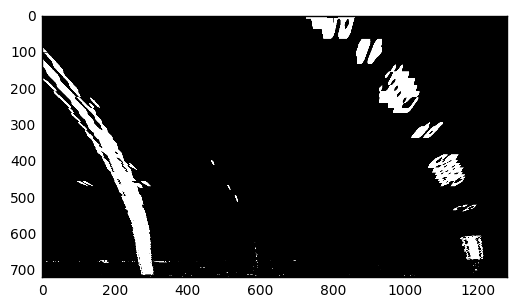

In [44]:
plt.imshow(curr_img.value, cmap='gray')

In [ ]:
# get all possible x, y for lane lines in curr image using image from last frame
left_yvals = last_img.lane['left']['yvals']
left_fit = last_img.lane['left']['fit']
leftx = left_fit[0]*left_yvals**2 + left_fit[1]*left_yvals + left_fit[2]

right_yvals = last_img.lane['right']['yvals']
right_fit = last_img.lane['right']['fit']
rightx = right_fit[0]*right_yvals**2 + right_fit[1]*right_yvals + right_fit[2]

print("left_yvals: {}, leftx: {}, right_yvals: {}, rightx: {}".format(len(left_yvals), len(leftx),
                                                                     len(right_yvals), len(rightx)))

In [45]:
left_lane = {
    'init_yvals': left_yvals,
    'init_fit': left_fit,
    'init_x': leftx
}
right_lane = {
    'init_yvals': right_yvals,
    'init_fit': right_fit,
    'init_x': rightx
}

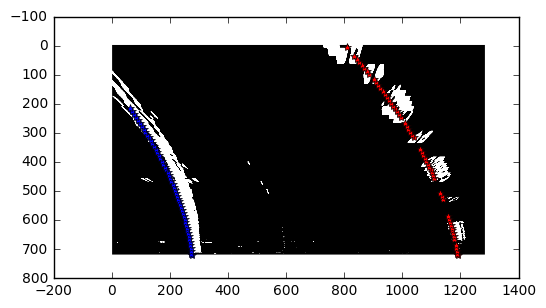

In [47]:
# plot the initial points on the image
warped = curr_img.image_for_stage('perspectiveTransform')
plt.imshow(warped, cmap='gray')

for i in range(len(left_lane['init_yvals'])):
    plt.plot(left_lane['init_x'][i], left_lane['init_yvals'][i], '*', color='b')

for i in range(len(right_lane['init_yvals'])):
    plt.plot(right_lane['init_x'][i], right_lane['init_yvals'][i], '*', color='r')

In [54]:
# look for lane pixels in a small window around the initial points
def find_peak(warped, center, window_size):
    """find peak in the warped image inside a bounding box around center"""
    x_range = (center[0] - window_size/2, center[0] + window_size/2)
    y_range = (center[1] - window_size/2, center[1] + window_size/2)

    histogram = np.sum(
        warped[y_range[0]:y_range[1], x_range[0]:x_range[1]],
        axis=0
    )
    peak = np.argmax(histogram)
    if peak:
        return x_range[0] + peak, center[1]

def better_lane_points(left_lane, right_lane, window_size=100):
    
    left_init_yvals = left_lane['init_yvals']
    left_init_x = left_lane['init_x']
    
    right_init_yvals = right_lane['init_yvals']
    right_init_x = right_lane['init_x']
    
    left_y, left_x = [], []
    
    right_y, right_x = [], []
    
    i = 0
    while i < min(len(left_init_yvals), len(right_init_yvals)):
        
        # left lane
        peak = find_peak(warped, (left_init_x[i], left_init_yvals[i]), window_size)
        if peak:
            left_x.append(peak[0])
            left_y.append(peak[1])
        
        # right lane
        peak = find_peak(warped, (right_init_x[i], right_init_yvals[i]), window_size)
        if peak:
            right_x.append(peak[0])
            right_y.append(peak[1])
        
        i += 1
    
    if i == len(left_init_yvals):
#         print("left lane ran out")
        init_y = right_init_yvals
        init_x = right_init_x
        y = right_y
        x = right_x
    else:
#         print("right lane ran out")
        init_y = left_init_yvals
        init_x = left_init_x
        y = left_y
        x = left_x
    
    while i < len(init_y):
        
        peak = find_peak(warped, (init_x[i], init_y[i]), window_size)
        if peak:
            x.append(peak[0])
            y.append(peak[1])
        
        i += 1
    
    left_lane.update({
            'yvals': np.array(left_y, dtype=np.uint32),
            'x': np.array(left_x, dtype=np.uint32)
    })
    right_lane.update({
            'yvals': np.array(right_y, dtype=np.uint32),
            'x': np.array(right_x, dtype=np.uint32)
    })
    print("left_y: {}, left_x: {}, right_y: {}, right_x: {}".format(len(left_y), len(left_x), len(right_y),
                                                                    len(right_x)))


In [55]:
better_lane_points(left_lane, right_lane)

left lane ran out
left_y: 52, left_x: 52, right_y: 52, right_x: 52


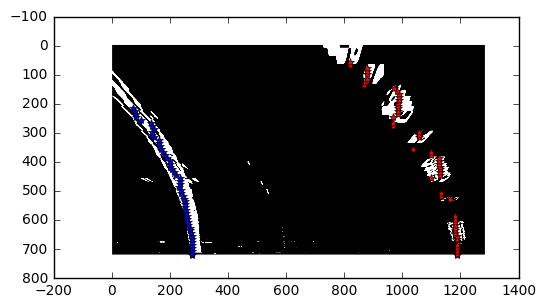

In [56]:
plt.imshow(warped, cmap='gray')

for i in range(len(left_lane['yvals'])):
    plt.plot(left_lane['x'][i], left_lane['yvals'][i], '*', color='b')

for i in range(len(right_lane['yvals'])):
    plt.plot(right_lane['x'][i], right_lane['yvals'][i], '*', color='r')

In [57]:
# fit second order polynomial based on computed x and y vals
left_lane['fit'] = np.polyfit(left_lane['yvals'], left_lane['x'], 2)
right_lane['fit'] = np.polyfit(right_lane['yvals'], right_lane['x'], 2)

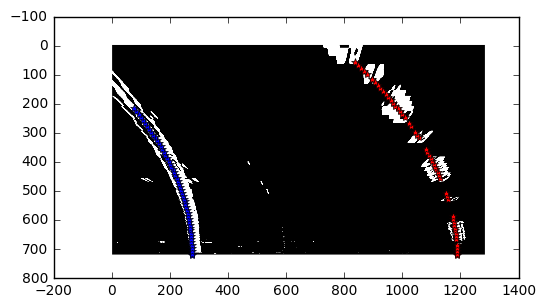

In [58]:
# plot lane lines using the fitted polynomial
plt.imshow(warped, cmap='gray')

leftx = left_lane['fit'][0]*left_lane['yvals']**2 + left_lane['fit'][1]*left_lane['yvals'] + left_lane['fit'][2]
rightx = right_lane['fit'][0]*right_lane['yvals']**2 + right_lane['fit'][1]*right_lane['yvals'] + right_lane['fit'][2]

for i in range(len(left_lane['yvals'])):
    plt.plot(leftx[i], left_lane['yvals'][i], '*', color='b')

for i in range(len(right_lane['yvals'])):
    plt.plot(rightx[i], right_lane['yvals'][i], '*', color='r')

In [59]:
# find distance between lanes (for sanity check)
lane_dist_yvals, lane_dist = dist_bw_lanes(
    curr_img.image_for_stage('undistorted'),
    left_lane['fit'], left_lane['yvals'],
    right_lane['fit'], right_lane['yvals']
)
print(list(zip(lane_dist_yvals, lane_dist)))

[(720, 4.8329494050114592), (675, 4.8247048007364839), (630, 4.8174025048730416), (585, 4.8110425174211304), (540, 4.8056248383807532), (495, 4.8011494677519089), (450, 4.797616405534594), (405, 4.7950256517288139), (360, 4.7933772063345668), (315, 4.7926710693518508), (270, 4.7929072407806688), (225, 4.7940857206210188)]


In [69]:
np.mean(lane_dist)
# float(format(np.mean(lane_dist), '.3f'))
mean = np.mean(lane_dist)
stddev = np.std(lane_dist)
print("mean: {}, stddev: {}".format(mean, stddev))

mean: 4.804879735710525, stddev: 0.013169659860683396


In [67]:
def find_curvature(leftx, left_yvals, rightx, right_yvals):
    left_y_eval = np.max(left_yvals)
    right_y_eval = np.max(right_yvals)

    left_yvals2 = left_yvals * ym_per_pix
    right_yvals2 = right_yvals * ym_per_pix

    left_fit_cr = np.polyfit(left_yvals2, leftx * xm_per_pix, 2)
    right_fit_cr = np.polyfit(right_yvals2, rightx * xm_per_pix, 2)

    left_curverad = ((1 + (2*left_fit_cr[0]*left_y_eval + left_fit_cr[1])**2)**1.5) \
                                 /np.absolute(2*left_fit_cr[0])
    right_curverad = ((1 + (2*right_fit_cr[0]*right_y_eval + right_fit_cr[1])**2)**1.5) \
                                    /np.absolute(2*right_fit_cr[0])
    return left_curverad, right_curverad

In [68]:
find_curvature(left_lane['x'], left_lane['yvals'], right_lane['x'], right_lane['yvals'])

(9179.304066294826, 8297.1760212474619)

In [78]:
def vehicle_pos_wrt_lane_center(image, left_fit, right_fit):
    h, w = image.shape[:2]
    
    x_left = left_fit[0]*h**2 + left_fit[1]*h + left_fit[2]
    x_right = right_fit[0]*h**2 + right_fit[1]*h + right_fit[2]

    lane_width = x_right - x_left
    lane_center = x_left + lane_width/2.0

    x_vehicle = w/2.0

    x_vehicle_off_center = x_vehicle - lane_center
    x_vehicle_off_center_m = x_vehicle_off_center * xm_per_pix

#     print("starting pos of lane, left: {}, right: {}".format(x_left, x_right))
#     print("lane center: {}, vehicle pos: {}".format(lane_center, x_vehicle))
#     print("vehicle is {:.4f}m {} of center".format(abs(x_vehicle_off_center_m),
#                                                "left" if x_vehicle_off_center < 0 else "right"))
    return x_vehicle_off_center_m